### Bartholomew_Luke_DA301_Assignment_Notebook_R <a id='top'></a>

## Predicting Future Outcomes

Welcome to my Jupyter Notebook for R. In order to setup the R Kernel to run in Jupyter Notebooks follow the [installation instructions][id1].

The following notebook sections should be completed in order:

1. <a class="anchor" href='#1'>Files Required</a>
2. <a class="anchor" href='#2'>Library Dependencies</a>
3. <a class="anchor" href='#3'>Import & Describe The Data</a>
5. <a class="anchor" href='#4'>Visualising Data to Gather Insights</a>
4. <a class="anchor" href='#5'>Cleaning Manipulating & Visualising the Data</a>
6. <a class="anchor" href='#6'>Making Recommendation to the Business</a>

[id1]:https://richpauloo.github.io/2018-05-16-Installing-the-R-kernel-in-Jupyter-Lab

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">1. Files Required</h2></th>
        <th><a id="1"></a></th>
    </tr>
</thead>
</table>

This notebook requires the `turtle_reviews.csv`, `turtle_sales.csv`, `ts.csv` (created in the python Jupyter notebook) and `metadata_turtle_games.txt` files. Upload these files to the directory before you begin.

The files, this Jupyter notebook and technical report can be accessed at the [GitHub repository][id2].

[id2]:https://github.com/lukebart/Bartholomew_Luke_DA301_Assignment

### Set The Working Directory

In [1]:
# Change your current directory
setwd(dir='D:/LSE/Assignment 3/LSE_DA301_Assignment_files')

> Change the filepath in the code above to point to your own directory.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">2. Library Dependencies</h2></th>
        <th><a id="2"></a></th>
    </tr>
</thead>
</table>

The following libraries will need to be installed for this notebook to work:
- [Tidyverse][id3]
- [ggExtra][id4]
- [ggalt][id5]
- [corrplot][id6]

[id3]:https://tidyverse.tidyverse.org
[id4]:https://exts.ggplot2.tidyverse.org/ggExtra.html
[id5]:https://cran.r-project.org/web/packages/ggalt/index.html
[id6]:https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html

<div class="alert alert-block alert-danger">
<b>Important:</b> You may need to install all or some of these libraries on your own system. This can be done by running the code below (I didn't run the code because the packages were already installed on my system).
</div>

In [ ]:
# Install tidyverse
install.packages("tidyverse")

In [ ]:
# Install ggExtra
install.packages("ggExtra")

In [ ]:
# Install ggalt
devtools::install_github("hrbrmstr/ggalt")

In [ ]:
# install corrplot package
install.packages("corrplot")

### Import Libraries

<div class="alert alert-block alert-danger">
<b>Important:</b> Run the code below before going further. If some of the packages are not installed, you will need find the package in the list above and install.
</div>

In [37]:
# Import tidyverse library
suppressPackageStartupMessages(library(tidyverse))

# Import ggExtra - a tidyverse extension for ggplot2
library(ggExtra)

# Import ggalt - add custom geoms, coords and stats to the ggplot2
suppressPackageStartupMessages(library(ggalt))

# Import corrplot
library(corrplot)

# Import moments
library(moments)

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">3. Import & Describe The Data</h2></th>
        <th><a id="3"></a></th>
    </tr>
</thead>
</table>

In [4]:
# Import the data from .csv file
ts <- read.csv('ts.csv', header=T)

In [5]:
# View the dimensions
dim(ts)

[1] 352   9

In [6]:
# View the head
head(ts)

,ranking,product_id,platform,year,genre,publisher,na_sales,eu_sales,global_sales
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,107,Wii,2006,Sports,Nintendo,34.02,23.80,67.85
2,2,123,NES,1985,Platform,Nintendo,23.85,2.94,33.00
3,3,195,Wii,2008,Racing,Nintendo,13.00,10.56,29.37
4,4,231,Wii,2009,Sports,Nintendo,12.92,9.03,27.06
5,5,249,GB,1996,Role-Playing,Nintendo,9.24,7.29,25.72
6,6,254,GB,1989,Puzzle,Nintendo,19.02,1.85,24.81


In [7]:
# Subset the numerical data columns
ts_num <- subset(ts[, c('product_id', 'na_sales', 'eu_sales', 'global_sales')])

In [8]:
# View the descriptive statistics of ts_num (minus the product_id column)
summary(select(ts_num, -product_id))

    na_sales          eu_sales       global_sales   
 Min.   : 0.0000   Min.   : 0.000   Min.   : 0.010  
 1st Qu.: 0.4775   1st Qu.: 0.390   1st Qu.: 1.115  
 Median : 1.8200   Median : 1.170   Median : 4.320  
 Mean   : 2.5160   Mean   : 1.644   Mean   : 5.335  
 3rd Qu.: 3.1250   3rd Qu.: 2.160   3rd Qu.: 6.435  
 Max.   :34.0200   Max.   :23.800   Max.   :67.850  

Summary of descriptive statistics:
- North America Sales, Min=0, Max=34, Mean=2.5.
- Europe Sales, Min=0, Max=23.8, Mean=1.65.
- Global Sales, Min=0.01, Max=67.87, Mean=5.3)

The data suggests that there are a small number of products sales at very high values above the average.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width: 80%;"><h2 style="text-align:left">4. Visualising Data to Gather Insights</h2></th>
        <th><a id="4"></a></th>
    </tr>
</thead>
</table>

Basic exploratory data analysis for:
- <a class="anchor" href='#41'>Europe Sales</a>
- <a class="anchor" href='#42'>North America Sales</a>
- <a class="anchor" href='#43'>Global Sales</a>
- <a class="anchor" href='#44'>Relationships</a> (e.g. Europe vs. Global Sales)
- <a class="anchor" href='#45'>Sales by Product Categories</a>

### Setup Colour Scheme for Charts

In [33]:
# Set colour values for each column (to be used in visualisations)
colours = matrix(c('steelblue', '#FF9900', '#CCCCCC', '#003366','#993300','#333333'), nrow = 2, ncol = 3, byrow = TRUE)

# Naming rows
rownames(colours) = c('c1', 'c2')
  
# Naming columns
colnames(colours) = c('eu_sales', 'na_sales', 'global_sales')
  
cat("The 3x2 matrix:\n")
print(colours)

The 3x2 matrix:
   eu_sales    na_sales  global_sales
c1 "steelblue" "#FF9900" "#CCCCCC"   
c2 "#003366"   "#993300" "#333333"   


In [29]:
print(colours[1,1])

[1] "#6699CC"


In [30]:
print(colours[2,1])

[1] "#003366"


### (i) Europe Sales <a id="41"></a>

### Histogram

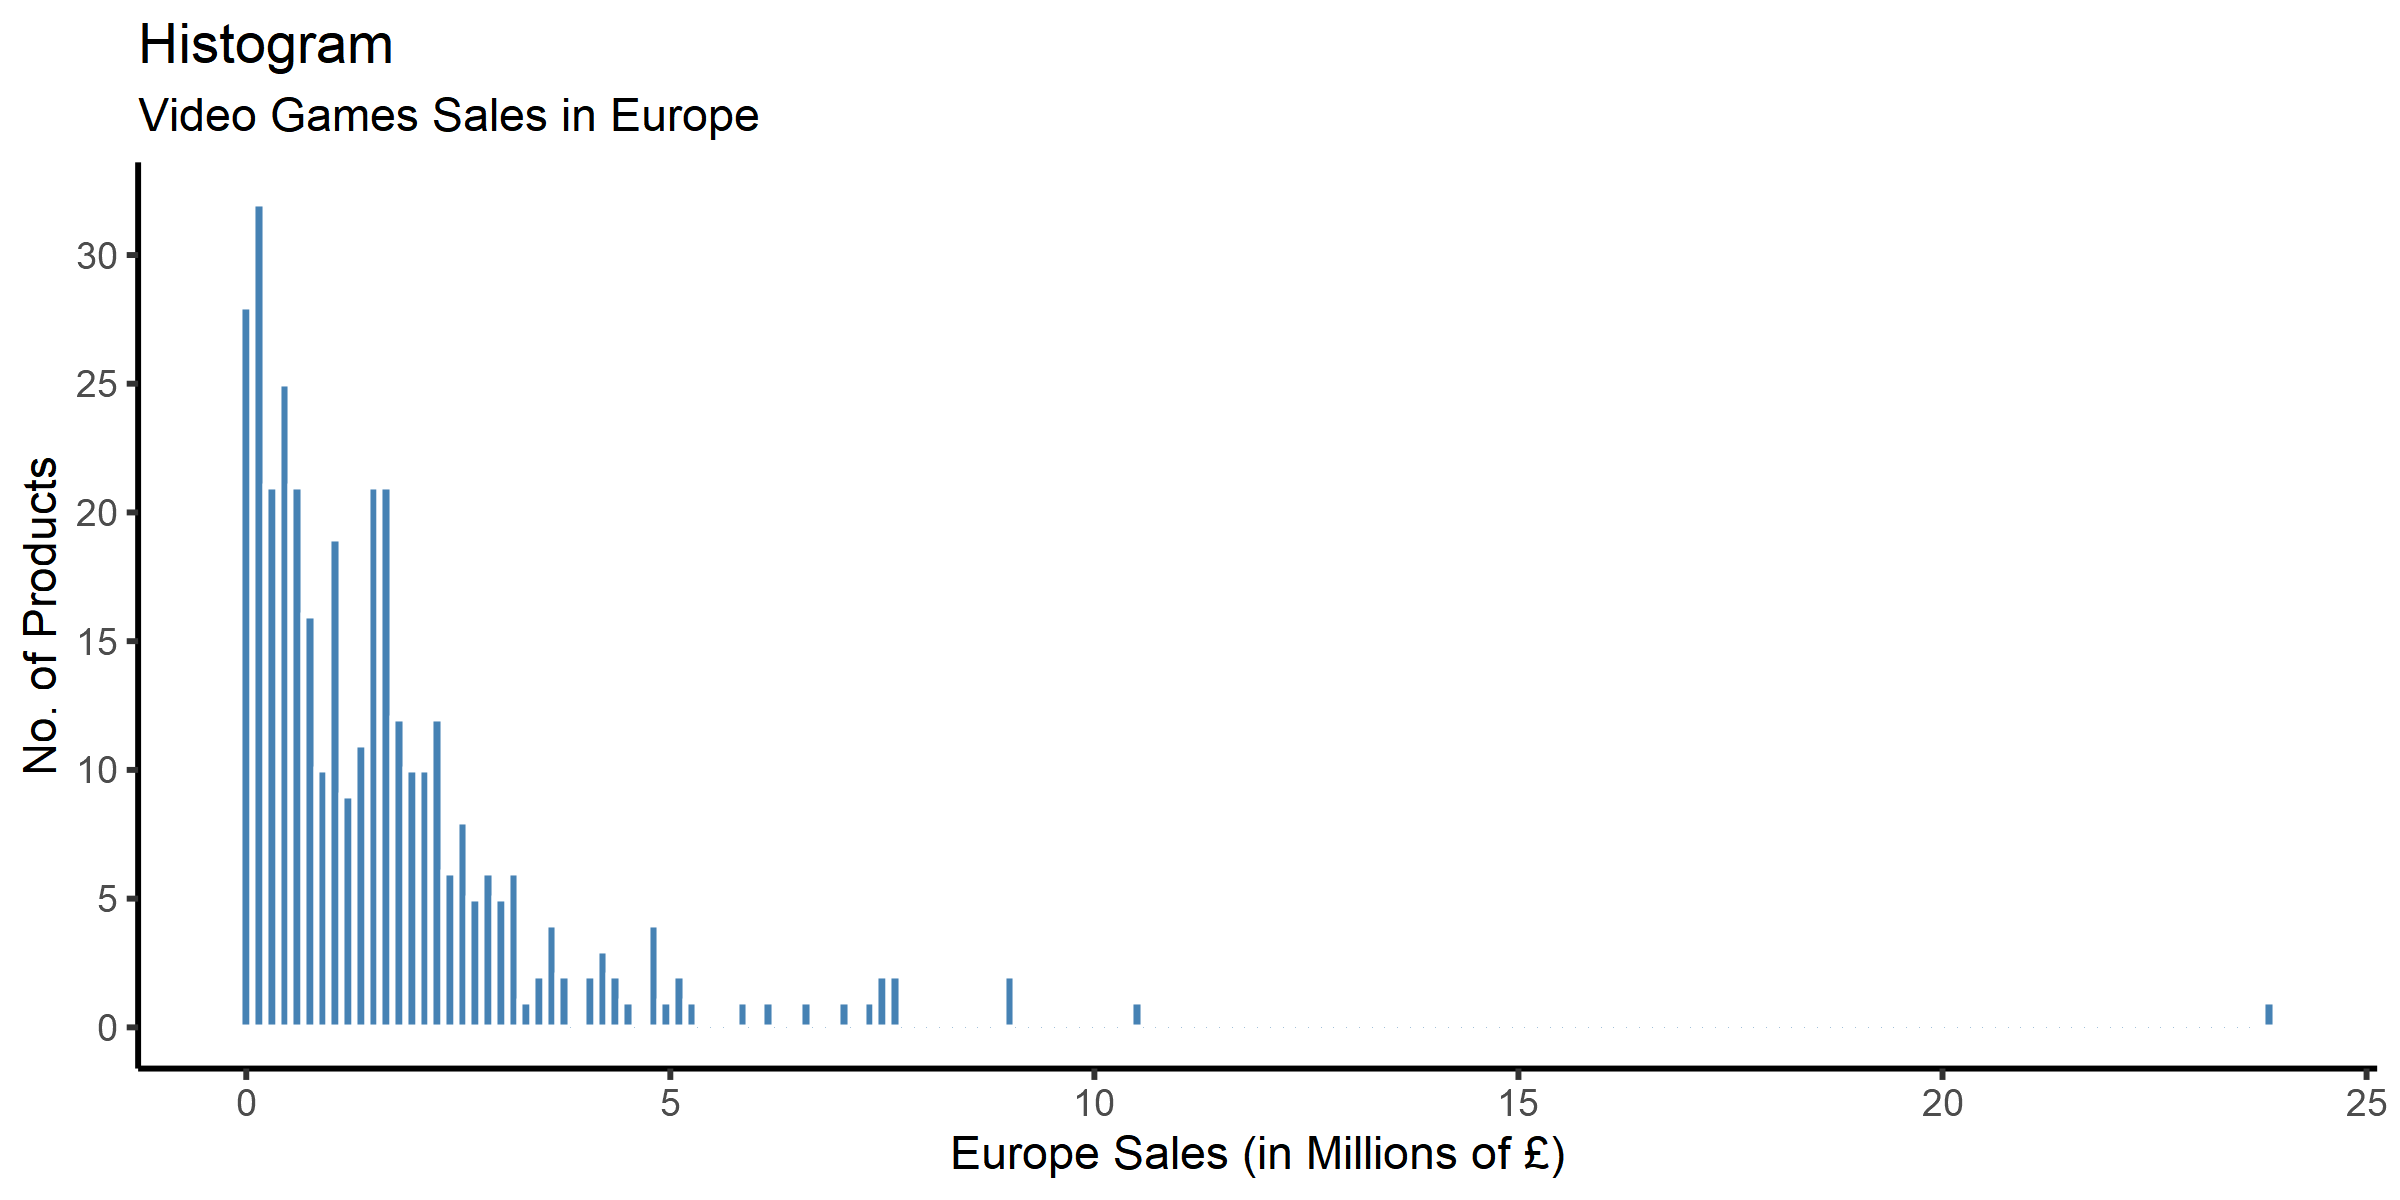

In [401]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(ts_num, aes(x = eu_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.15, colour='white', fill=colours[1,1], aes(y =after_stat(count))) + 

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 30, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram',
         subtitle = 'Video Games Sales in Europe ',
         x = 'Europe Sales (in Millions of £)') +

    # Add theme
    theme_classic()

> There is only a couple of products with sales above 10 million. The scale for sales (x) can be adjusted with the sqrt function to show the distribution of sales between 0 and 5 million more clearly.

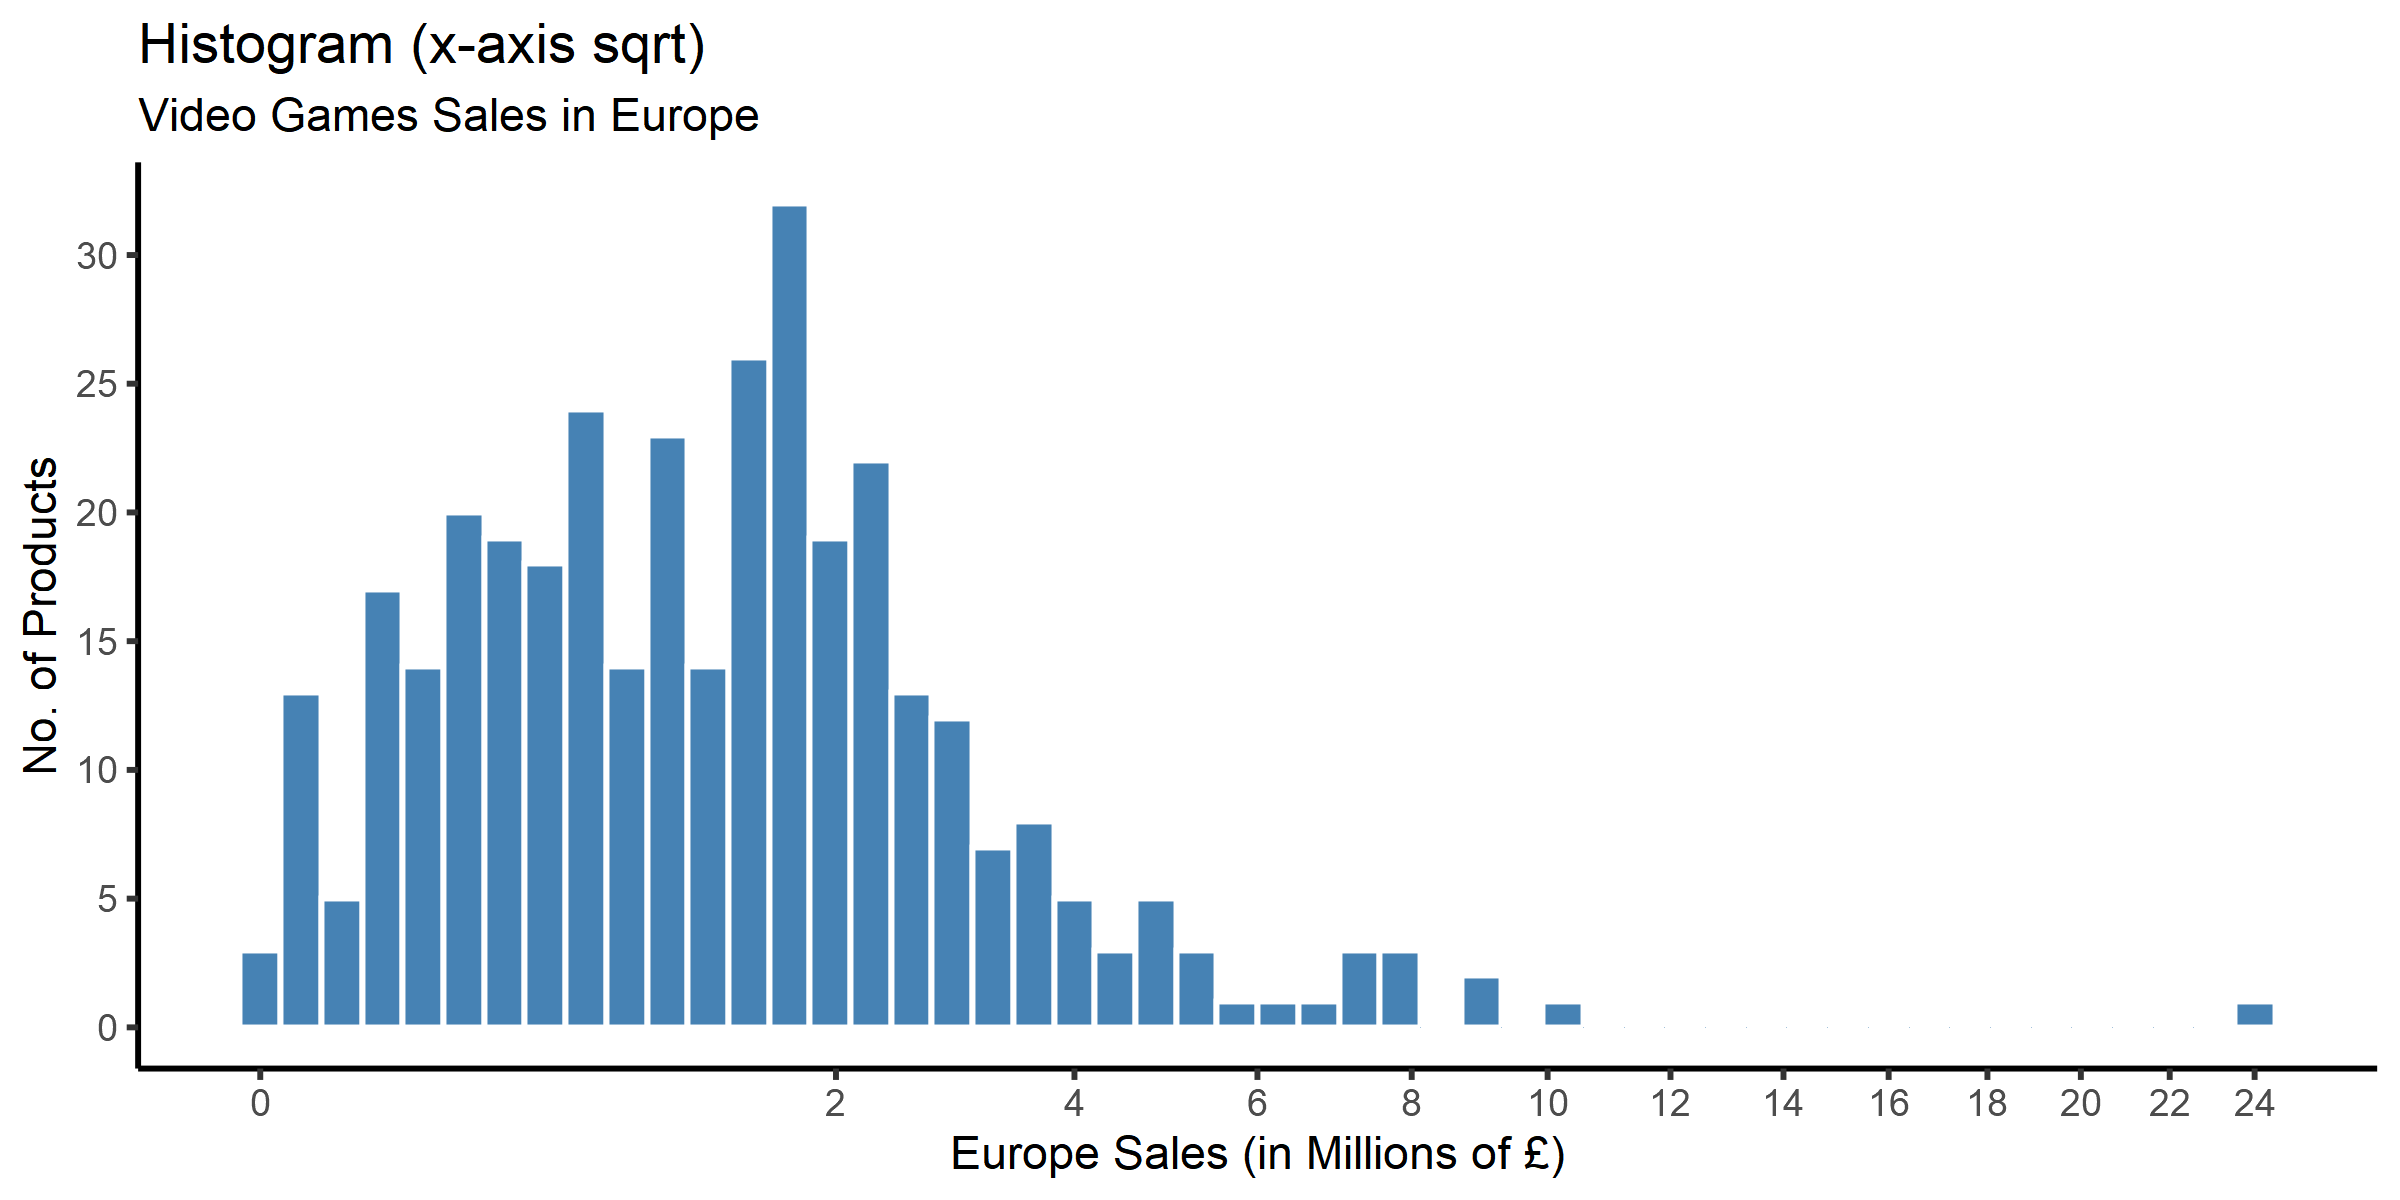

In [402]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(ts_num, aes(x = eu_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.1, colour='white', fill=colours[1,1], aes(y =after_stat(count))) + 

    # Scale the x-axis
    scale_x_sqrt(breaks=seq(0, 24, 2)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 30, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram (x-axis sqrt)',
         subtitle = 'Video Games Sales in Europe',
         x = 'Europe Sales (in Millions of £)') +

    # Add theme
    theme_classic()

Using the Square Root function on the x-axis can show the sales between 0 and 10 more clearly.

### Boxplot

A reminder of the summary statistics.

In [47]:
# view a summary of eu_sales data
summary(ts_num$eu_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.390   1.170   1.644   2.160  23.800 

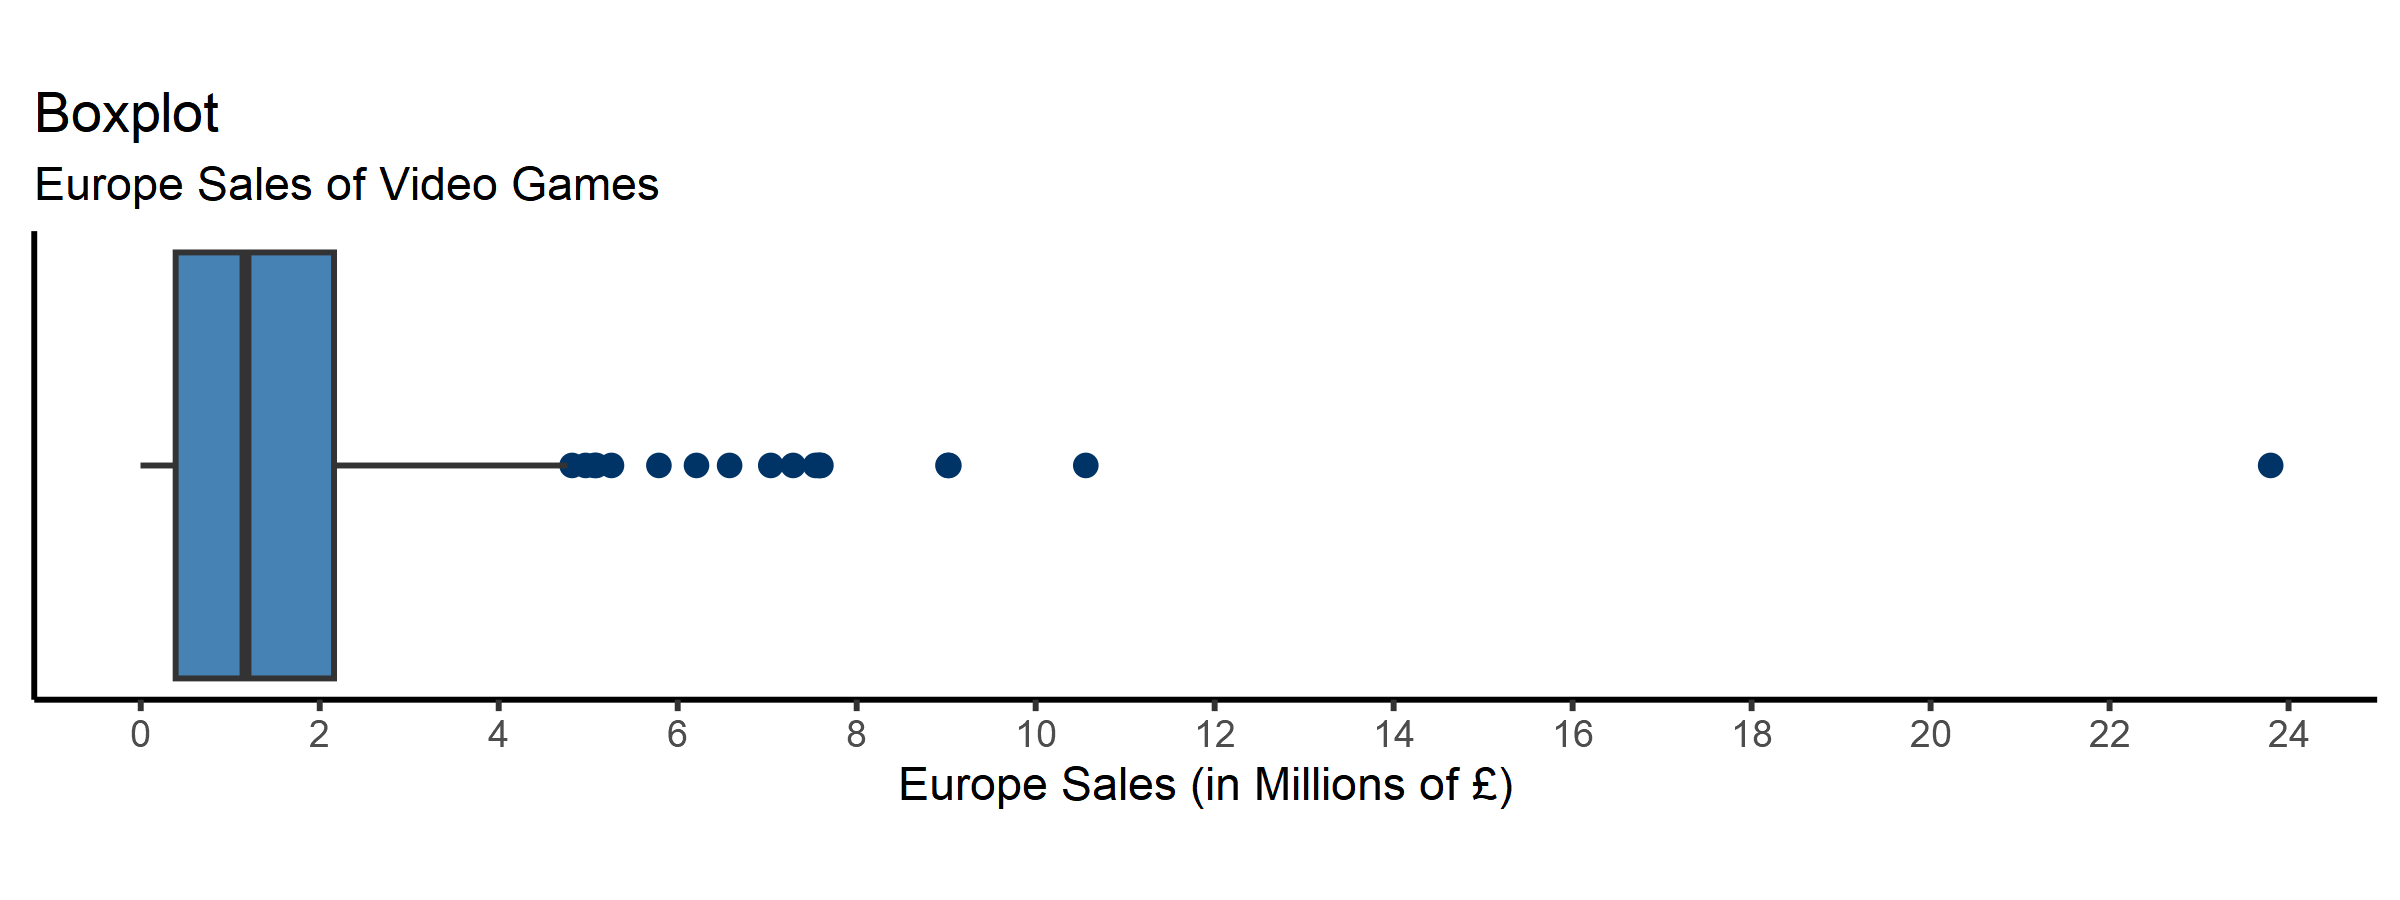

In [403]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=ts_num, aes(x=eu_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,1], outlier.color=colours[2,1], outlier.size=2) + 

    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 24, 2)) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot',
         subtitle = 'Europe Sales of Video Games',
         x = 'Europe Sales (in Millions of £)') +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5)

The boxplot shows that sales values above 5 million are outliers. The majority of the sales values are below 2 million.

#### Try removing the outliers

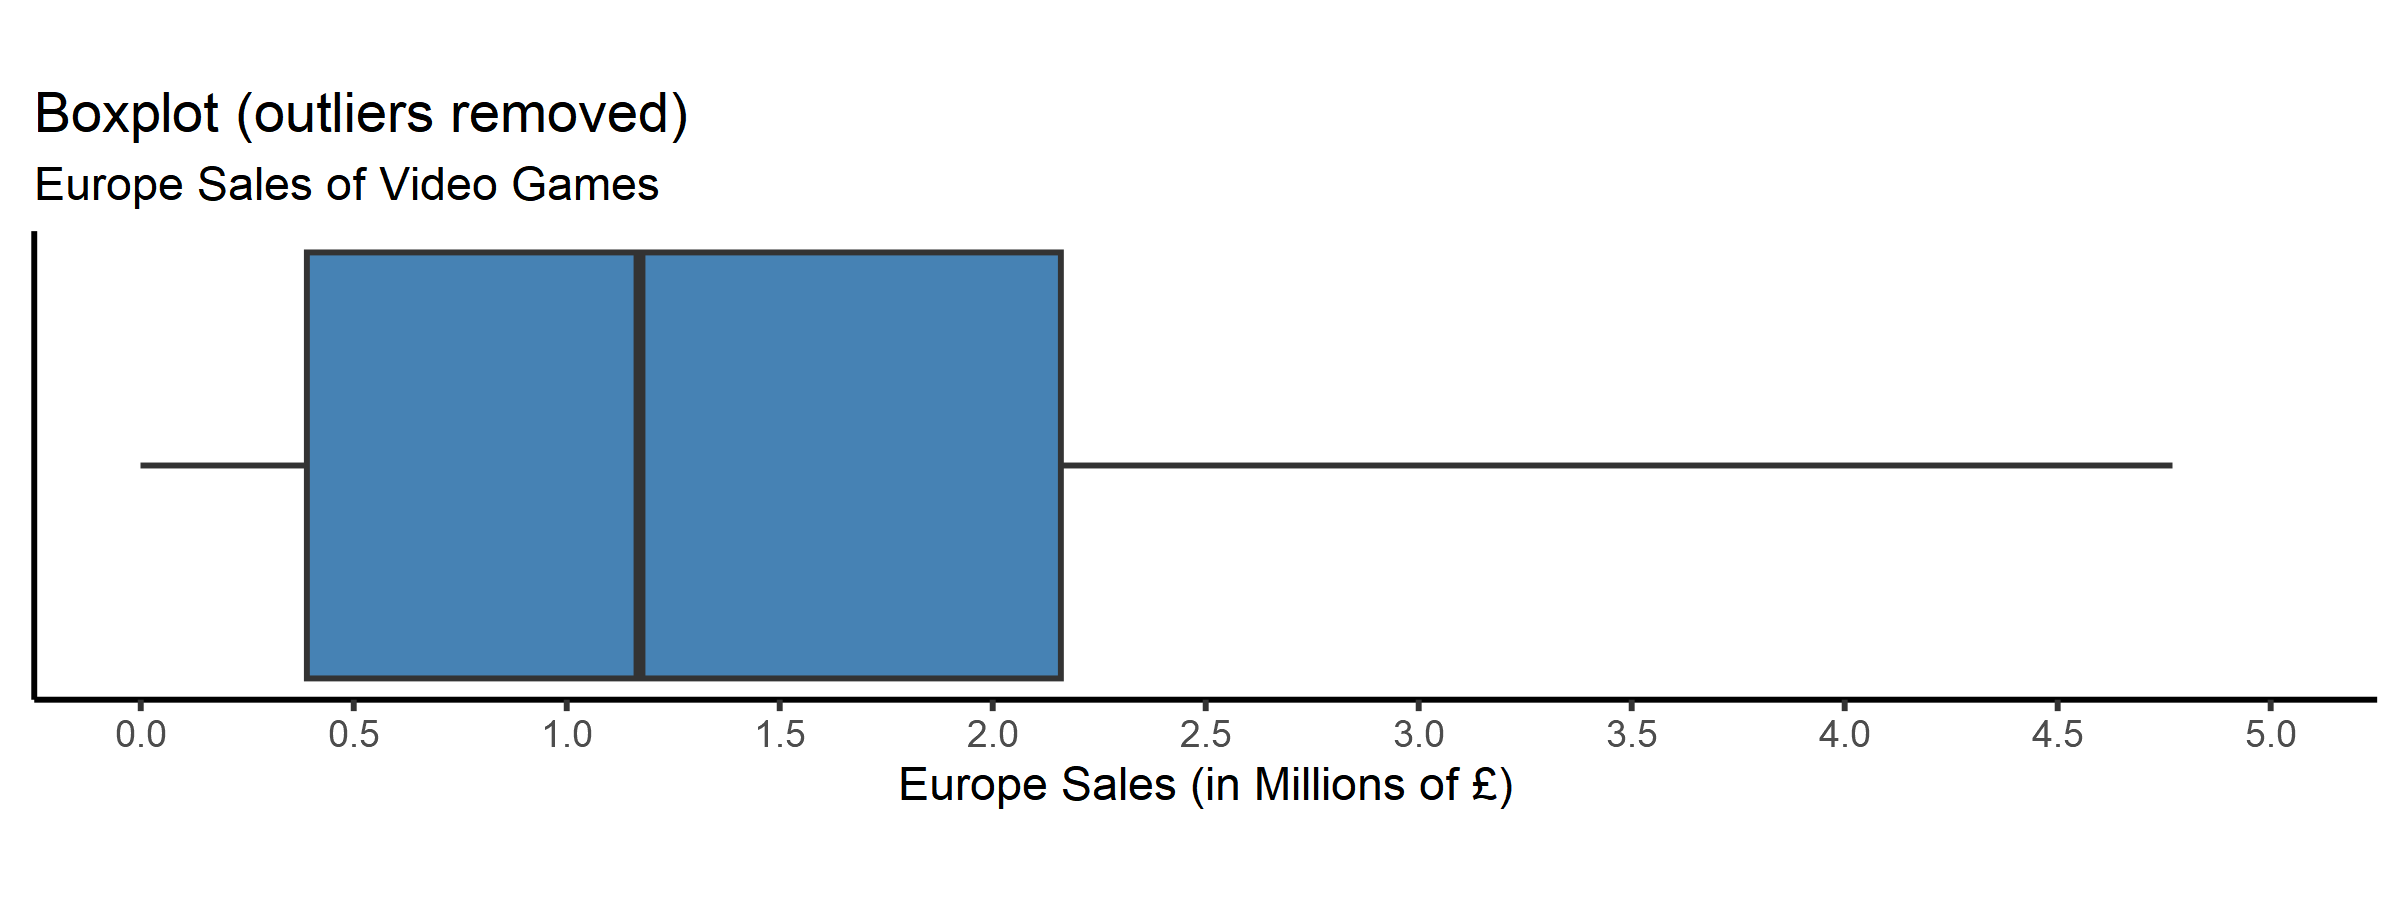

In [404]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=ts_num, aes(x=eu_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,1], outlier.shape=NA) + 

    # set limit on x-scale
    coord_cartesian(xlim =  c(0, 5)) +
    
    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 5, 0.5)) +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot (outliers removed)',
         subtitle = 'Europe Sales of Video Games ',
         x = 'Europe Sales (in Millions of £)')

Removing the outliers shows the distribution of the video games sales between 0 and 5 million more clearly.

### (ii) North America Sales <a id="42"></a>

### Histogram

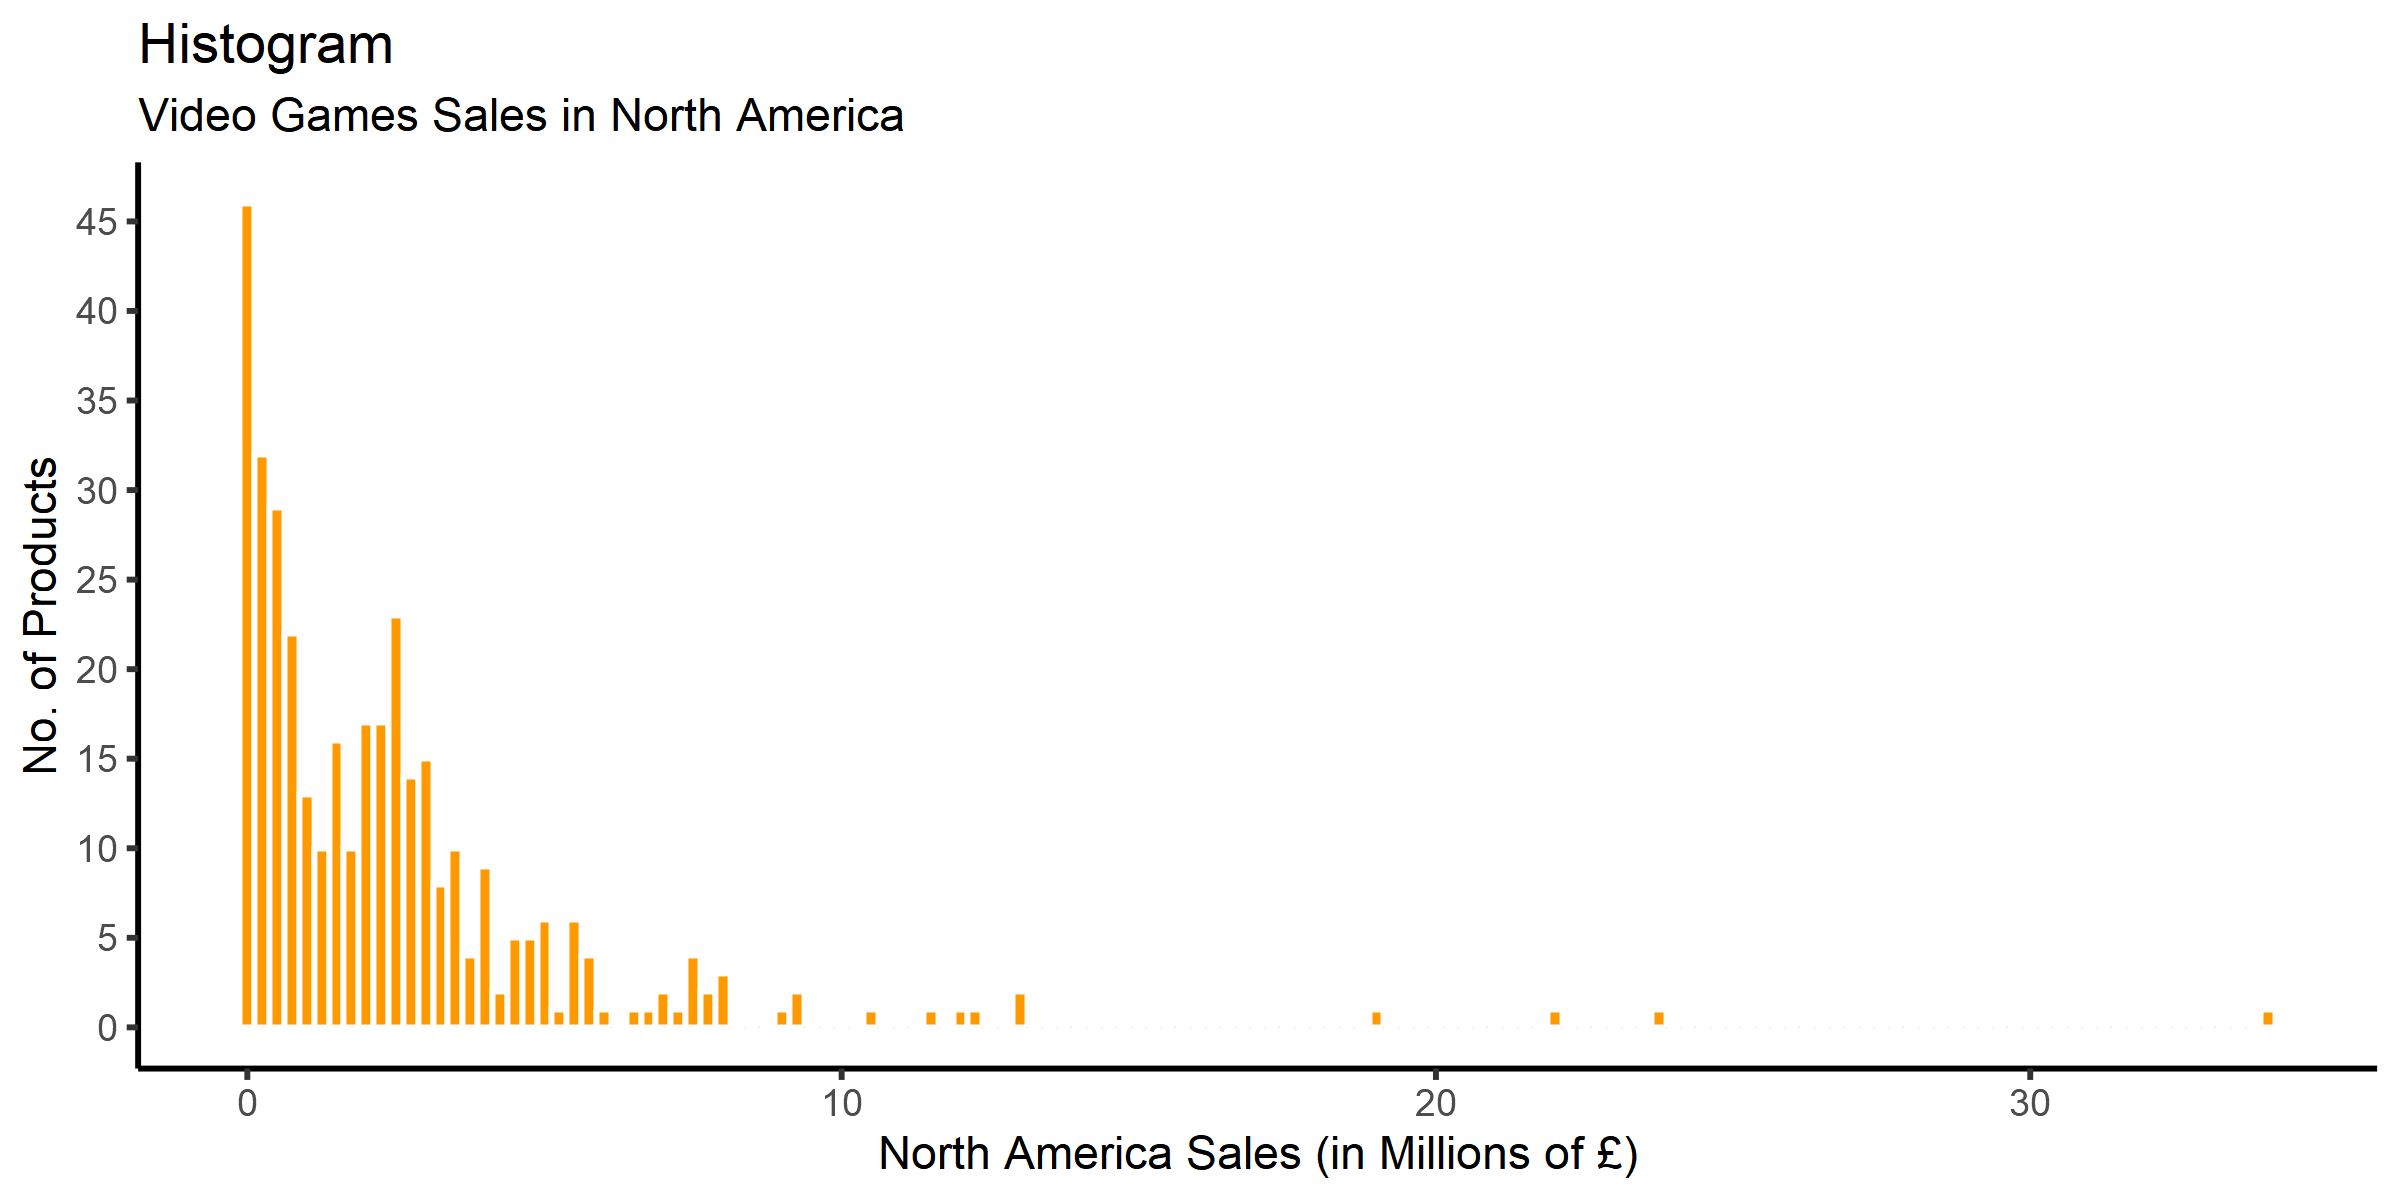

In [134]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(ts_num, aes(x = na_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.25, colour='white', fill=colours[1,2], aes(y =after_stat(count))) + 

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 50, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram',
         subtitle = 'Video Games Sales in North America',
         x = 'North America Sales (in Millions of £)') +

    # Add theme
    theme_classic()

> There is only a couple of products with sales above 15 million. The scale for sales (x) can be adjusted with the sqrt function to show the distribution of sales between 0 and 10 million more clearly.

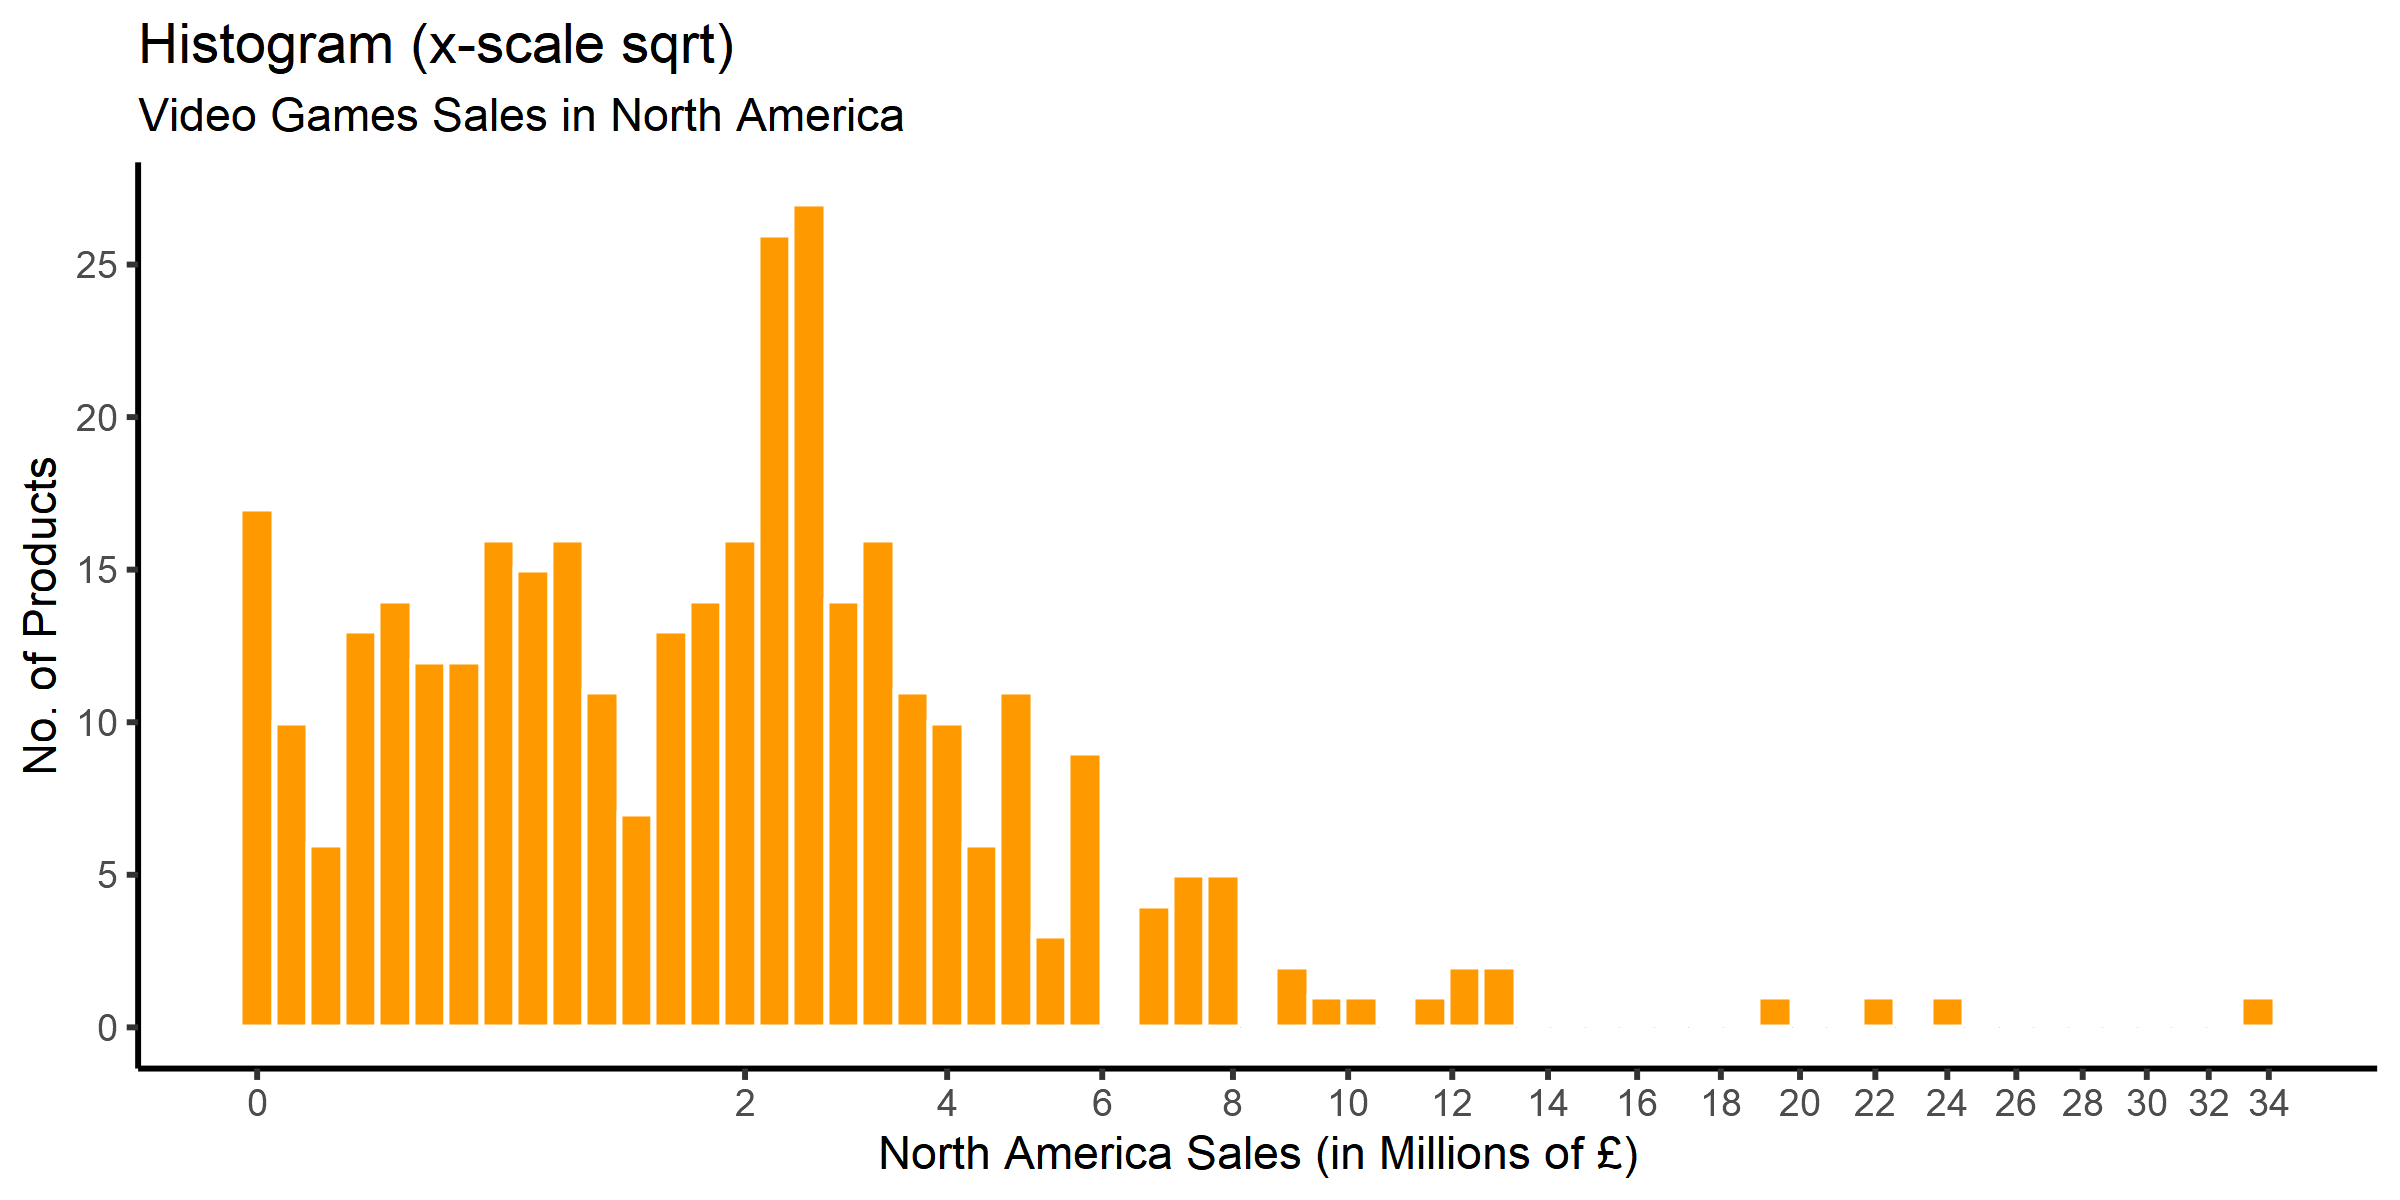

In [135]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(ts_num, aes(x = na_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.1, colour='white', fill=colours[1,2], aes(y =after_stat(count))) + 

    # Scale the x-axis
    scale_x_sqrt(breaks=seq(0, 34, 2)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 25, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram (x-scale sqrt)',
         subtitle = 'Video Games Sales in North America',
         x = 'North America Sales (in Millions of £)') +

    # Add theme
    theme_classic()

Using the Square Root function on the x-axis can show the sales between 0 and 10 million more clearly.

### Boxplot

A reminder of the summary statistics.

In [93]:
# view a summary of na_sales data
summary(ts_num$na_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4775  1.8200  2.5160  3.1250 34.0200 

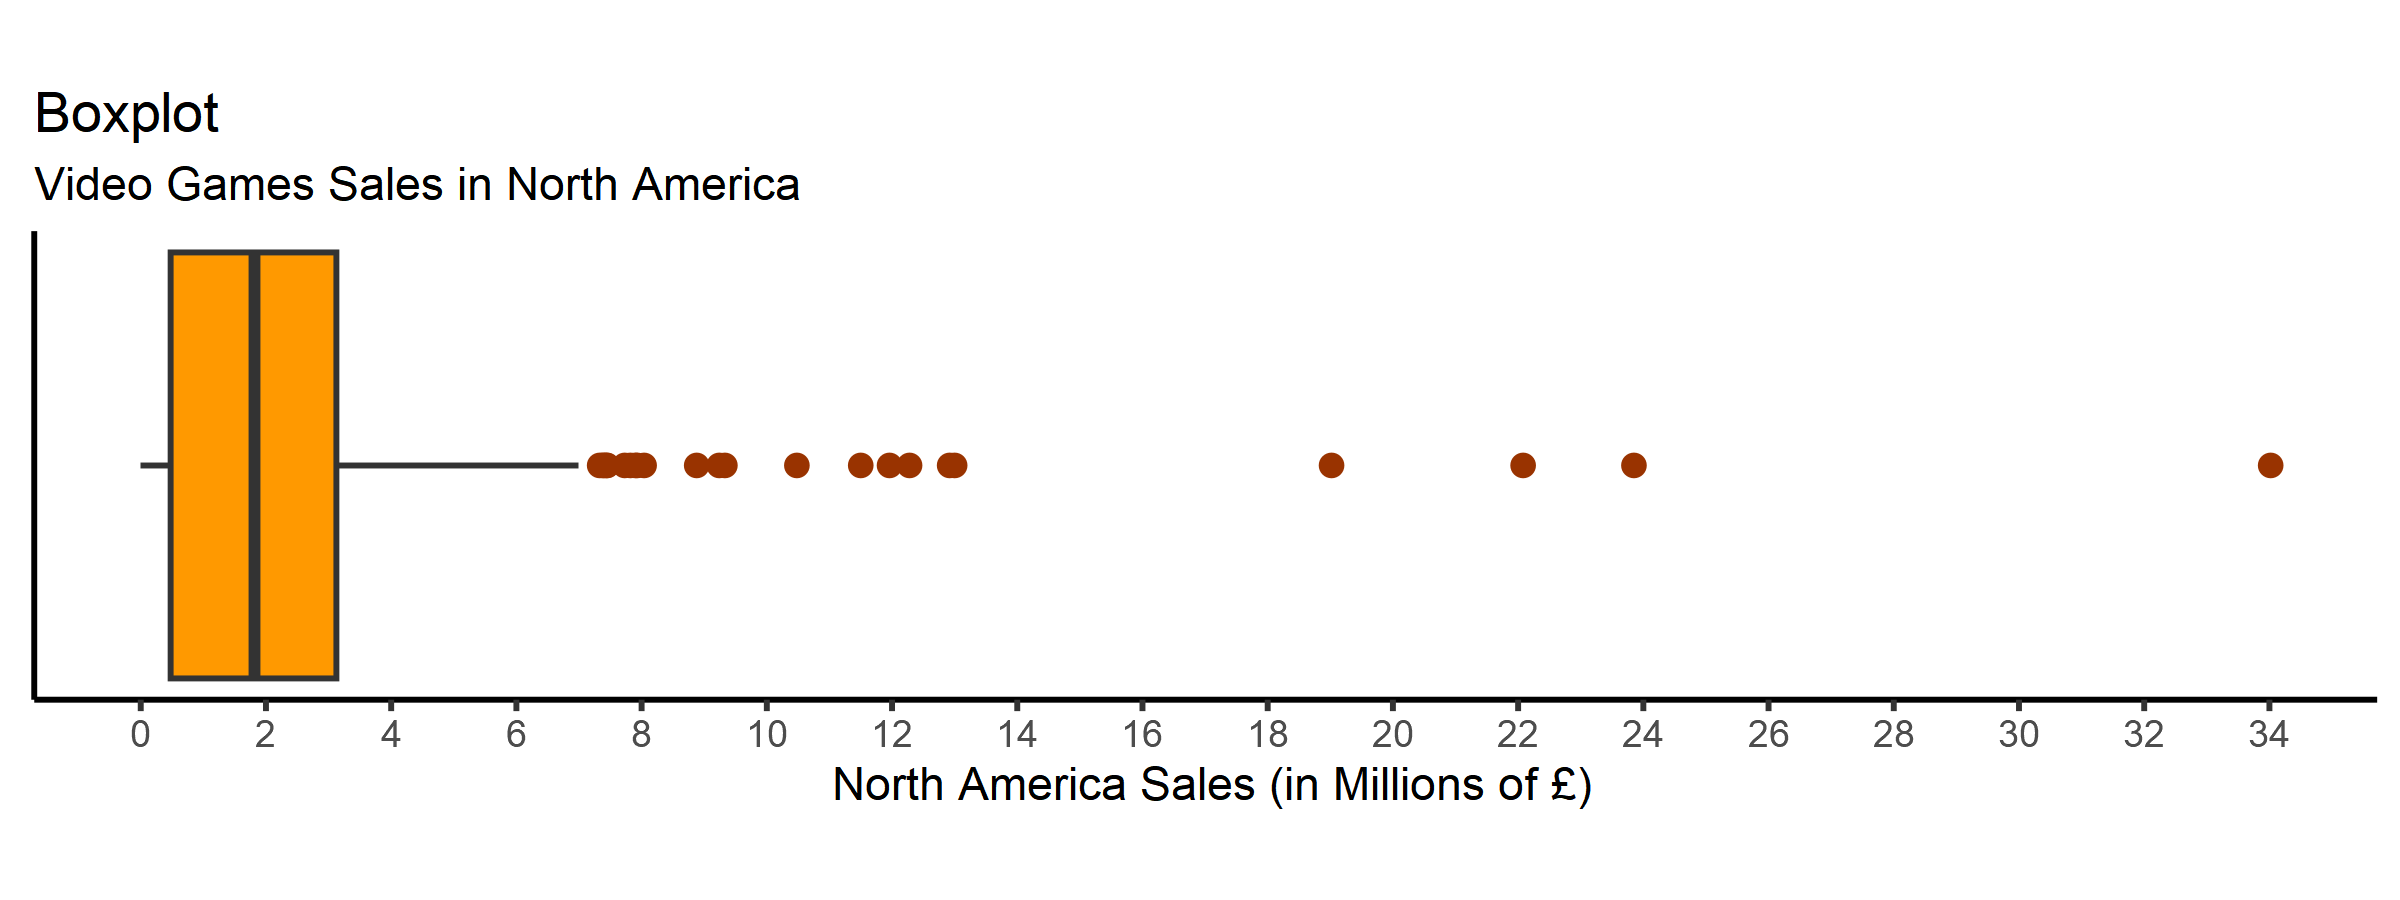

In [103]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=ts_num, aes(x=na_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,2], outlier.color=colours[2,2], outlier.size=2) + 

    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 34, 2)) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot',
         subtitle = 'Video Games Sales in North America',
         x = ' North America Sales (in Millions of £)') +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5)

The boxplot shows that sales values above 7 million are outliers. The majority of the sales values are below 3 million.

#### Try removing outliers

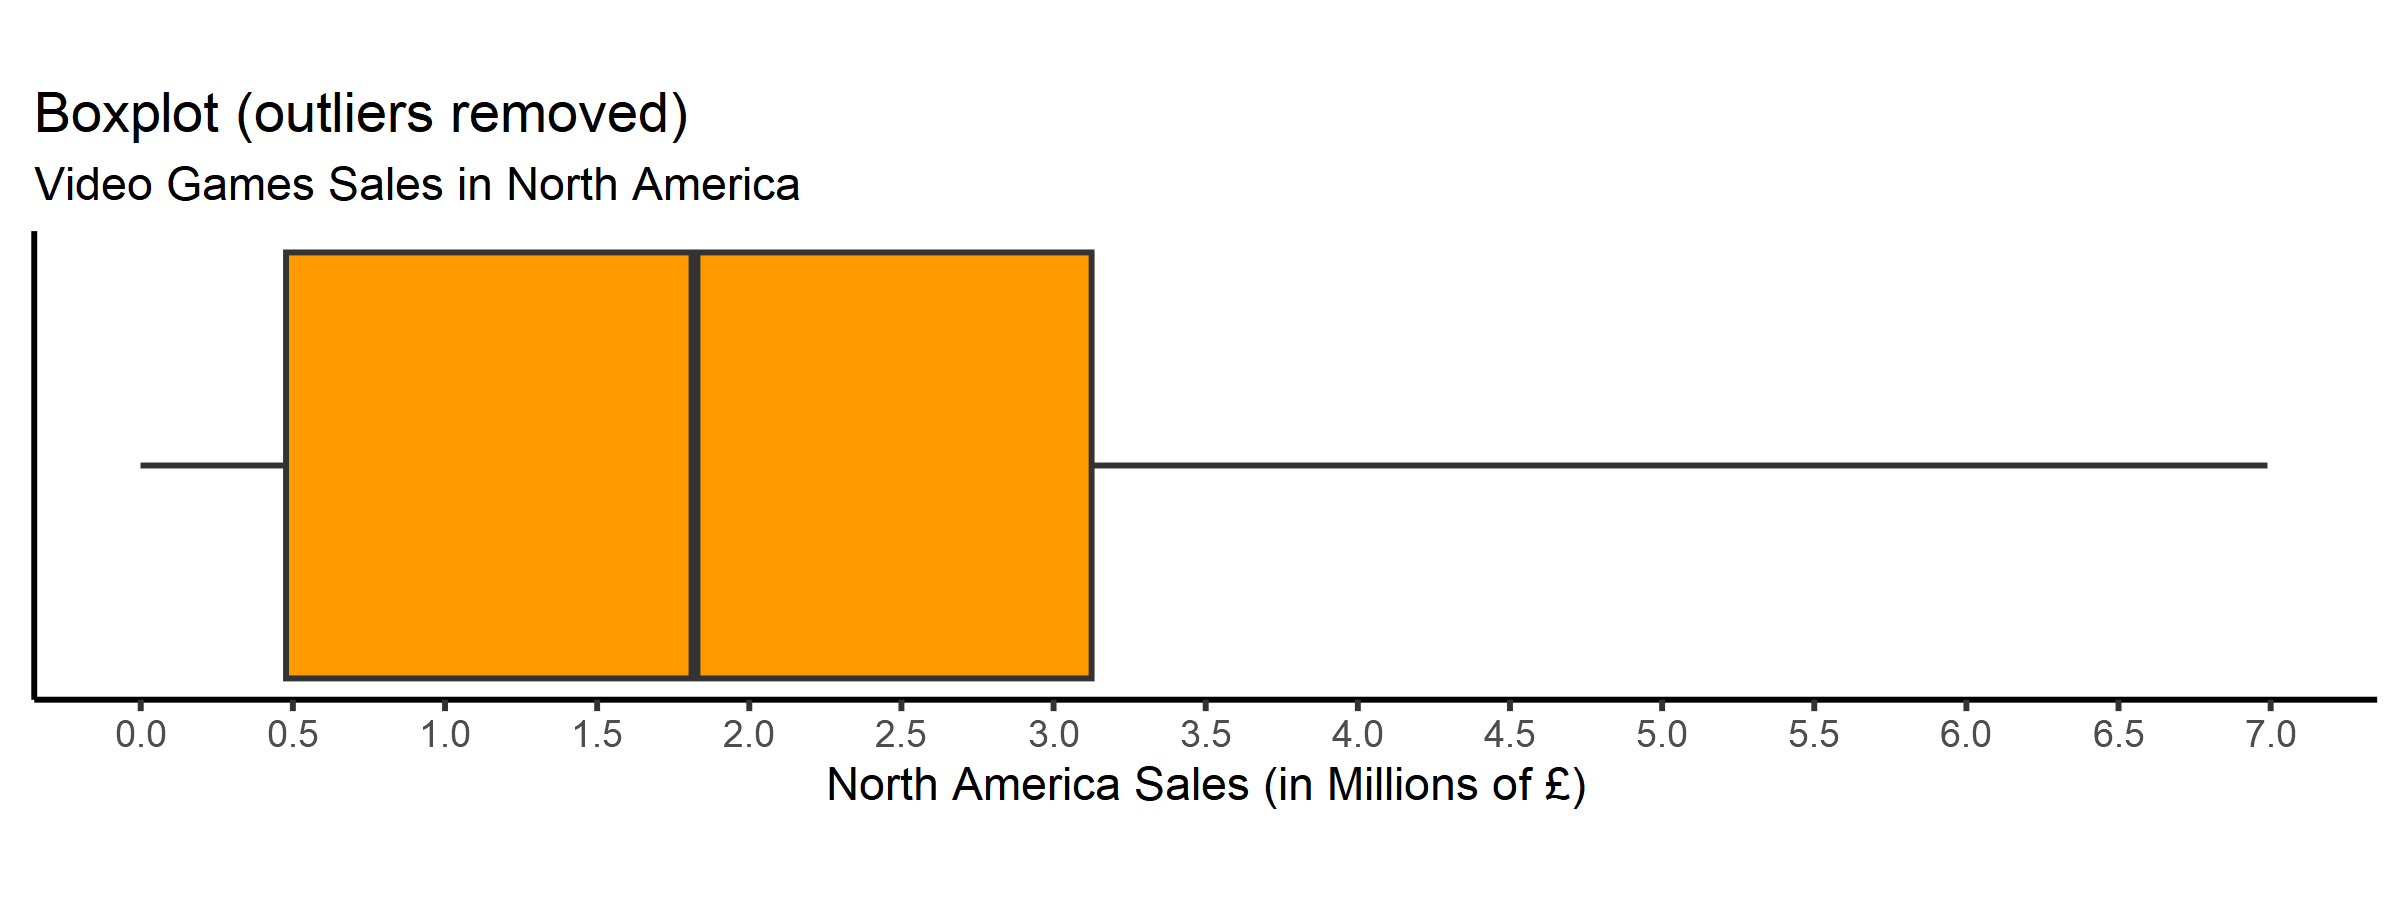

In [111]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=ts_num, aes(x=na_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,2], outlier.shape=NA) + 

    # set limit on x-scale
    coord_cartesian(xlim =  c(0, 7)) +
    
    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 7, 0.5)) +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot (outliers removed)',
         subtitle = 'Video Games Sales in North America',
         x = 'North America Sales (in Millions of £)')

Removing the outliers shows the distribution of the video games sales between 0 and 7 million more clearly.

### (iii) Global Sales <a id="43"></a>

### Histogram

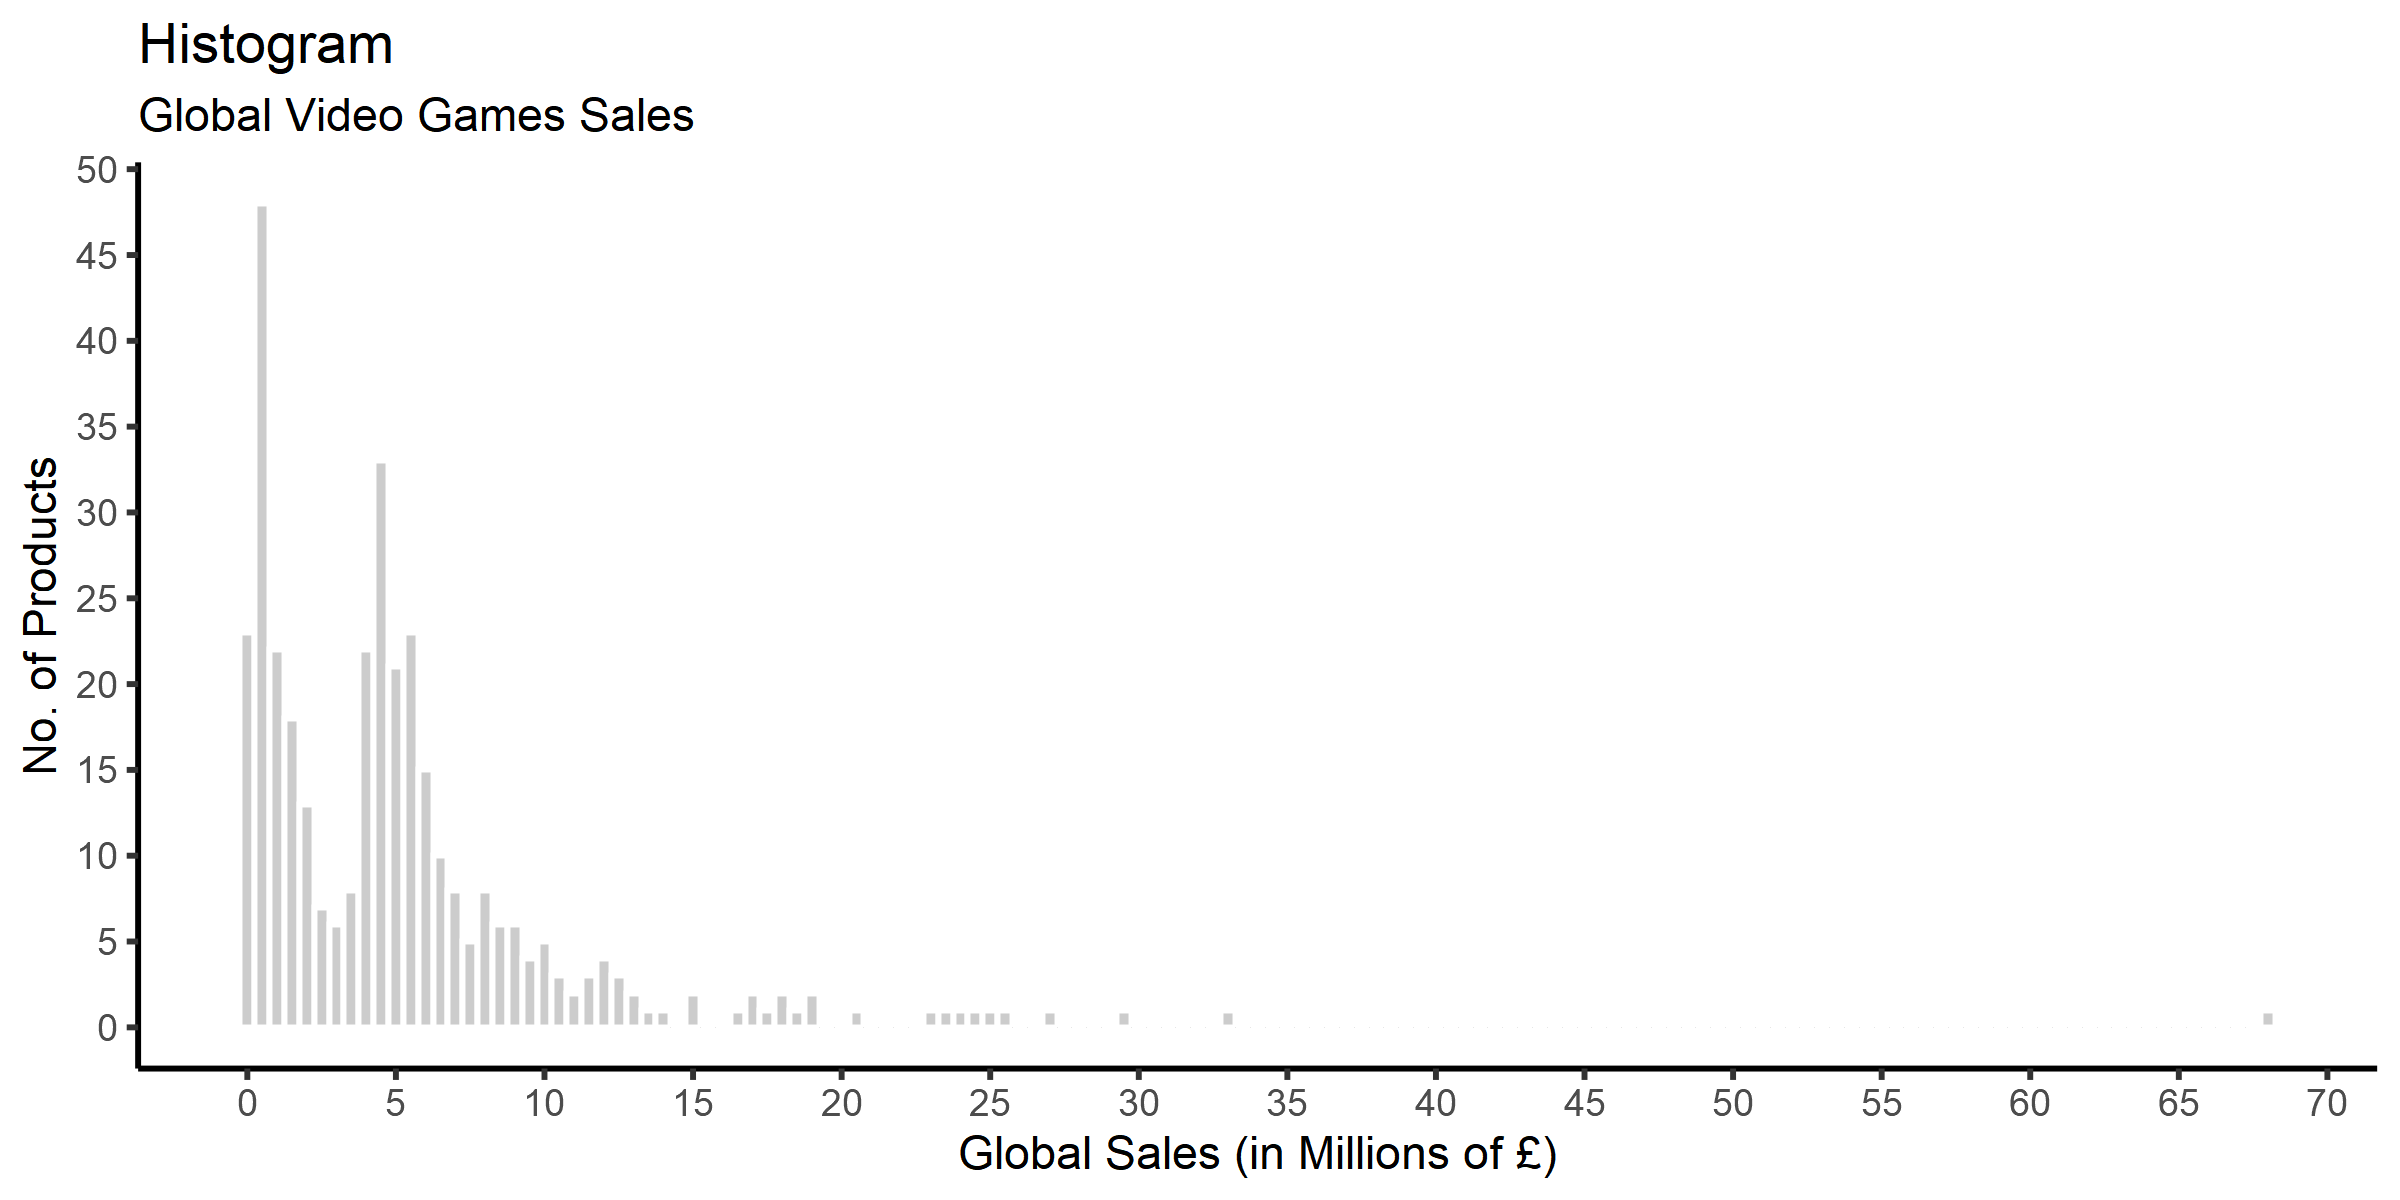

In [118]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(ts_num, aes(x = global_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.5, colour='white', fill=colours[1,3], aes(y =after_stat(count))) + 

    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 70, 5)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 50, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram',
         subtitle = 'Global Video Games Sales',
         x = 'Global Sales (in Millions of £)') +

    # Add theme
    theme_classic()

> There is only a few of products with sales above 20 million. The scale for sales (x) can be adjusted with the sqrt function to show the distribution of sales between 0 and 20 million more clearly.

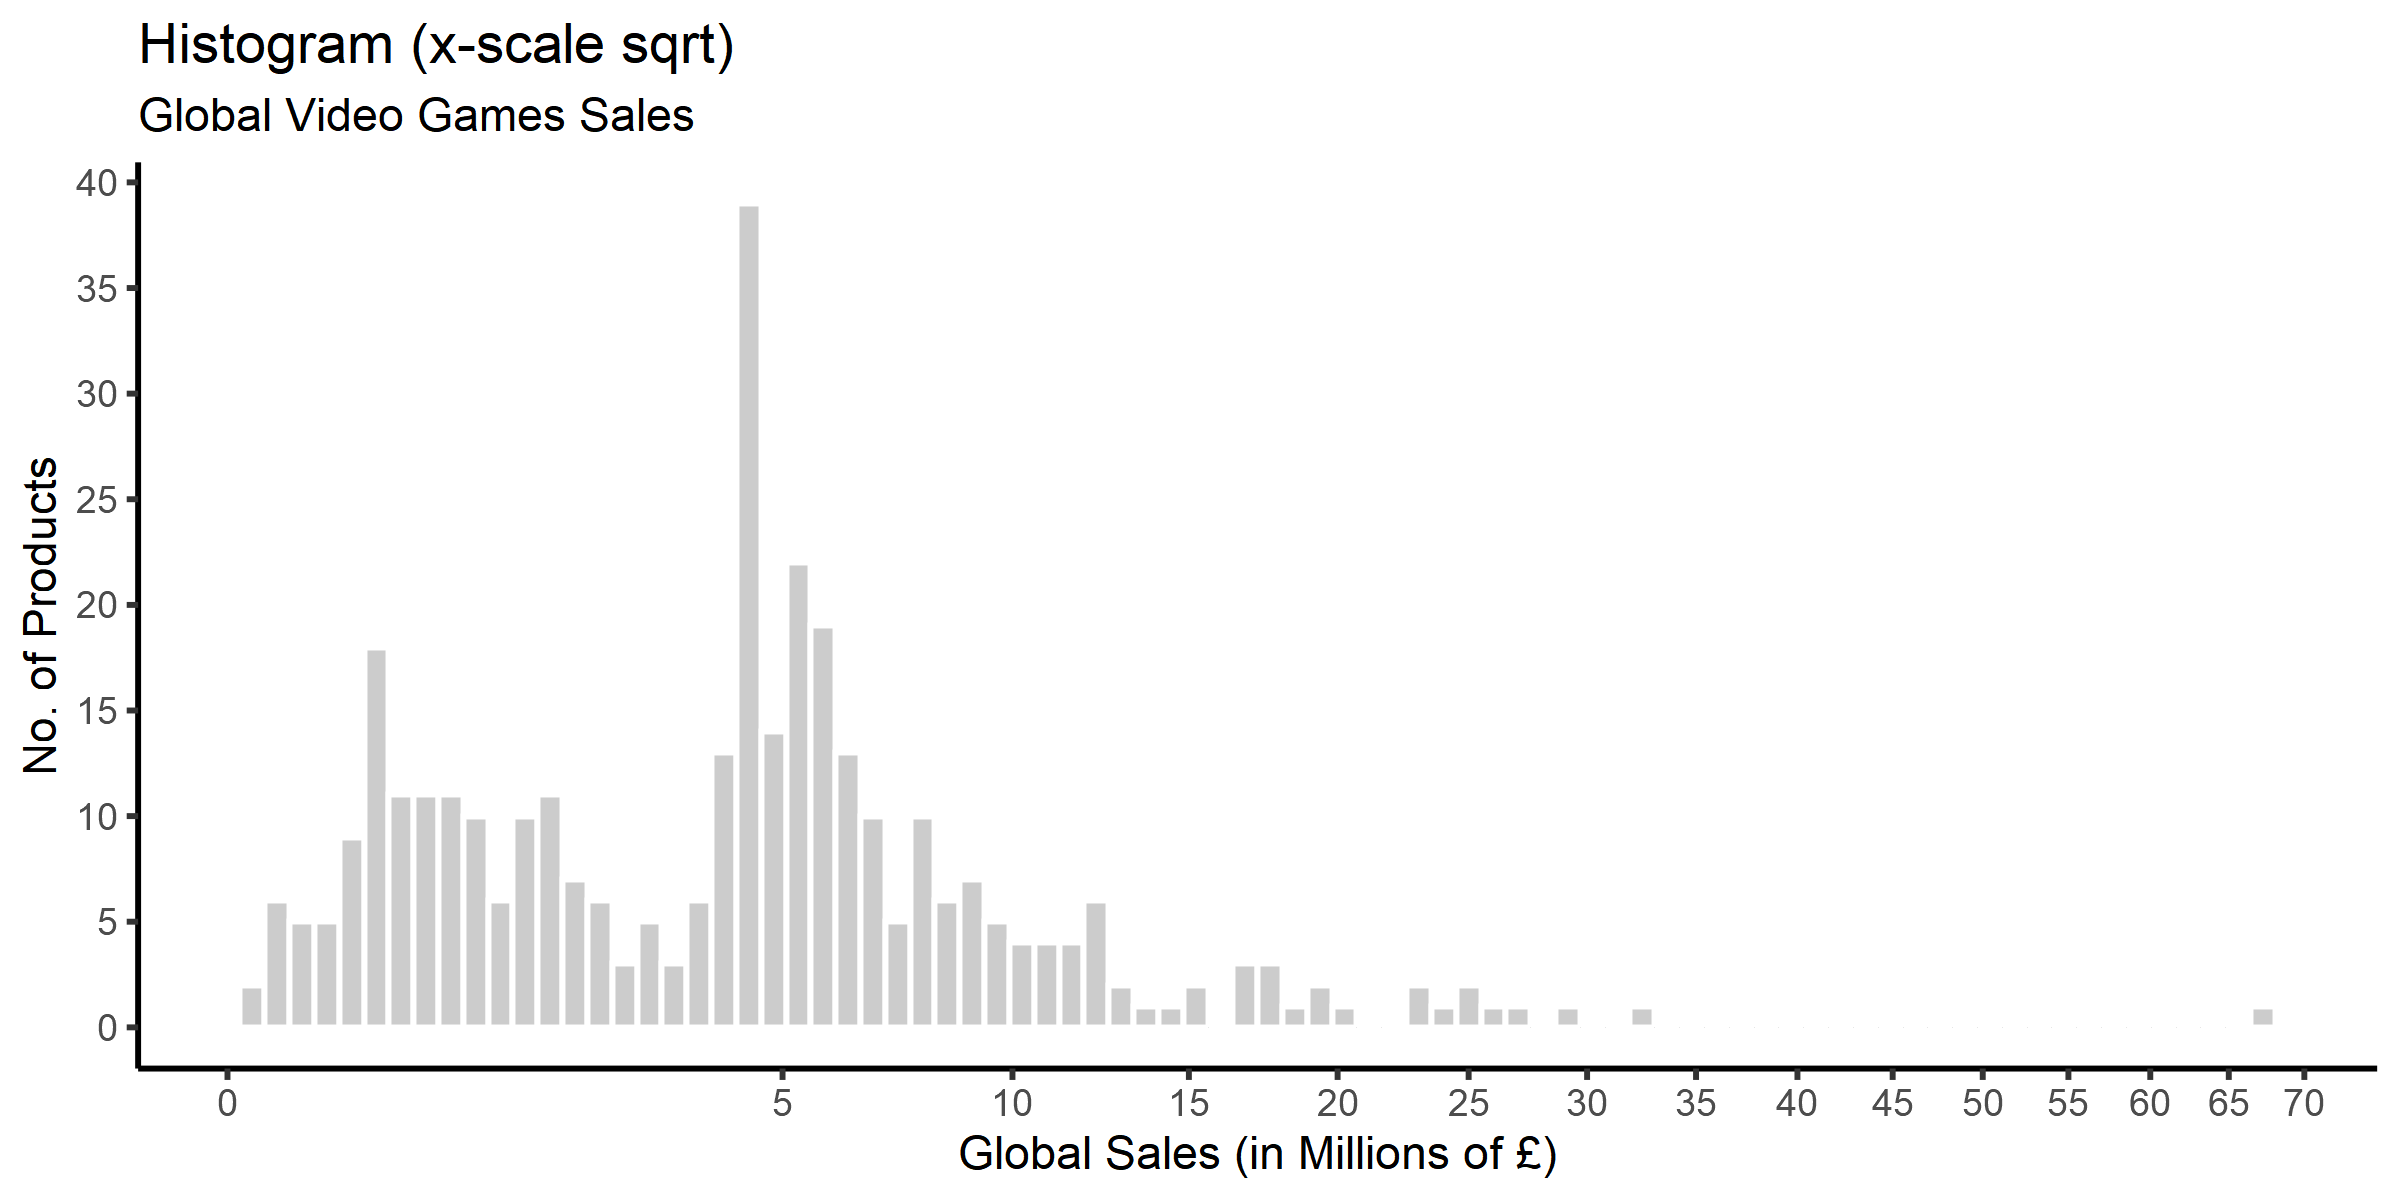

In [136]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(ts_num, aes(x = global_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.1, colour='white', fill=colours[1,3], aes(y =after_stat(count))) + 

    # Scale the x-axis
    scale_x_sqrt(breaks=seq(0, 70, 5)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 50, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram (x-scale sqrt)',
         subtitle = 'Global Video Games Sales ',
         x = 'Global Sales (in Millions of £)') +

    # Add theme
    theme_classic()

Using the Square Root function on the x-axis can show the sales between 0 and 15 million more clearly.

### Boxplot

In [121]:
summary(ts_num$global_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   1.115   4.320   5.335   6.435  67.850 

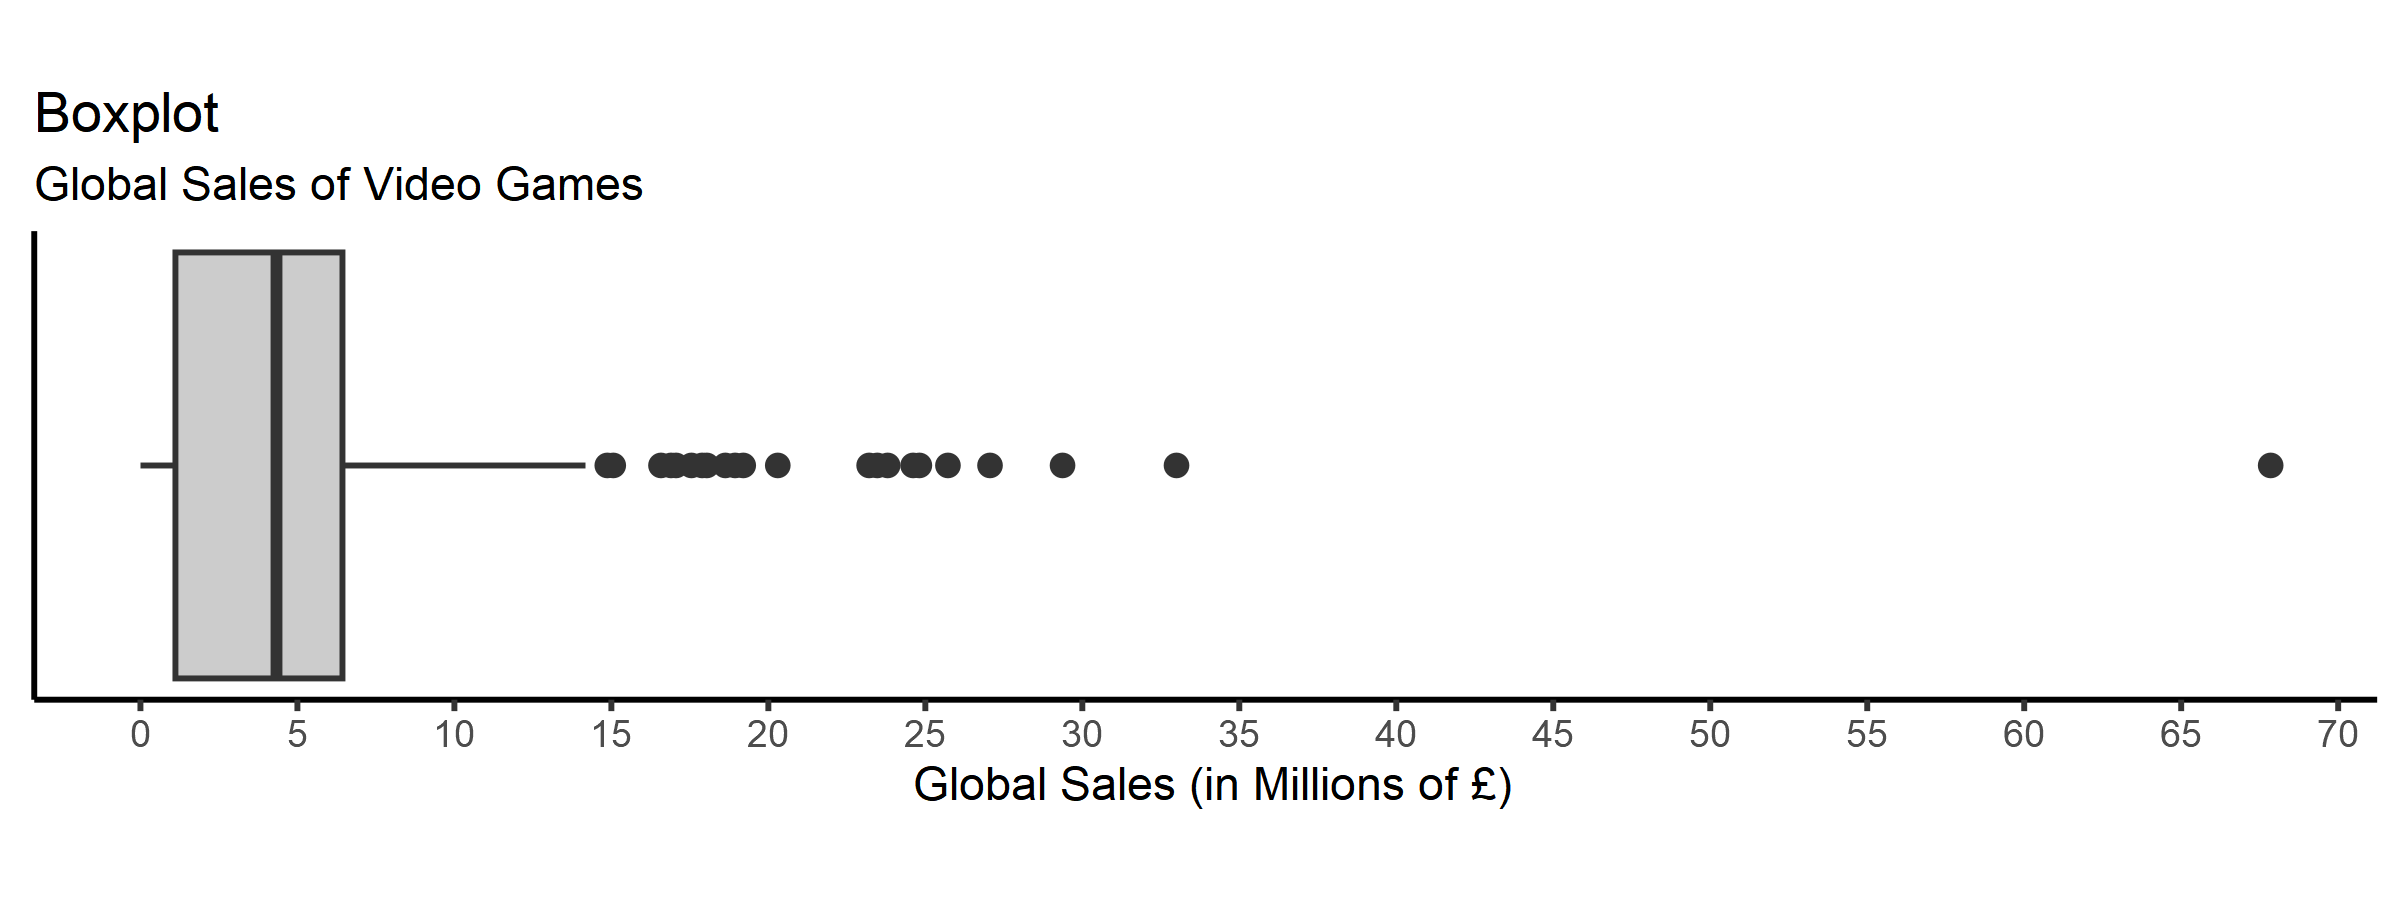

In [123]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=ts_num, aes(x=global_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,3], outlier.color=colours[2,3], outlier.size=2) + 

    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 70, 5)) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot',
         subtitle = 'Global Sales of Video Games',
         x = ' Global Sales (in Millions of £)') +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5)

The boxplot shows that sales values above 15 million are outliers. The majority of the sales values are below 6 million.

#### Remove Outliers

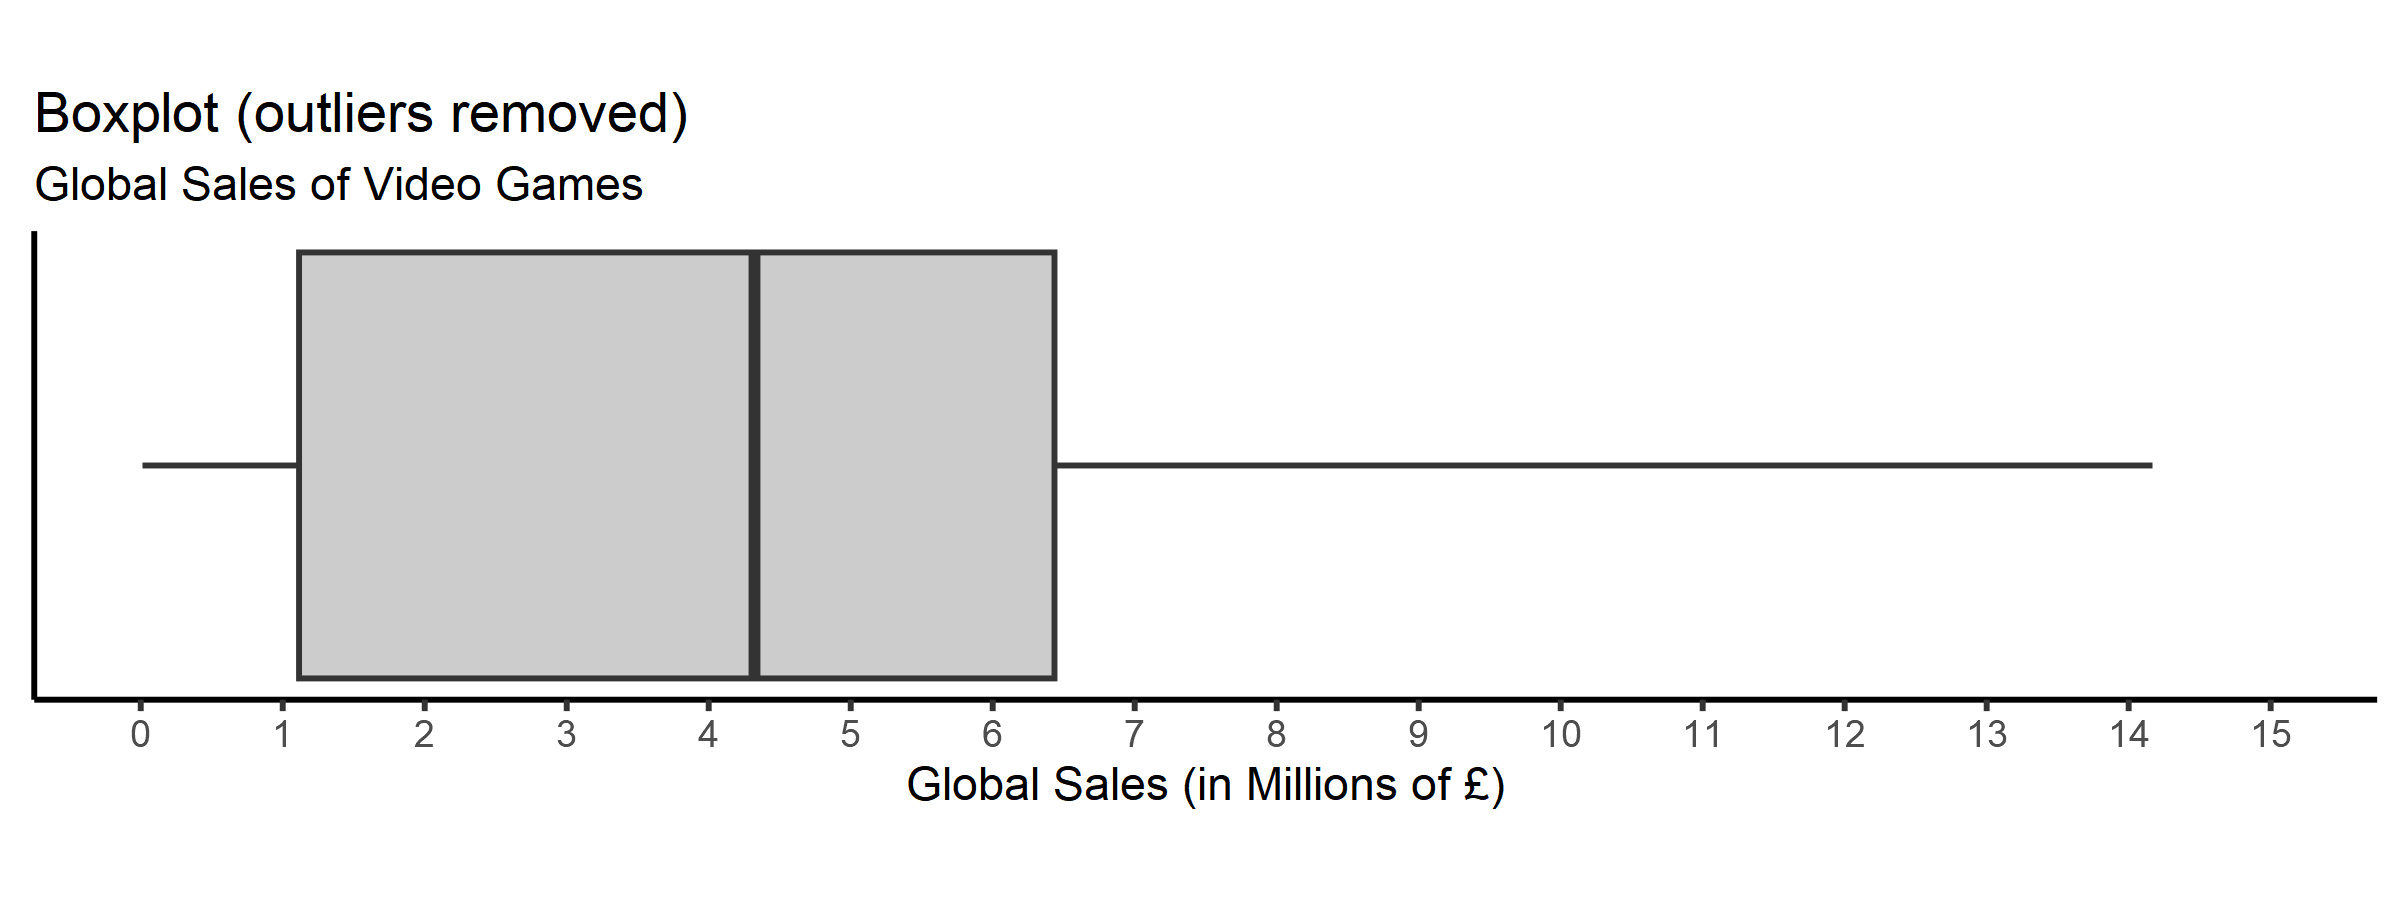

In [125]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=ts_num, aes(x=global_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,3], outlier.shape=NA) + 

    # set limit on x-scale
    coord_cartesian(xlim =  c(0, 15)) +
    
    # setup the x-scale
    scale_x_continuous(breaks=seq(0, 15, 1)) +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot (outliers removed)',
         subtitle = 'Global Sales of Video Games',
         x = 'Global Sales (in Millions of £)')

Removing the outliers shows the distribution of the video games sales between 0 and 15 million more clearly.

### (iv) Scatterplot Relationships <a id="44"></a>

### (a) Europe Sales vs. North America Sales

In [163]:
# correlation between eu_sales and na_sales
print(cor(ts_num$eu_sales,ts_num$na_sales))

[1] 0.7055236


In [137]:
# subset na_sales above 15 and below 25 million
ts_num_subset_1 <- ts_num[ts_num$na_sales > 15 & ts_num$na_sales < 25,]

# subset na_sales above 25 million
ts_num_subset_2 <- ts_num[ts_num$na_sales > 25,]

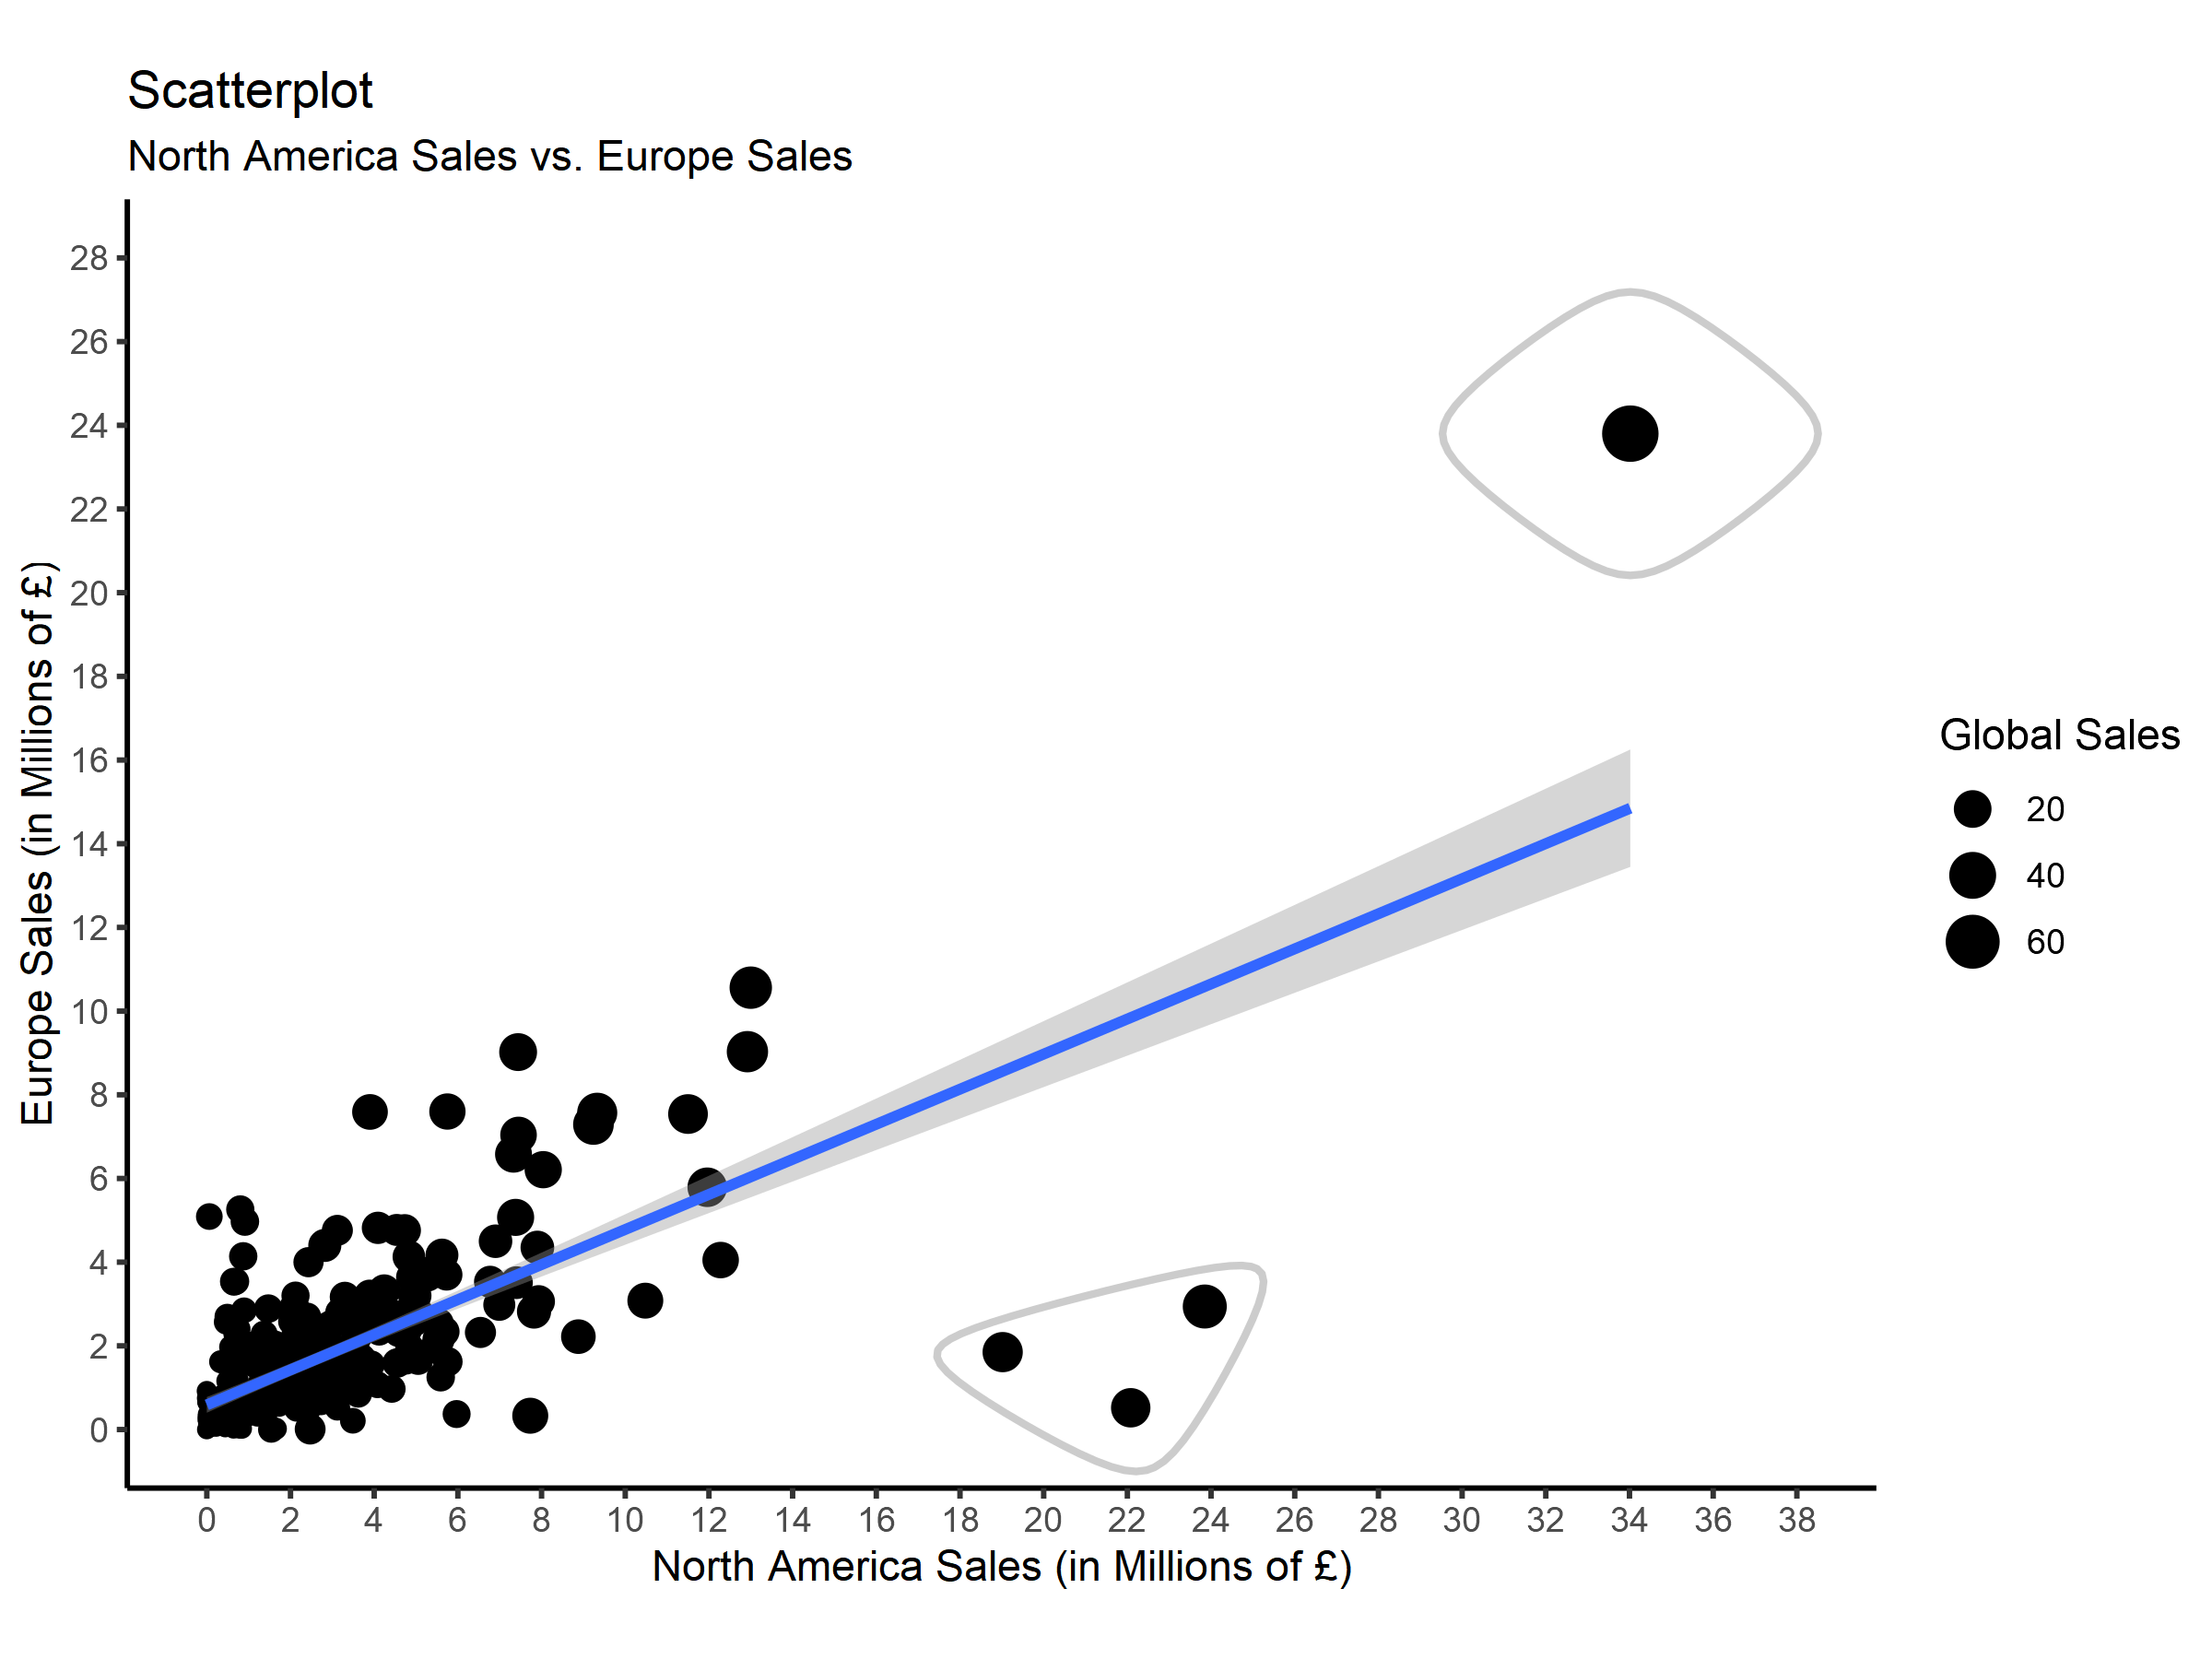

In [148]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create scatterplot na_sales vs. eu_sales
ggplot(data=ts_num, aes(x=na_sales, y=eu_sales)) + 
    
    # scatterplot
    geom_point(aes(size=global_sales)) + 

    # add regression line
    geom_smooth(method=lm, formula='y~x') + 

    # circle the outliers
    geom_encircle(aes(x=na_sales, y=eu_sales), 
                data=ts_num_subset_1, 
                color='#cccccc', 
                size=2, 
                expand=0.05) +

    # circle the outliers
    geom_encircle(aes(x=na_sales, y=eu_sales), 
                data=ts_num_subset_2, 
                color='#cccccc', 
                size=2, 
                expand=0.01) +

    # setup x-axis
    scale_x_continuous(breaks=seq(0, 38, 2)) +

    # setup y-axis
    scale_y_continuous(breaks=seq(0, 28, 2)) +

    # set up the x-axis and y-axis coordinates
    coord_fixed(xlim =c(NA, 38), ylim = c(NA, 28)) +
   
    # Add labels for title, subtitle and x-axis
    labs(title = 'Scatterplot',
         subtitle = 'North America Sales vs. Europe Sales',
         x = 'North America Sales (in Millions of £)',
         y = 'Europe Sales (in Millions of £)',
         size = 'Global Sales') +
        
    # set the theme
    theme_classic()

> The outliers have been highlighted by grey circles. A strong positive correlation (0.7) between reported sales.

### (b) Global Sales vs. North America Sales

In [164]:
# correlation between global_sales and na_sales
print(cor(ts_num$global_sales,ts_num$na_sales))

[1] 0.9349455


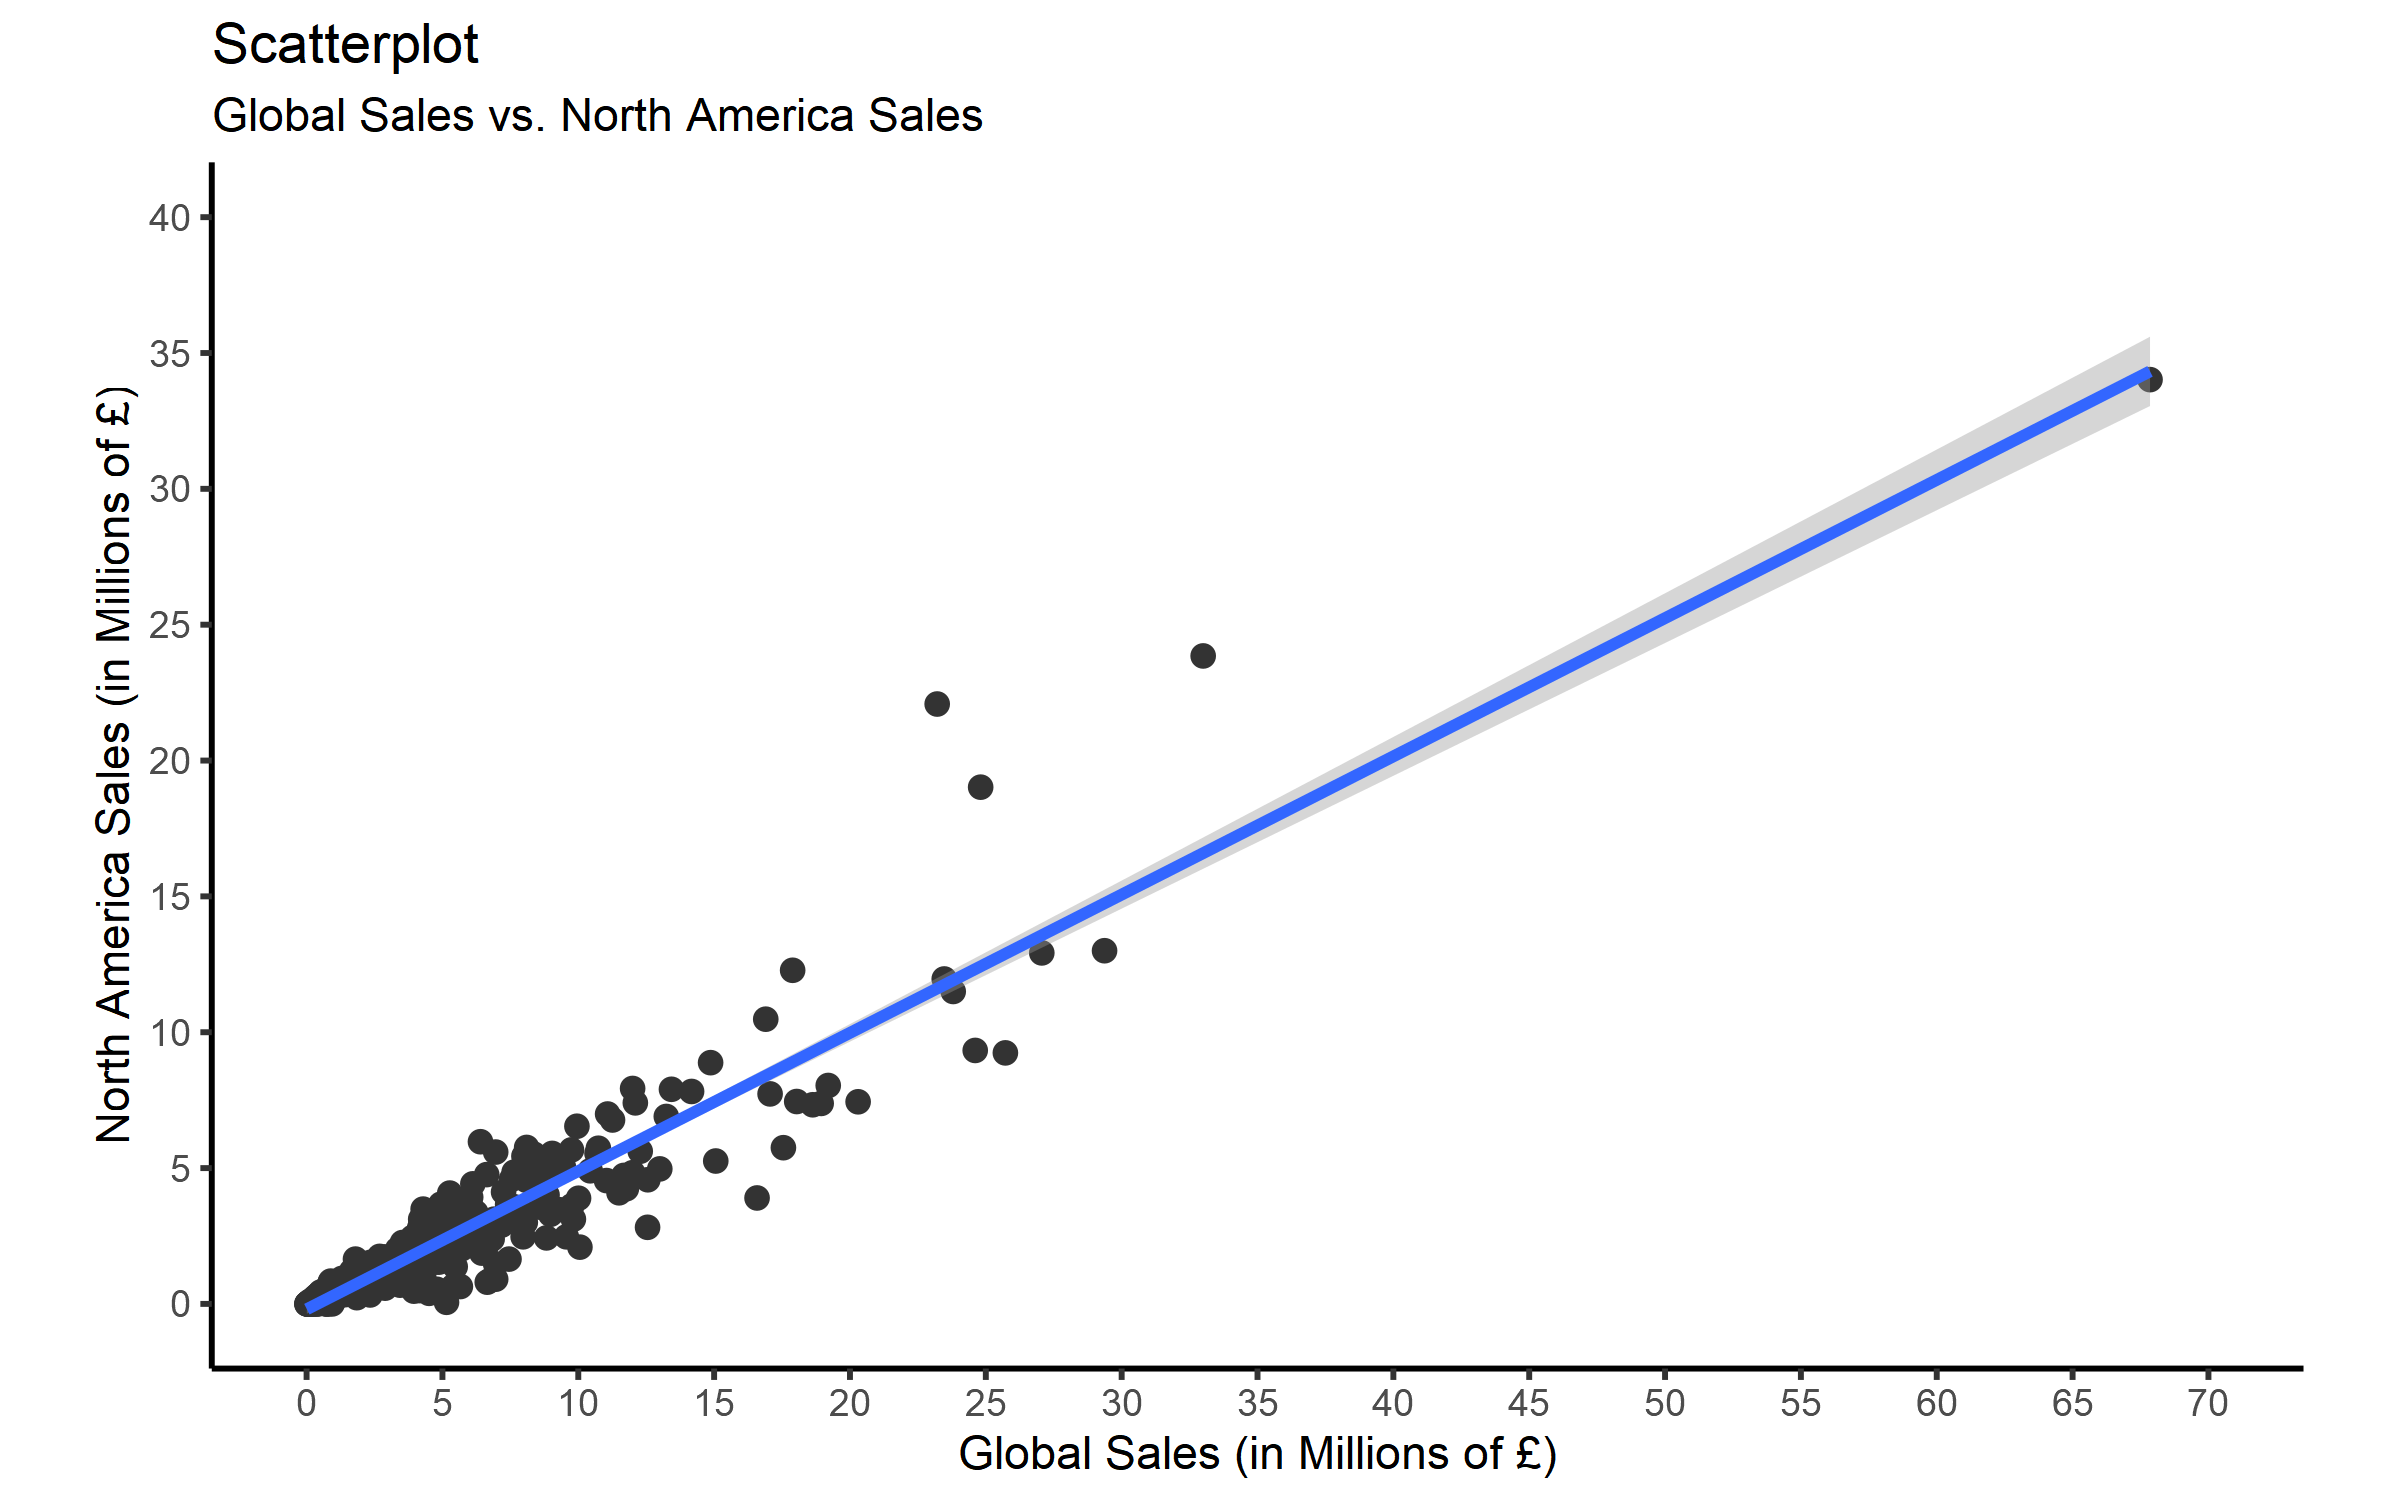

In [161]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)

# Create scatterplot na_sales vs. eu_sales
ggplot(data=ts_num, aes(x=global_sales, y=na_sales)) + 
    
    # scatterplot
    geom_point(colour='#333333', size=2) + 

    # add regression line
    geom_smooth(method=lm, formula='y~x') + 

    # setup x-axis
    scale_x_continuous(breaks=seq(0, 70, 5)) +

    # setup y-axis
    scale_y_continuous(breaks=seq(0, 40, 5)) +

    # set up the x-axis and y-axis coordinates
    coord_fixed(xlim =c(NA, 70), ylim = c(NA, 40)) +
   
    # Add labels for title, subtitle and x-axis
    labs(title = 'Scatterplot',
         subtitle = 'Global Sales vs. North America Sales',
         x = 'Global Sales (in Millions of £)',
         y = 'North America Sales (in Millions of £)') +
        
    # set the theme
    theme_classic()

> A very strong positive correlation (0.93) between reported sales. This would be expected because North America Sales are a part of the value of Global Sales. As sales in North America increase, so too do Global sales.

### (c) Global Sales vs. Europe Sales

In [167]:
# correlation between global_sales and eu_sales
print(cor(ts_num$global_sales,ts_num$eu_sales))

[1] 0.8775575


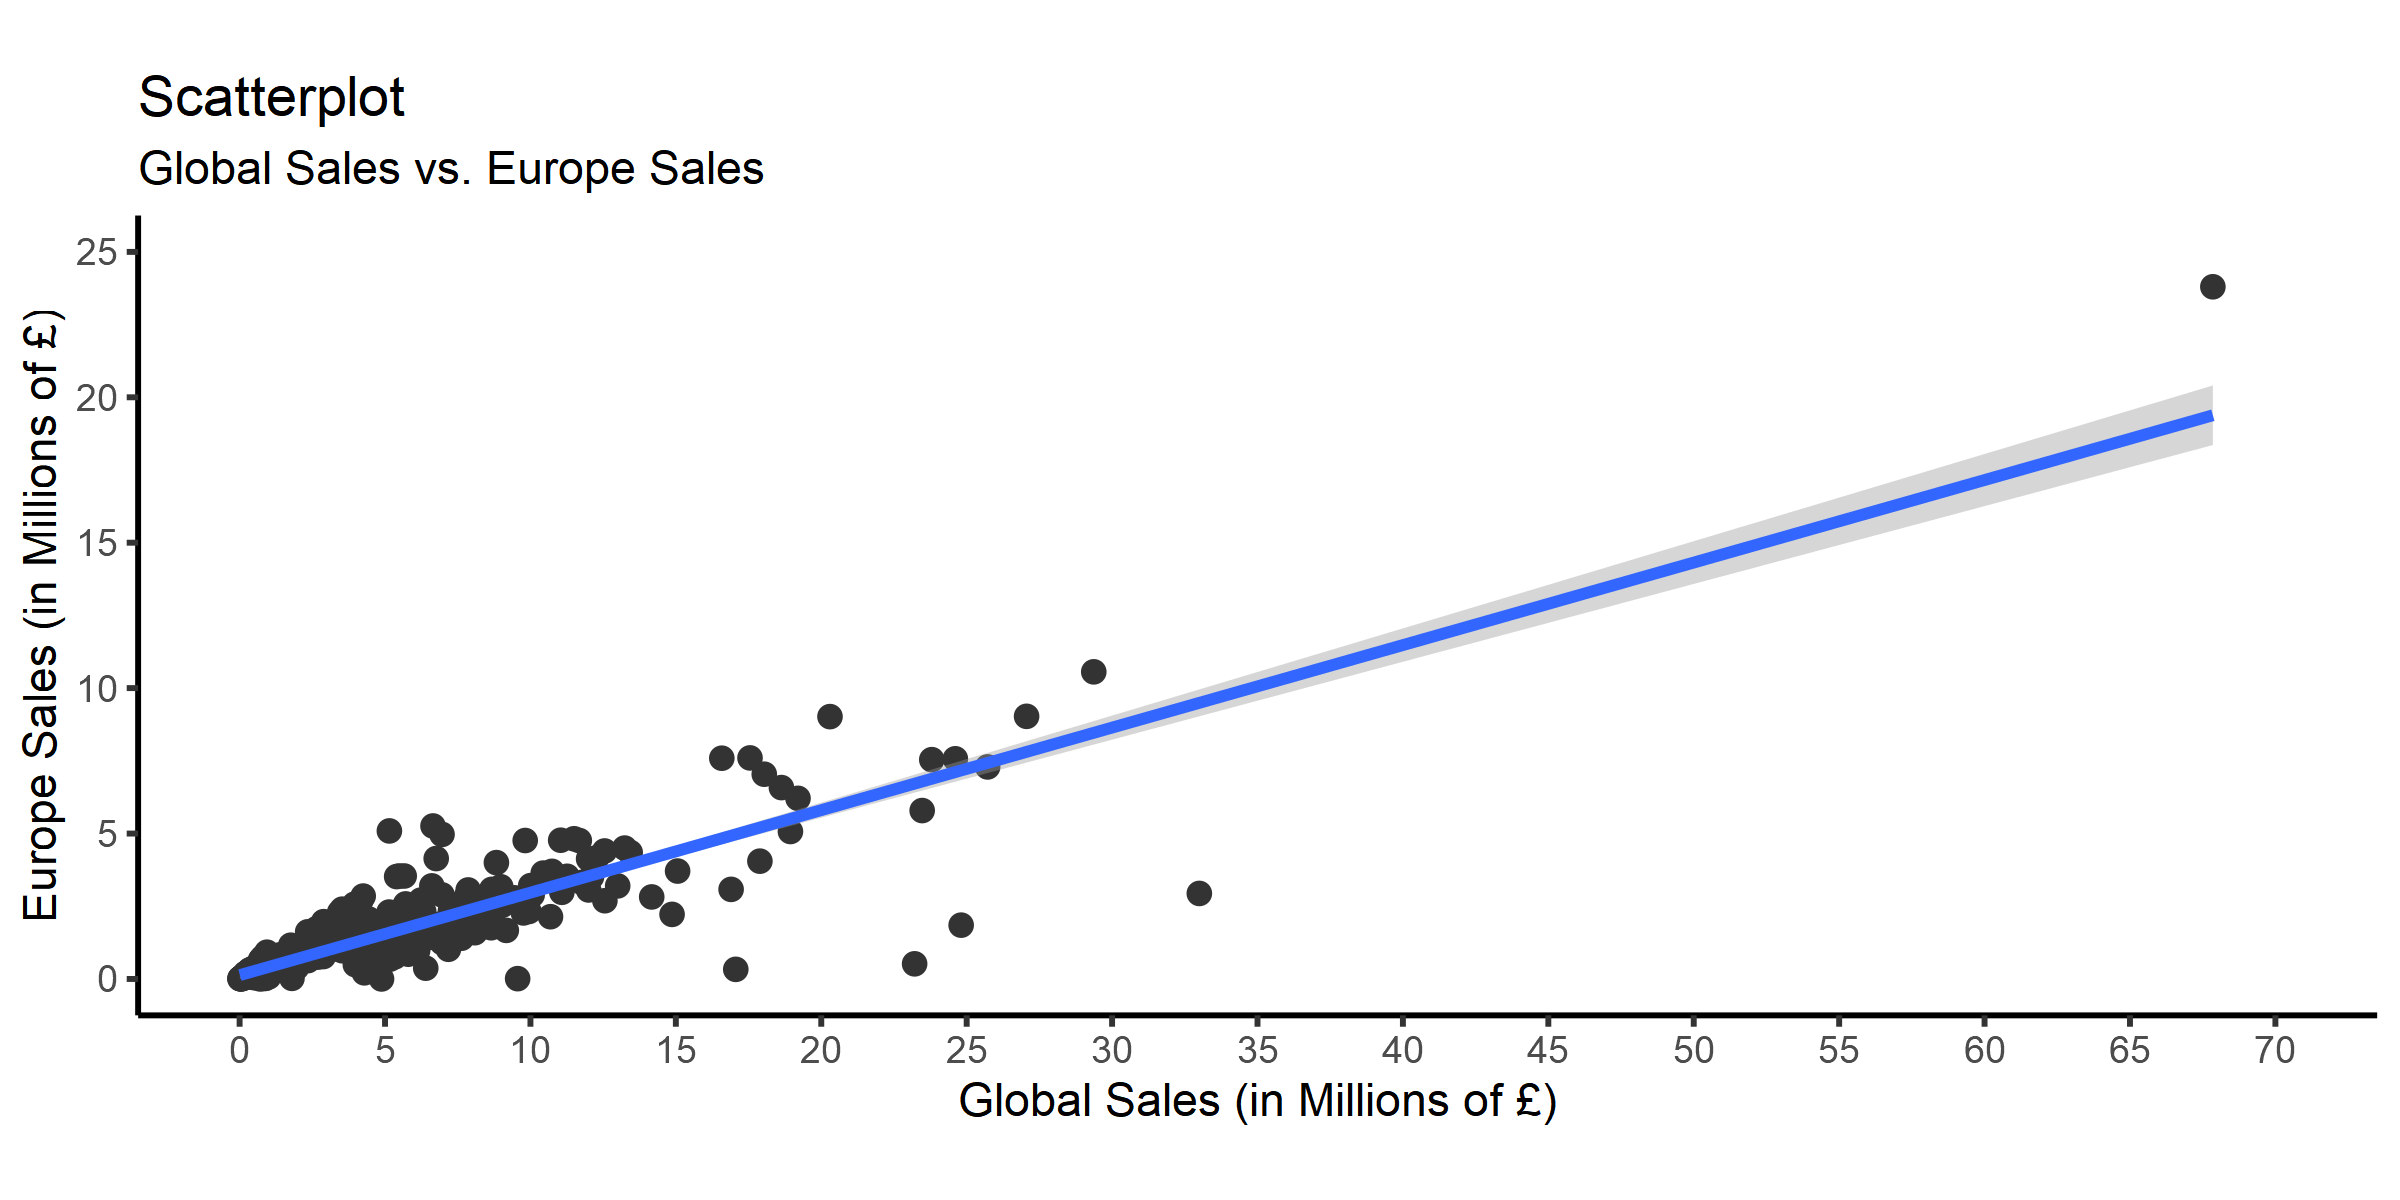

In [166]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# Create plot na_sales vs. eu_sales
ggplot(data=ts_num, aes(x=global_sales, y=eu_sales)) + 
    
    # scatterplot
    geom_point(colour='#333333', size=2) + 

    # add regression line
    geom_smooth(method=lm, formula='y~x') + 

    # setup x-axis
    scale_x_continuous(breaks=seq(0, 70, 5)) +

    # setup y-axis
    scale_y_continuous(breaks=seq(0, 25, 5)) +

    # set up the x-axis and y-axis coordinates
    coord_fixed(xlim =c(NA, 70), ylim = c(NA, 25)) +
   
    # Add labels for title, subtitle and x-axis
    labs(title = 'Scatterplot',
         subtitle = 'Global Sales vs. Europe Sales',
         x = 'Global Sales (in Millions of £)',
         y = 'Europe Sales (in Millions of £)') +
        
    # set the theme
    theme_classic()

> A very strong positive correlation (0.87) between reported sales, although less than sales in North America vs Global. A strong correlation would be expected because Europe Sales are a part of the value of Global Sales. As sales in Europe increase, so too do Global sales.

### (v) Investigate Product Sales by Categories <a id="45"></a>

### (a) Product Sales by Genre

### Global Sales

In [429]:
# subset groupby genre for sum of global_sales
ts_grp_genre_gl <- ts %>% group_by(genre)  %>% 
                          summarise(global_sales = sum(global_sales), .groups = 'drop') %>%
                          arrange(desc(global_sales)) %>%
                          slice(1:10)

# sort data
ts_grp_genre_gl = ts_grp_genre_gl[order(-ts_grp_genre_gl$global_sales),]

View(ts_grp_genre_gl)

genre,global_sales
<chr>,<dbl>
Shooter,320.96
Platform,290.11
Action,282.83
Role-Playing,257.02
Sports,225.62
Racing,159.26
Misc,146.50
Simulation,63.58
Puzzle,62.01


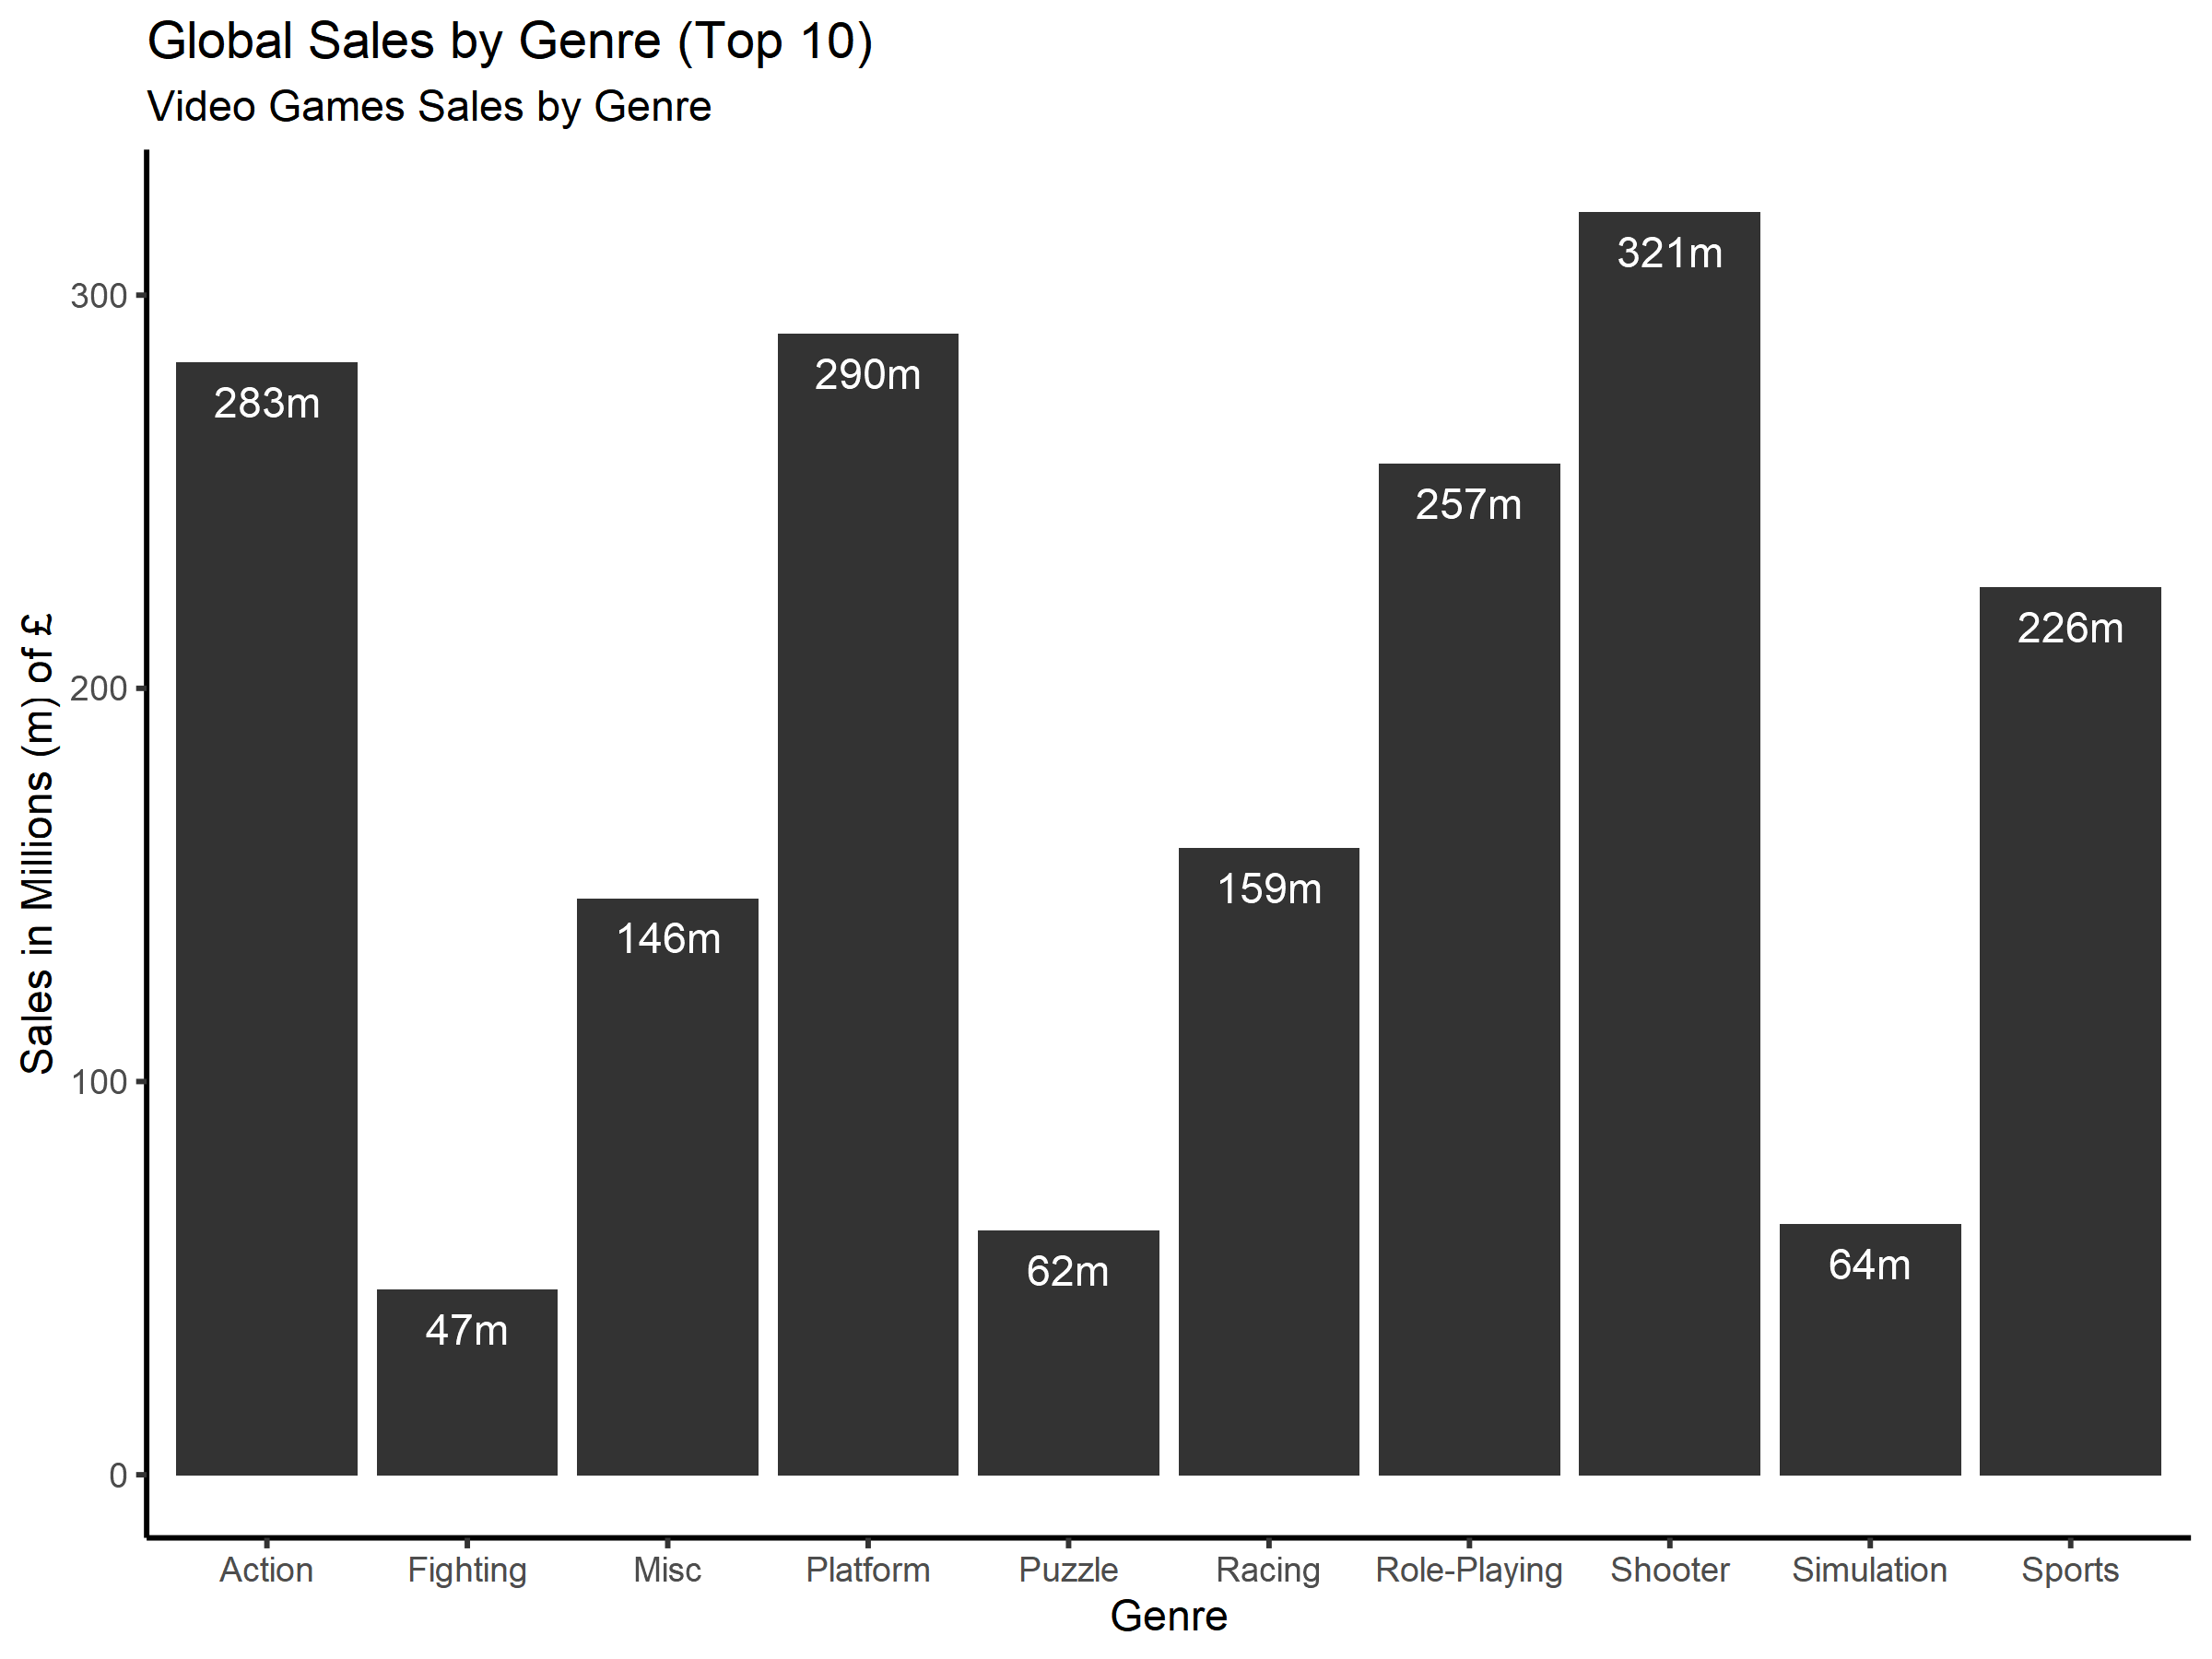

In [443]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_genre_gl, aes(y=global_sales, x=genre)) + 
    
    # Set as barplot
    geom_bar(stat='identity', fill=colours[2,3], show.legend = FALSE) + 

    # Add text to each bar
    geom_text(aes(y=global_sales-10, label=paste(round(global_sales), 'm', sep = '')), data=ts_grp_genre_gl, colour='white') +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Global Sales by Genre (Top 10)',
         subtitle = 'Video Games Sales by Genre',
         x = 'Genre',
         y = 'Sales in Millions (m) of £') + 

    # set the theme
    theme_classic()

    # export the plot 
    ggsave("global_sales_by_genre.png", width=8, height=6, dpi = 300)

- Shooter games are the best-selling video games products with £321 million in sales.
- Platform, Action, Role-Playing and Sports games are popular.

### Europe & North America Sales

In [436]:
# subset groupby genre for sum of eu_sales and na_sales
ts_grp_genre_eu_na <- ts %>% group_by(genre)  %>%
                    summarise('Europe' = sum(eu_sales),
                              'North America' = sum(na_sales),
                              global_sales = sum(global_sales), .groups = 'drop') %>%
                    arrange(desc(global_sales)) %>%
                    slice(1:10)

# remove global_sales column
ts_grp_genre_eu_na = ts_grp_genre_eu_na[,!(names(ts_grp_genre_eu_na) %in% c('global_sales'))]

# use melt function to reshape dataframe
ts_grp_genre_eu_na <- reshape2::melt(ts_grp_genre_eu_na, id.var = c('genre'),
                           variable.name = 'region')

View(ts_grp_genre_eu_na)

genre,region,value
<chr>,<fct>,<dbl>
Shooter,Europe,97.02
Platform,Europe,66.15
Action,Europe,96.67
Role-Playing,Europe,71.36
Sports,Europe,98.35
Racing,Europe,49.69
Misc,Europe,46.60
Simulation,Europe,26.33
Puzzle,Europe,10.57


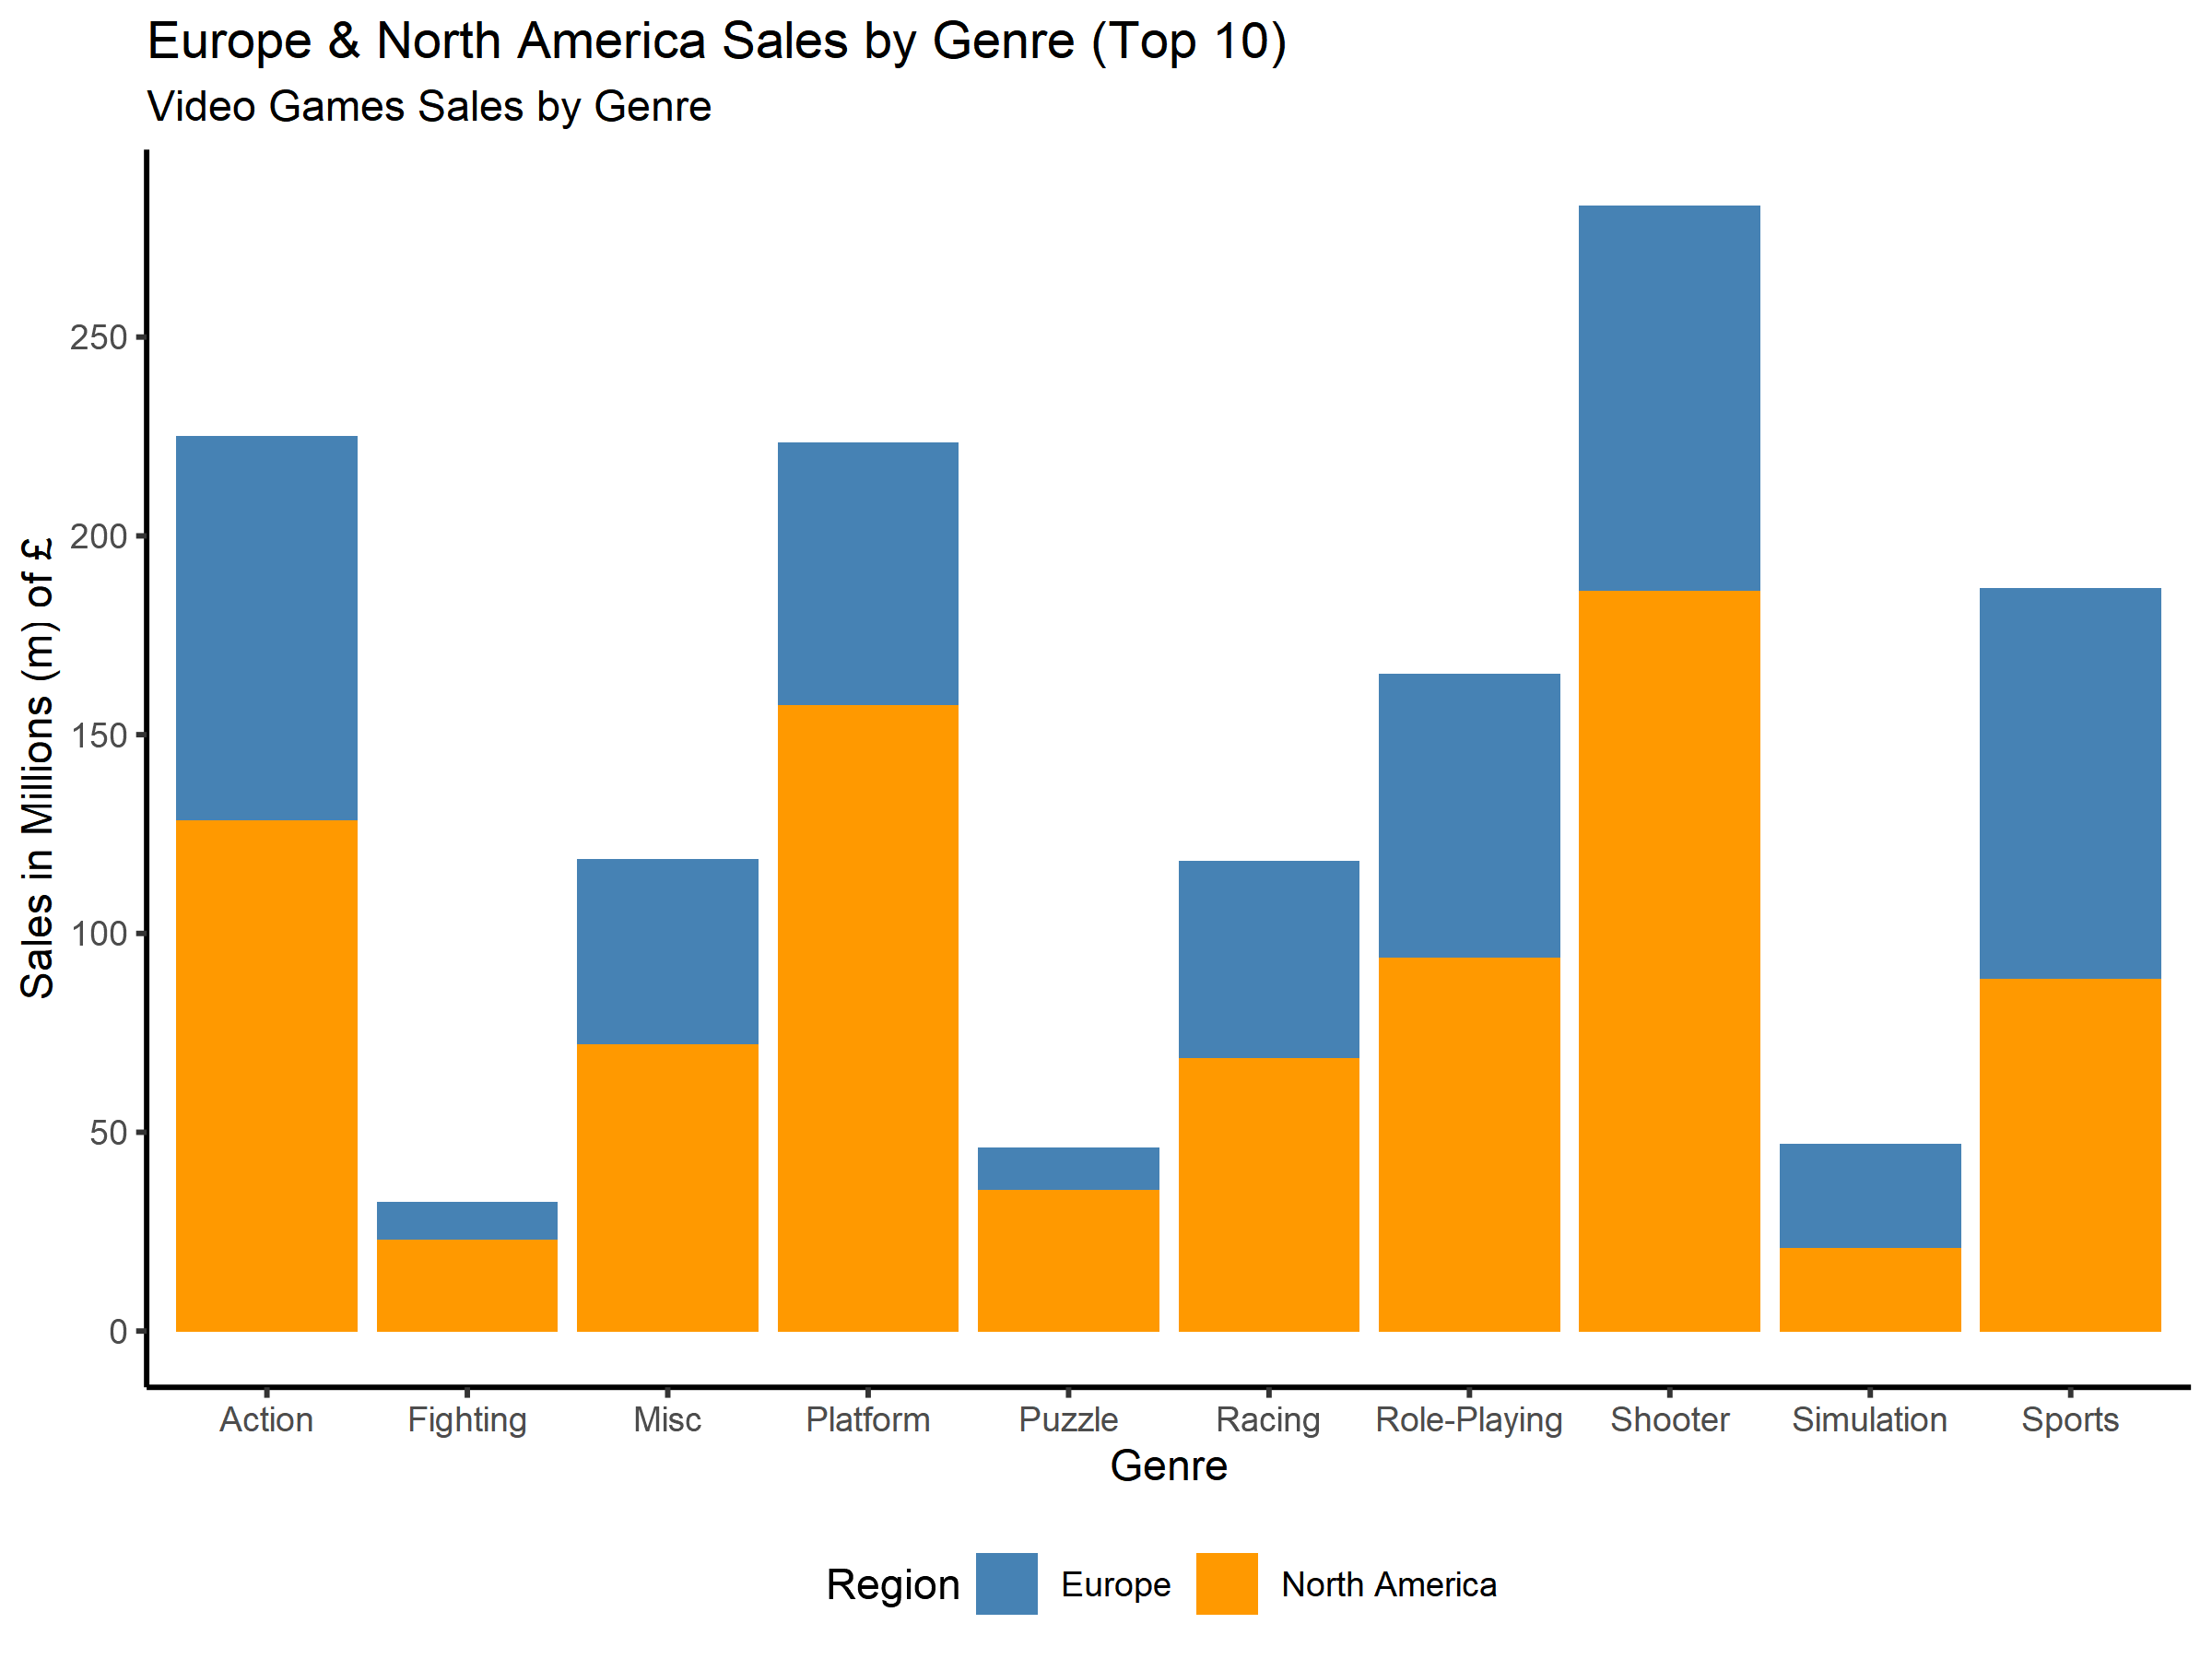

In [453]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_genre_eu_na, aes(fill=region, y=value, x=genre)) + 
    
    # Set as barplot
    geom_bar(position='stack', stat='identity') + 

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 250, 50)) +

    # set bar colours
    scale_fill_manual(values=c(colours[1,1], colours[1,2])) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Europe & North America Sales by Genre (Top 10)',
         subtitle = 'Video Games Sales by Genre',
         x = 'Genre',
         y = 'Sales in Millions (m) of £',
         fill = 'Region') +

    # set the theme
    theme_classic() +

    # set legend position
    theme(legend.position='bottom')

    # export the plot 
    ggsave("eu_na_sales_by_genre.png", width=8, height=6, dpi = 300)

- North America outperforms Europe in all genres, except Sports and Simulation.

### (b) Product Sales by Platform

### Global Sales

In [292]:
# subset groupby platform for sum of global_sales (top 10 only)
ts_grp_platform_gl <- ts %>% group_by(platform)  %>% 
    summarise(global_sales = sum(global_sales), .groups = 'drop') %>%
    arrange(desc(global_sales)) %>%
    slice(1:10)

View(ts_grp_platform_gl)

platform,global_sales
<chr>,<dbl>
Wii,312.56
X360,253.81
PS3,211.61
DS,205.02
GB,133.97
PS2,131.87
NES,91.40
PS,82.92
3DS,73.20


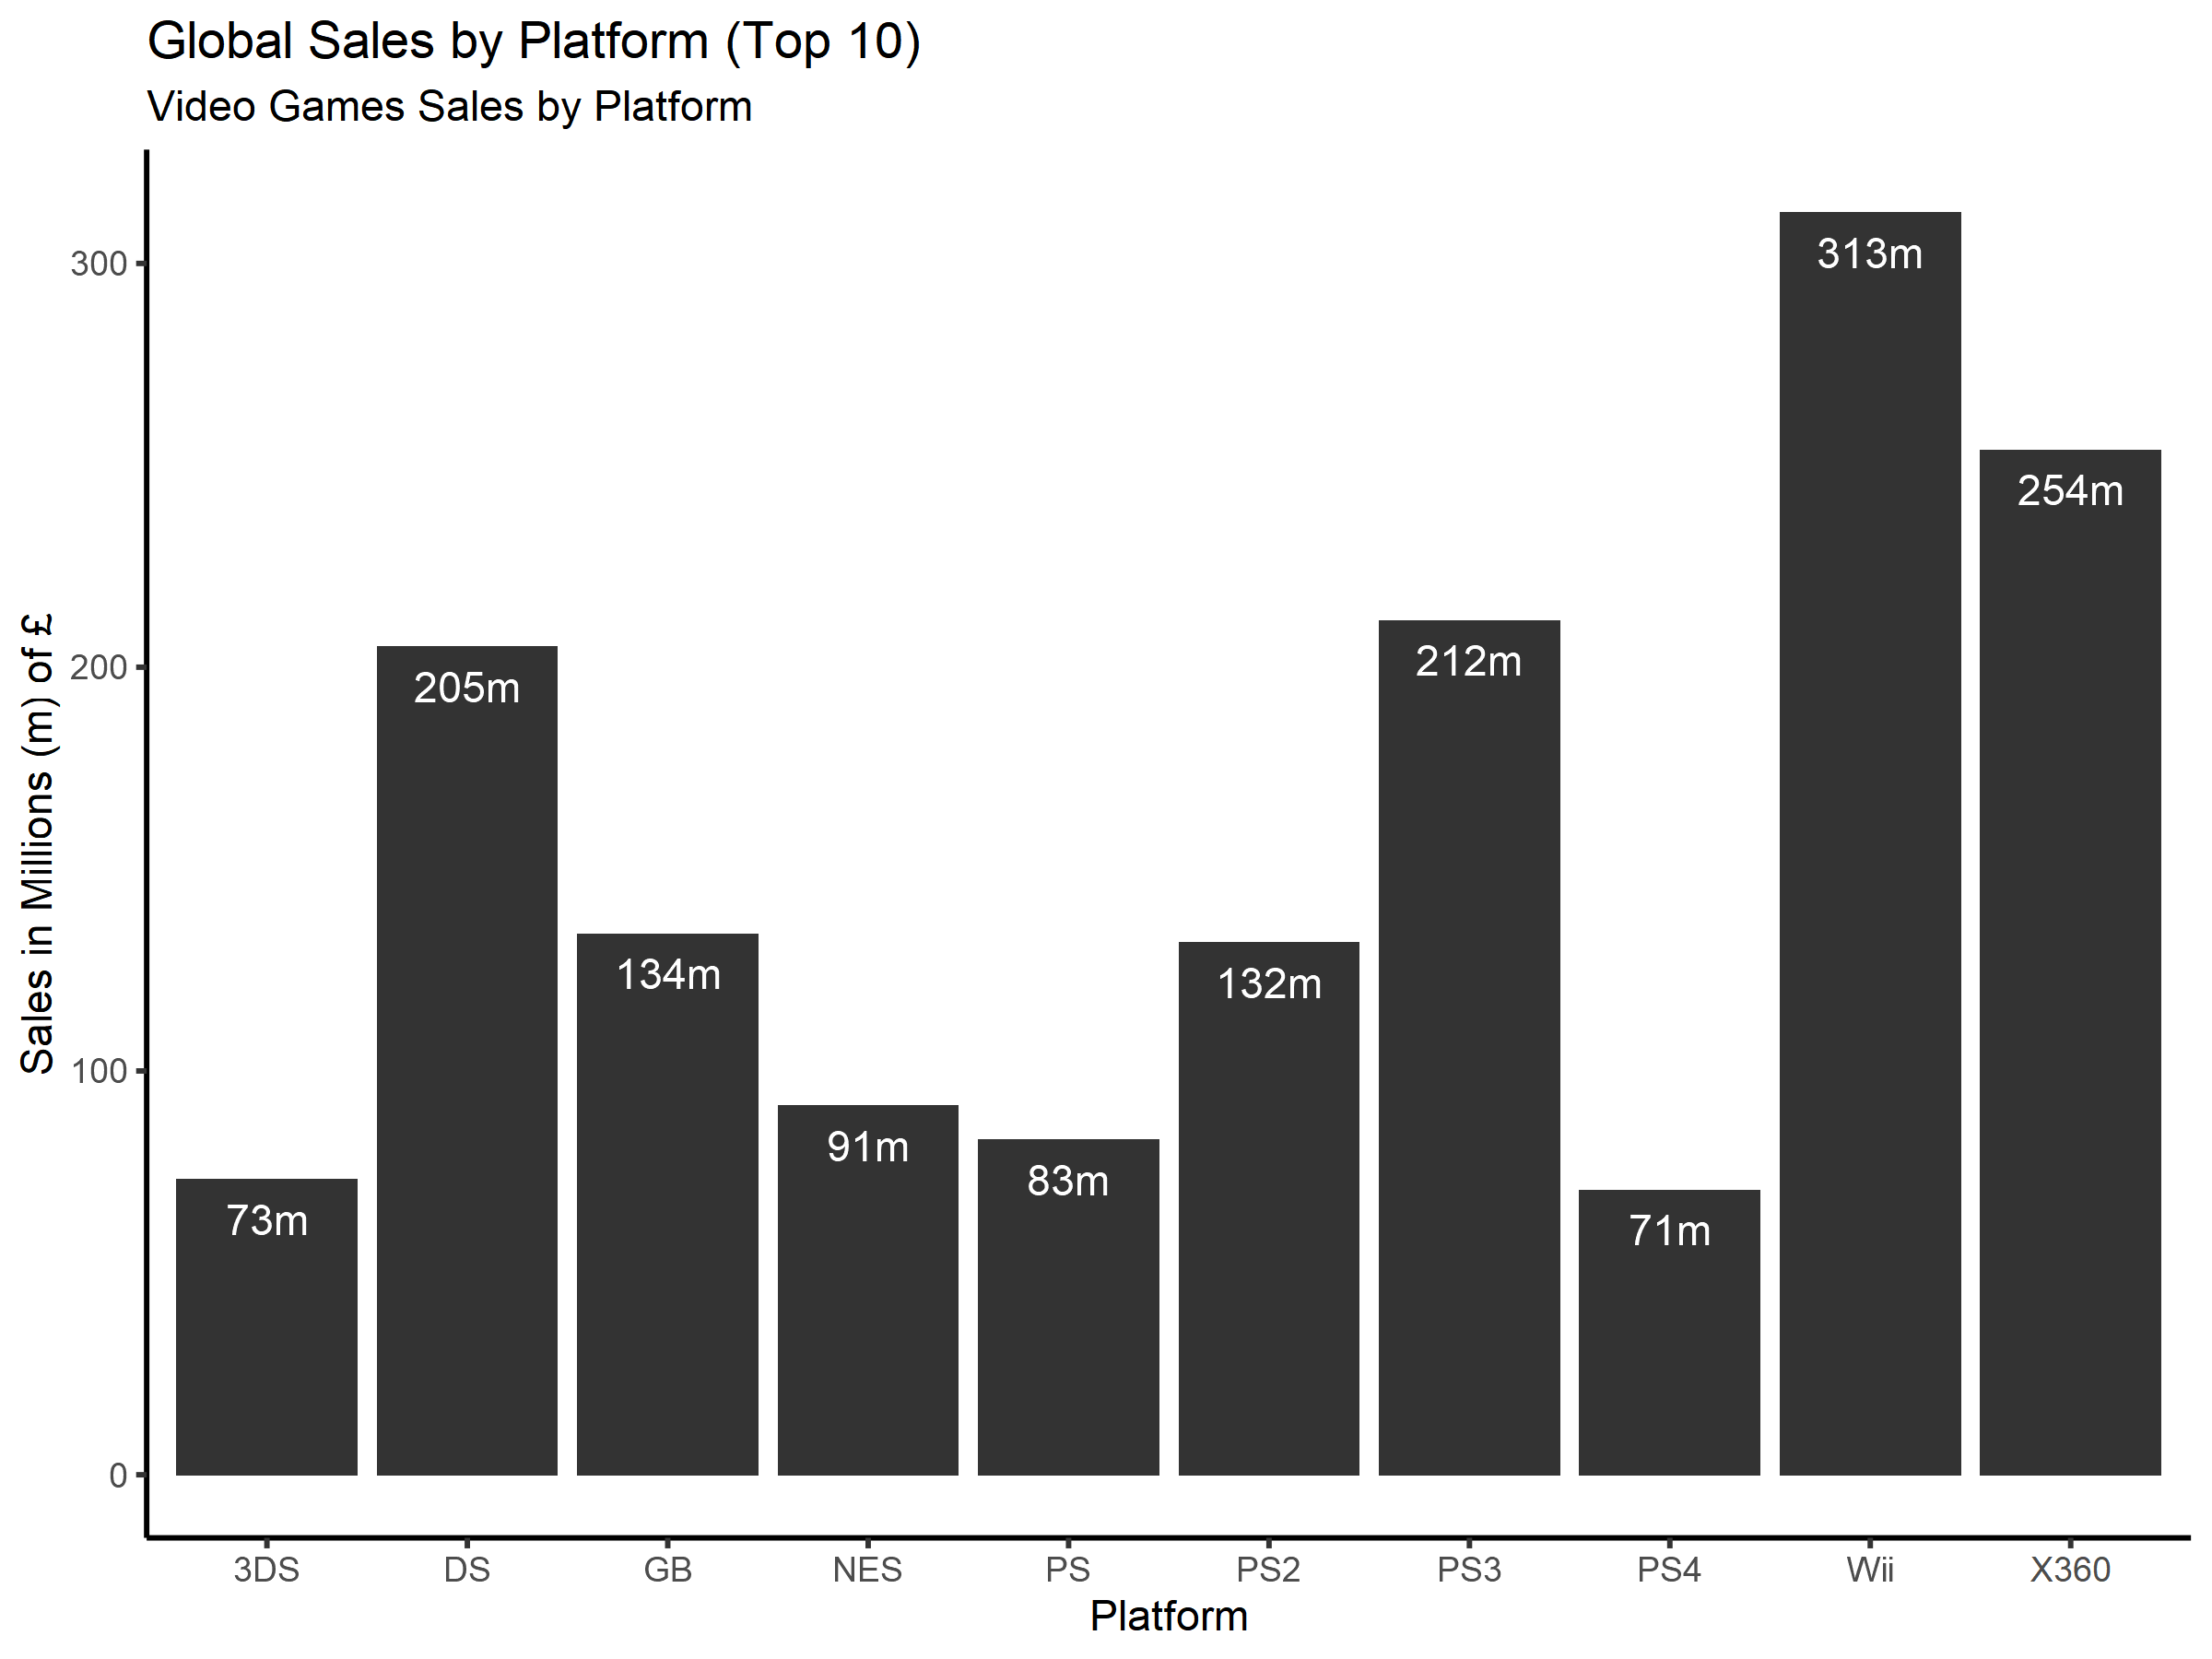

In [444]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_platform_gl, aes(y=global_sales, x=platform)) + 
    
    # Set as barplot
    geom_bar(stat='identity', fill=colours[2,3], show.legend = FALSE) + 

    # Add text to each bar
    geom_text(aes(y=global_sales-10, label=paste(round(global_sales), 'm', sep = '')), 
              data=ts_grp_platform_gl, colour='white') +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Global Sales by Platform (Top 10)',
         subtitle = 'Video Games Sales by Platform',
         x = 'Platform',
         y = 'Sales in Millions (m) of £') + 

    # set the theme
    theme_classic()

    # export the plot 
    ggsave("global_sales_by_platform.png", width=8, height=6, dpi = 300)

- The best-selling platform is the Wii with £313 million in sales.
- X360, DS and PS3 are also popular.

### Europe & North America Sales

In [437]:
# subset groupby platform for sum of eu_sales and na_sales
ts_grp_platform_eu_na <- ts %>% group_by(platform)  %>%
                    summarise('Europe' = sum(eu_sales),
                              'North America' = sum(na_sales),
                              global_sales = sum(global_sales), .groups = 'drop') %>%
                    arrange(desc(global_sales)) %>%
                    slice(1:10)

# remove global_sales column
ts_grp_platform_eu_na = ts_grp_platform_eu_na[,!(names(ts_grp_platform_eu_na) %in% c('global_sales'))]

# use melt function to reshape dataframe
ts_grp_platform_eu_na <- reshape2::melt(ts_grp_platform_eu_na, id.var = c('platform'),
                            variable.name = 'region')

View(ts_grp_platform_eu_na)

platform,region,value
<chr>,<fct>,<dbl>
Wii,Europe,104.99
X360,Europe,76.01
PS3,Europe,88.52
DS,Europe,65.60
GB,Europe,28.18
PS2,Europe,31.48
NES,Europe,9.14
PS,Europe,25.59
3DS,Europe,21.61


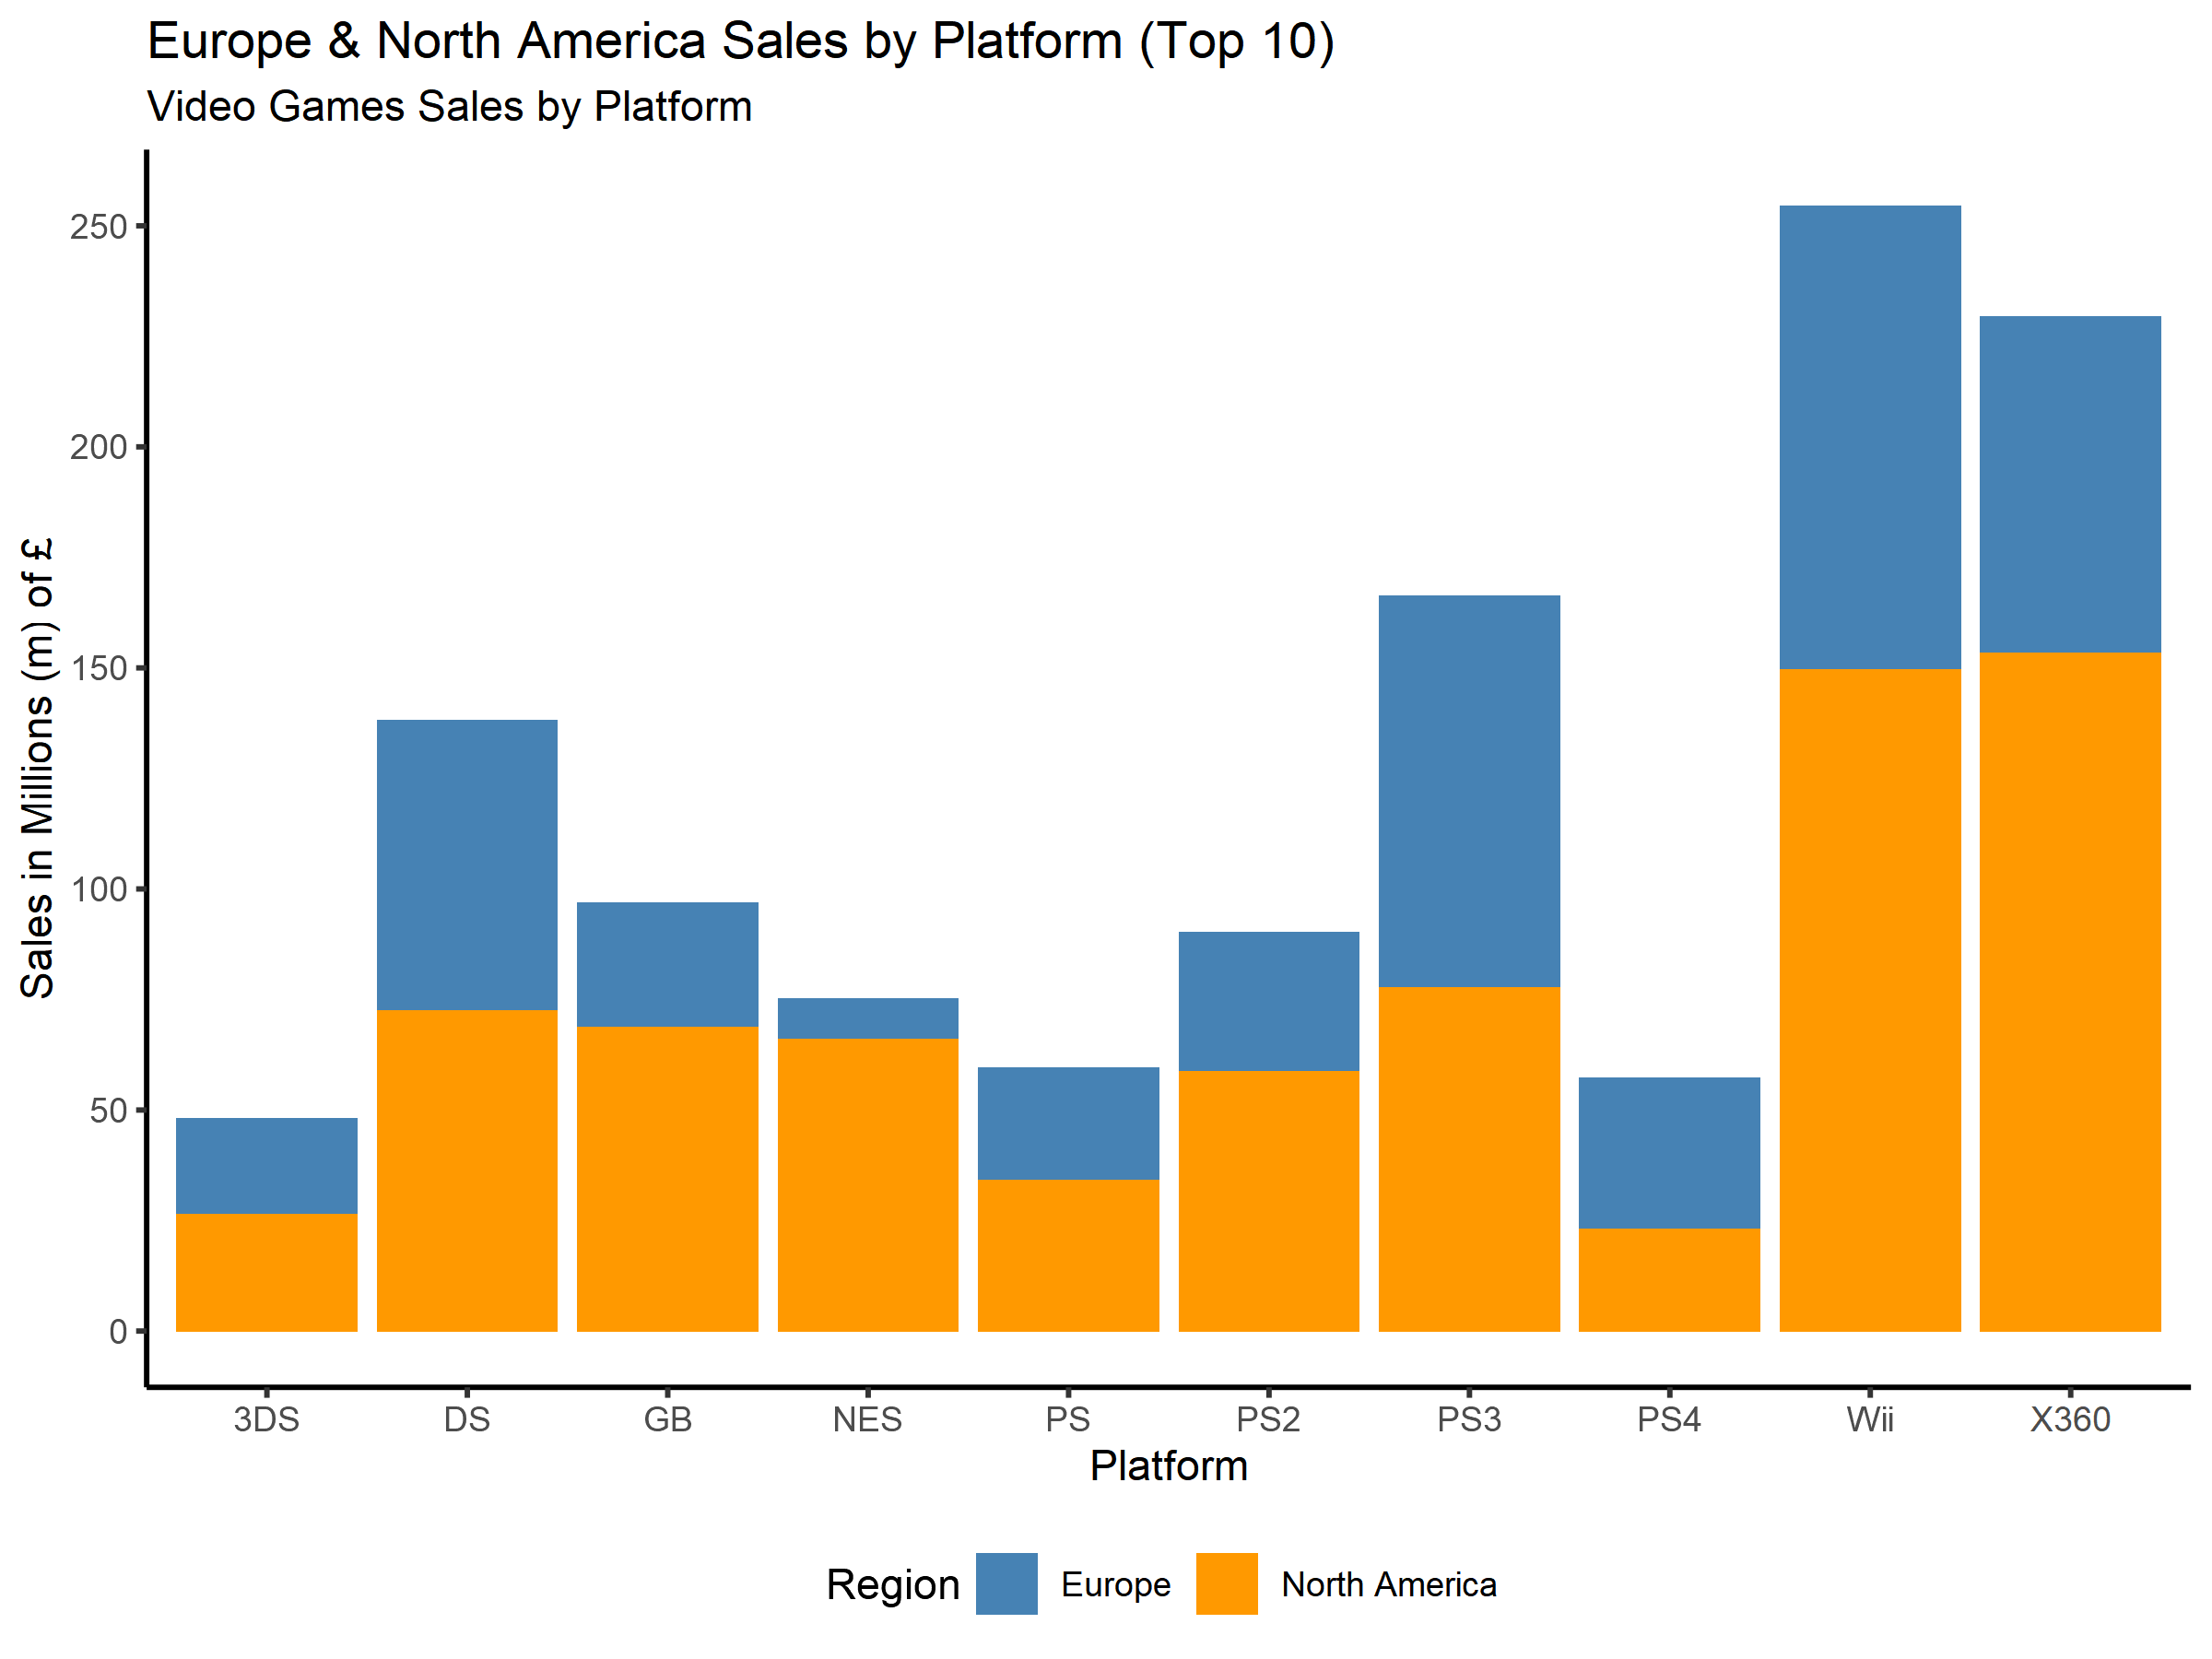

In [445]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_platform_eu_na, aes(fill=region, y=value, x=platform)) + 
    
    # Set as barplot
    geom_bar(position='stack', stat='identity') + 

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 250, 50)) +

    # set bar colours
    scale_fill_manual(values=c(colours[1,1], colours[1,2])) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Europe & North America Sales by Platform (Top 10)',
         subtitle = 'Video Games Sales by Platform',
         x = 'Platform',
         y = 'Sales in Millions (m) of £',
         fill = 'Region') +

    # set the theme
    theme_classic() +

    # set legend position
    theme(legend.position='bottom')

    # export the plot 
    ggsave("eu_na_sales_by_platform.png", width=8, height=6, dpi = 300)

- North America outperforms Europe in all platforms, except for PS3.

### (c) Product Sales by Publisher

### Global Sales

In [446]:
# subset groupby publisher for sum of global_sales (top 10 only)
ts_grp_publisher_gl <- ts %>% group_by(publisher)  %>% 
    summarise(global_sales = sum(global_sales), .groups = 'drop') %>%
    arrange(desc(global_sales)) %>%
    slice(1:7)

View(ts_grp_publisher_gl)

publisher,global_sales
<chr>,<dbl>
Nintendo,910.59
Activision,211.21
Electronic Arts,154.54
Take-Two Interactive,132.68
Sony Computer Entertainment,121.75
Microsoft Game Studios,105.37
Ubisoft,61.06


In [448]:
# rename publisher values to fit on chart
ts_grp_publisher_gl$publisher[ts_grp_publisher_gl$publisher == 'Sony Computer Entertainment'] <- 'Sony'
ts_grp_publisher_gl$publisher[ts_grp_publisher_gl$publisher == 'Microsoft Game Studios'] <- 'Microsoft'
ts_grp_publisher_gl$publisher[ts_grp_publisher_gl$publisher == 'Electronic Arts'] <- 'EA'
ts_grp_publisher_gl$publisher[ts_grp_publisher_gl$publisher == 'Take-Two Interactive'] <- 'Take-Two'

View(ts_grp_publisher_gl)

publisher,global_sales
<chr>,<dbl>
Nintendo,910.59
Activision,211.21
EA,154.54
Take-Two,132.68
Sony,121.75
Microsoft,105.37
Ubisoft,61.06


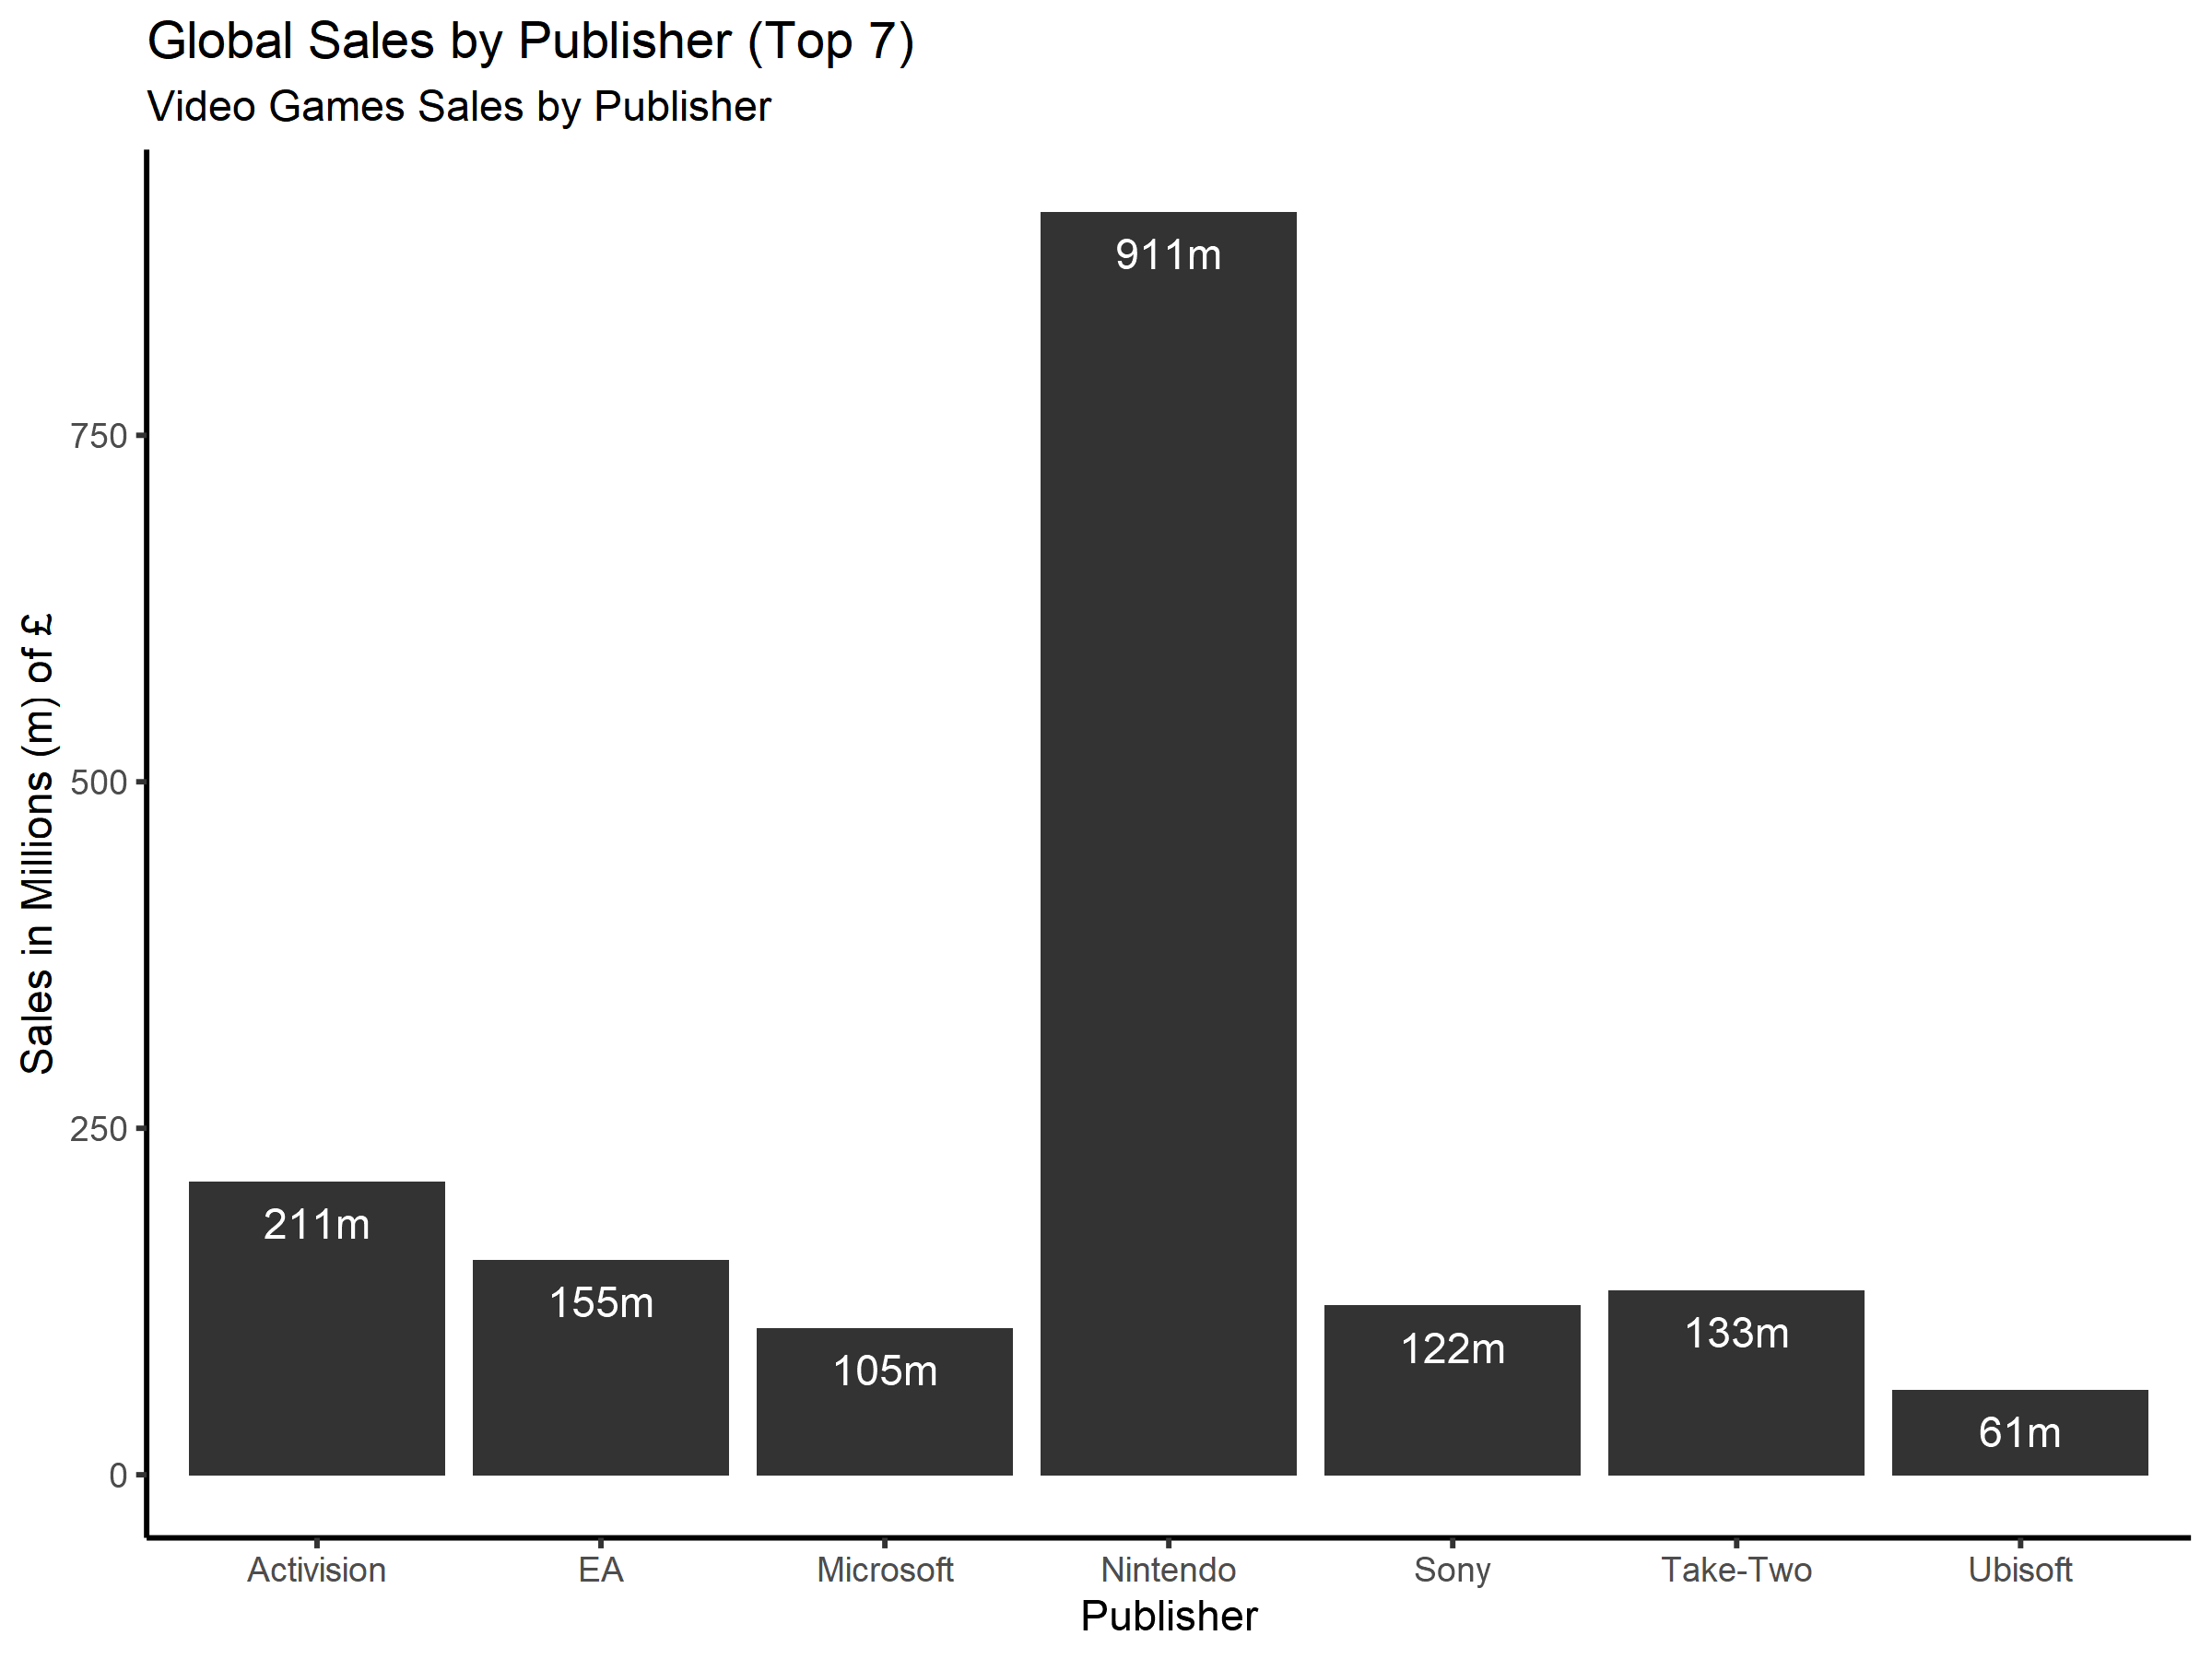

In [449]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_publisher_gl, aes(y=global_sales, x=publisher)) + 
    
    # Set as barplot
    geom_bar(stat='identity', fill=colours[2,3], show.legend = FALSE) + 

    # Add text to each bar
    geom_text(aes(y=global_sales-30, label=paste(round(global_sales), 'm', sep = '')), 
             data=ts_grp_publisher_gl, colour='white') +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Global Sales by Publisher (Top 7)',
         subtitle = 'Video Games Sales by Publisher',
         x = 'Publisher',
         y = 'Sales in Millions (m) of £') + 

    # set the theme
    theme_classic()

    # export the plot 
    ggsave("global_sales_by_publisher.png", width=8, height=6, dpi = 300)

- Nintendo is by far the most popular publisher. This is not surprising because there are many publishers, and Nintendo make all the games for it's platform.

### Europe & North America Sales

In [450]:
# subset groupby publisher for sum of eu_sales and na_sales
ts_grp_publisher_eu_na <- ts %>% group_by(publisher)  %>%
                    summarise('Europe' = sum(eu_sales),
                              'North America' = sum(na_sales),
                              global_sales = sum(global_sales),
                              .groups = 'drop') %>%
                    arrange(desc(global_sales)) %>%
                    slice(1:7)

# remove global_sales column
ts_grp_publisher_eu_na = ts_grp_publisher_eu_na[,!(names(ts_grp_publisher_eu_na) %in% c('global_sales'))]

# use melt function to reshape dataframe
ts_grp_publisher_eu_na <- reshape2::melt(ts_grp_publisher_eu_na, id.var = c('publisher'),
                            variable.name = 'region')

View(ts_grp_publisher_eu_na)

publisher,region,value
<chr>,<fct>,<dbl>
Nintendo,Europe,238.67
Activision,Europe,75.60
Electronic Arts,Europe,80.78
Take-Two Interactive,Europe,43.89
Sony Computer Entertainment,Europe,37.82
Microsoft Game Studios,Europe,26.38
Ubisoft,Europe,21.07
Nintendo,North America,435.57
Activision,North America,107.29


In [451]:
# rename publisher values to fit on chart
ts_grp_publisher_eu_na$publisher[ts_grp_publisher_eu_na$publisher == 'Sony Computer Entertainment'] <- 'Sony'
ts_grp_publisher_eu_na$publisher[ts_grp_publisher_eu_na$publisher == 'Microsoft Game Studios'] <- 'Microsoft'
ts_grp_publisher_eu_na$publisher[ts_grp_publisher_eu_na$publisher == 'Electronic Arts'] <- 'EA'
ts_grp_publisher_eu_na$publisher[ts_grp_publisher_eu_na$publisher == 'Take-Two Interactive'] <- 'Take-Two'

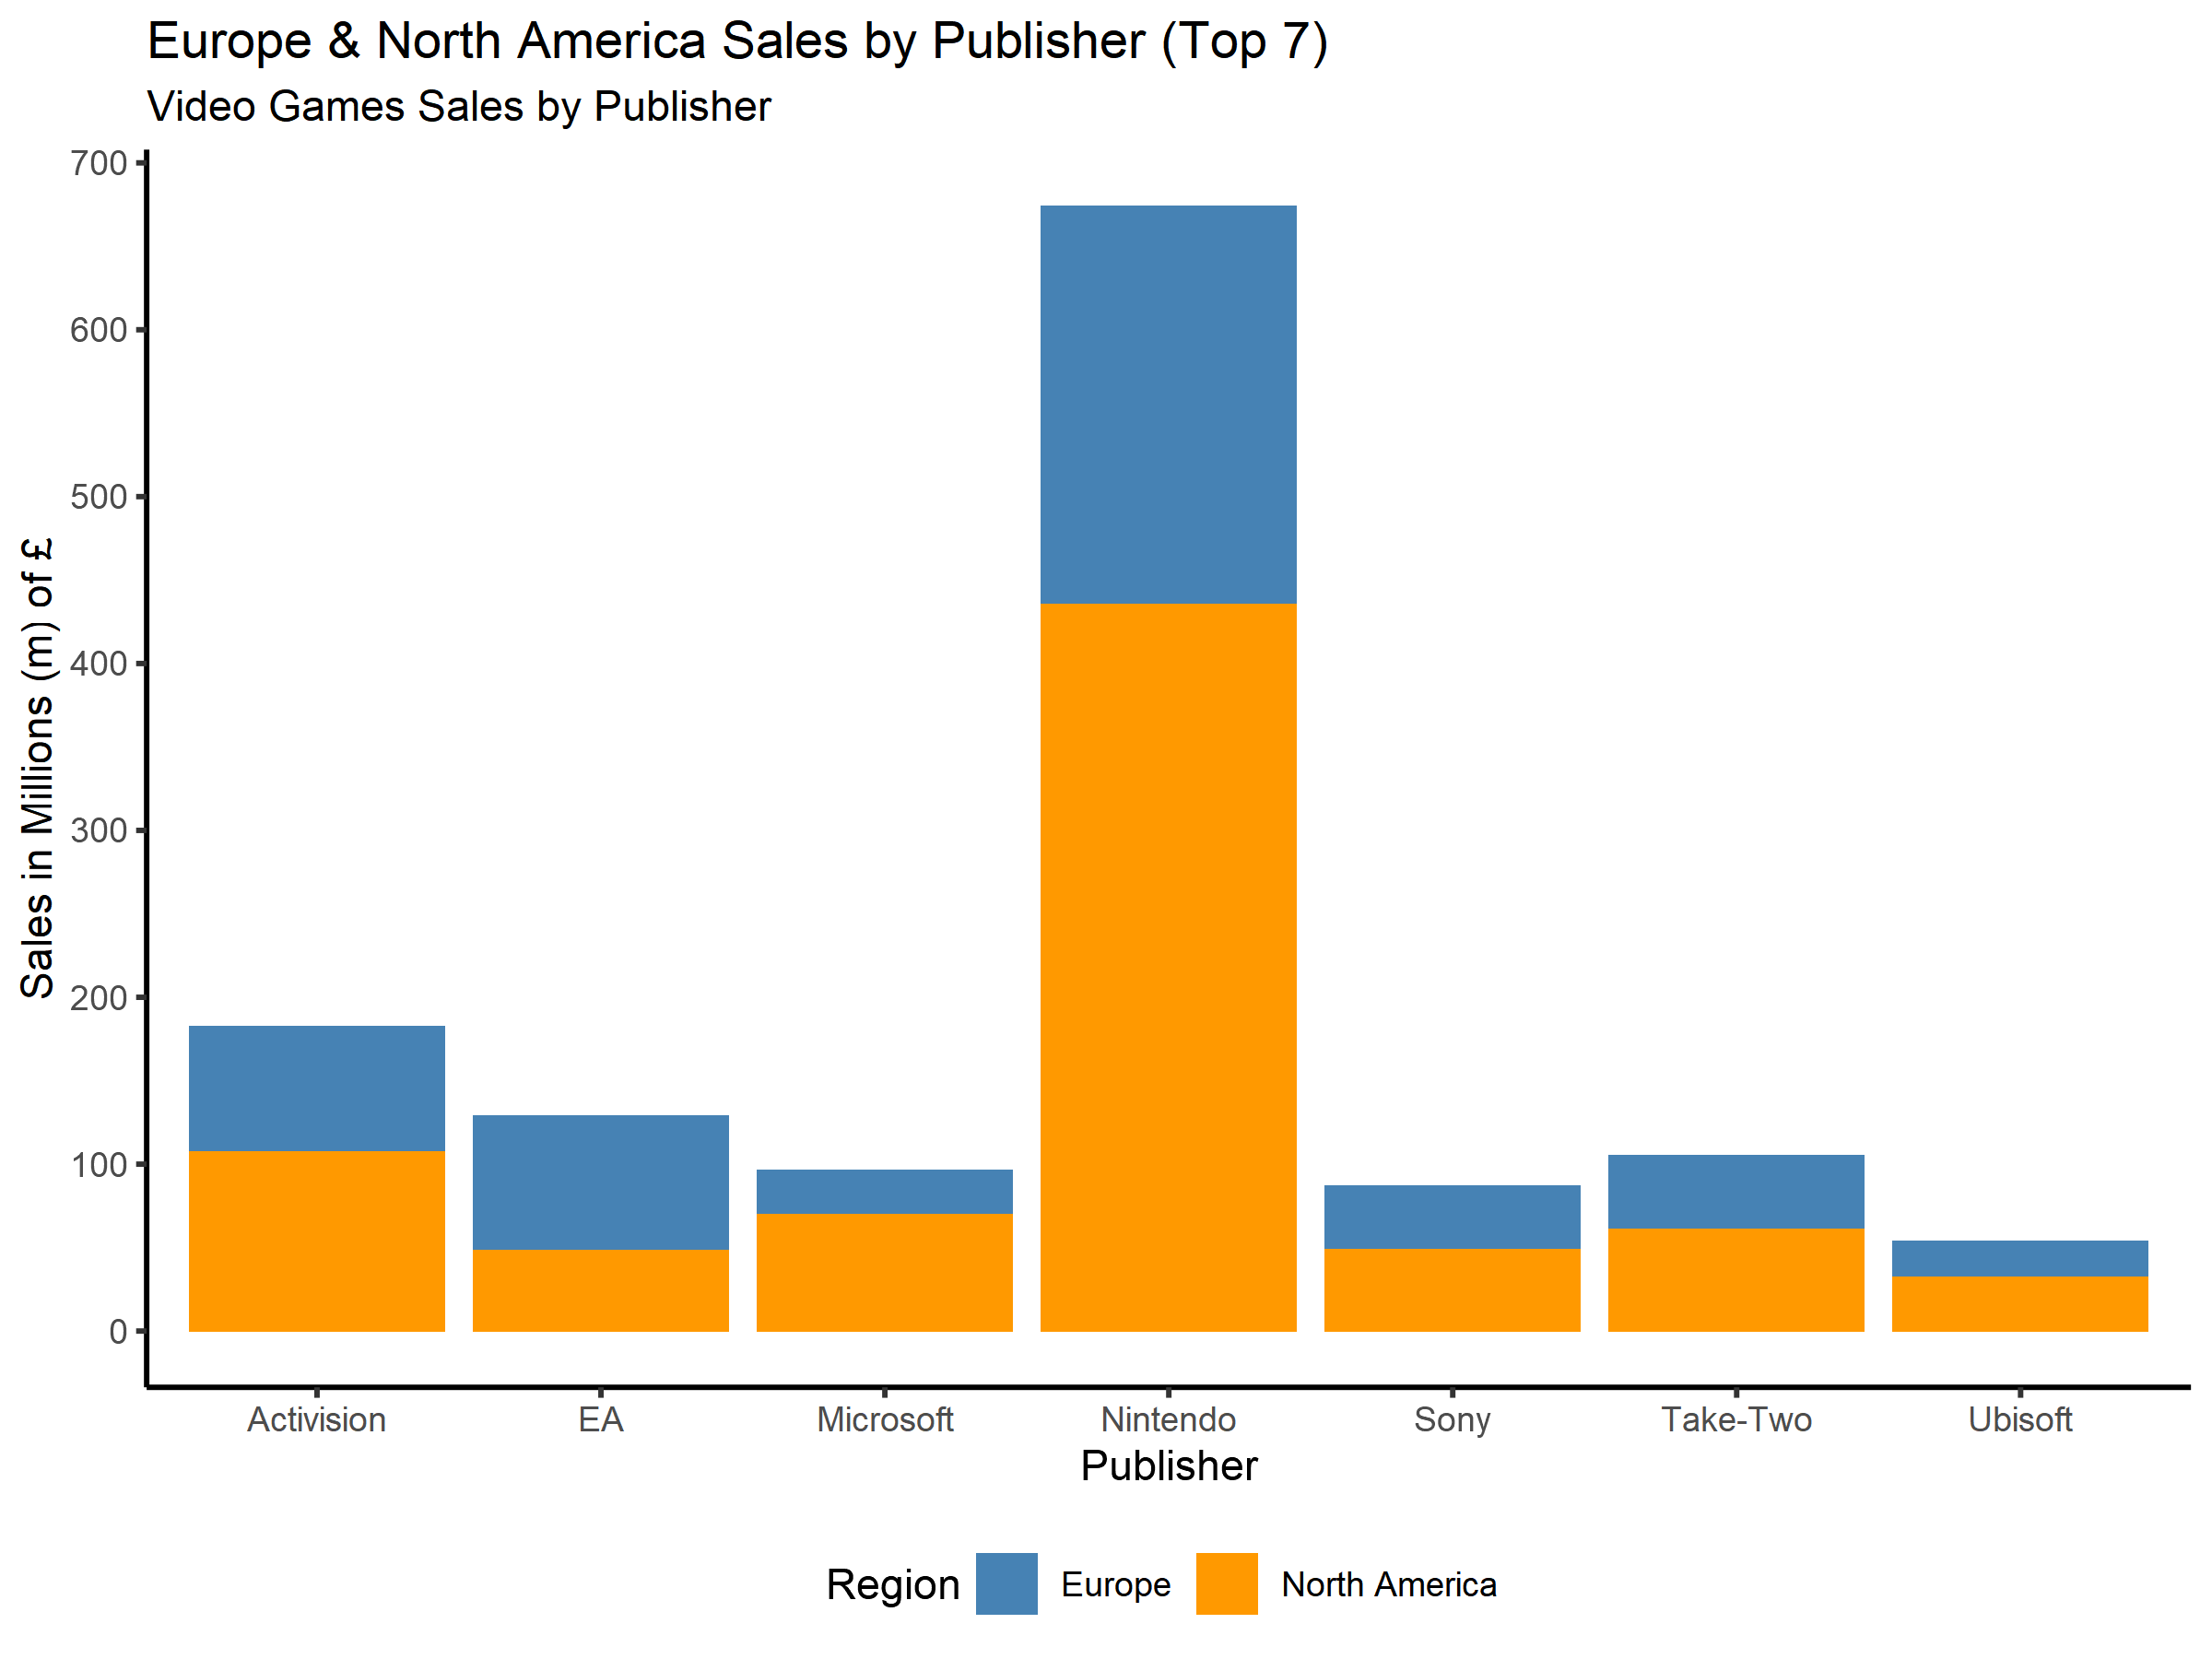

In [454]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_publisher_eu_na, aes(fill=region, y=value, x=publisher)) + 
    
    # Set as barplot
    geom_bar(position='stack', stat='identity') + 

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 700, 100)) +

    # set bar colours
    scale_fill_manual(values=c(colours[1,1], colours[1,2])) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Europe & North America Sales by Publisher (Top 7)',
         subtitle = 'Video Games Sales by Publisher',
         x = 'Publisher',
         y = 'Sales in Millions (m) of £',
         fill = 'Region') +
    
    #coord_flip() + 
    # set the theme
    theme_classic() +

    # set legend position
    theme(legend.position='bottom')

    # export the plot 
    ggsave("eu_na_sales_by_publisher.png", width=8, height=6, dpi = 300)

- North America outperforms Europe in all publishers, except for EA.

### (c) Product Sales by Product ID

### Global Sales

In [466]:
# subset groupby product for sum of global_sales (top 10 only)
ts_grp_product_gl <- ts %>% group_by(product_id)  %>% 
    summarise(global_sales = sum(global_sales), .groups = 'drop') %>%
    arrange(desc(global_sales)) %>%
    slice(1:10)

# change column type for product_id to be factor (categorical)
ts_grp_product_gl$product_id<-as.factor(ts_grp_product_gl$product_id)

View(ts_grp_product_gl)

product_id,global_sales
<fct>,<dbl>
107,67.85
515,45.86
123,37.16
254,29.39
195,29.37
231,27.06
249,25.72
948,25.45
876,25.28


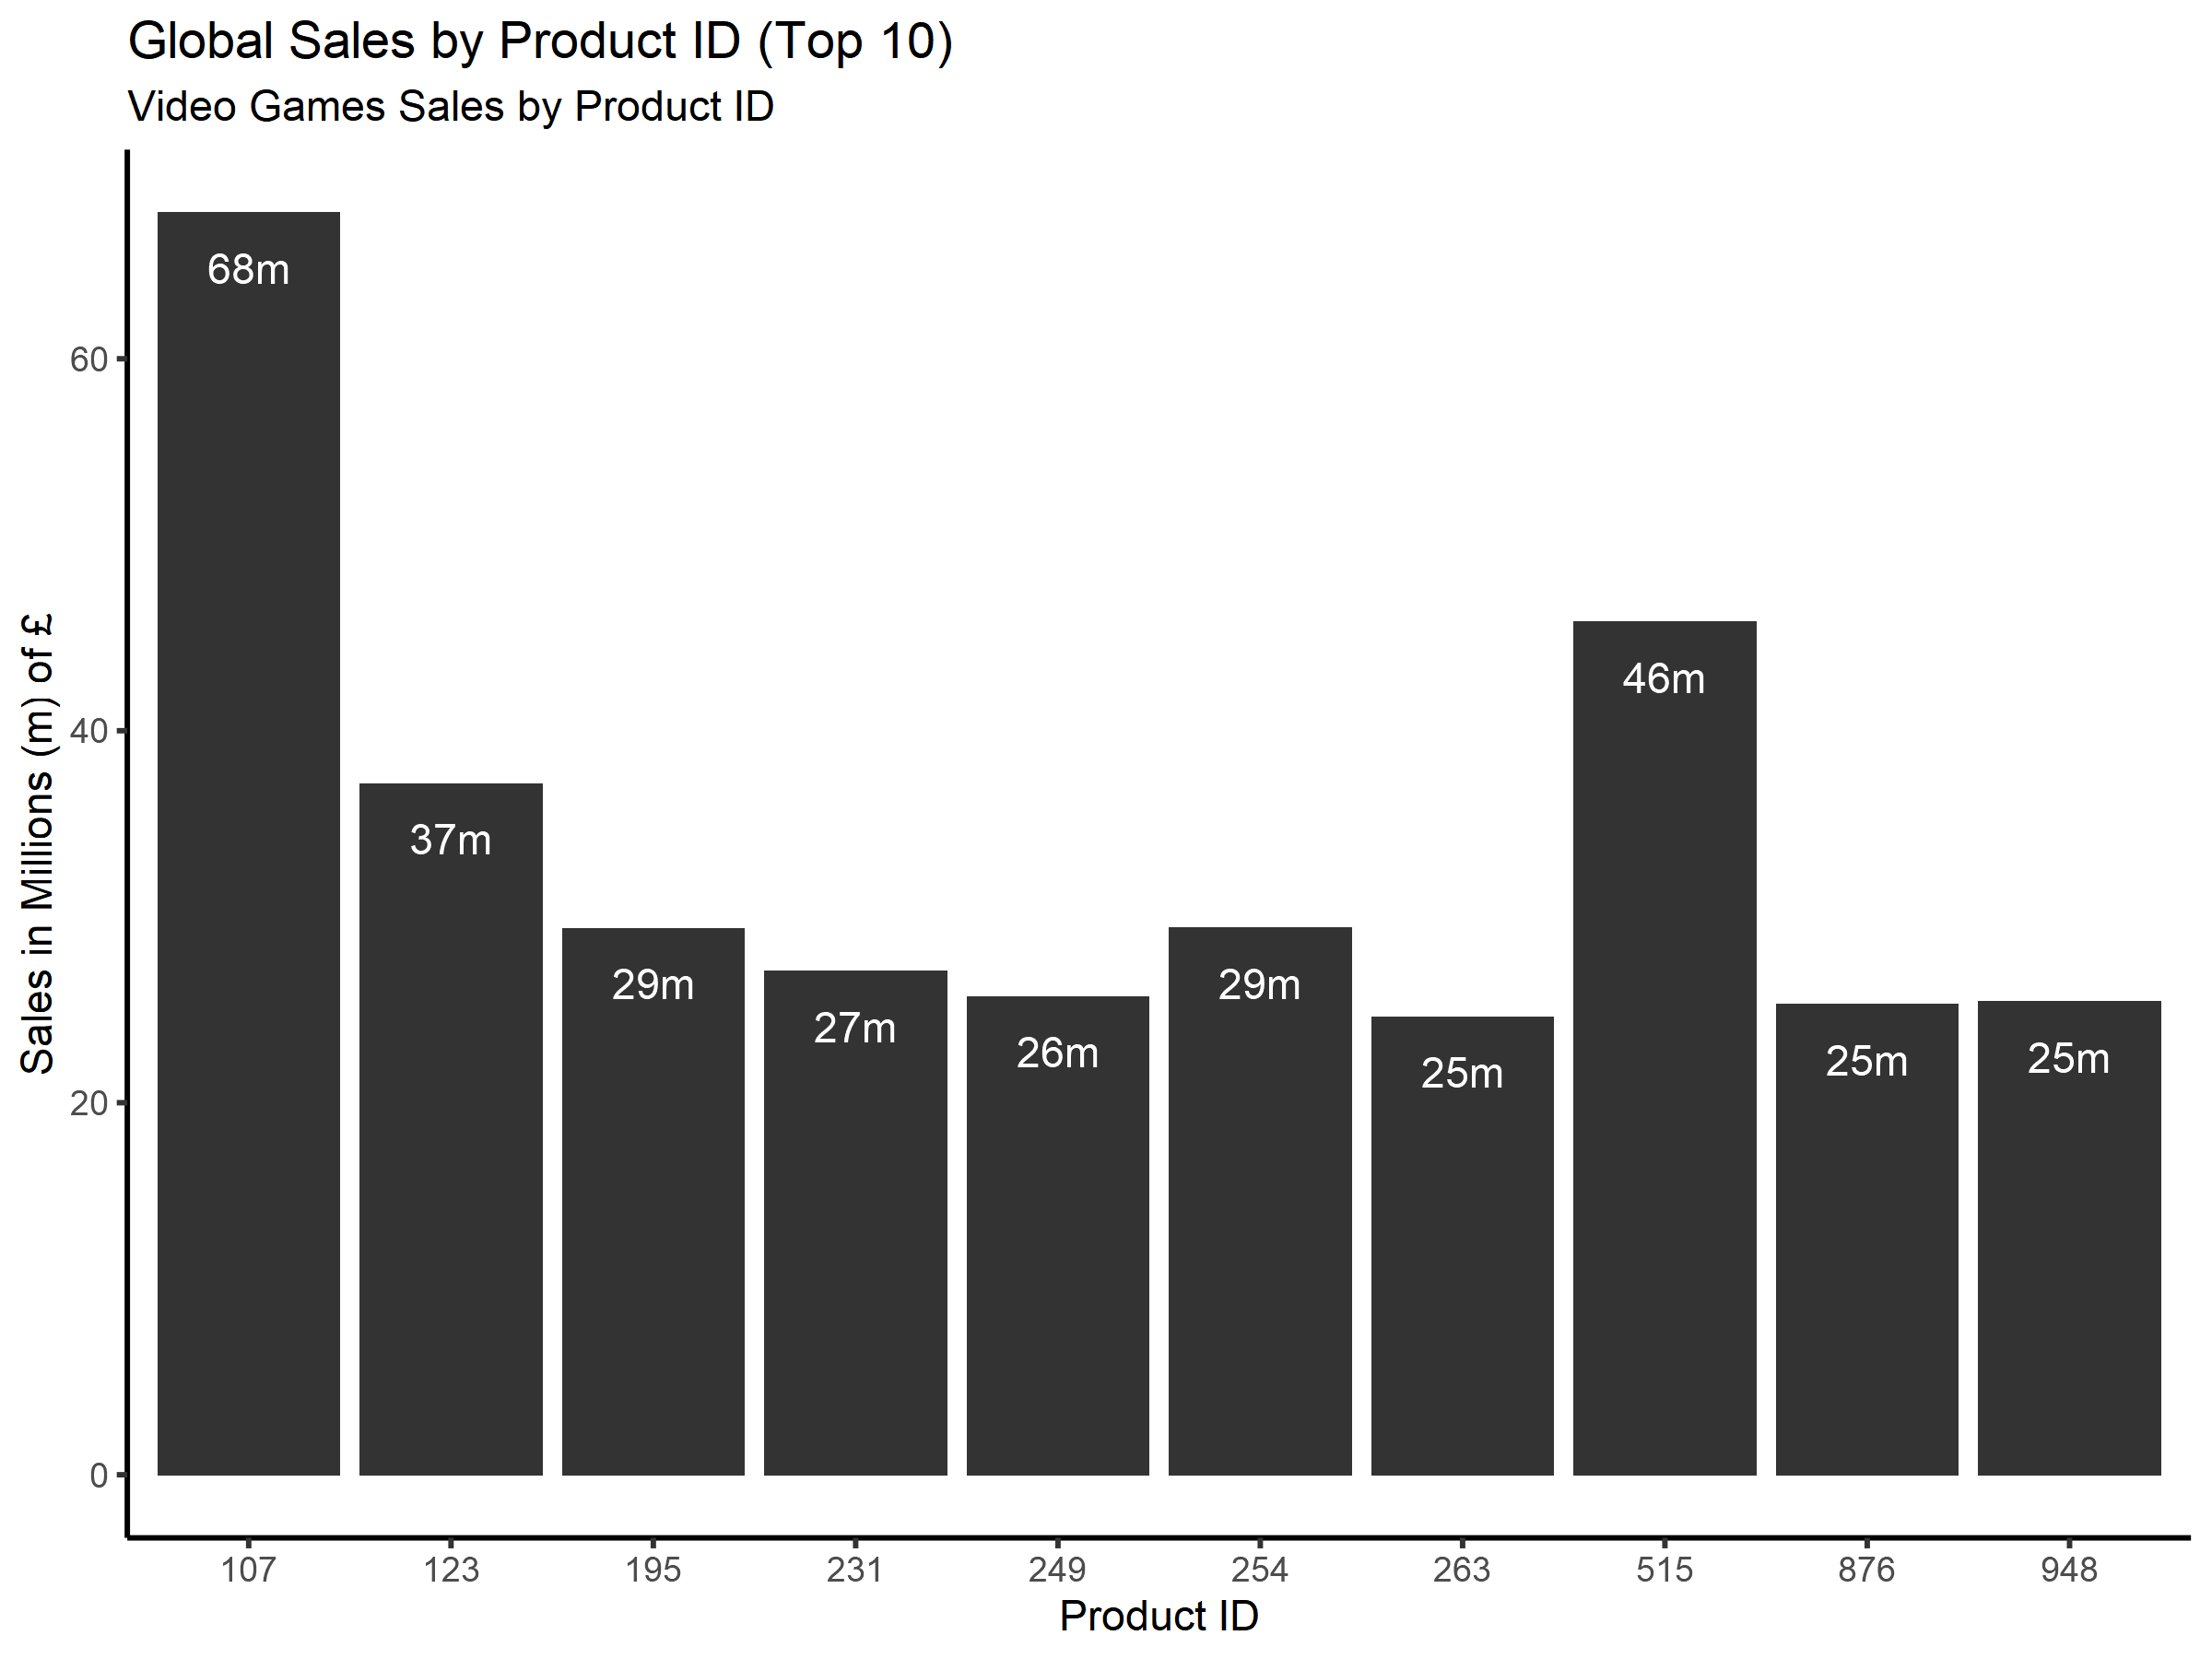

In [467]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_product_gl, aes(y=global_sales, x=product_id)) + 
    
    # Set as barplot
    geom_bar(stat='identity', fill=colours[2,3], show.legend = FALSE) + 

    # Add text to each bar
    geom_text(aes(y=global_sales-3, label=paste(round(global_sales), 'm', sep = '')), 
             data=ts_grp_product_gl, colour='white') +

    # Add labels for title, subtitle and x-axis
    labs(title = "Global Sales by Product ID (Top 10)",
         subtitle = 'Video Games Sales by Product ID',
         x = 'Product ID',
         y = 'Sales in Millions (m) of £') + 

    # set the theme
    theme_classic()

    # export the plot 
    ggsave("global_sales_by_product.png", width=8, height=6, dpi = 300)

2 products reached sales above £50m.

### Europe & North America Sales

In [377]:
# subset groupby publisher for sum of eu_sales and na_sales
ts_grp_product_eu_na <- ts %>% group_by(product_id)  %>%
                    summarise('Europe' = sum(eu_sales),
                              'North America' = sum(na_sales),
                              global_sales = sum(global_sales), .groups = 'drop') %>%
                    arrange(desc(global_sales)) %>%
                    slice(1:10)

# remove global_sales column
ts_grp_product_eu_na = ts_grp_product_eu_na[,!(names(ts_grp_product_eu_na) %in% c('global_sales'))]

# use melt function to reshape dataframe
ts_grp_product_eu_na <- reshape2::melt(ts_grp_product_eu_na, id.var = c('product_id'),
                            variable.name = 'region')

# change column type for product_id to be factor (categorical)
ts_grp_product_eu_na$product_id<-as.factor(ts_grp_product_eu_na$product_id)

View(ts_grp_product_eu_na)

product_id,region,value
<fct>,<fct>,<dbl>
107,Europe,23.80
515,Europe,18.88
123,Europe,4.01
254,Europe,2.42
195,Europe,10.56
231,Europe,9.03
249,Europe,7.29
948,Europe,7.79
876,Europe,9.25


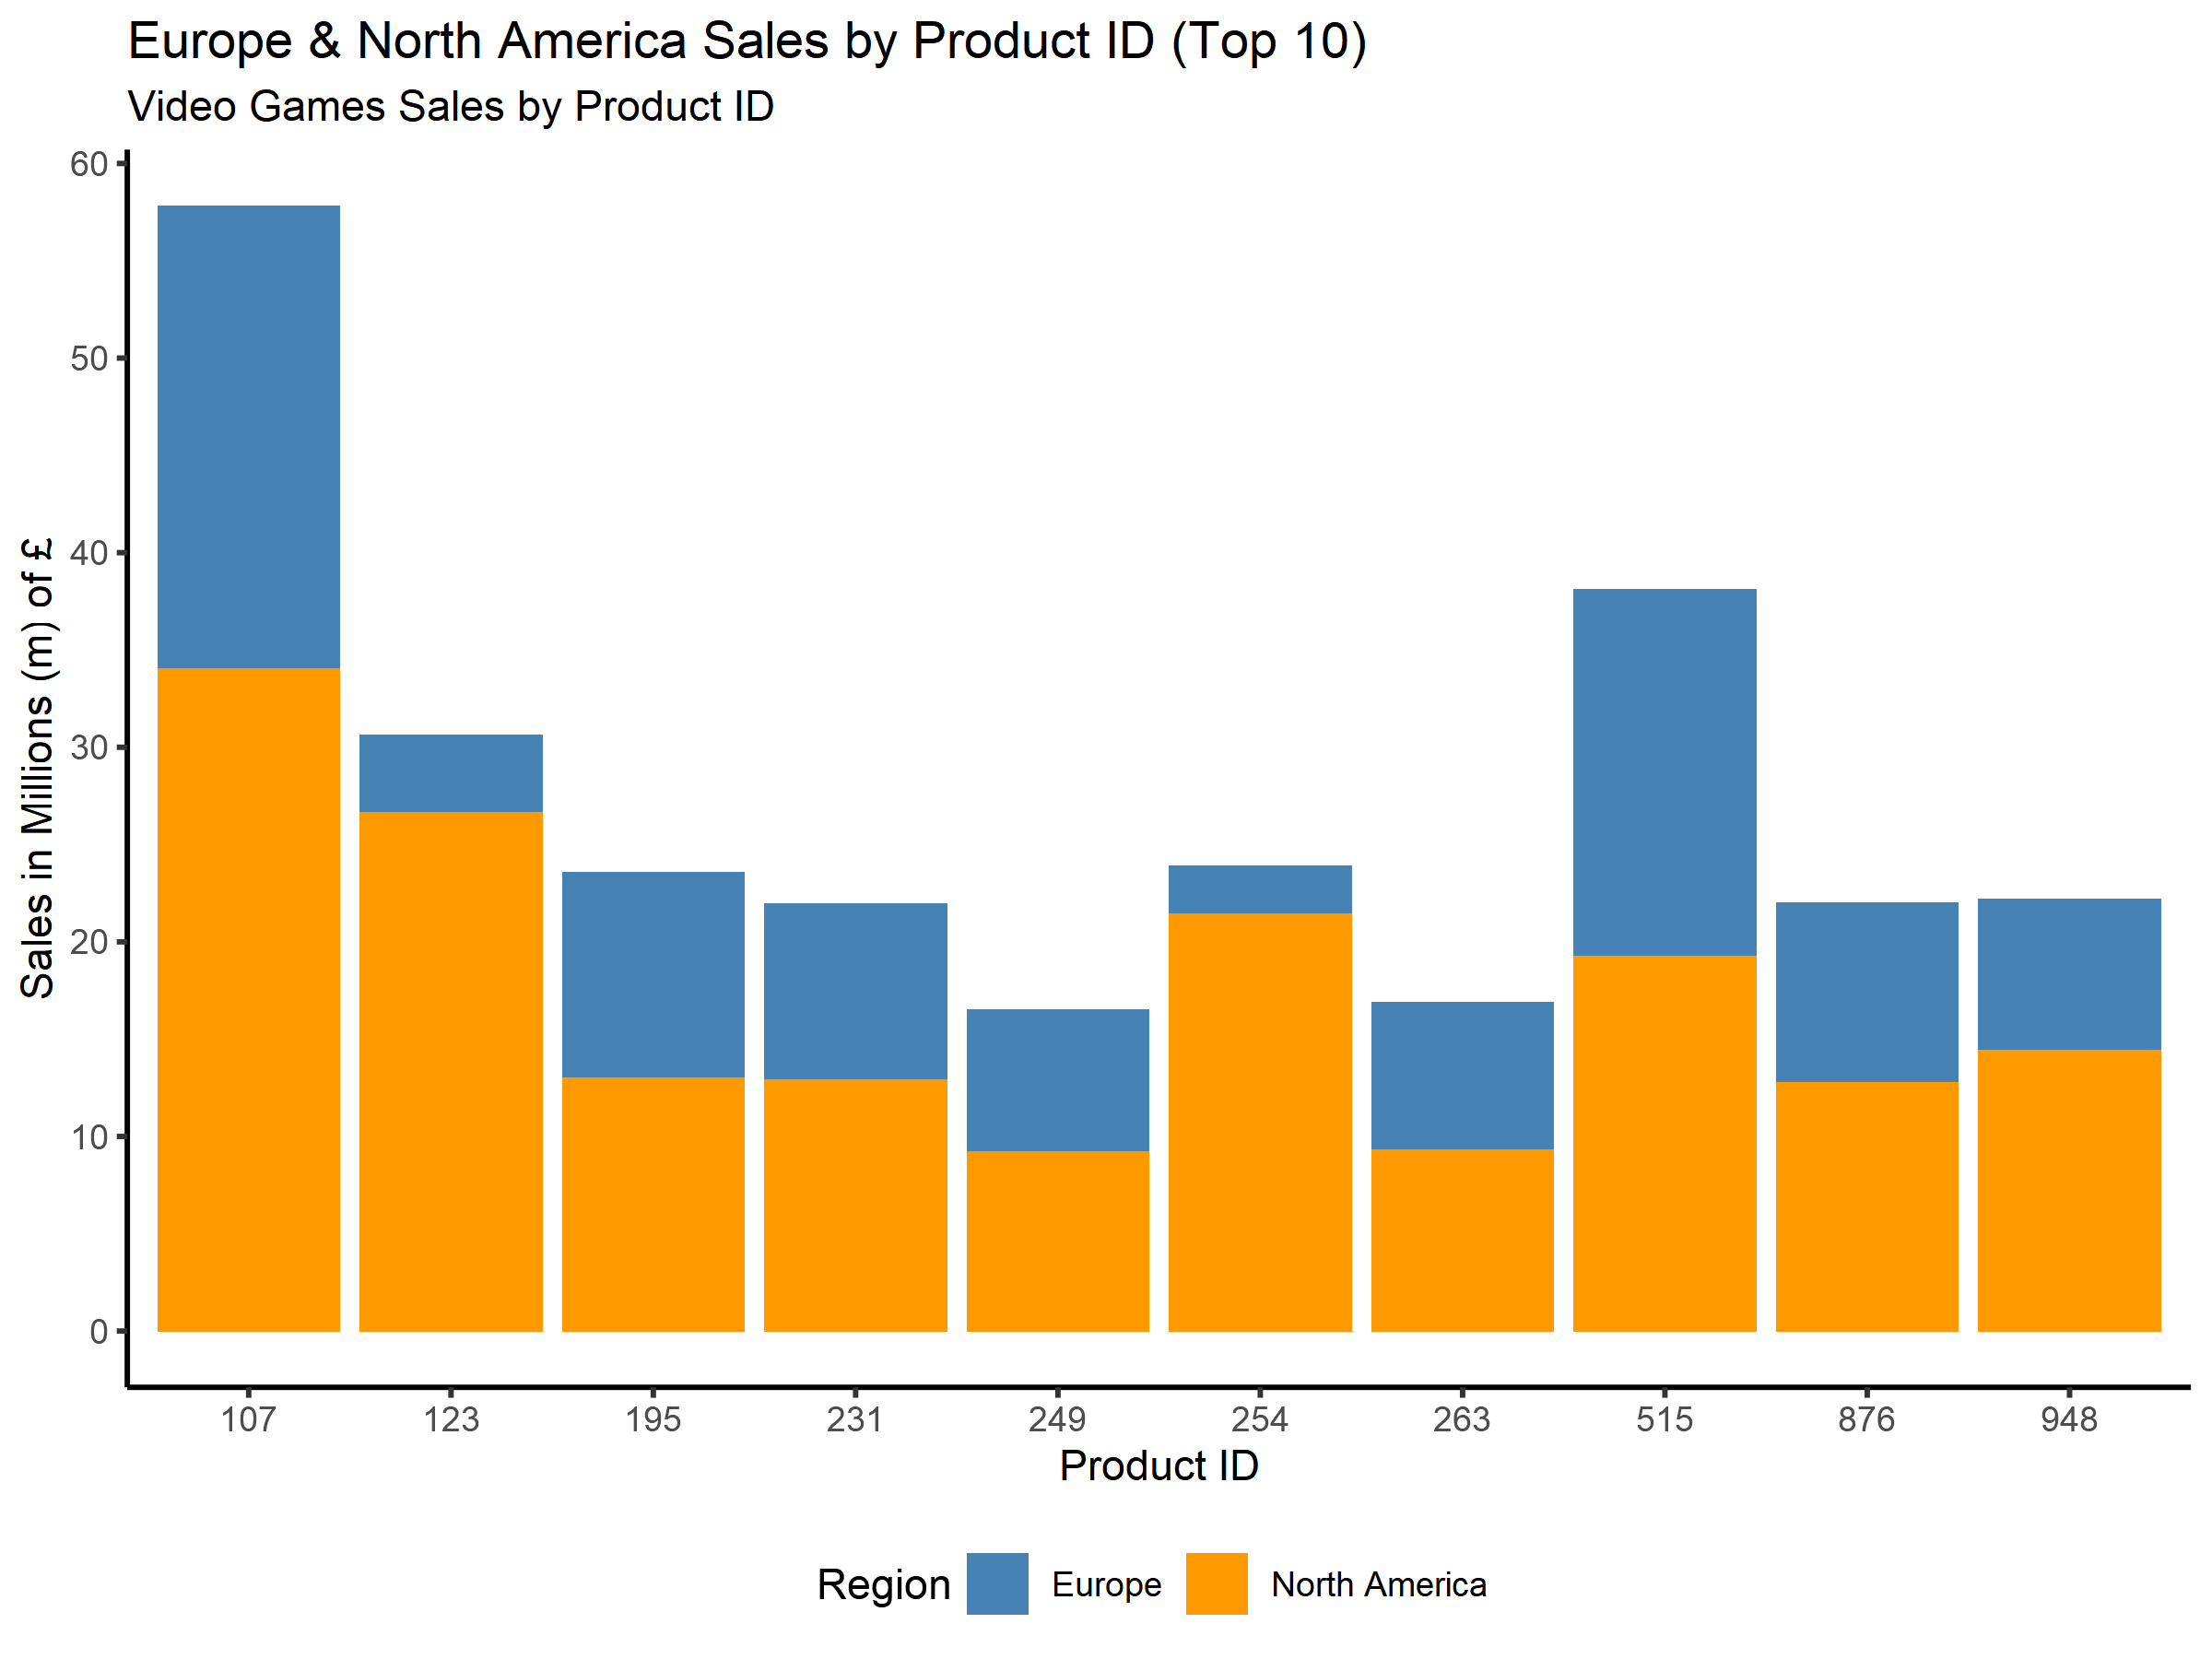

In [456]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create plot
ggplot(data=ts_grp_product_eu_na, aes(fill=region, y=value, x=product_id)) + 
    
    # Set as barplot
    geom_bar(position='stack', stat='identity') + 

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 60, 10)) +

    # set bar colours
    scale_fill_manual(values=c(colours[1,1], colours[1,2])) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Europe & North America Sales by Product ID (Top 10)',
         subtitle = 'Video Games Sales by Product ID',
         x = 'Product ID',
         y = 'Sales in Millions (m) of £',
         fill = 'Region') +

    # set the theme
    theme_classic() +

    # set legend position
    theme(legend.position='bottom')

    # export the plot 
    ggsave("eu_na_sales_by_product.png", width=8, height=6, dpi = 300)

There may be some products more popular according to region.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">5. Cleaning Manipulating & Visualising the Data</h2></th>
        <th><a id="5"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

### Import Data

In [5]:
# Import the data from .csv file
ts <- read.csv('ts.csv', header=T)

In [8]:
# View 1st 5 rows of dataframe (as_tibble)
print(as_tibble(ts), n=5)

# A tibble: 352 × 9
  ranking product_id platform  year genre        publisher na_sales eu_sales
    <int>      <int> <chr>    <int> <chr>        <chr>        <dbl>    <dbl>
1       1        107 Wii       2006 Sports       Nintendo     34.0     23.8 
2       2        123 NES       1985 Platform     Nintendo     23.8      2.94
3       3        195 Wii       2008 Racing       Nintendo     13       10.6 
4       4        231 Wii       2009 Sports       Nintendo     12.9      9.03
5       5        249 GB        1996 Role-Playing Nintendo      9.24     7.29
# ℹ 347 more rows
# ℹ 1 more variable: global_sales <dbl>


In [9]:
# Subset the numerical data columns
ts_num <- subset(ts[, c('product_id', 'na_sales', 'eu_sales', 'global_sales')])

In [11]:
# View the dimensions of the ts dataframe
dim(ts_num)

[1] 352   4

### Group by Product

In [12]:
# How many unique values in product_id column?
n_distinct(ts_num$product_id)

[1] 175

There are 175 distinct values for product_id.

In [16]:
# Specify the product_id for grouping the data, and sum all other columns
groupby_product_id <- ts_num %>% group_by(product_id) %>%
                      summarise(across(everything(), sum))

head(groupby_product_id)

product_id,na_sales,eu_sales,global_sales
<int>,<dbl>,<dbl>,<dbl>
107,34.02,23.80,67.85
123,26.64,4.01,37.16
195,13.00,10.56,29.37
231,12.92,9.03,27.06
249,9.24,7.29,25.72
254,21.46,2.42,29.39


In [17]:
# check dimensions
dim(groupby_product_id)

[1] 175   4

### Summary Statistics

In [31]:
# view summary of ungrouped sales colunns
summary(subset(ts_num[, c('na_sales', 'eu_sales', 'global_sales')]))

    na_sales          eu_sales       global_sales   
 Min.   : 0.0000   Min.   : 0.000   Min.   : 0.010  
 1st Qu.: 0.4775   1st Qu.: 0.390   1st Qu.: 1.115  
 Median : 1.8200   Median : 1.170   Median : 4.320  
 Mean   : 2.5160   Mean   : 1.644   Mean   : 5.335  
 3rd Qu.: 3.1250   3rd Qu.: 2.160   3rd Qu.: 6.435  
 Max.   :34.0200   Max.   :23.800   Max.   :67.850  

In [18]:
# view summary of grouped sales colunns
summary(subset(groupby_product_id[, c('na_sales', 'eu_sales', 'global_sales')]))

    na_sales         eu_sales       global_sales   
 Min.   : 0.060   Min.   : 0.000   Min.   : 4.200  
 1st Qu.: 2.495   1st Qu.: 1.460   1st Qu.: 5.515  
 Median : 3.610   Median : 2.300   Median : 8.090  
 Mean   : 5.061   Mean   : 3.306   Mean   :10.730  
 3rd Qu.: 5.570   3rd Qu.: 4.025   3rd Qu.:12.785  
 Max.   :34.020   Max.   :23.800   Max.   :67.850  

The grouped data increases the mean,median and quartiles.

### Correlations

In [20]:
# check the correlations between the sales colunns (drop product_id)
correlation_matrix = cor(select(groupby_product_id, -product_id))

# correlation matrix
head(round(correlation_matrix,2))

,na_sales,eu_sales,global_sales
na_sales,1.00,0.62,0.92
eu_sales,0.62,1.00,0.85
global_sales,0.92,0.85,1.00


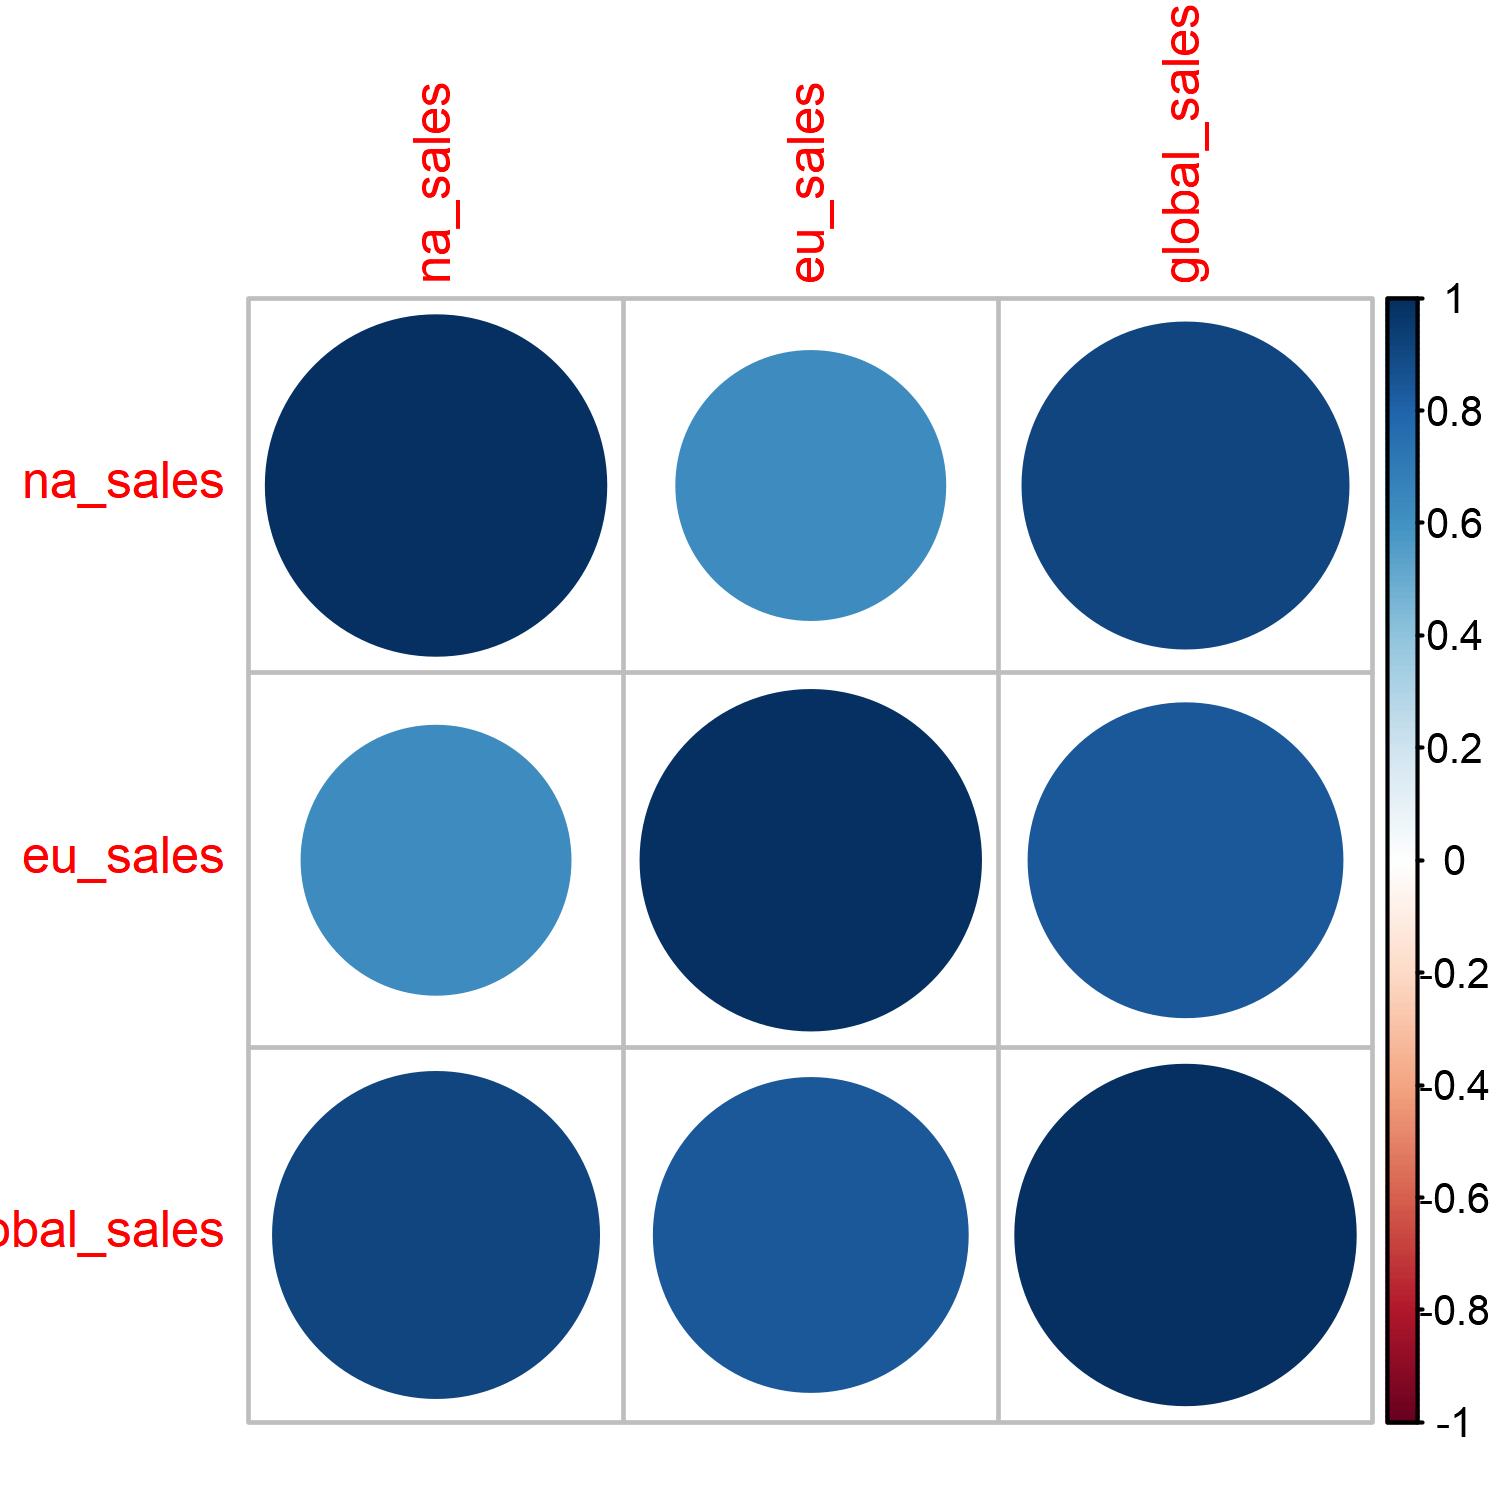

In [30]:
# Set the plot output options
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300)

# plot the correlation matrix
corrplot(correlation_matrix, method='circle')

There are strong positive correlations between all sales variables.

<hr>

### <u>Section 1: Normality of the Grouped Data</u>

The next section will investigate the normality of the grouped data.
- Europe Sales
- North America Sales
- Global Sales

### (i) Europe Sales

### (a) Boxplot

In [35]:
# view a summary of eu_sales data
summary(groupby_product_id$eu_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.460   2.300   3.306   4.025  23.800 

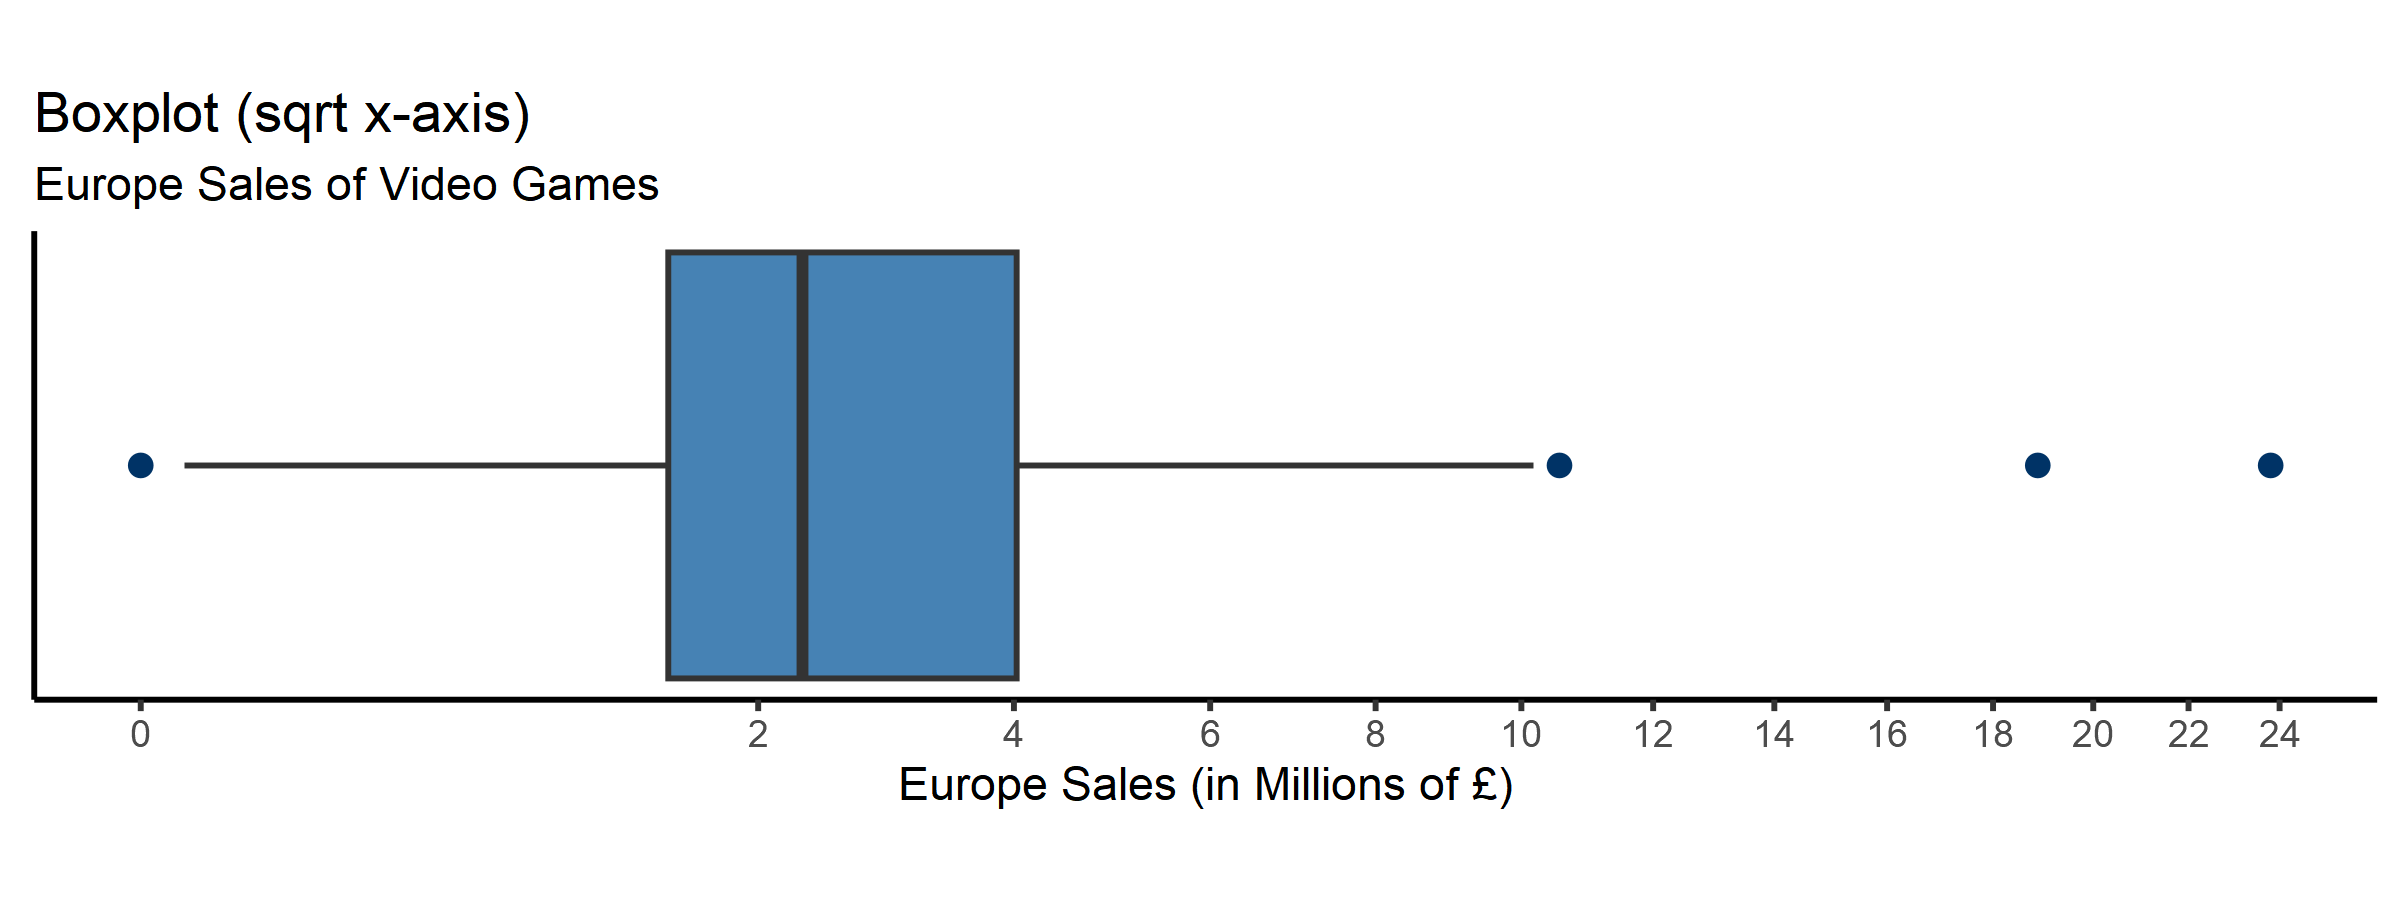

In [63]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=groupby_product_id, aes(x=eu_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,1], outlier.color=colours[2,1], outlier.size=2) + 

    # setup the x-axis scale
    scale_x_sqrt(breaks=seq(0, 24, 2)) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot (sqrt x-axis)',
         subtitle = 'Europe Sales of Video Games',
         x = 'Europe Sales (in Millions of £)') +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5)

### (b) Histogram

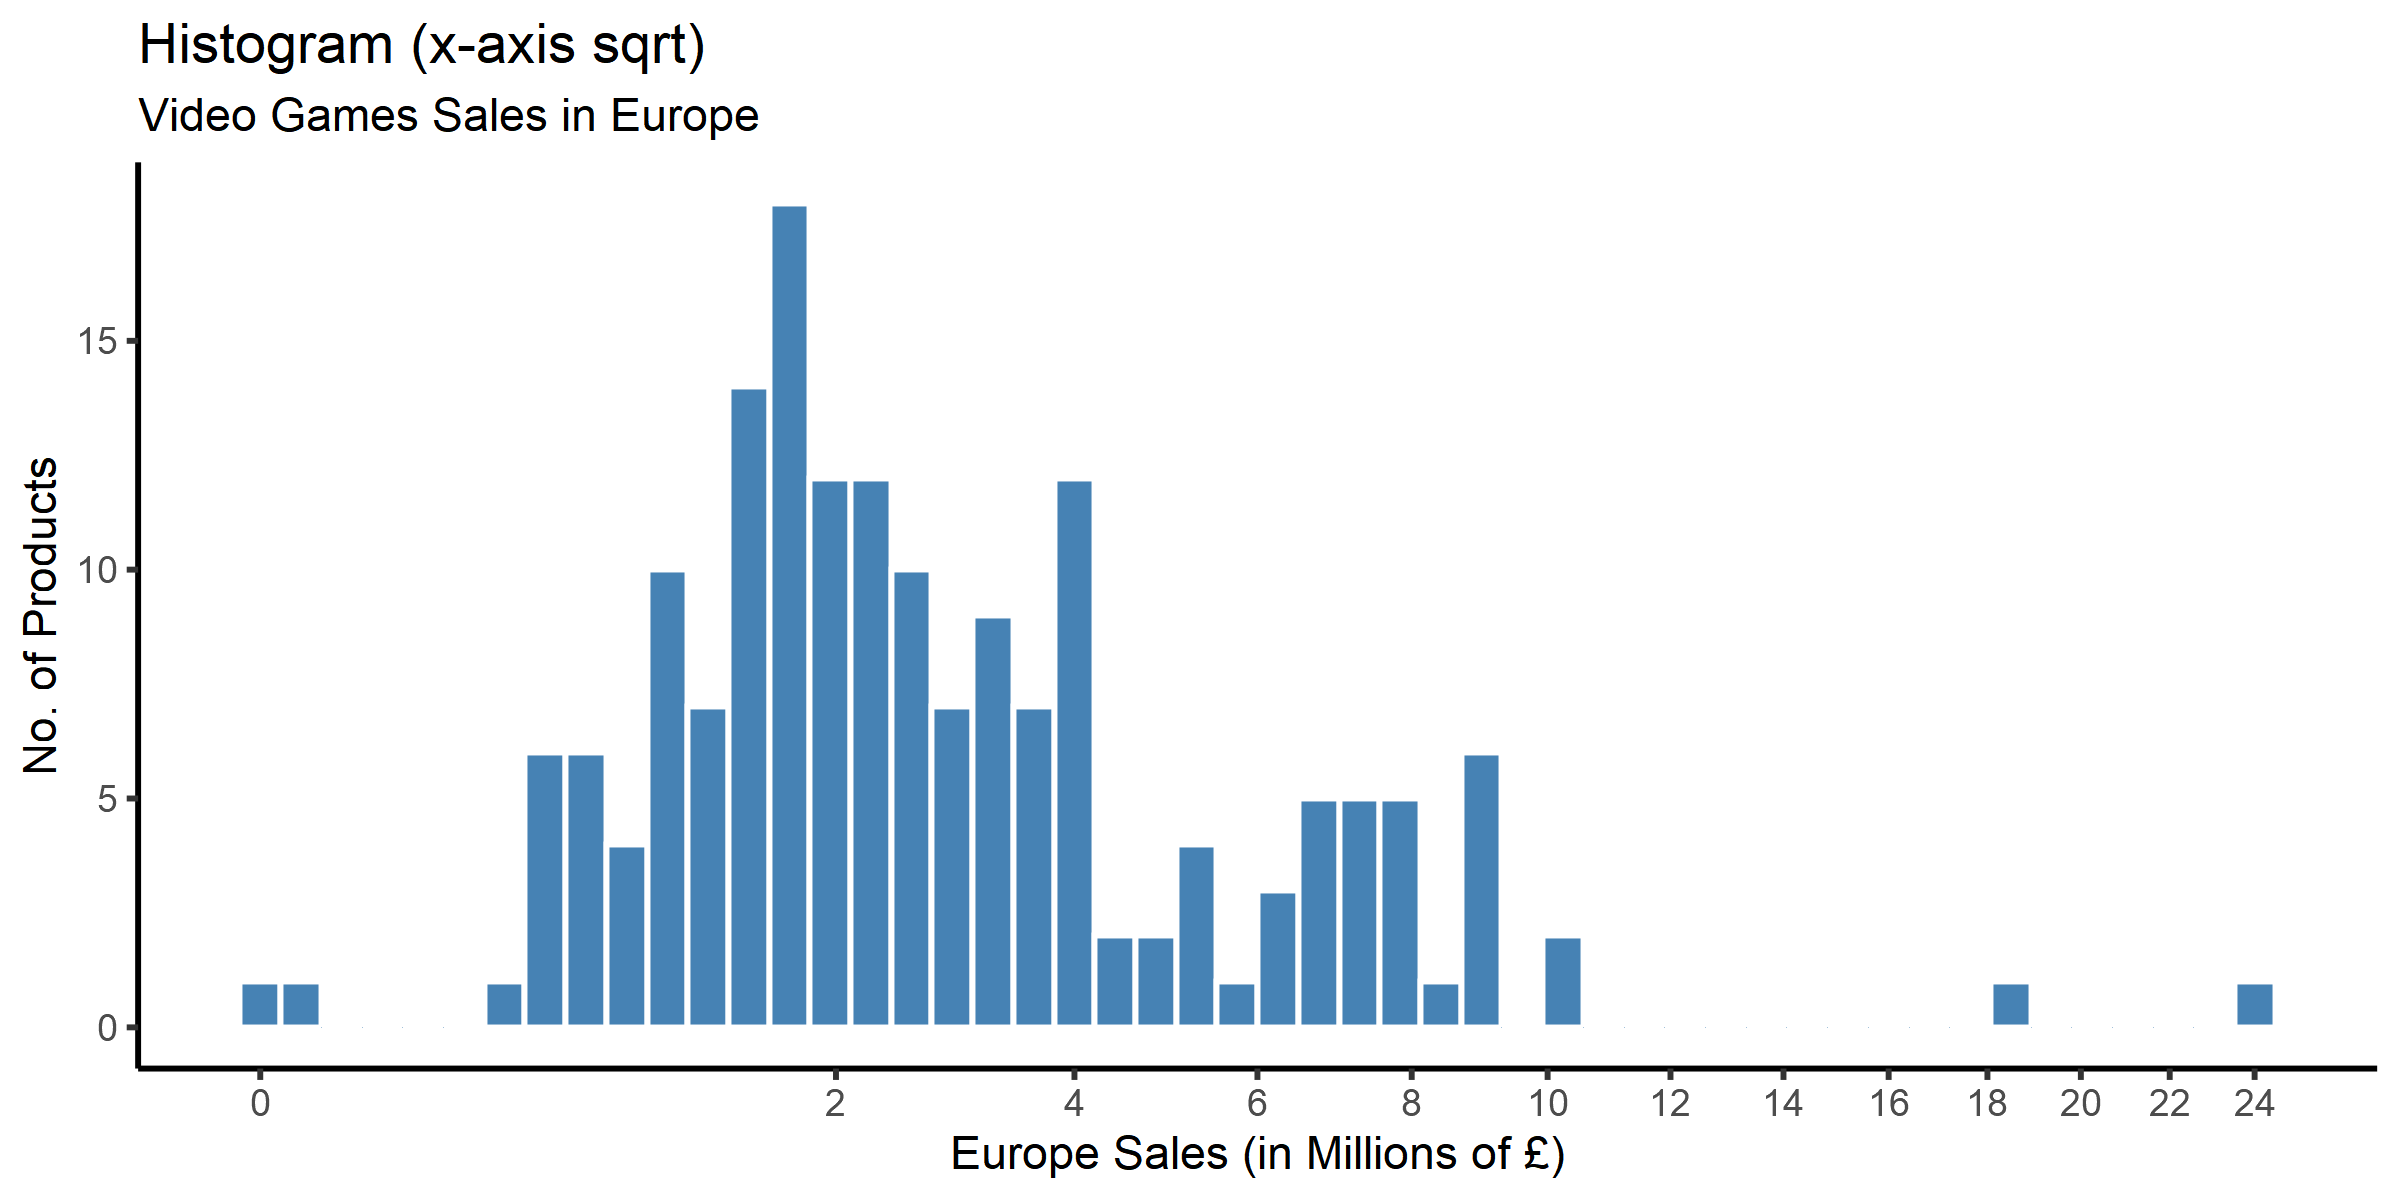

In [42]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(groupby_product_id, aes(x = eu_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.1, colour='white', fill=colours[1,1], aes(y =after_stat(count))) + 

    # Scale the x-axis
    scale_x_sqrt(breaks=seq(0, 24, 2)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 30, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram (x-axis sqrt)',
         subtitle = 'Video Games Sales in Europe',
         x = 'Europe Sales (in Millions of £)') +

    # Add theme
    theme_classic()

### (c) Q-Q Plot, Shapiro-Wilk, Kurtosis Tests

#### Measure normality in sales values

> The R function qqnorm( ) compares a data set with the theoretical normal distibution.

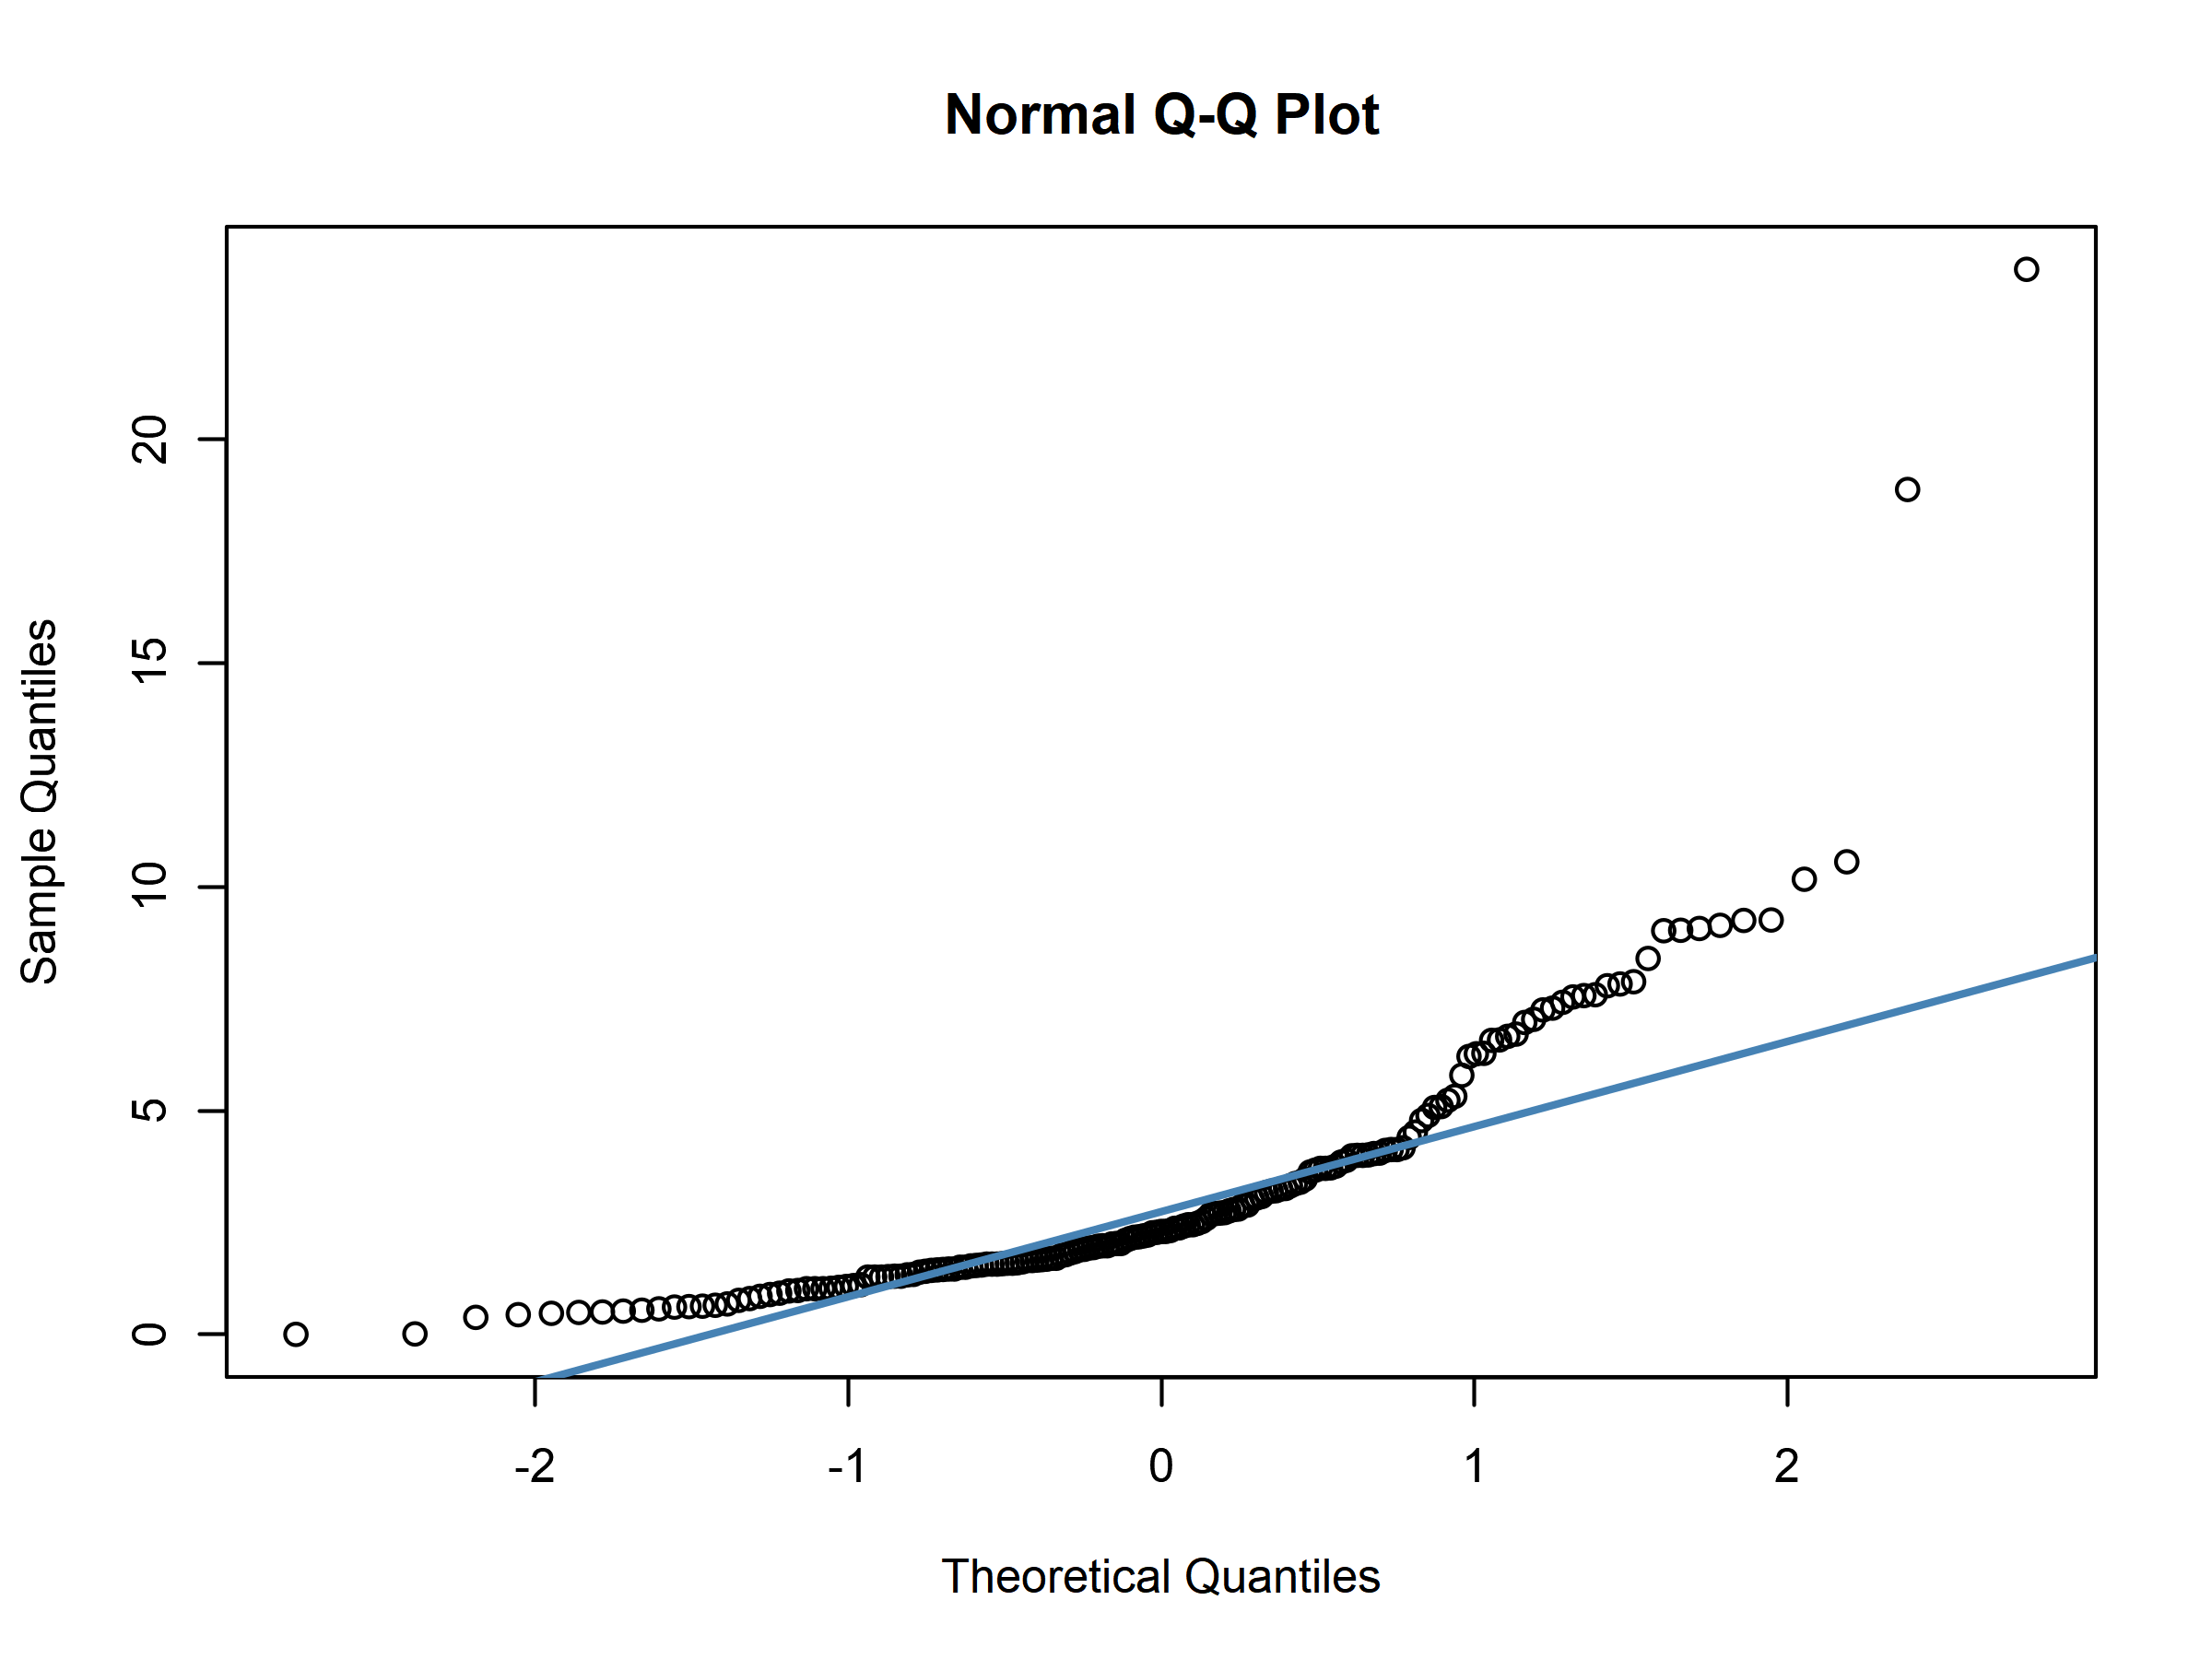

In [47]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Q-Q plot
qqnorm(groupby_product_id$eu_sales)

# Add a reference line
qqline(groupby_product_id$eu_sales, col='steelblue', lwd=2)

> Quantile-quantile (QQ) plot illustrates a strong positive correlation. If eu_sales data follows a normal distribution, the quantile points would lie along the blue line. The chart shows:
> - The eu_sales between the -1 and 1 quantiles fit the blue line fairly well, while both ends of the Q-Q plot deviate from the line, which suggests fat tails (high Kurtosis value).
> - The values in the quantiles above 1 and below -1 stray away from the blue line, which illustrates data is skewed. As the values in the quantile above 1 appear to be further away from the blue line than the values below the -1 quantile which suggests the distribution is skewed to the right. 

In [48]:
# Shapiro-Wilk test
shapiro.test((groupby_product_id$eu_sales))


	Shapiro-Wilk normality test

data:  (groupby_product_id$eu_sales)
W = 0.74058, p-value = 2.987e-16


> The null-hypothesis of this test is that the data will be a normal distribution. The p-value is less than 0.05 so the null-hypothesis is rejected and we can conclude that the data is not normally distributed.

In [49]:
# Now we can check for skewness
skewness(groupby_product_id$eu_sales)

[1] 2.886029

> As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
>
> Skewness tells us the direction of outliers. In a positive skew, the tail of a distribution curve is longer on the right side.

In [50]:
#Check for kurtosis.
kurtosis(groupby_product_id$eu_sales)

# Our kurtosis value is more than 3, suggesting our data is leptokurtic.

[1] 16.22554

> A standard normal distribution has a Kurtosis value of 3. A high number of kurtosis (>3) can be visualized as a thin “bell” with a high peak, it is called a leptokurtic distribution. The description of the data would be that values clustered around the mean, with long tails showing extreme values.

### (d) Remove Outliers: Shapiro-Wilk, Kurtosis Tests, Q-Q Plot & Histogram 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.435   2.170   2.725   3.710   7.830 

[1] 163

[1] "Standard Deviation 1.904"


	Shapiro-Wilk normality test

data:  data_no_outlier
W = 0.88614, p-value = 7.44e-10


[1] "Skewness: 1.11"

[1] "Kurtosis: 3.48"

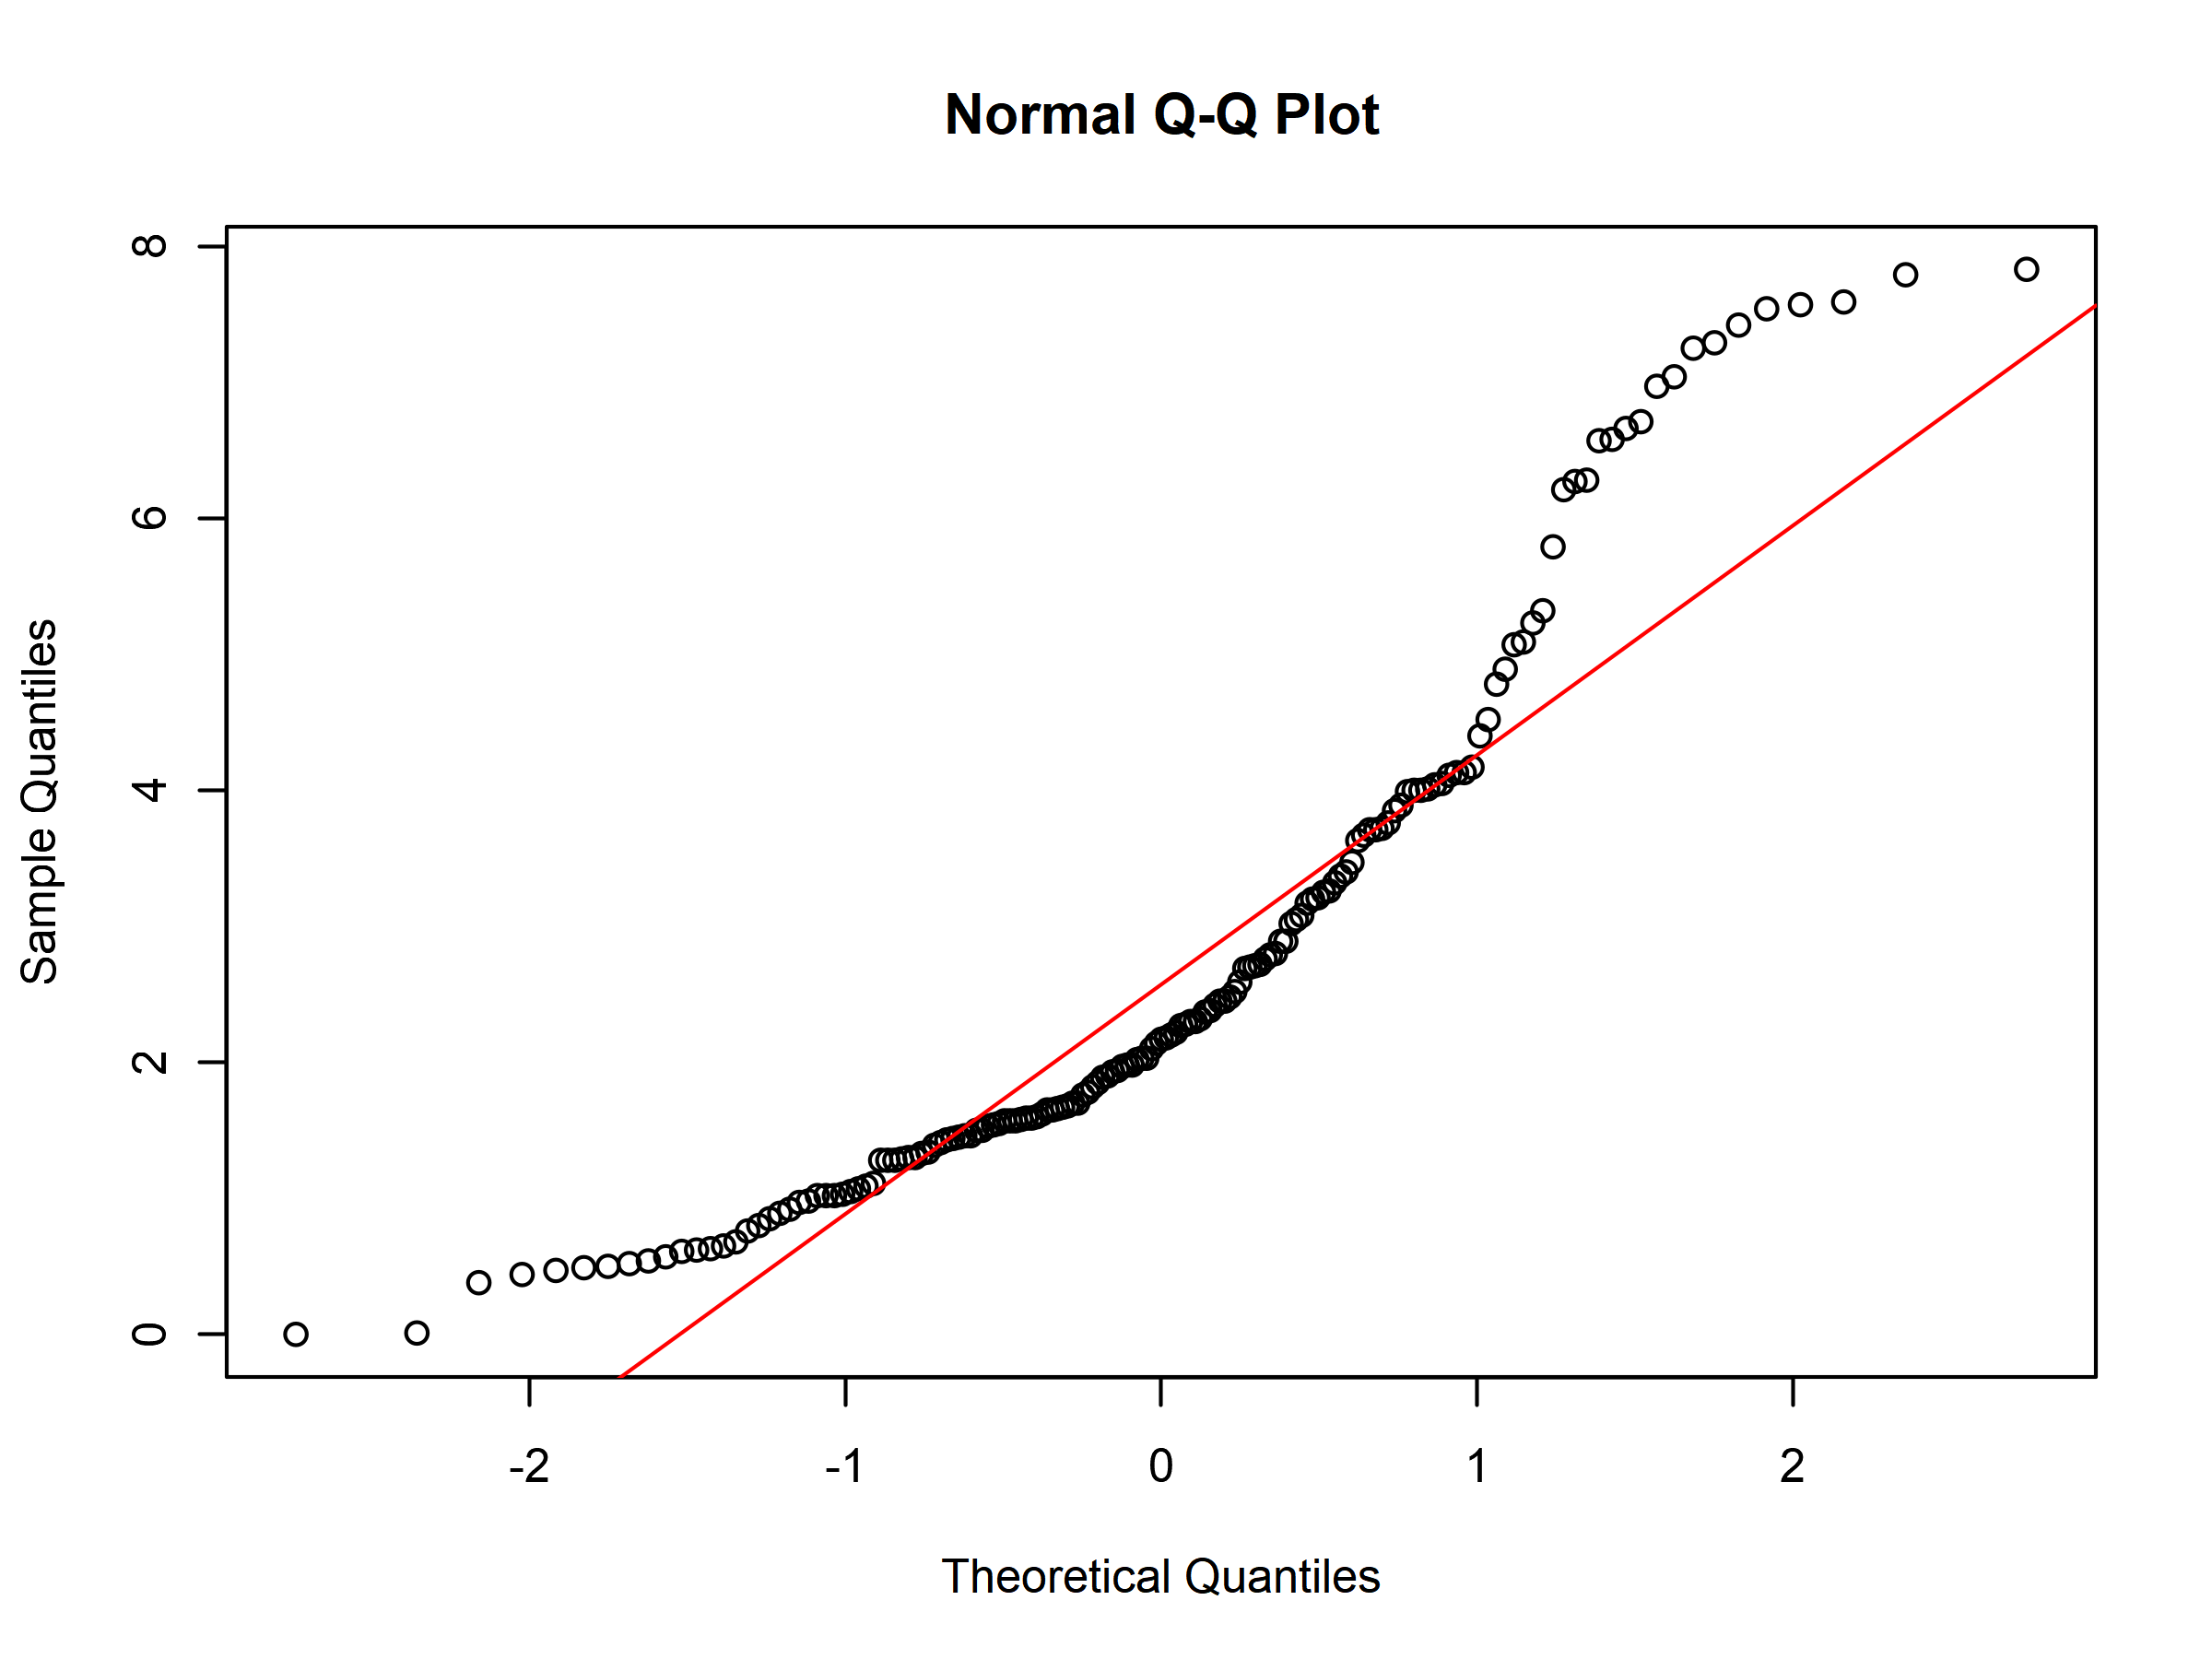

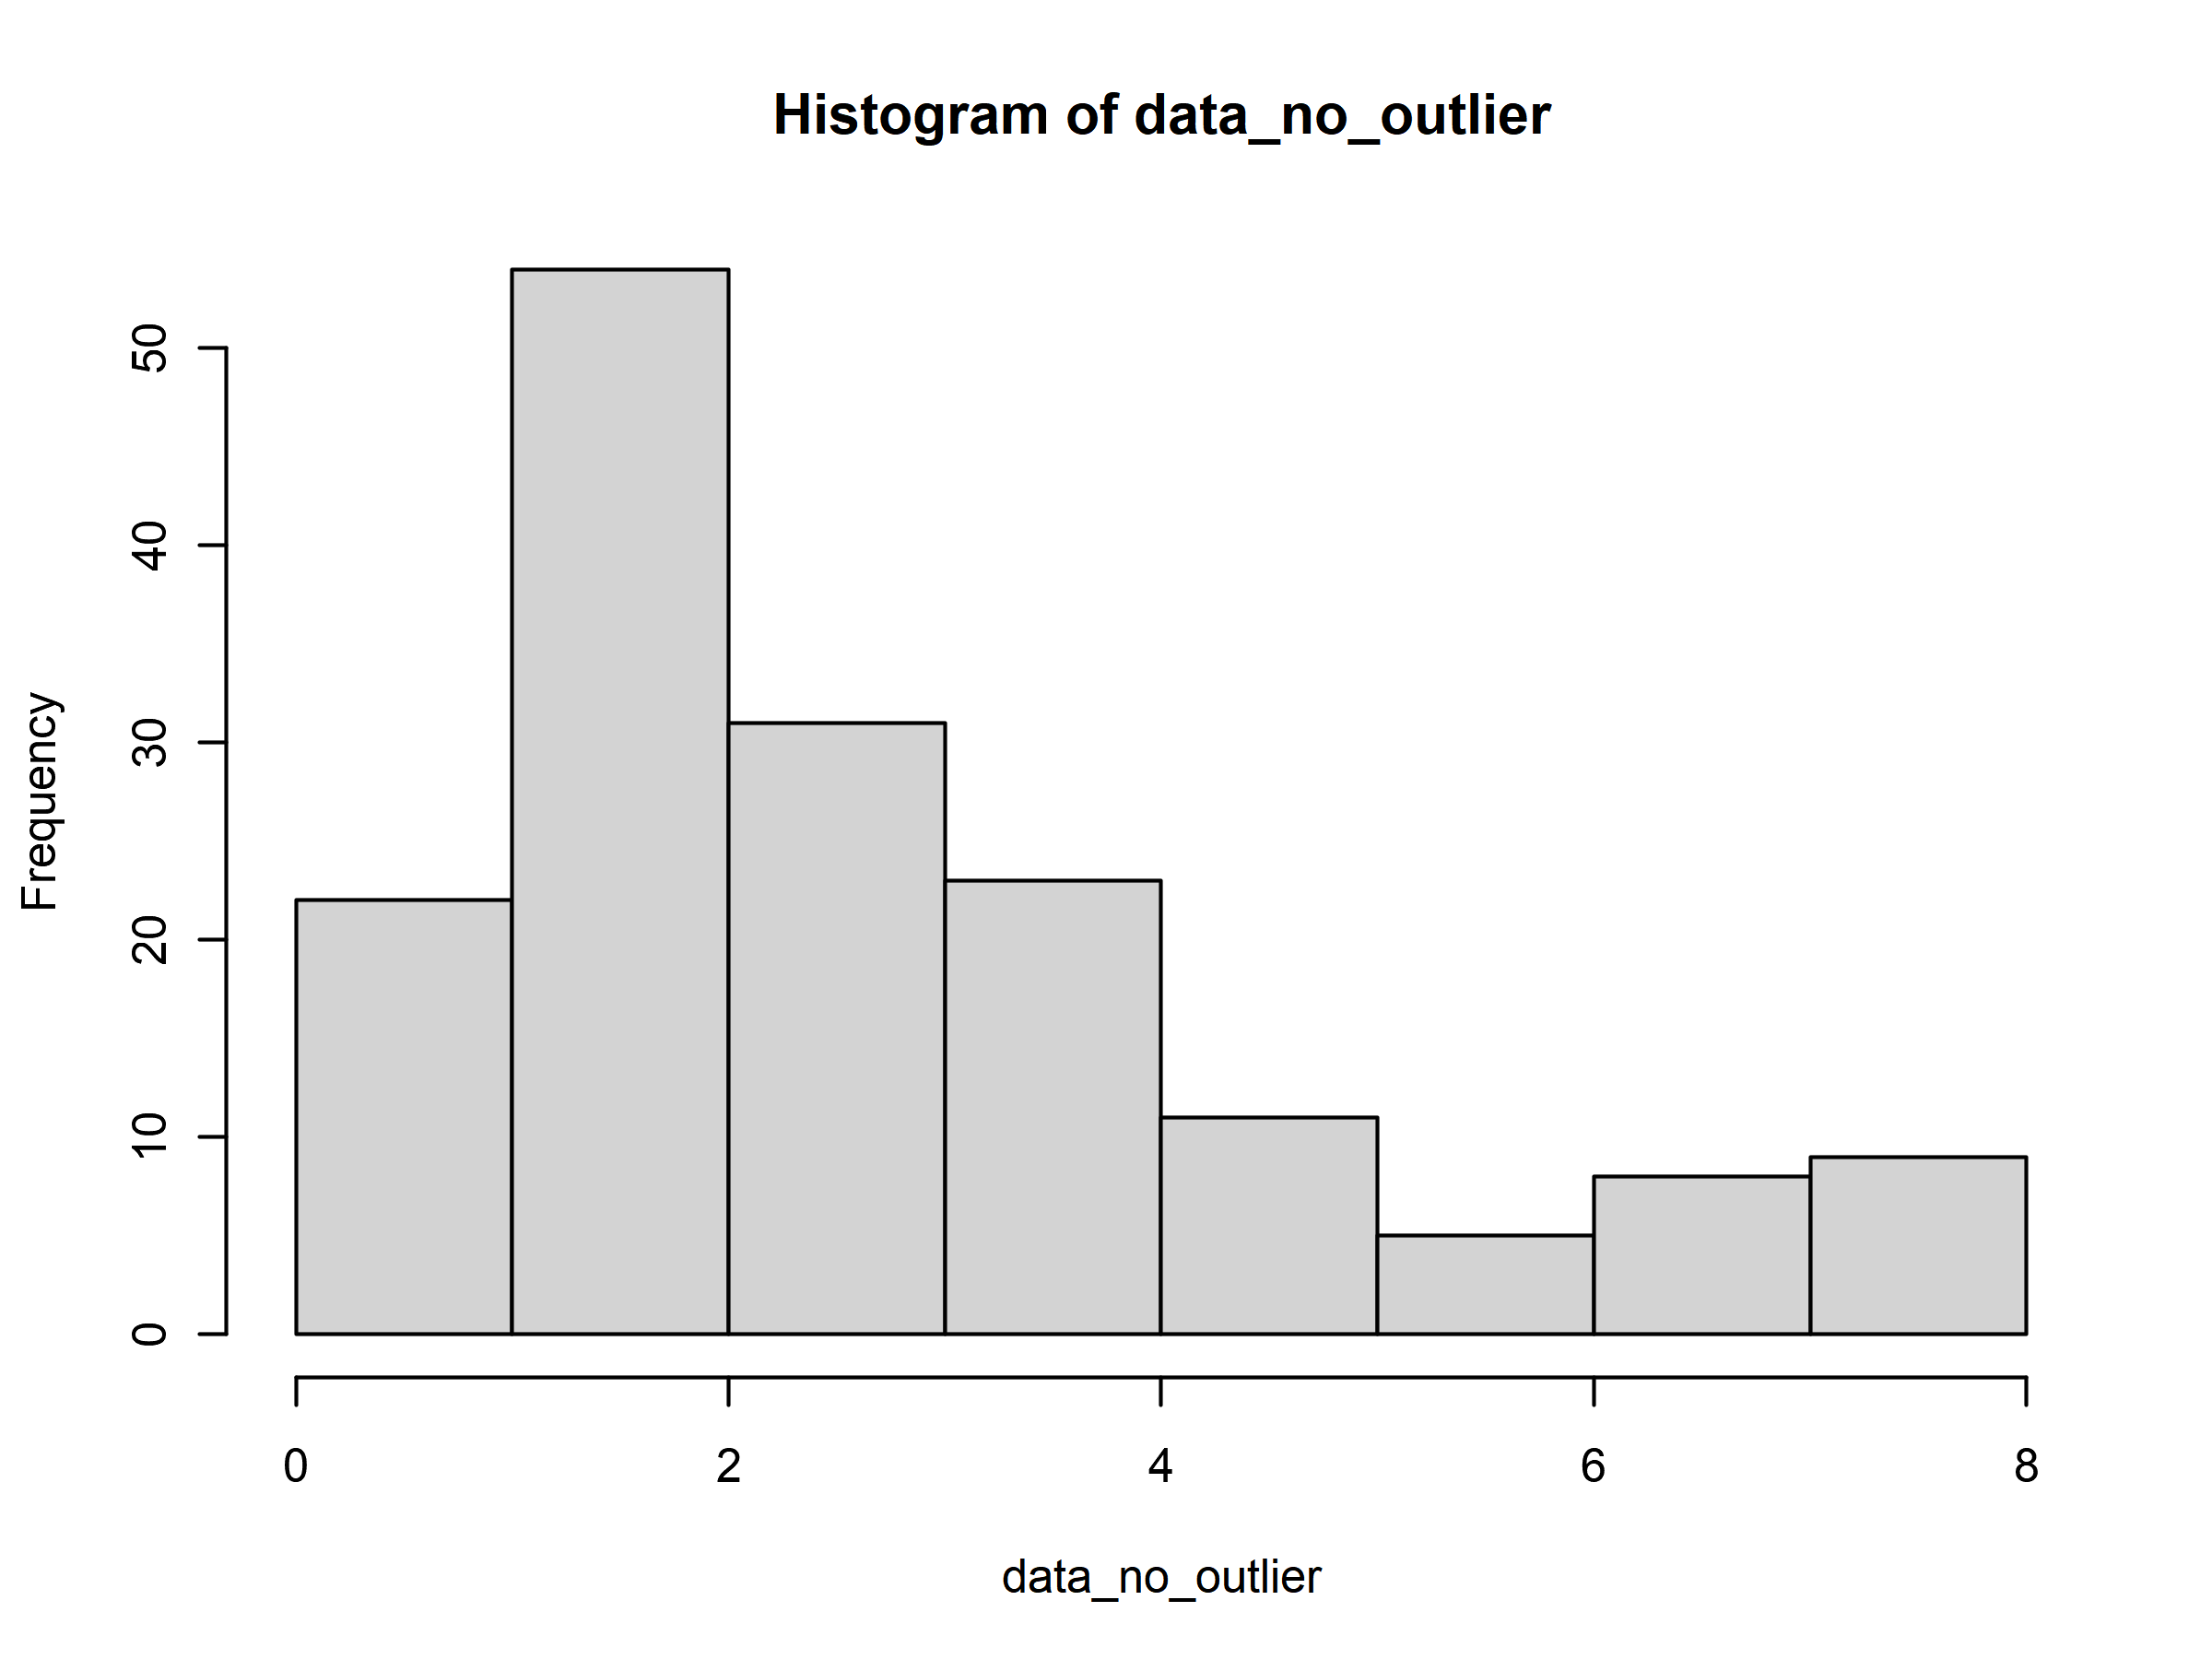

In [40]:
# detect and remove outliers
outliers_eu_sales <- boxplot(groupby_product_id$eu_sales, plot = FALSE)$out
data_no_outlier <- groupby_product_id$eu_sales[-which(groupby_product_id$eu_sales %in% outliers_eu_sales)] 

# descriptive stats
summary(data_no_outlier)
length(data_no_outlier)
paste("Standard Deviation", round(sd(data_no_outlier),3))

# Shapiro-Wilk test
shapiro.test(data_no_outlier)

# Now we can check for skewness
sprintf('Skewness: %s', round(skewness(data_no_outlier),2))

#Check for kurtosis
sprintf('Kurtosis: %s', round(kurtosis(data_no_outlier),2))

# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Q-Q plot
qqnorm(data_no_outlier)
# Add a reference line
qqline(data_no_outlier, col='red')

# plot histogram
hist(data_no_outlier)

### (e) Apply Transformations to Achieve Normal Distribution

### Log

In [118]:
# remove zeros
# Go through each row and determine if a value is zero
row_sub = apply(groupby_product_id, 1, function(row) all(row !=0 ))
                
# subset data
groupby_product_id_nozero = groupby_product_id[row_sub,]

In [126]:
# apply log transformation
log_eu_sales= log(groupby_product_id_nozero$eu_sales)

# Shapiro-Wilk test
shapiro.test(log_eu_sales)

# Now we can check for skewness
skewness(log_eu_sales)

#Check for kurtosis
kurtosis(log_eu_sales)


	Shapiro-Wilk normality test

data:  log_eu_sales
W = 0.92716, p-value = 1.144e-07


[1] -1.185741

[1] 9.797717

### Square Root

In [120]:
# apply log transformation
sqrt_eu_sales= sqrt(groupby_product_id_nozero$eu_sales)

# Shapiro-Wilk test
shapiro.test(sqrt_eu_sales)

# Now we can check for skewness
skewness(sqrt_eu_sales)

#Check for kurtosis
kurtosis(sqrt_eu_sales)


	Shapiro-Wilk normality test

data:  sqrt_eu_sales
W = 0.92726, p-value = 1.163e-07


[1] 1.147112

[1] 5.253245

### Cube Root

In [125]:
# apply log transformation
cube_eu_sales= groupby_product_id_nozero$eu_sales^(1/3)

# Shapiro-Wilk test
shapiro.test(cube_eu_sales)

# Now we can check for skewness
skewness(cube_eu_sales)

#Check for kurtosis
kurtosis(cube_eu_sales)


	Shapiro-Wilk normality test

data:  cube_eu_sales
W = 0.96534, p-value = 0.000253


[1] 0.6322447

[1] 4.026724

### Compare Results

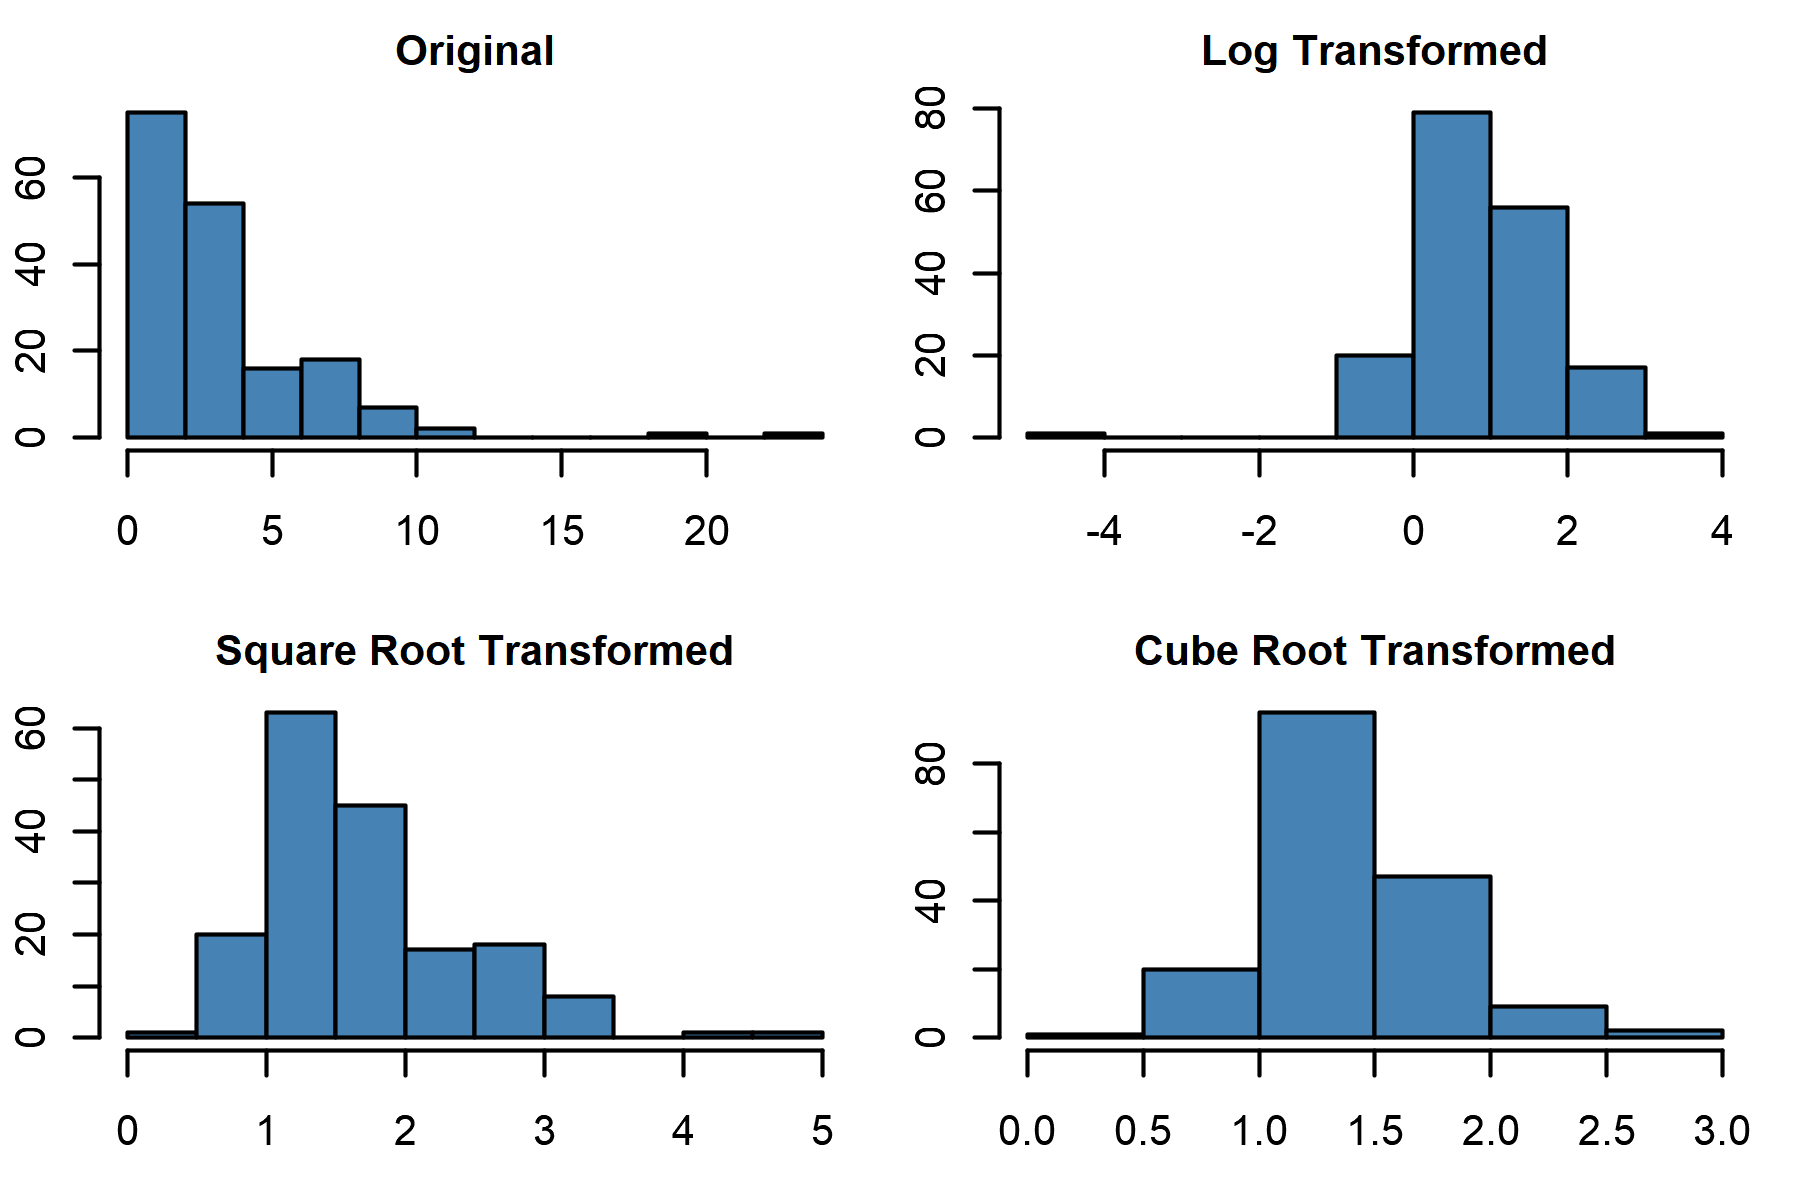

In [143]:
# 2 x 2 grid
par(mfrow = c(2,2), mar = c(3,2,2,1))

# Set the plot output options
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)

#create histogram for original distribution
hist(groupby_product_id_nozero$eu_sales, col=colours[1,1], main='Original', cex.main=1, cex.axis=1, cex.lab = 1)

#create histogram for log-transformed distribution 
hist(log_eu_sales, col=colours[1,1], main='Log Transformed', cex.main=1, cex.axis=1)

#create histogram for square-root-transformed distribution 
hist(sqrt_eu_sales, col=colours[1,1], main='Square Root Transformed', cex.main=1, cex.axis=1)

#create histogram for cube-root-transformed distribution 
hist(cube_eu_sales, col=colours[1,1], main='Cube Root Transformed', cex.main=1, cex.axis=1)

### Conclusion

The <b>cube root</b> transformation reduces skewedness and kurtosis the most, to produce the best possible distribution close to normal.

### (ii) North America Sales

### (a) Boxplot

In [57]:
# view a summary of na_sales data
summary(groupby_product_id$na_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.060   2.495   3.610   5.061   5.570  34.020 

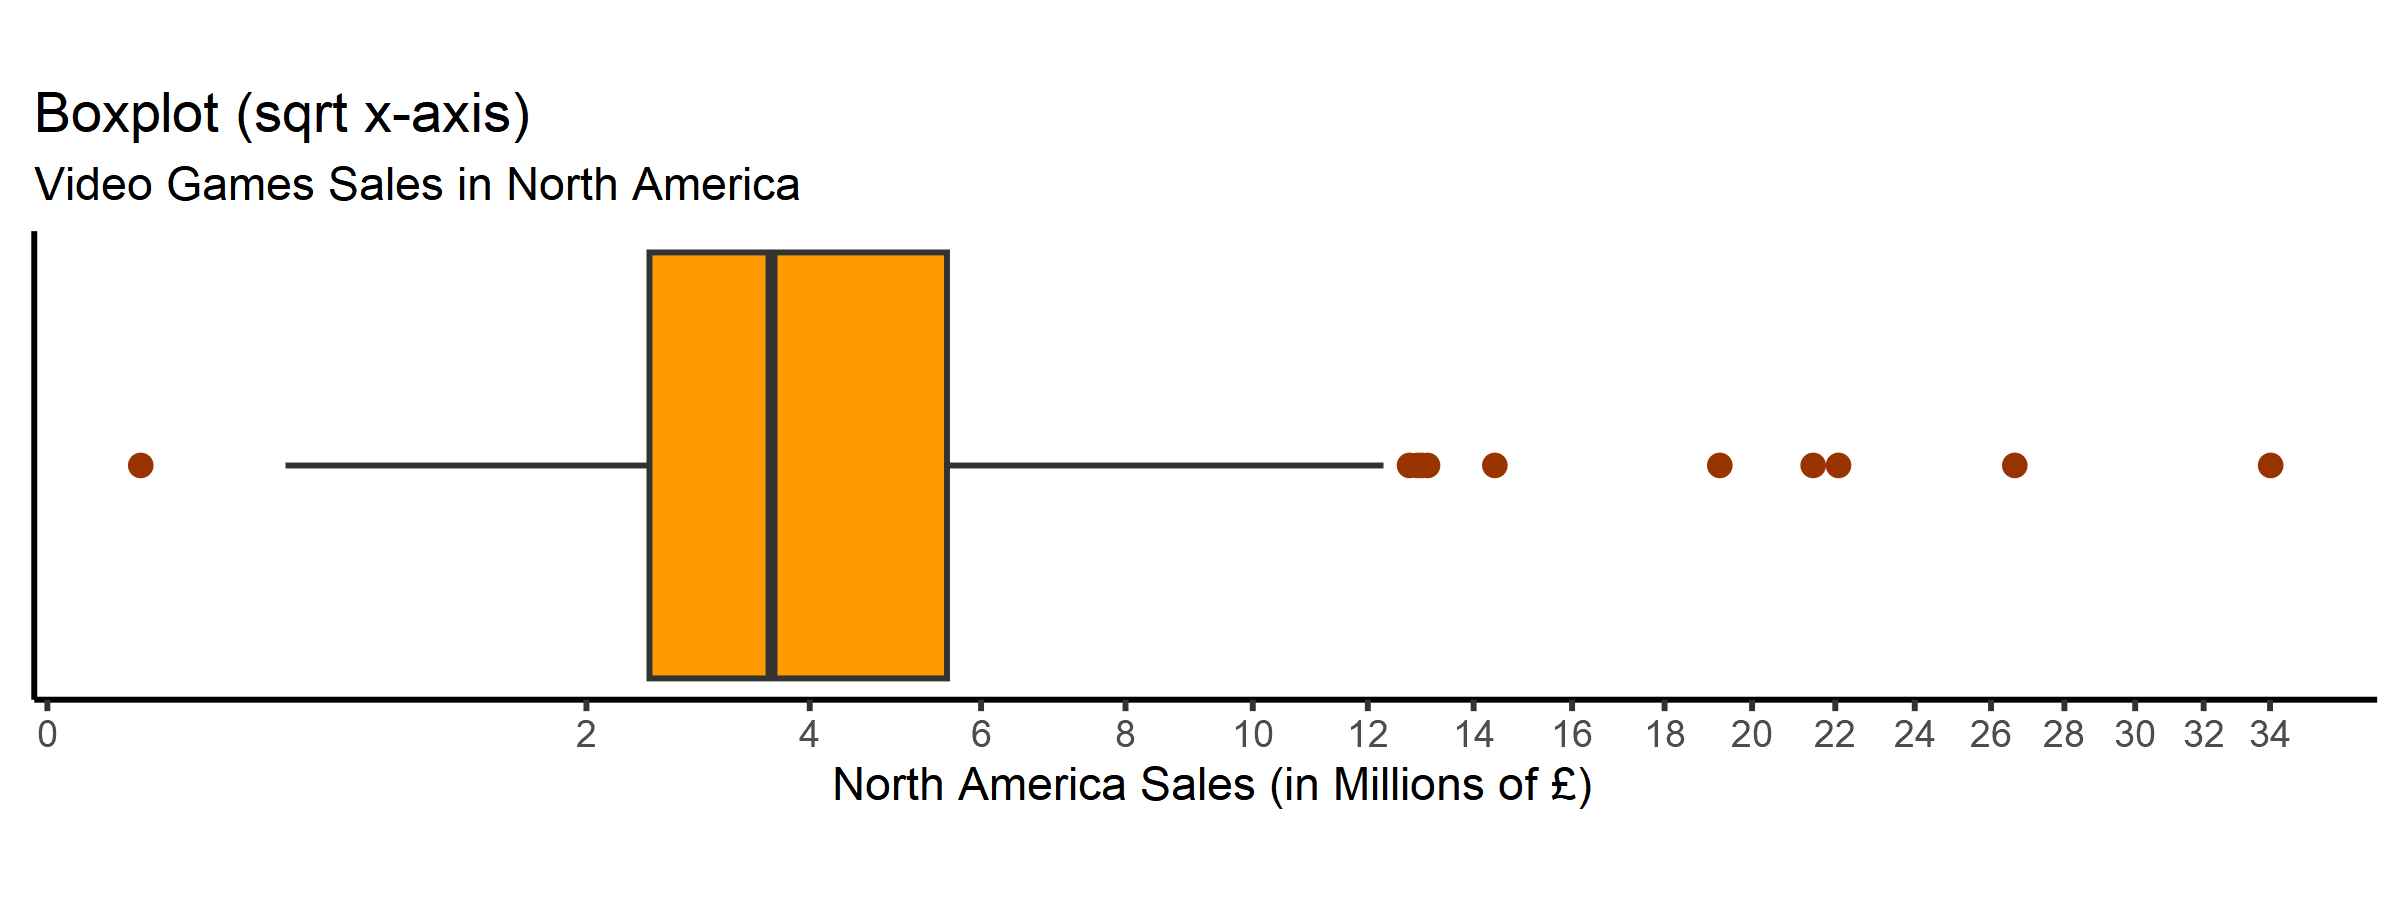

In [62]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=groupby_product_id, aes(x=na_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,2], outlier.color=colours[2,2], outlier.size=2) + 

    # setup the x-axis scale
    scale_x_sqrt(breaks=seq(0, 34, 2)) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot (sqrt x-axis)',
         subtitle = 'Video Games Sales in North America',
         x = ' North America Sales (in Millions of £)') +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5)

### (b) Histogram

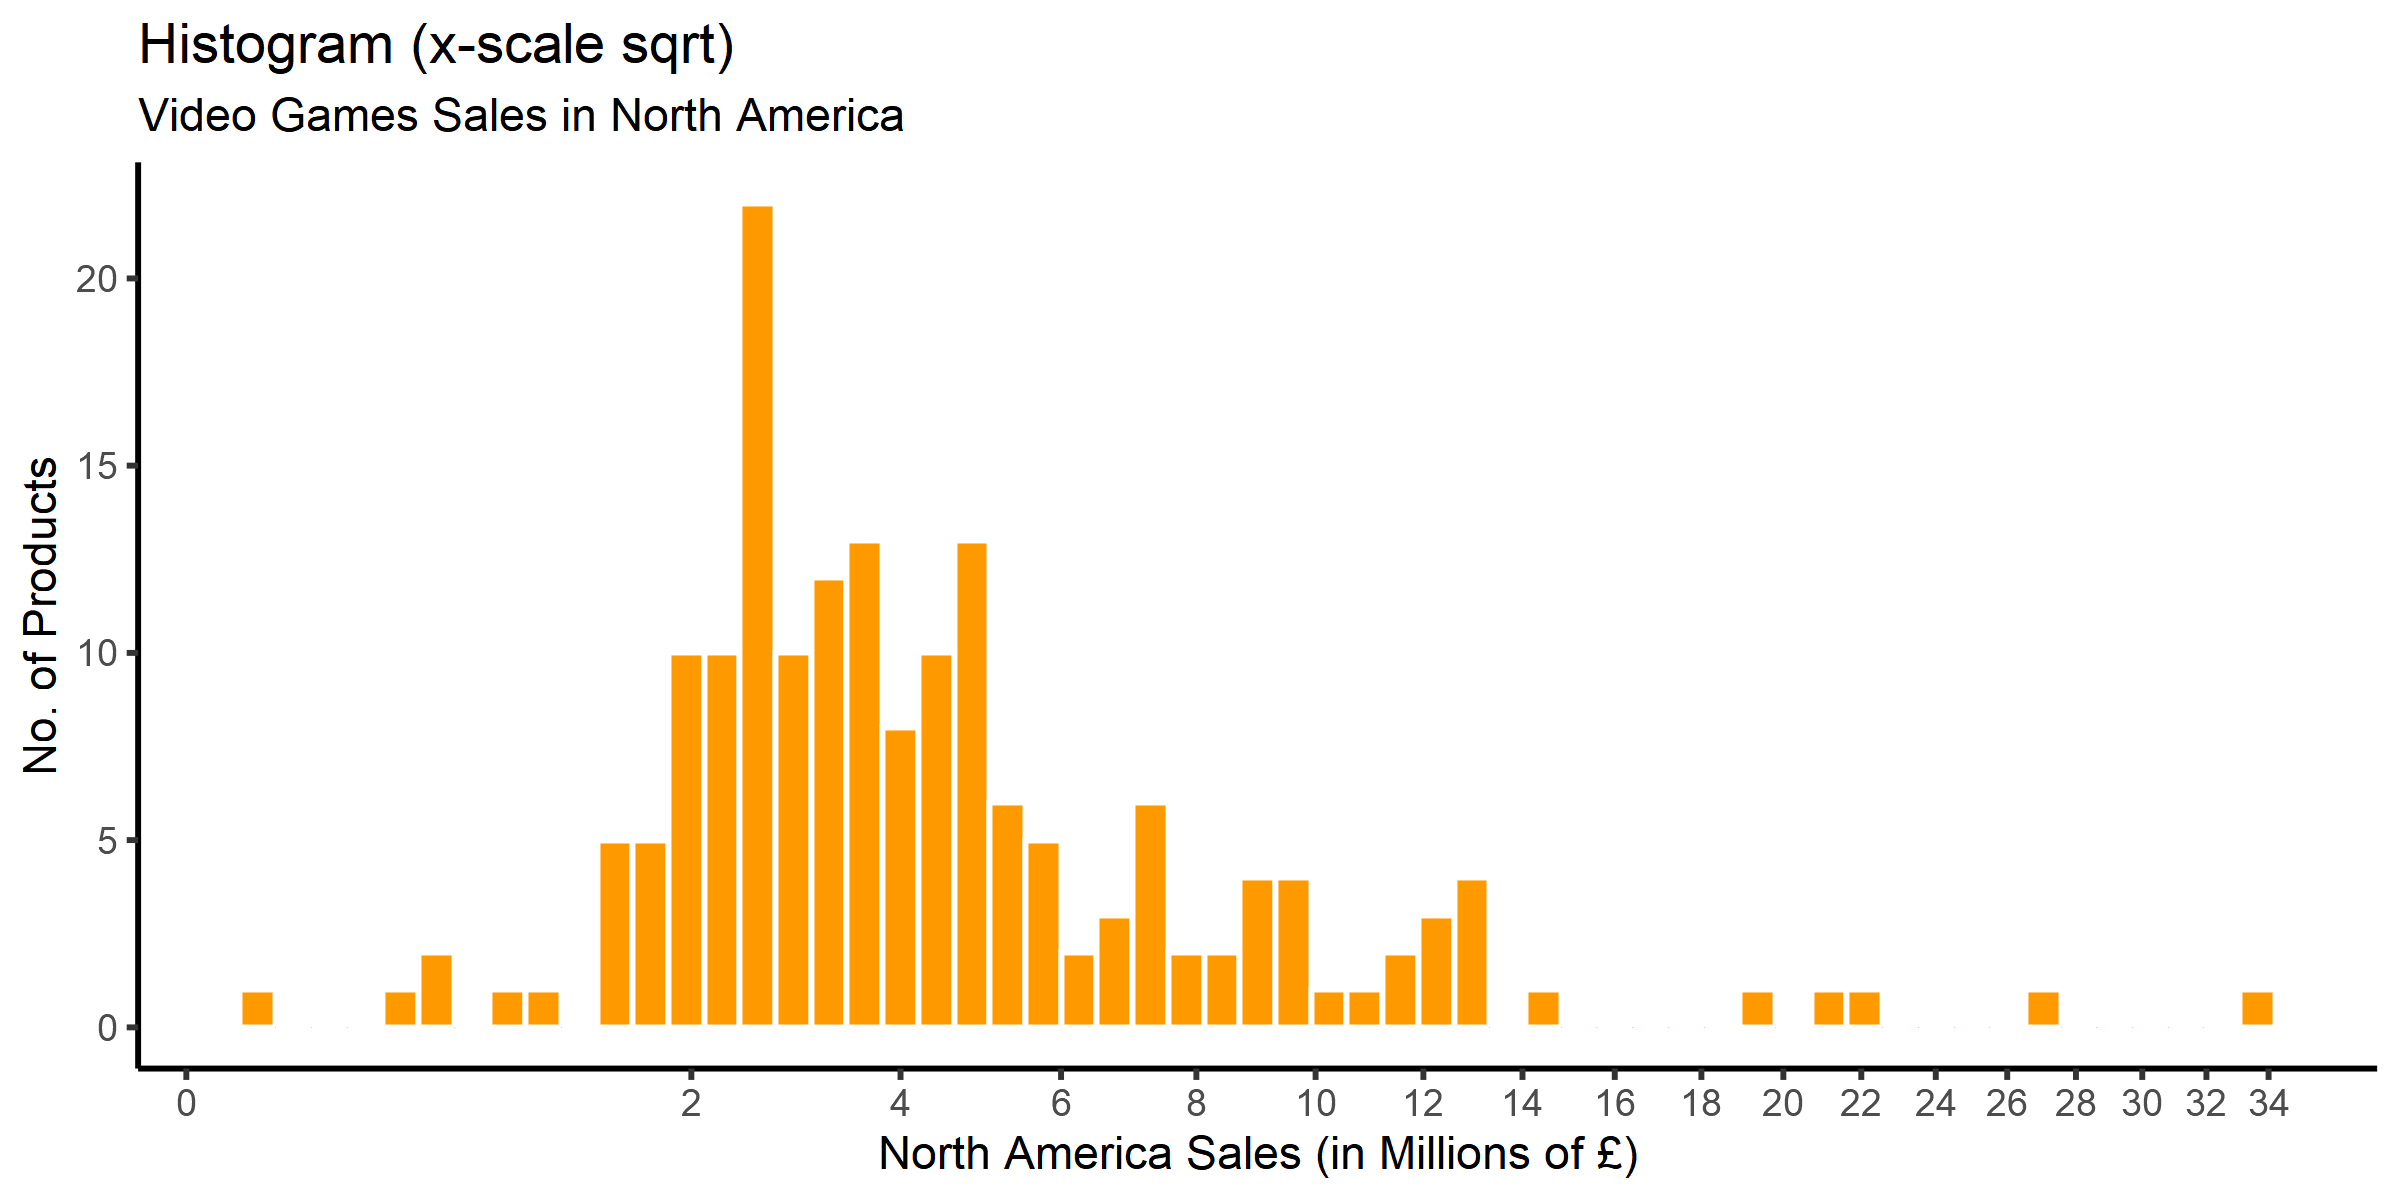

In [71]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(groupby_product_id, aes(x = na_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.1, colour='white', fill=colours[1,2], aes(y =after_stat(count))) + 

    # Scale the x-axis
    scale_x_sqrt(breaks=seq(0, 34, 2)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 25, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram (x-scale sqrt)',
         subtitle = 'Video Games Sales in North America',
         x = 'North America Sales (in Millions of £)') +

    # Add theme
    theme_classic()

### (c) Q-Q Plot, Shapiro-Wilk, Kurtosis Tests

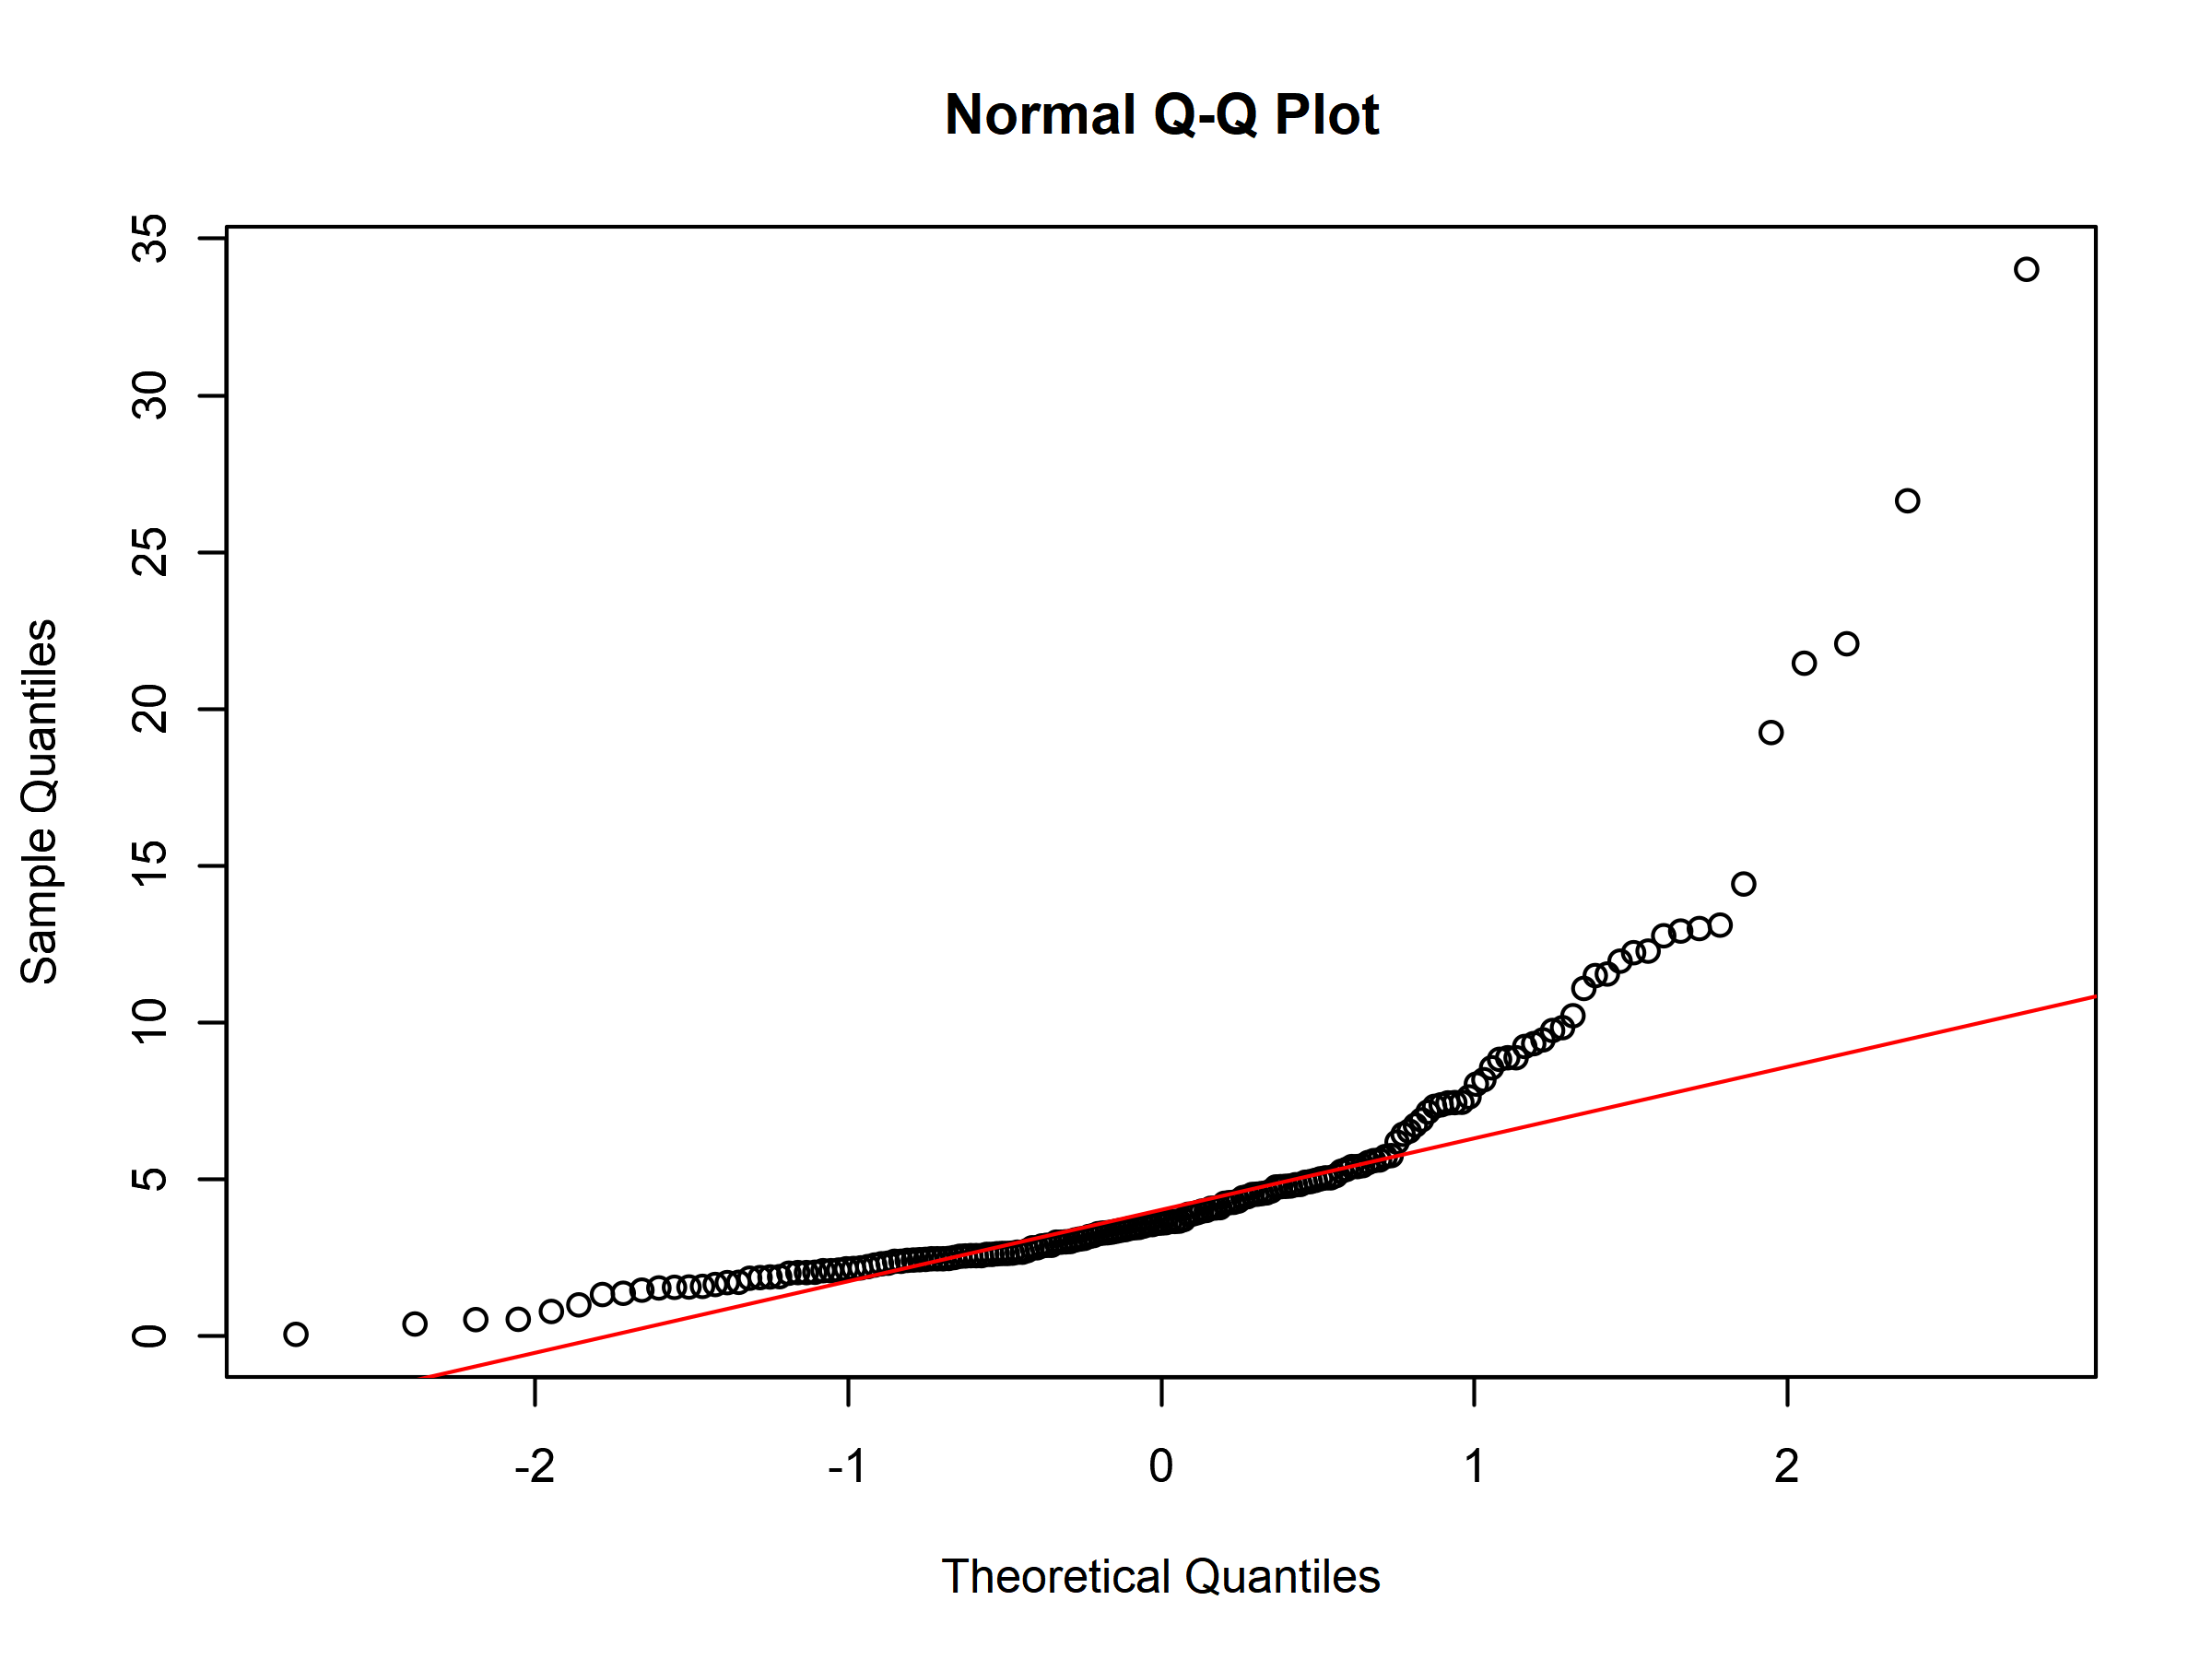

In [72]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Q-Q plot
qqnorm(groupby_product_id$na_sales)

# Add a reference line
qqline(groupby_product_id$na_sales, col='red')

In [73]:
# Shapiro-Wilk test
shapiro.test((groupby_product_id$na_sales))


	Shapiro-Wilk normality test

data:  (groupby_product_id$na_sales)
W = 0.69813, p-value < 2.2e-16


In [74]:
# Now we can check for skewness
skewness(groupby_product_id$na_sales)

[1] 3.048198

In [75]:
#Check for kurtosis.
kurtosis(groupby_product_id$na_sales)

# Our kurtosis value is more than 3, suggesting our data is leptokurtic.

[1] 15.6026

### (d) Remove Outliers: Shapiro-Wilk, Kurtosis Tests, Q-Q Plot & Histogram 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.060   2.455   3.390   3.893   4.893   9.840 

[1] 158


	Shapiro-Wilk normality test

data:  data_no_outlier
W = 0.92196, p-value = 1.557e-07


[1] 0.9782389

[1] 3.506524

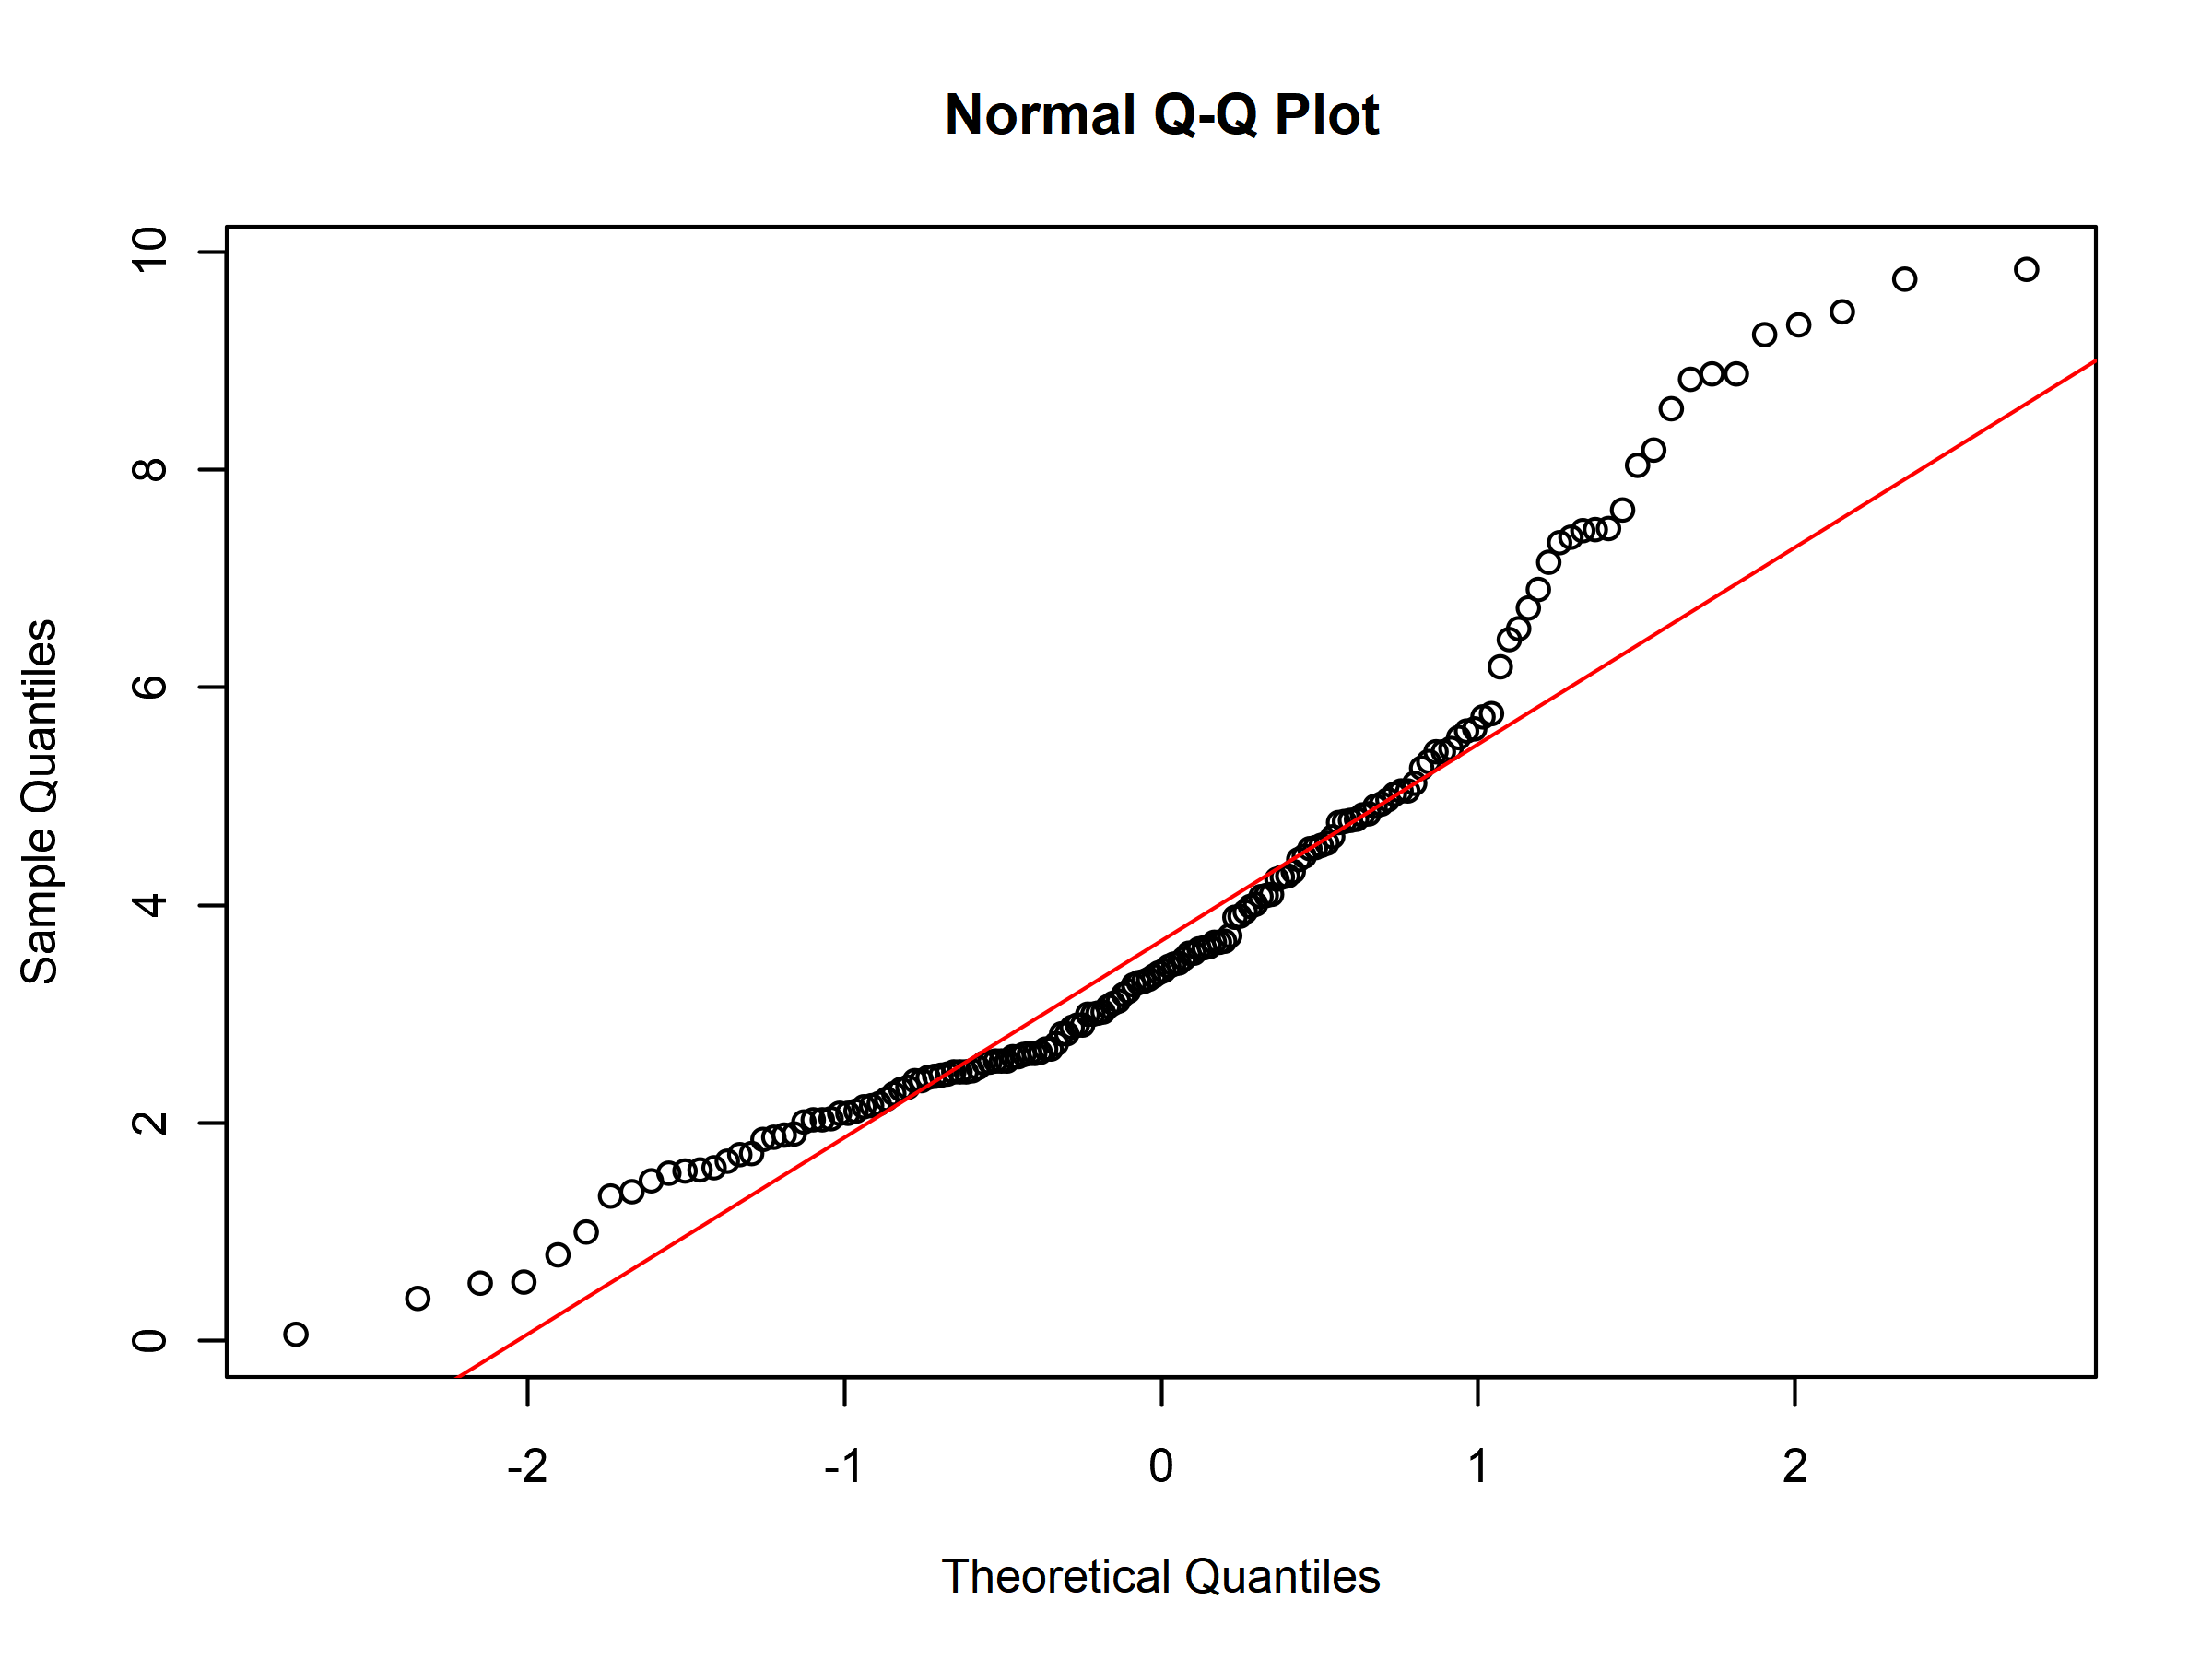

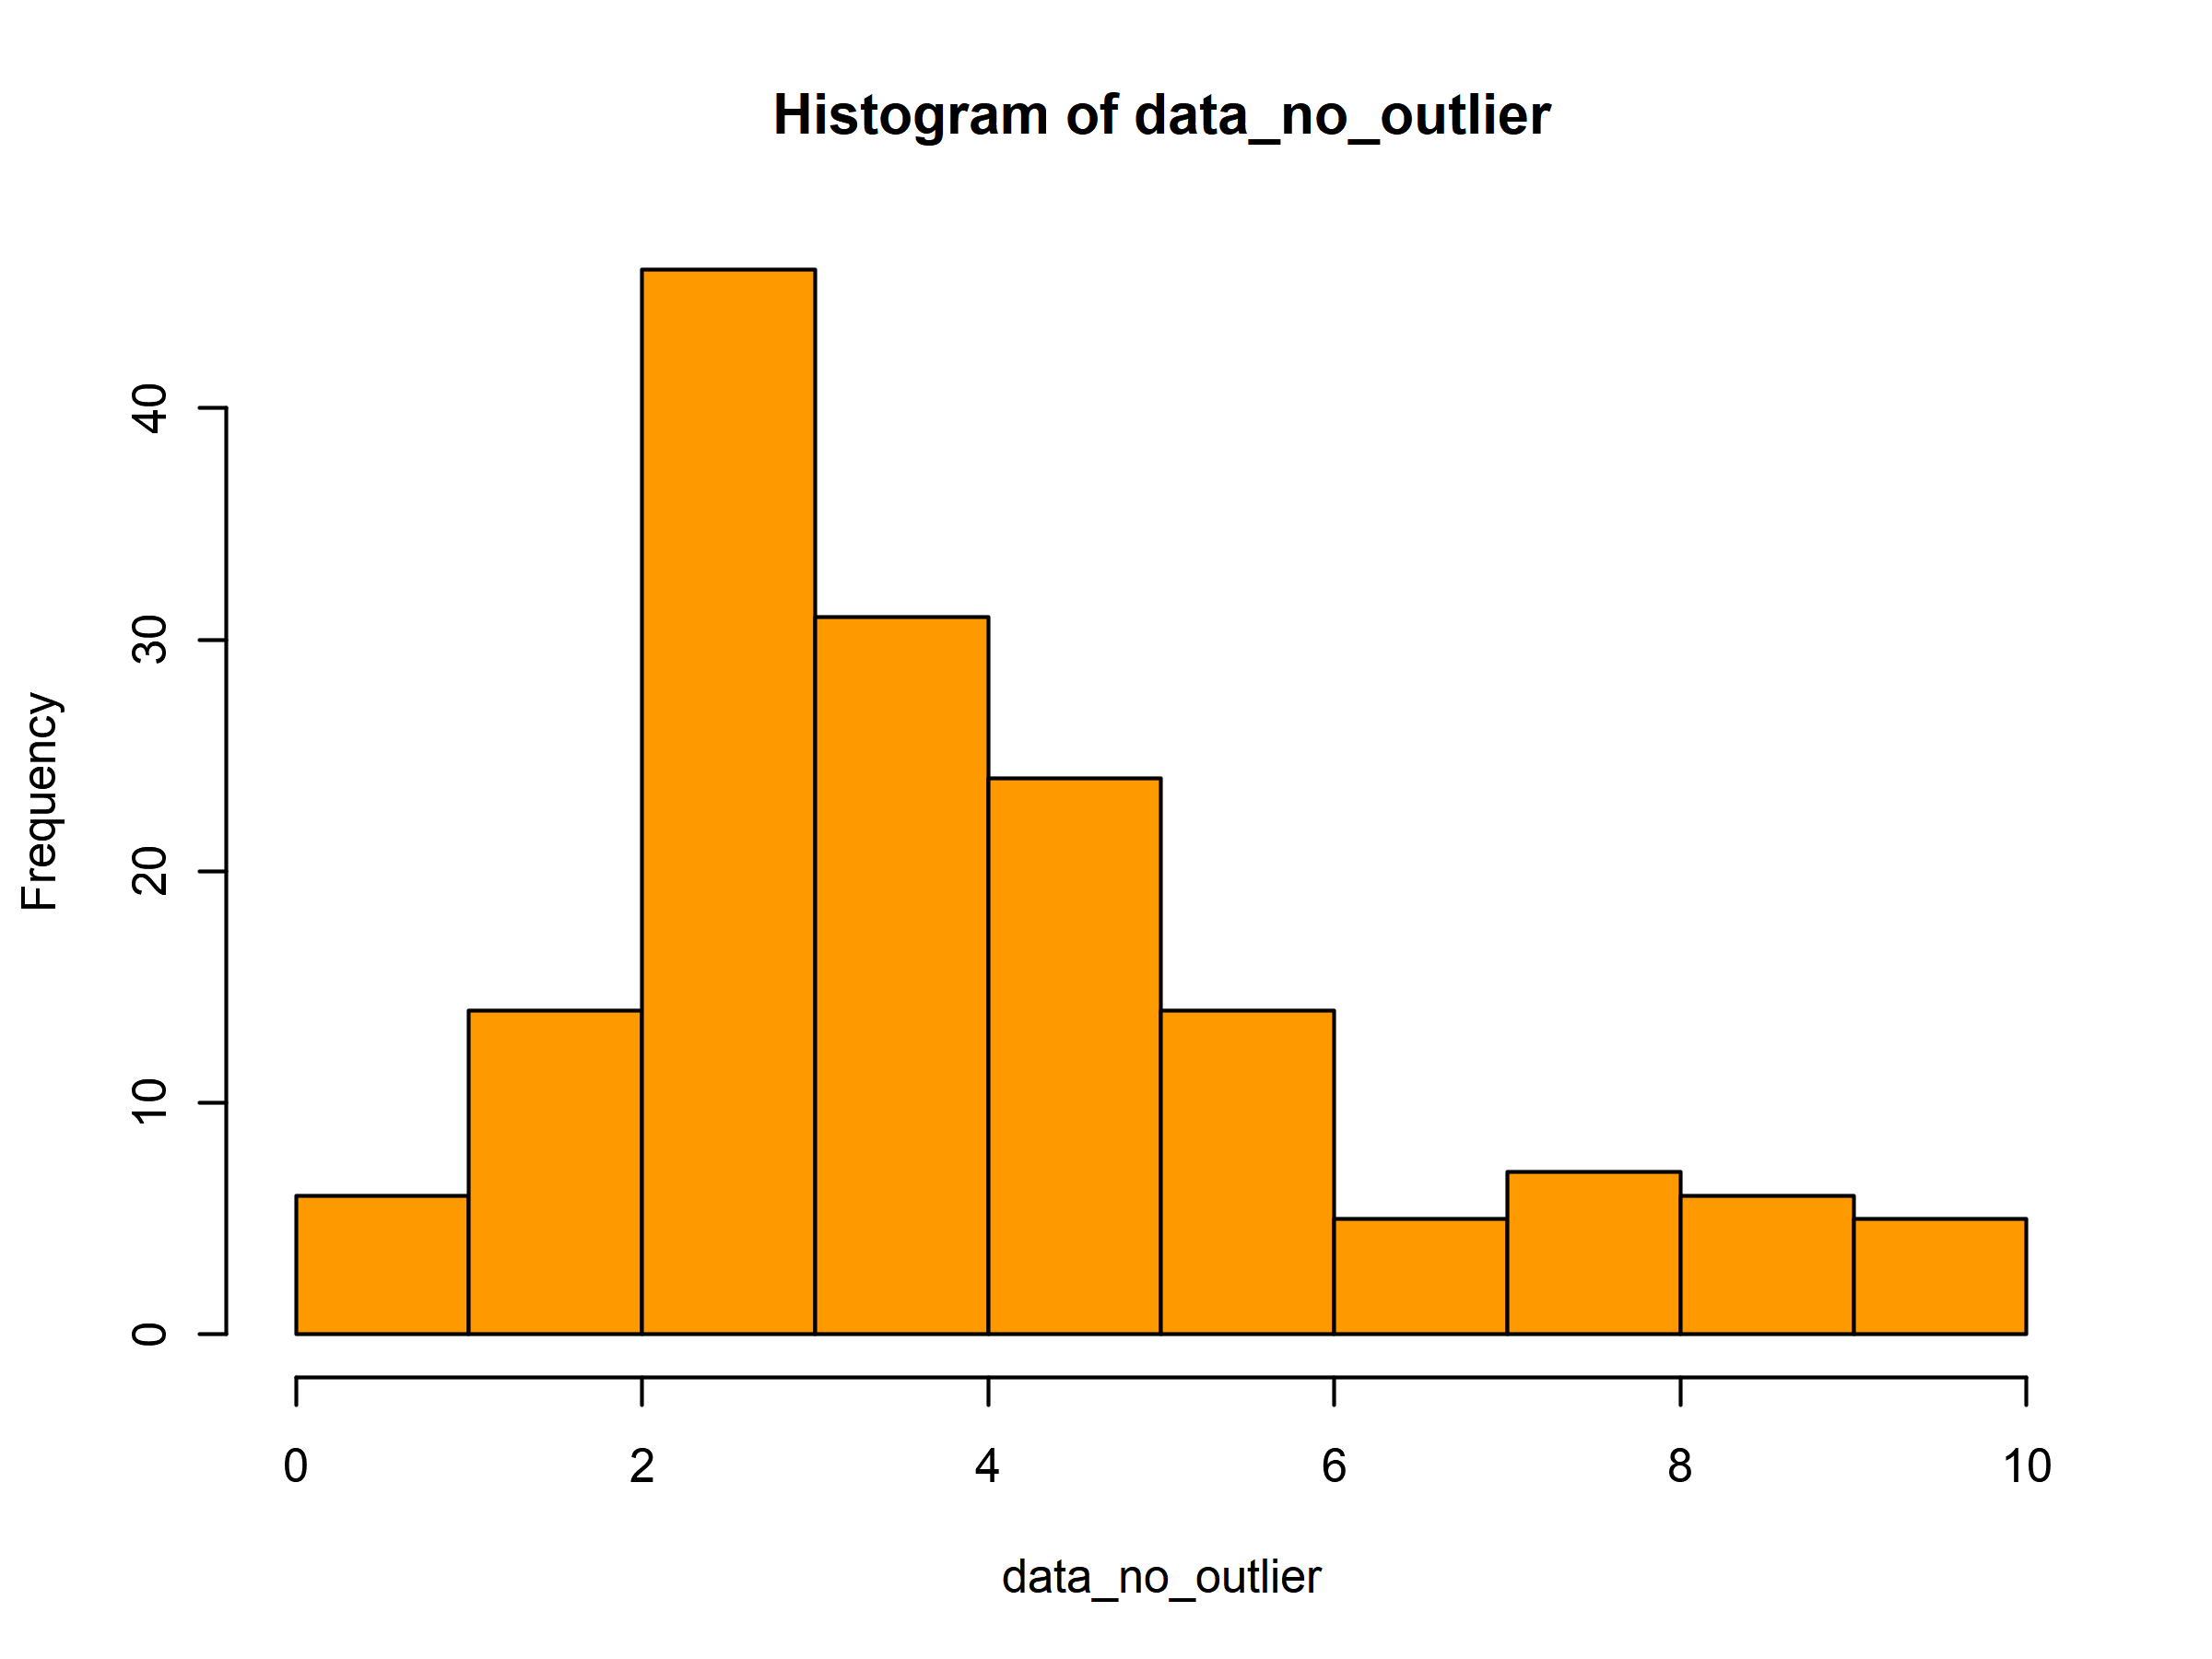

In [102]:
# detect and remove outliers
outliers_na_sales <- boxplot(groupby_product_id$na_sales, plot = FALSE)$out
data_no_outlier <- groupby_product_id$na_sales[-which(groupby_product_id$na_sales %in% outliers_na_sales)] 

# descriptive stats
summary(data_no_outlier)
length(data_no_outlier)

# Shapiro-Wilk test
shapiro.test(data_no_outlier)

# Now we can check for skewness
skewness(data_no_outlier)

#Check for kurtosis
kurtosis(data_no_outlier)

# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Q-Q plot
qqnorm(data_no_outlier)
# Add a reference line
qqline(data_no_outlier, col='red')

# plot histogram
hist(data_no_outlier, col=colours[1,2])

Removing outliers dramatically improves the normality of the data.

### (e) Apply Transformations to Achieve Normal Distribution

### Log

In [151]:
# apply log transformation
log_na_sales= log(groupby_product_id$na_sales)

# Shapiro-Wilk test
shapiro.test(log_na_sales)

# Now we can check for skewness
skewness(log_na_sales)

#Check for kurtosis
kurtosis(log_na_sales)


	Shapiro-Wilk normality test

data:  log_na_sales
W = 0.93674, p-value = 5.726e-07


[1] -0.7171648

[1] 7.678561

### Square Root

In [121]:
# apply log transformation
sqrt_na_sales= sqrt(groupby_product_id$na_sales)

# Shapiro-Wilk test
shapiro.test(sqrt_na_sales)

# Now we can check for skewness
skewness(sqrt_na_sales)

#Check for kurtosis
kurtosis(sqrt_na_sales)


	Shapiro-Wilk normality test

data:  sqrt_na_sales
W = 0.89296, p-value = 6.521e-10


[1] 1.469607

[1] 6.454933

### Cube Root

In [122]:
# apply log transformation
cube_na_sales= groupby_product_id$na_sales^(1/3)

# Shapiro-Wilk test
shapiro.test(cube_na_sales)

# Now we can check for skewness
skewness(cube_na_sales)

#Check for kurtosis
kurtosis(cube_na_sales)


	Shapiro-Wilk normality test

data:  cube_na_sales
W = 0.93821, p-value = 7.503e-07


[1] 0.9149686

[1] 5.071783

### Compare Results

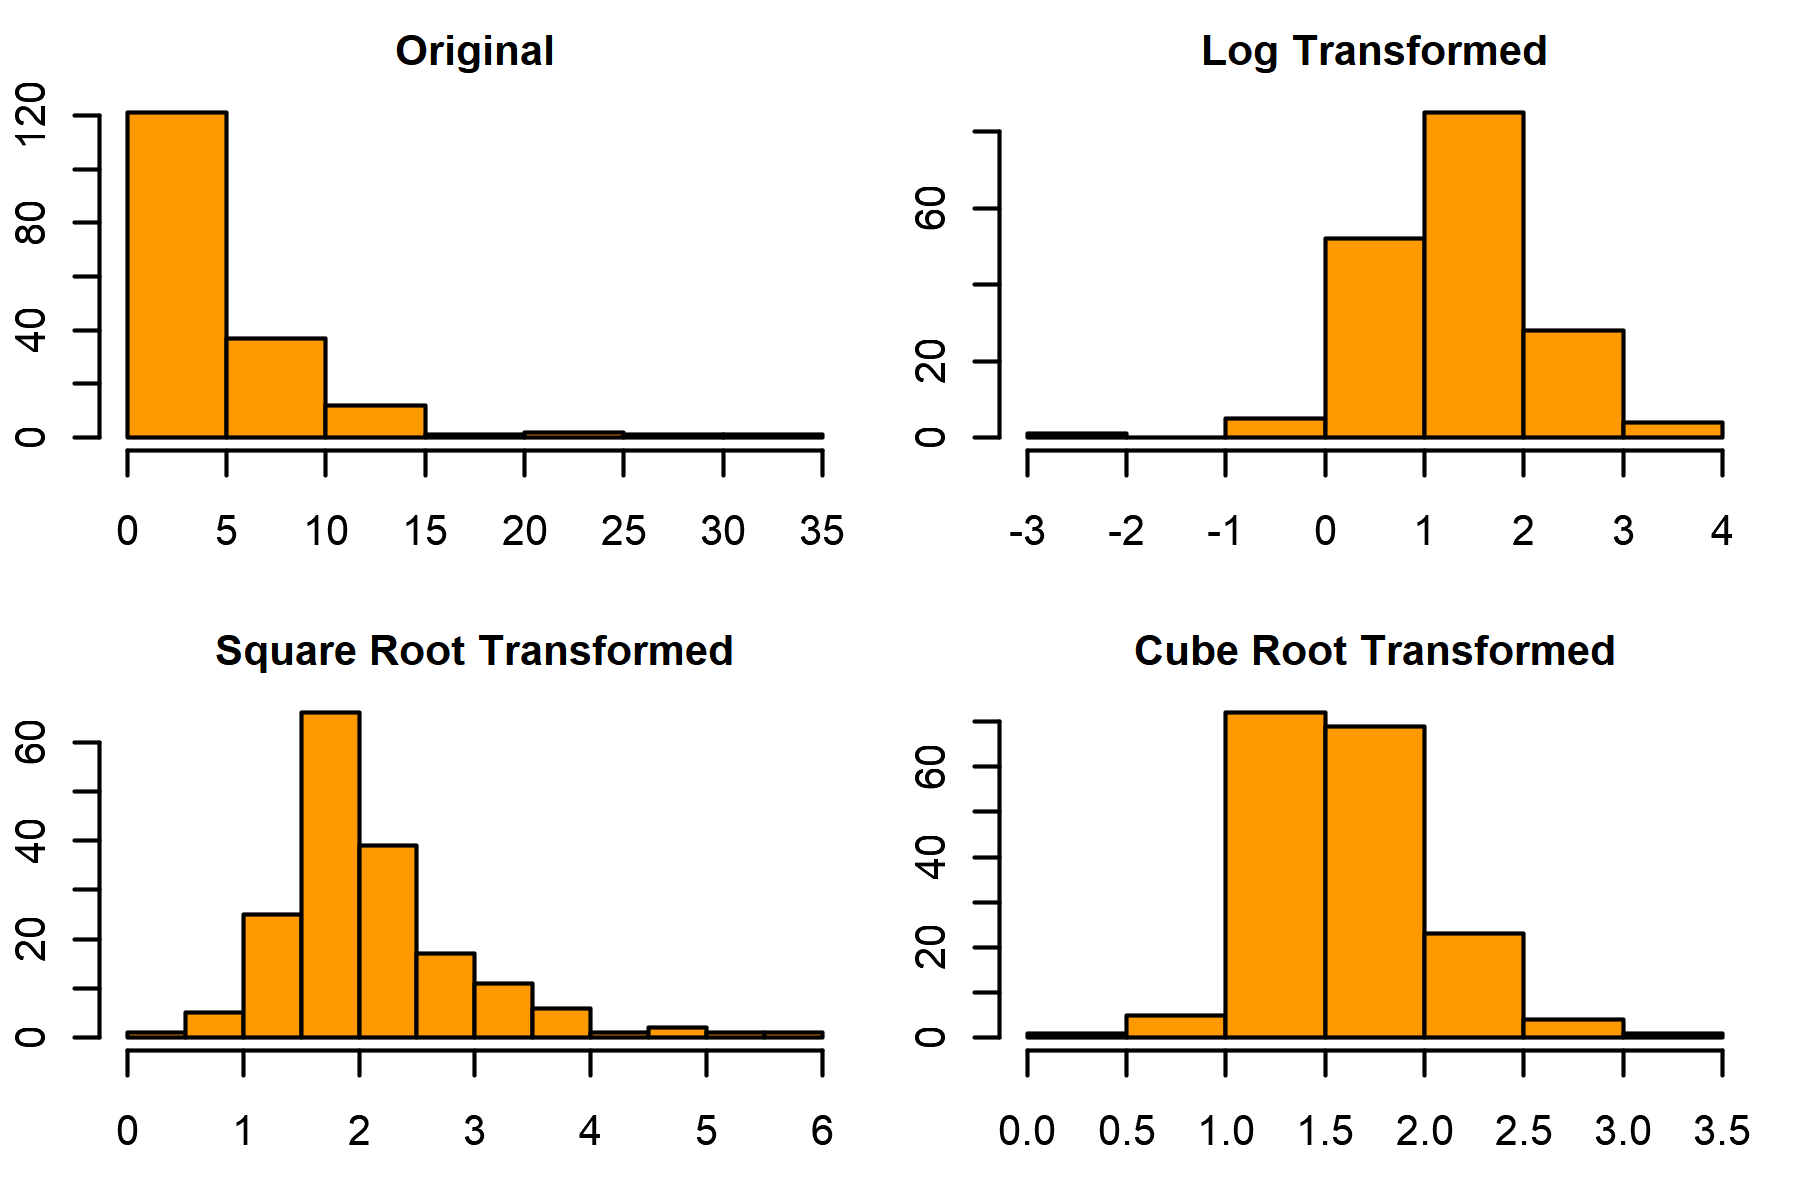

In [145]:
# 2 x 2 grid
par(mfrow = c(2,2), mar = c(3,2,2,1))

# Set the plot output options
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)

#create histogram for original distribution
hist(groupby_product_id$na_sales, col=colours[1,2], main='Original', cex.main=1, cex.axis=1, cex.lab = 1)

#create histogram for log-transformed distribution 
hist(log_na_sales, col=colours[1,2], main='Log Transformed', cex.main=1, cex.axis=1)

#create histogram for square-root-transformed distribution 
hist(sqrt_na_sales, col=colours[1,2], main='Square Root Transformed', cex.main=1, cex.axis=1)

#create histogram for cube-root-transformed distribution 
hist(cube_na_sales, col=colours[1,2], main='Cube Root Transformed', cex.main=1, cex.axis=1)

### Conclusion

The <b>cube root</b> transformation reduces skewedness and kurtosis the most, to produce the best possible distribution close to normal.

### (iii) Global Sales

### (a) Boxplot

In [59]:
# view a summary of global_sales data
summary(groupby_product_id$global_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.200   5.515   8.090  10.730  12.785  67.850 

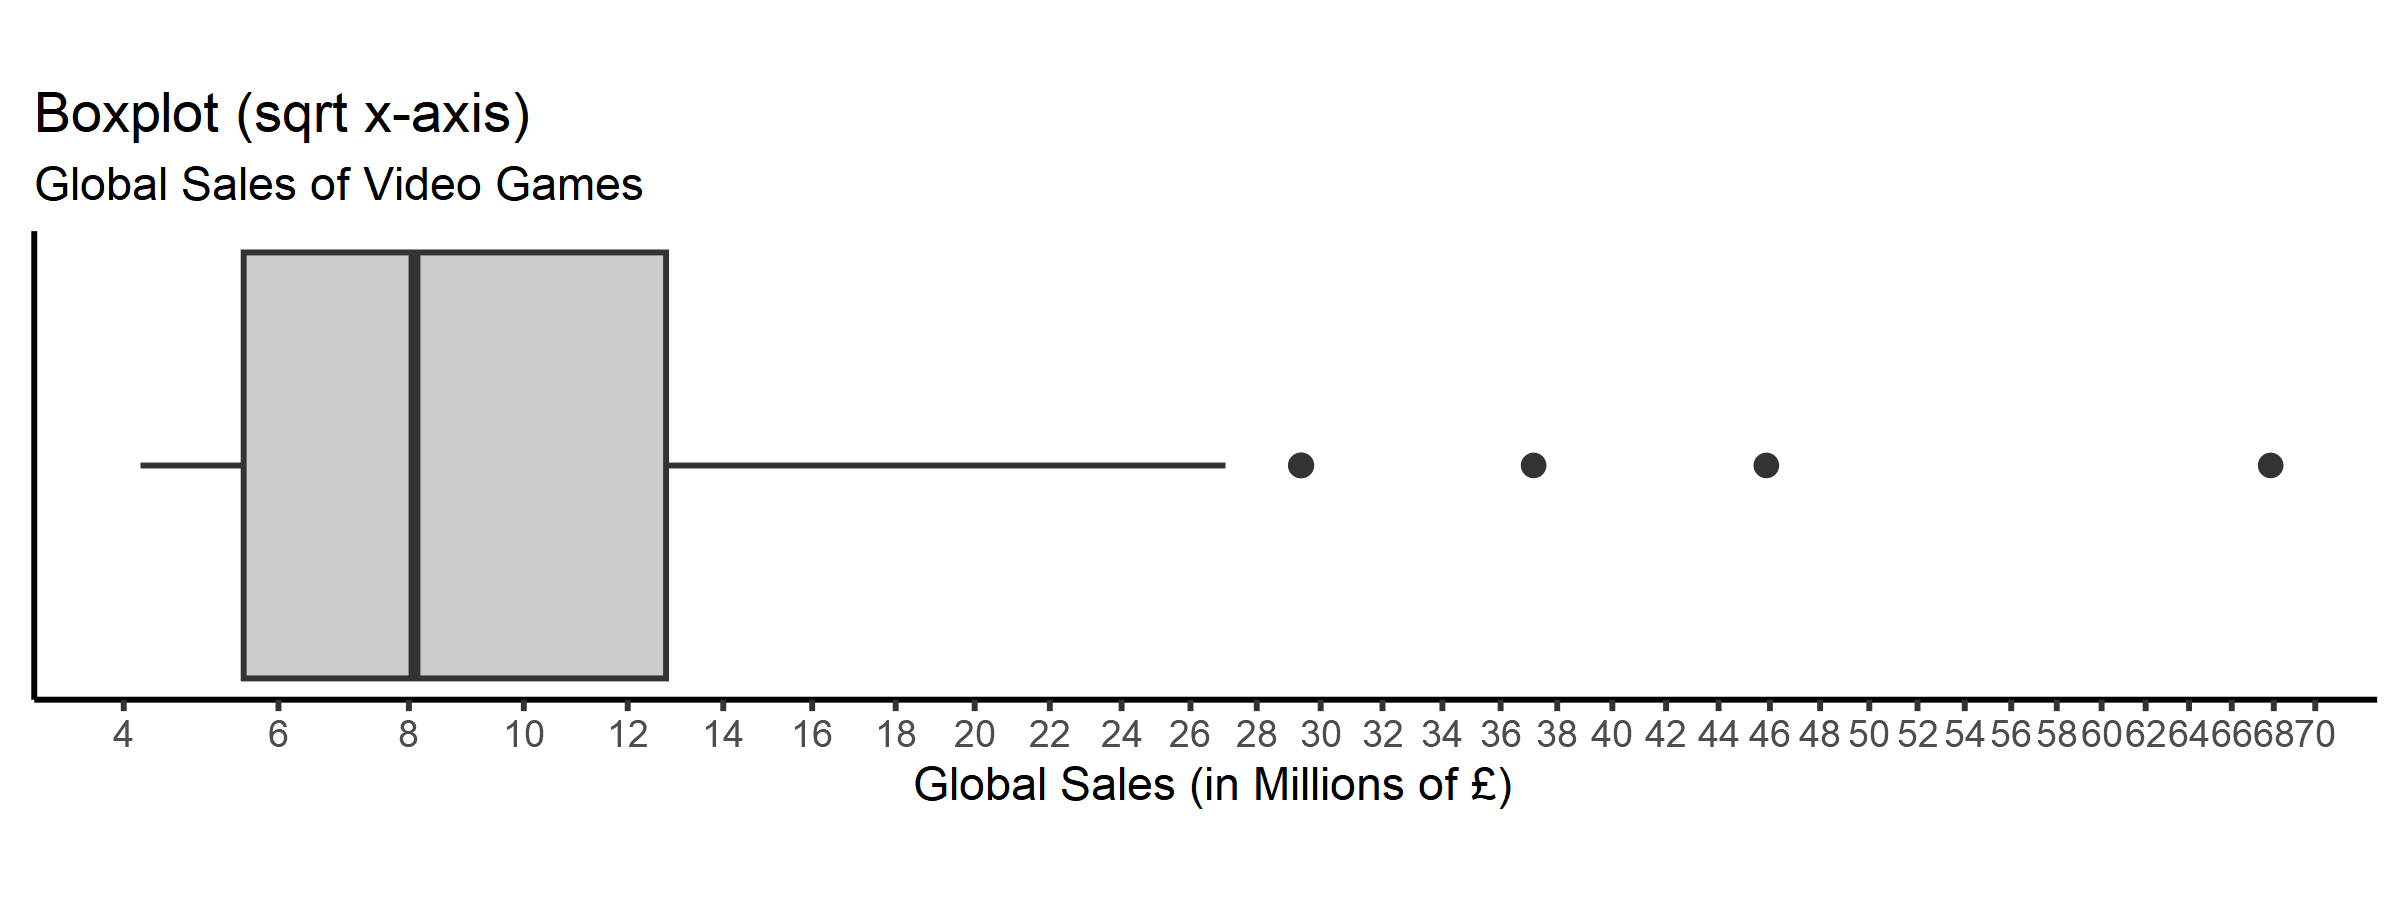

In [66]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res = 300)

# use data column eu_sales
ggplot(data=groupby_product_id, aes(x=global_sales)) + 

    # setup boxplot
    geom_boxplot(fill=colours[1,3], outlier.color=colours[2,3], outlier.size=2) + 

    # setup the x-axis scale
    scale_x_sqrt(breaks=seq(0, 70, 2)) +

    # Add labels for title, subtitle and x-axis
    labs(title = 'Boxplot (sqrt x-axis)',
         subtitle = 'Global Sales of Video Games',
         x = ' Global Sales (in Millions of £)') +

    # add a theme
    theme_classic() +
    
    # remove y-axis labels & set aspect ratio
    theme(axis.text.y=element_blank(),
          axis.ticks.y=element_blank(),
          aspect.ratio=1/5)

### (b) Histogram

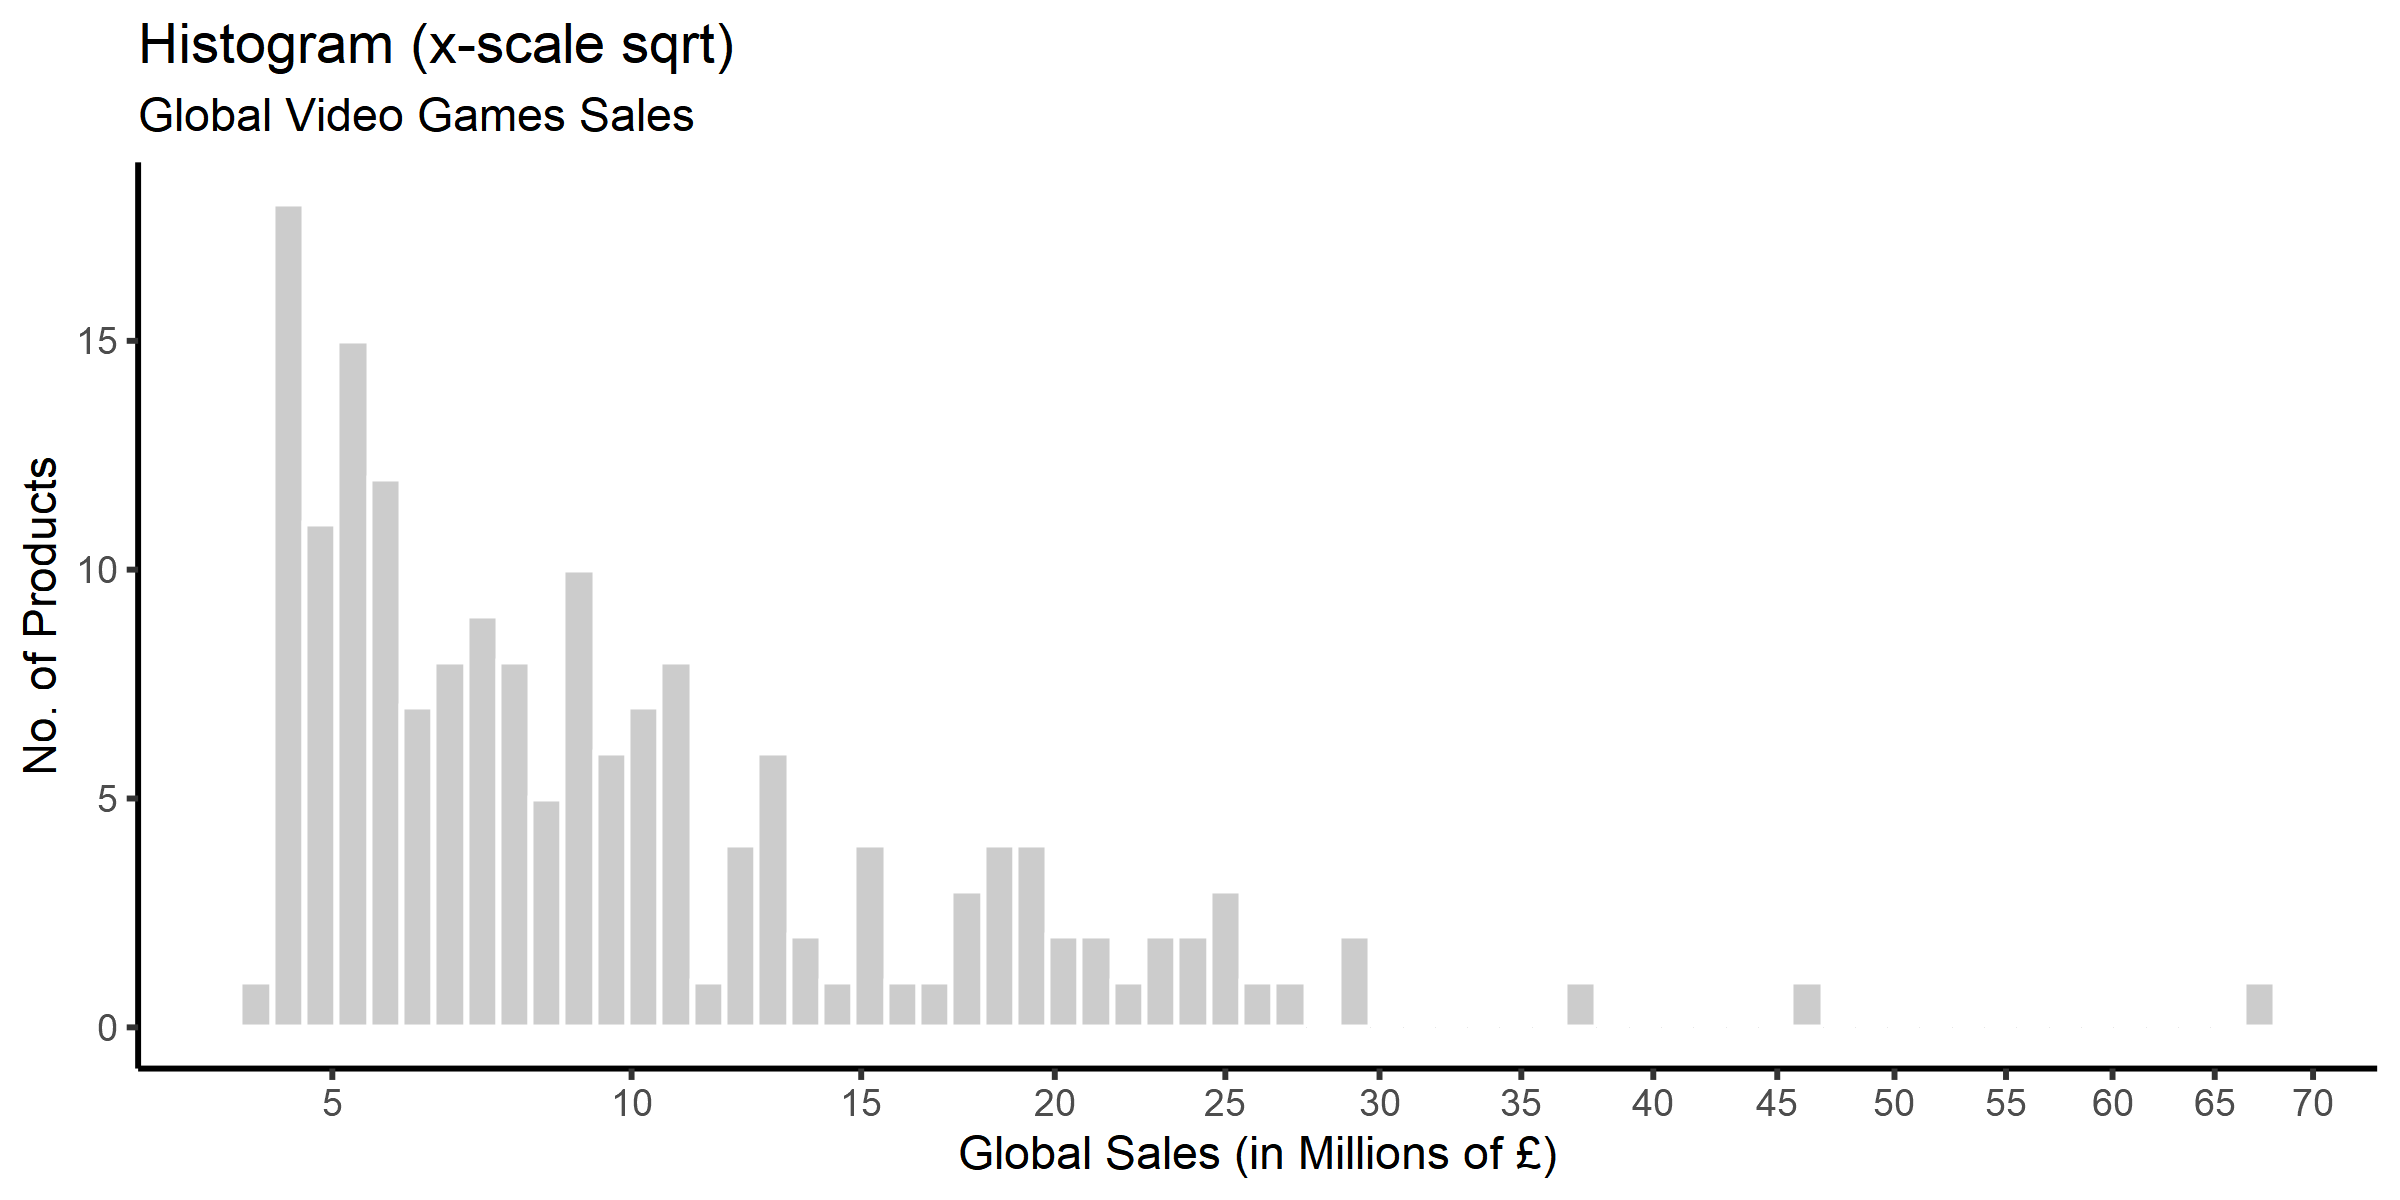

In [70]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# plot the chart
ggplot(groupby_product_id, aes(x = global_sales)) + 
    
    # Histogram
    geom_histogram(binwidth=0.1, colour='white', fill=colours[1,3], aes(y =after_stat(count))) + 

    # Scale the x-axis
    scale_x_sqrt(breaks=seq(0, 70, 5)) +

    # setup the y-scale
    scale_y_continuous(breaks=seq(0, 50, 5), 'No. of Products') +

    # Add labels for title, subtitle and x
    labs(title = 'Histogram (x-scale sqrt)',
         subtitle = 'Global Video Games Sales ',
         x = 'Global Sales (in Millions of £)') +

    # Add theme
    theme_classic()

### (c) Q-Q Plot, Shapiro-Wilk, Kurtosis Tests

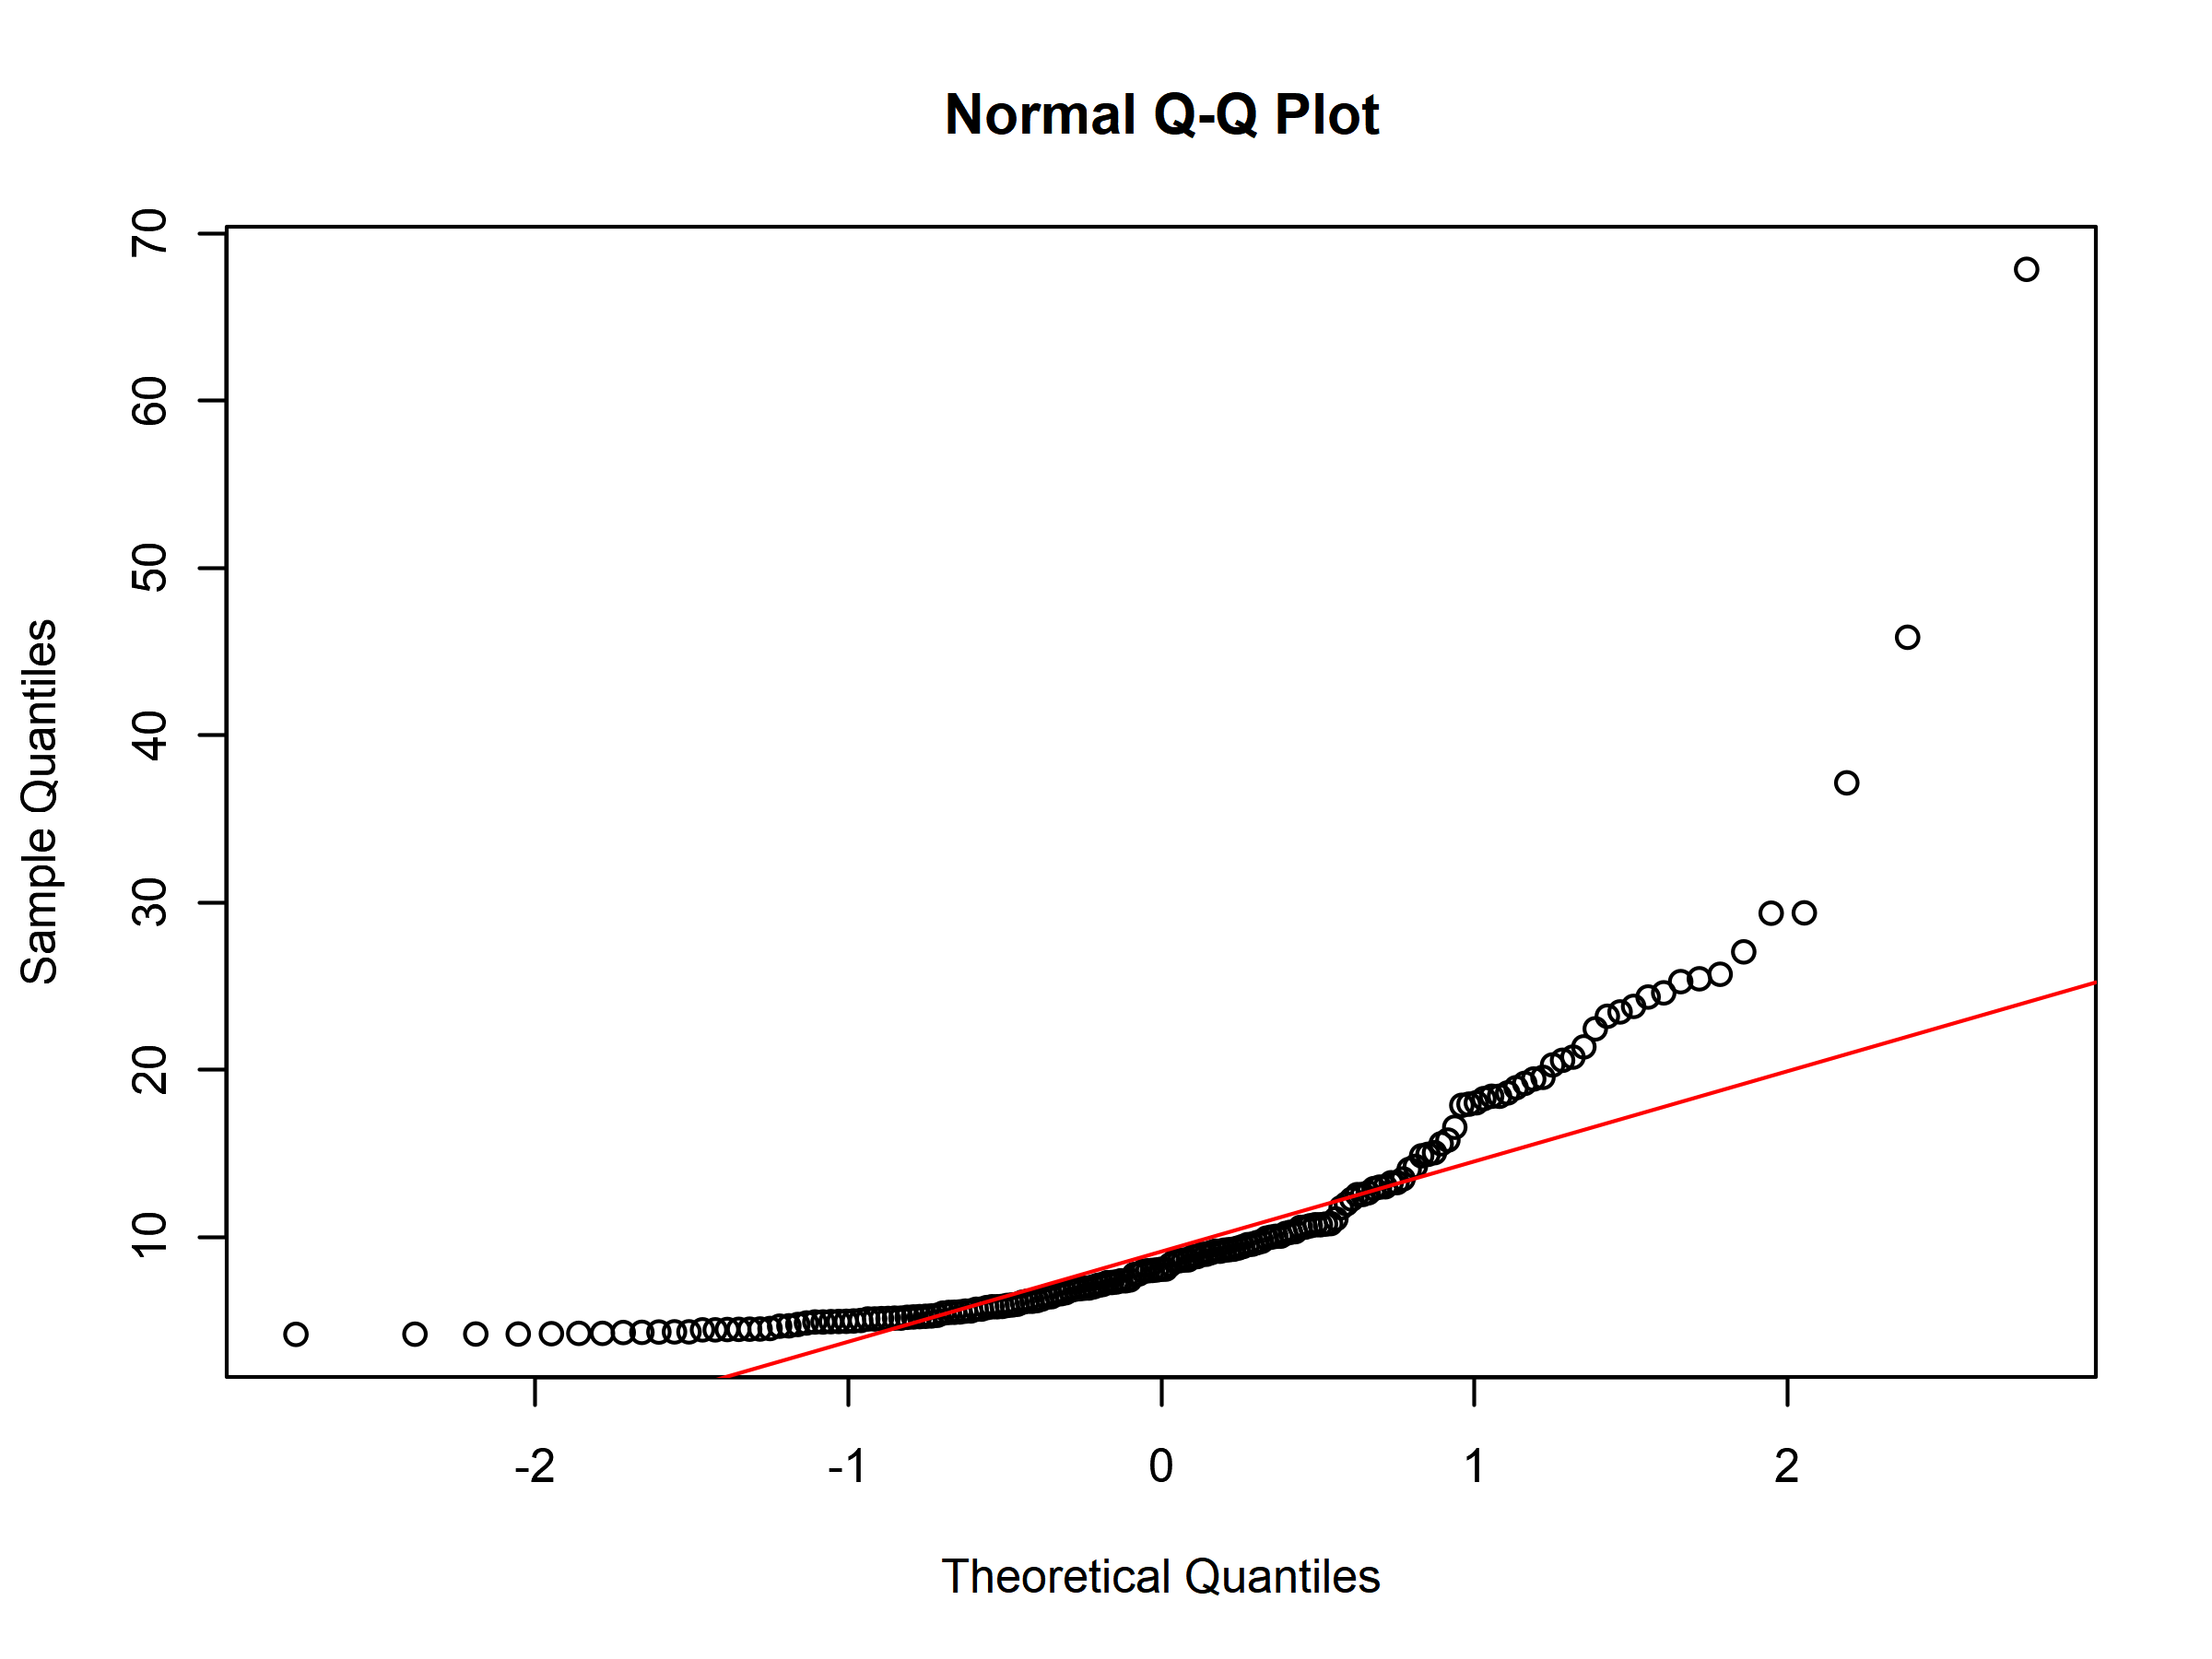

In [76]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Q-Q plot
qqnorm(groupby_product_id$global_sales)

# Add a reference line
qqline(groupby_product_id$global_sales, col='red')

In [77]:
# Shapiro-Wilk test
shapiro.test((groupby_product_id$global_sales))


	Shapiro-Wilk normality test

data:  (groupby_product_id$global_sales)
W = 0.70955, p-value < 2.2e-16


In [78]:
# Now we can check for skewness
skewness(groupby_product_id$global_sales)

[1] 3.066769

In [79]:
#Check for kurtosis.
kurtosis(groupby_product_id$global_sales)

# Our kurtosis value is more than 3, suggesting our data is leptokurtic.

[1] 17.79072

### (d) Remove Outliers: Shapiro-Wilk, Kurtosis Tests, Q-Q Plot & Histogram 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.200   5.320   7.780   9.153  10.770  23.470 

[1] 163


	Shapiro-Wilk normality test

data:  data_no_outlier
W = 0.85568, p-value = 2.266e-11


[1] 1.207608

[1] 3.614396

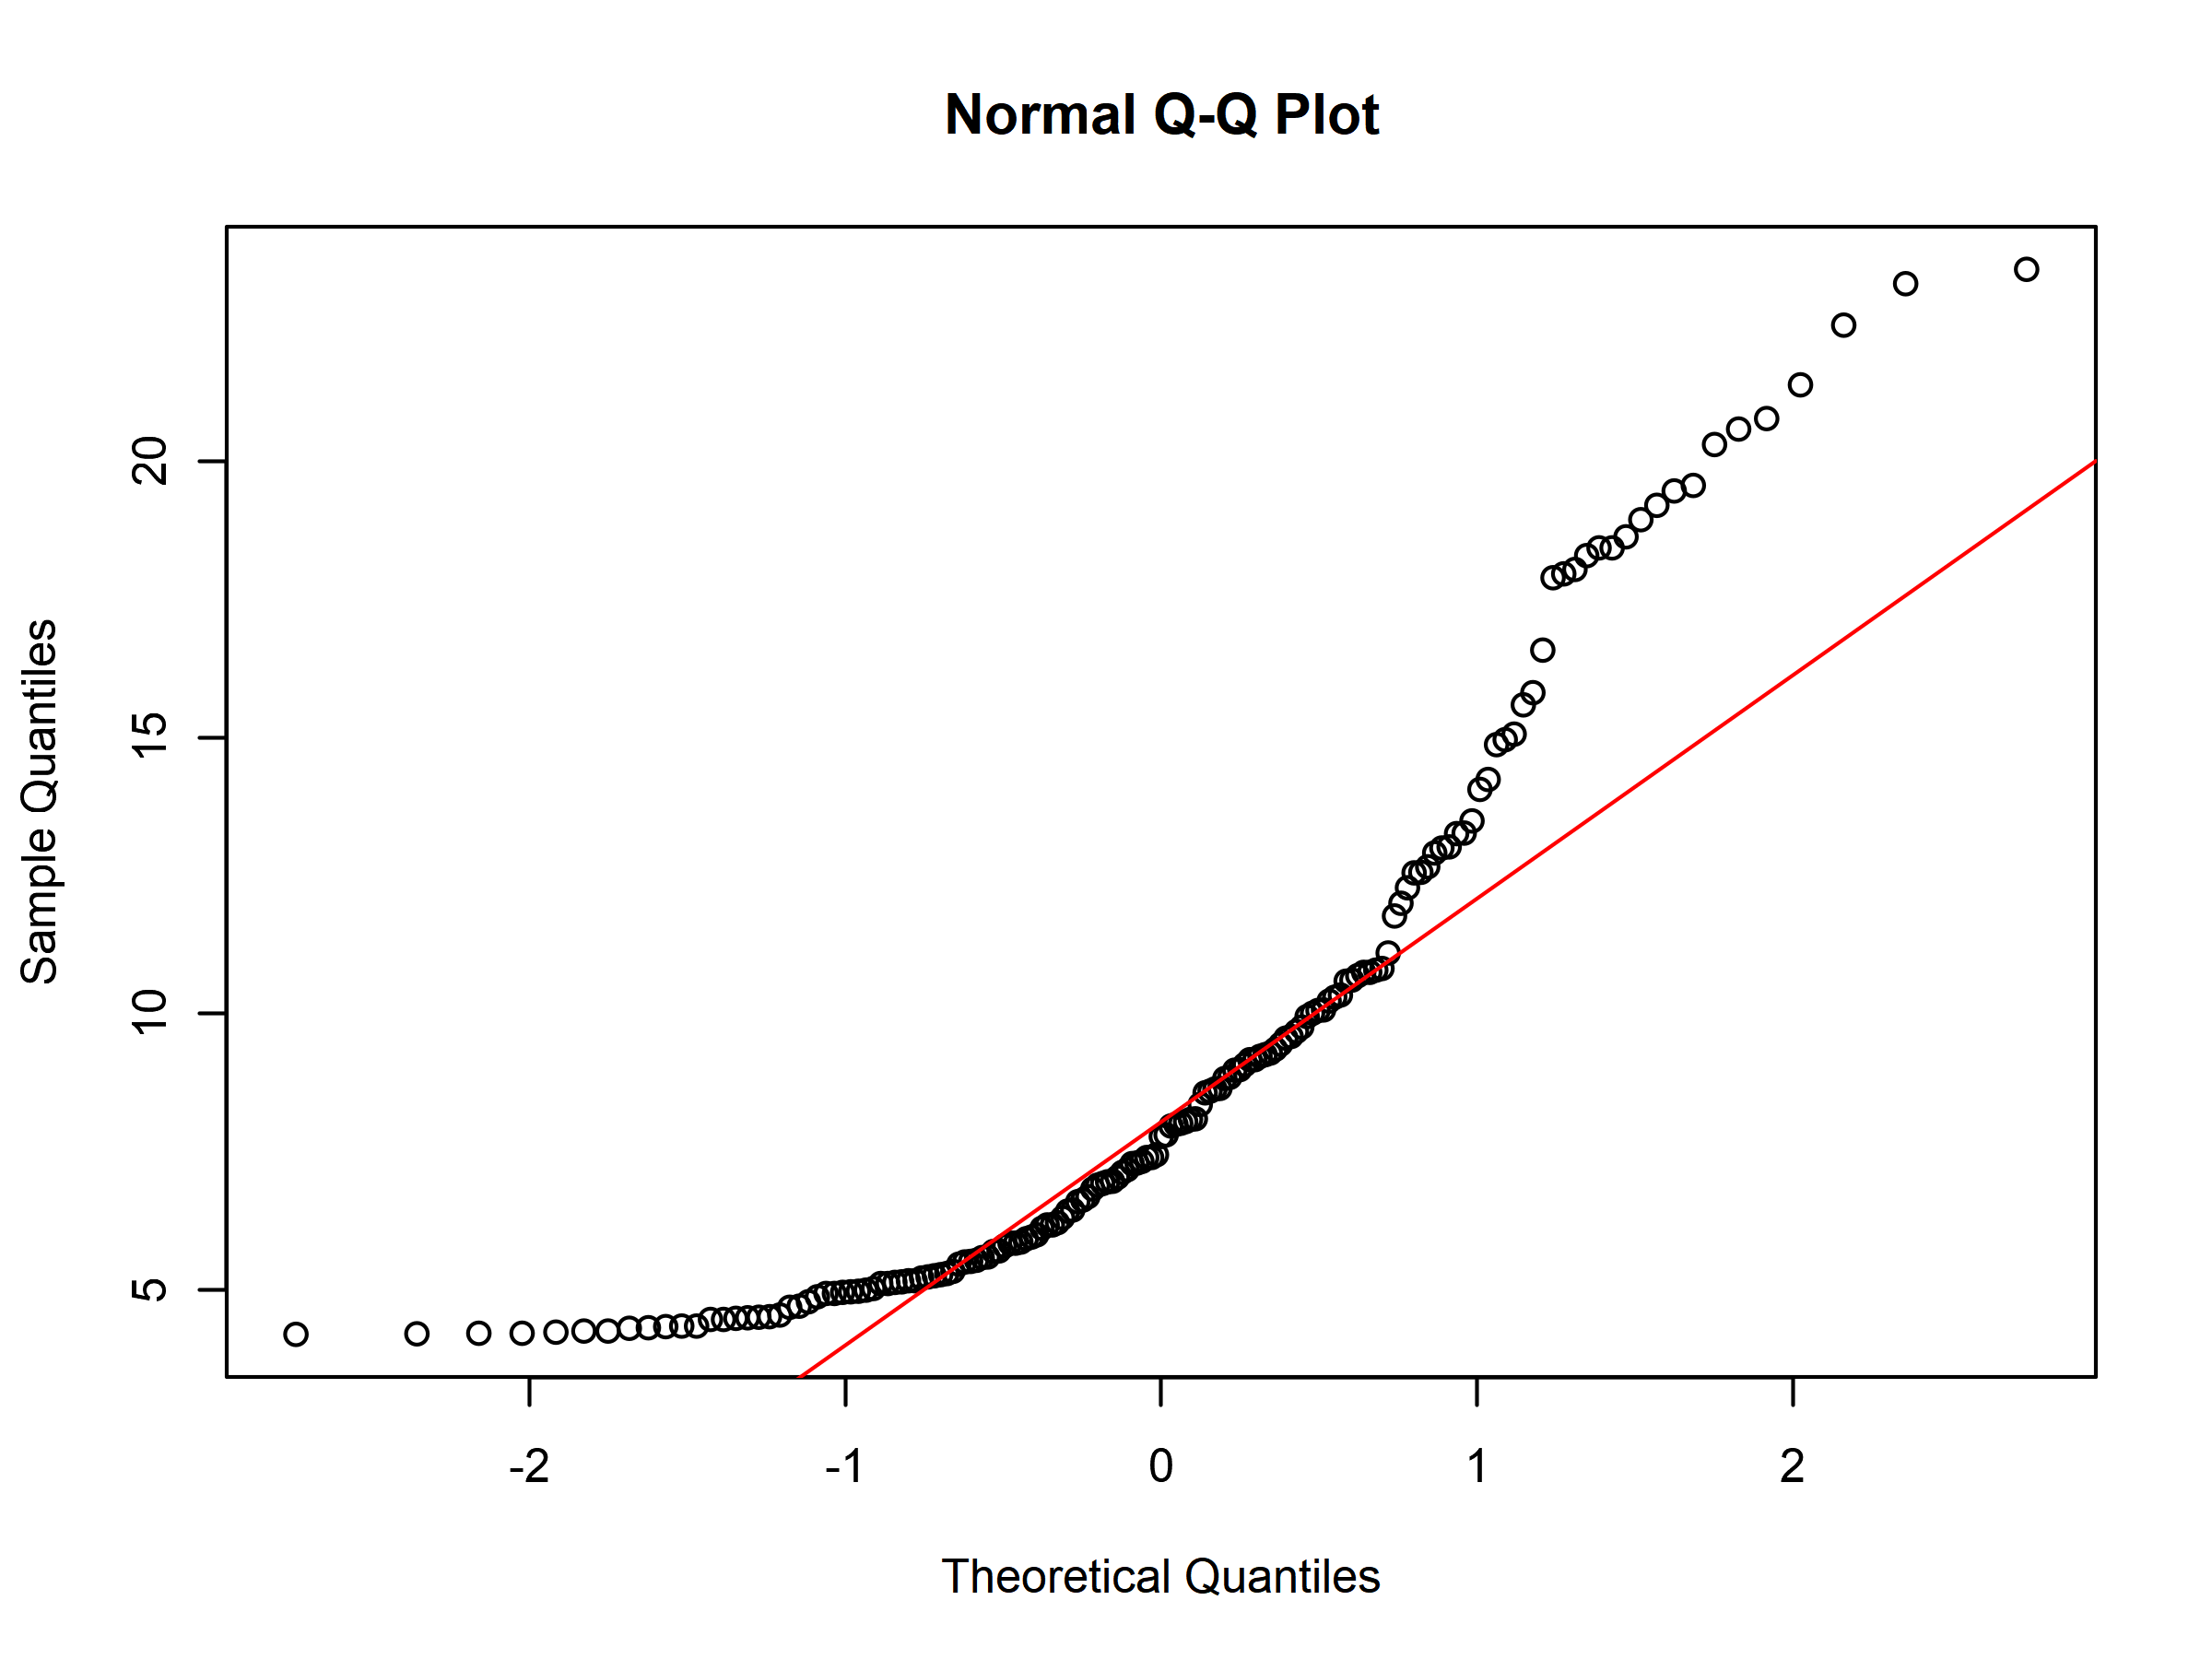

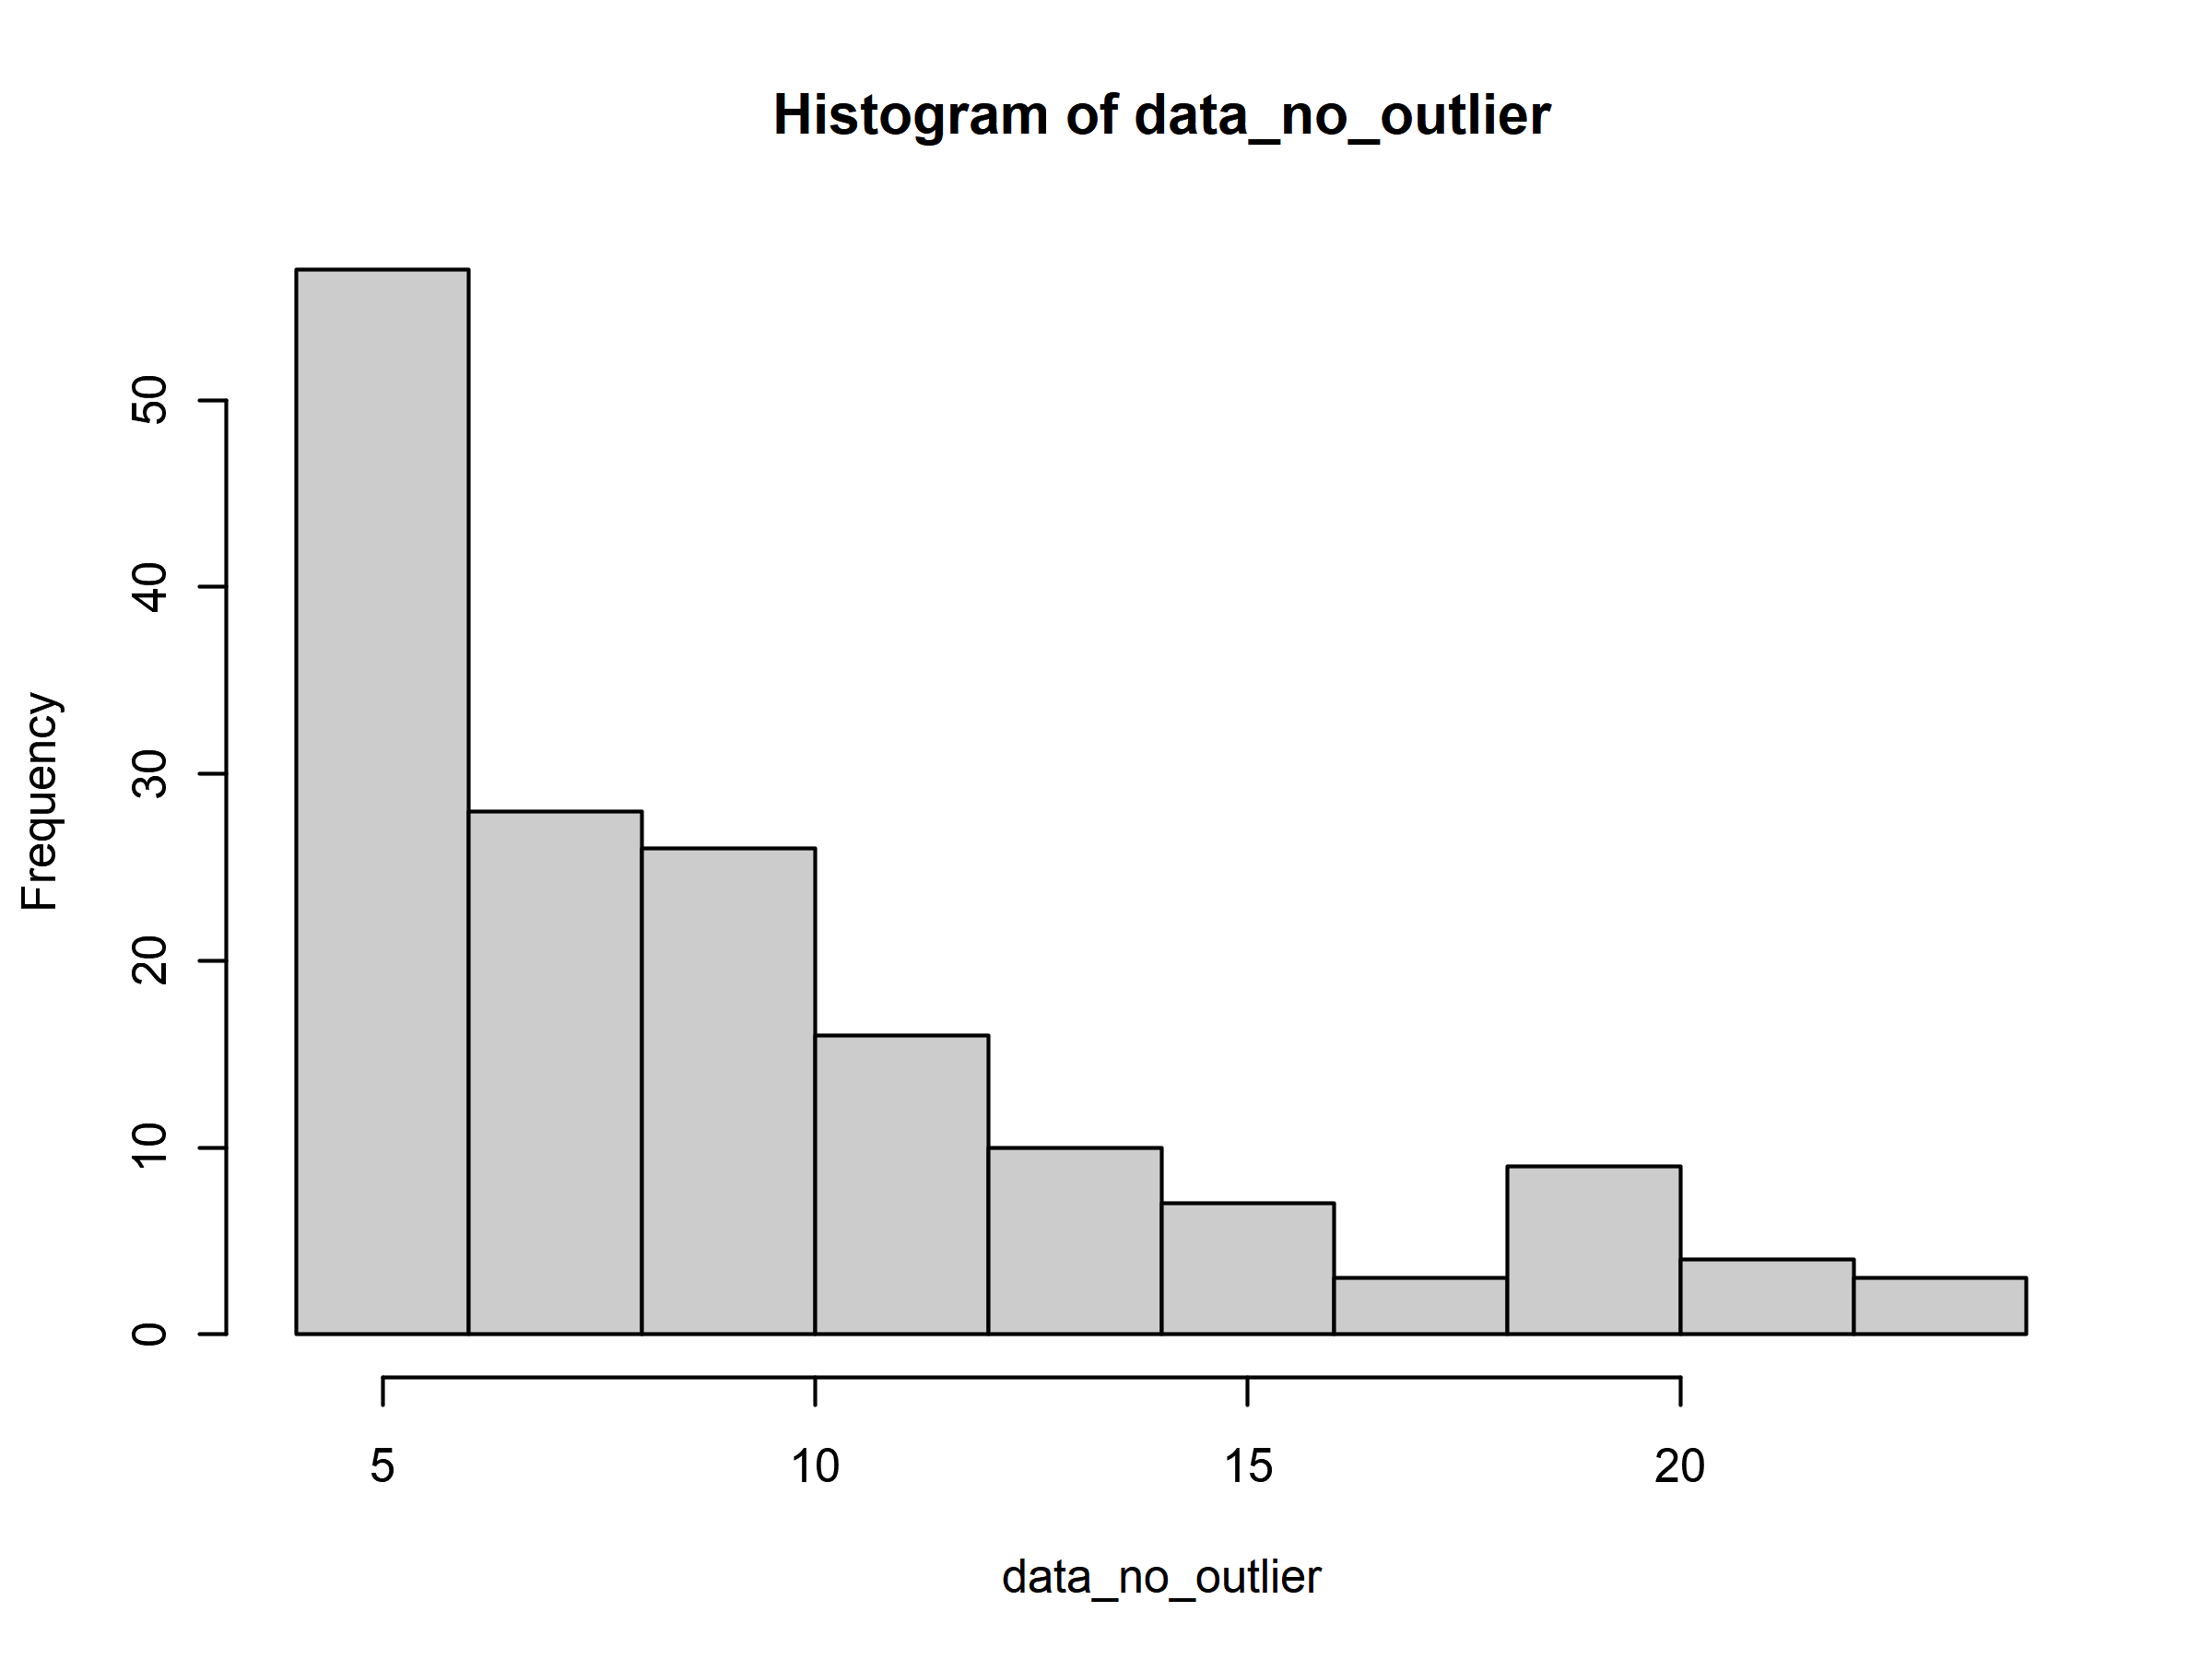

In [105]:
# detect and remove outliers
outliers_global_sales <- boxplot(groupby_product_id$global_sales, plot = FALSE)$out
data_no_outlier <- groupby_product_id$global_sales[-which(groupby_product_id$global_sales %in% outliers_global_sales)] 

# descriptive stats
summary(data_no_outlier)
length(data_no_outlier)

# Shapiro-Wilk test
shapiro.test(data_no_outlier)

# Now we can check for skewness
skewness(data_no_outlier)

#Check for kurtosis
kurtosis(data_no_outlier)

# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Q-Q plot
qqnorm(data_no_outlier)
# Add a reference line
qqline(data_no_outlier, col='red')

# plot histogram
hist(data_no_outlier, col=colours[1,3])

### (e) Apply Transformations to Achieve Normal Distribution

### Log

In [148]:
# apply log transformation
log_global_sales= log(groupby_product_id$global_sales)

# Shapiro-Wilk test
shapiro.test(log_global_sales)

# Now we can check for skewness
skewness(log_global_sales)

#Check for kurtosis
kurtosis(log_global_sales)


	Shapiro-Wilk normality test

data:  log_global_sales
W = 0.93594, p-value = 4.953e-07


[1] 0.7751249

[1] 3.092517

### Square Root

In [90]:
# apply log transformation
sqrt_global_sales= sqrt(groupby_product_id$global_sales)

# Shapiro-Wilk test
shapiro.test(sqrt_global_sales)

# Now we can check for skewness
skewness(sqrt_global_sales)

#Check for kurtosis
kurtosis(sqrt_global_sales)


	Shapiro-Wilk normality test

data:  sqrt_global_sales
W = 0.85502, p-value = 6.891e-12


[1] 1.610409

[1] 6.691365

### Cube Root

In [147]:
# apply log transformation
cube_global_sales= groupby_product_id$global_sales^(1/3)

# Shapiro-Wilk test
shapiro.test(cube_global_sales)

# Now we can check for skewness
skewness(cube_global_sales)

#Check for kurtosis
kurtosis(cube_global_sales)


	Shapiro-Wilk normality test

data:  cube_global_sales
W = 0.88902, p-value = 3.89e-10


[1] 1.280237

[1] 4.983201

### Compare Results

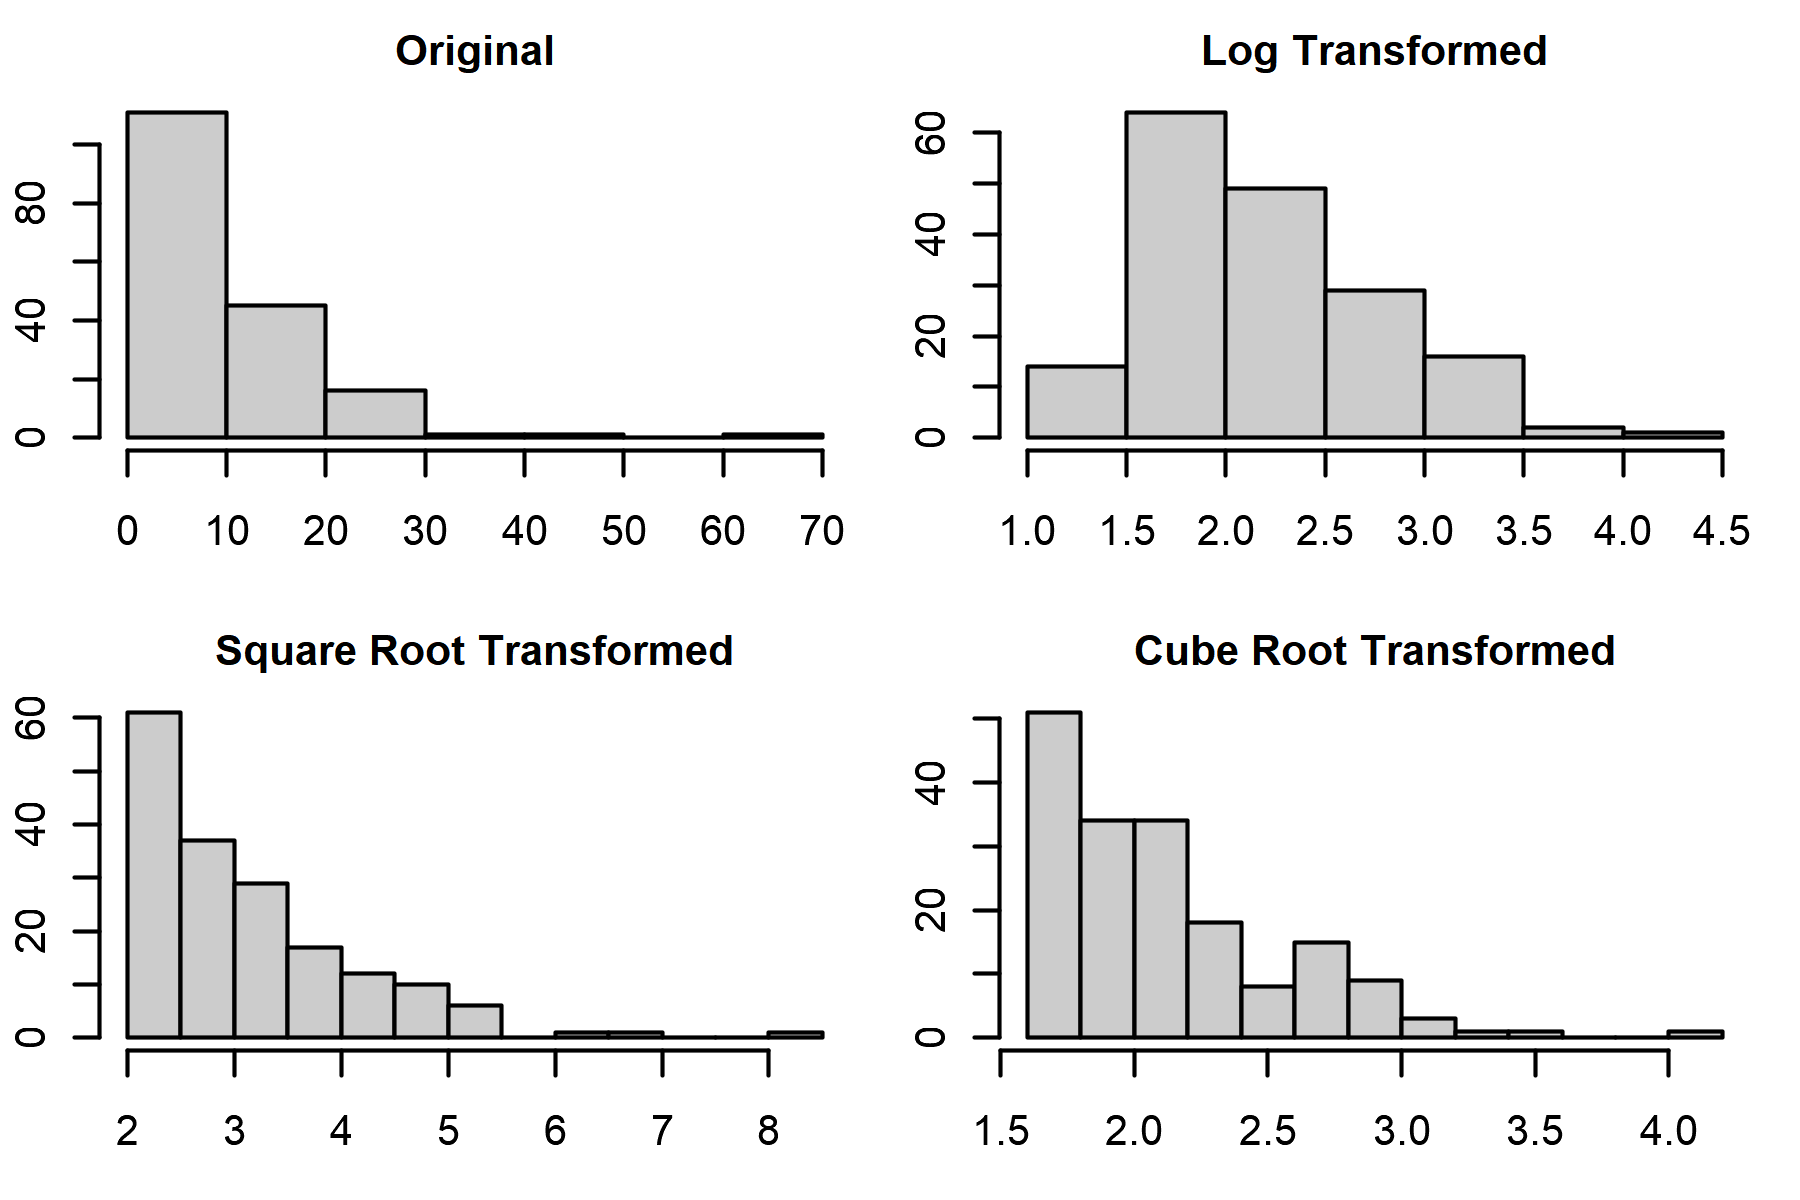

In [150]:
# 2 x 2 grid
par(mfrow = c(2,2), mar = c(3,2,2,1))

# Set the plot output options
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)

#create histogram for original distribution
hist(groupby_product_id$global_sales, col=colours[1,3], main='Original', cex.main=1, cex.axis=1, cex.lab = 1)

#create histogram for log-transformed distribution 
hist(log_global_sales, col=colours[1,3], main='Log Transformed', cex.main=1, cex.axis=1)

#create histogram for square-root-transformed distribution 
hist(sqrt_global_sales, col=colours[1,3], main='Square Root Transformed', cex.main=1, cex.axis=1)

#create histogram for cube-root-transformed distribution 
hist(cube_global_sales, col=colours[1,3], main='Cube Root Transformed', cex.main=1, cex.axis=1)

### Conclusion

The <b>log</b> transformation reduces skewedness and kurtosis the most, to produce the best possible distribution close to normal.

### <u>Section 2: Relationships in the Grouped Data</u>

### (i) North America Sales vs. Europe Sales

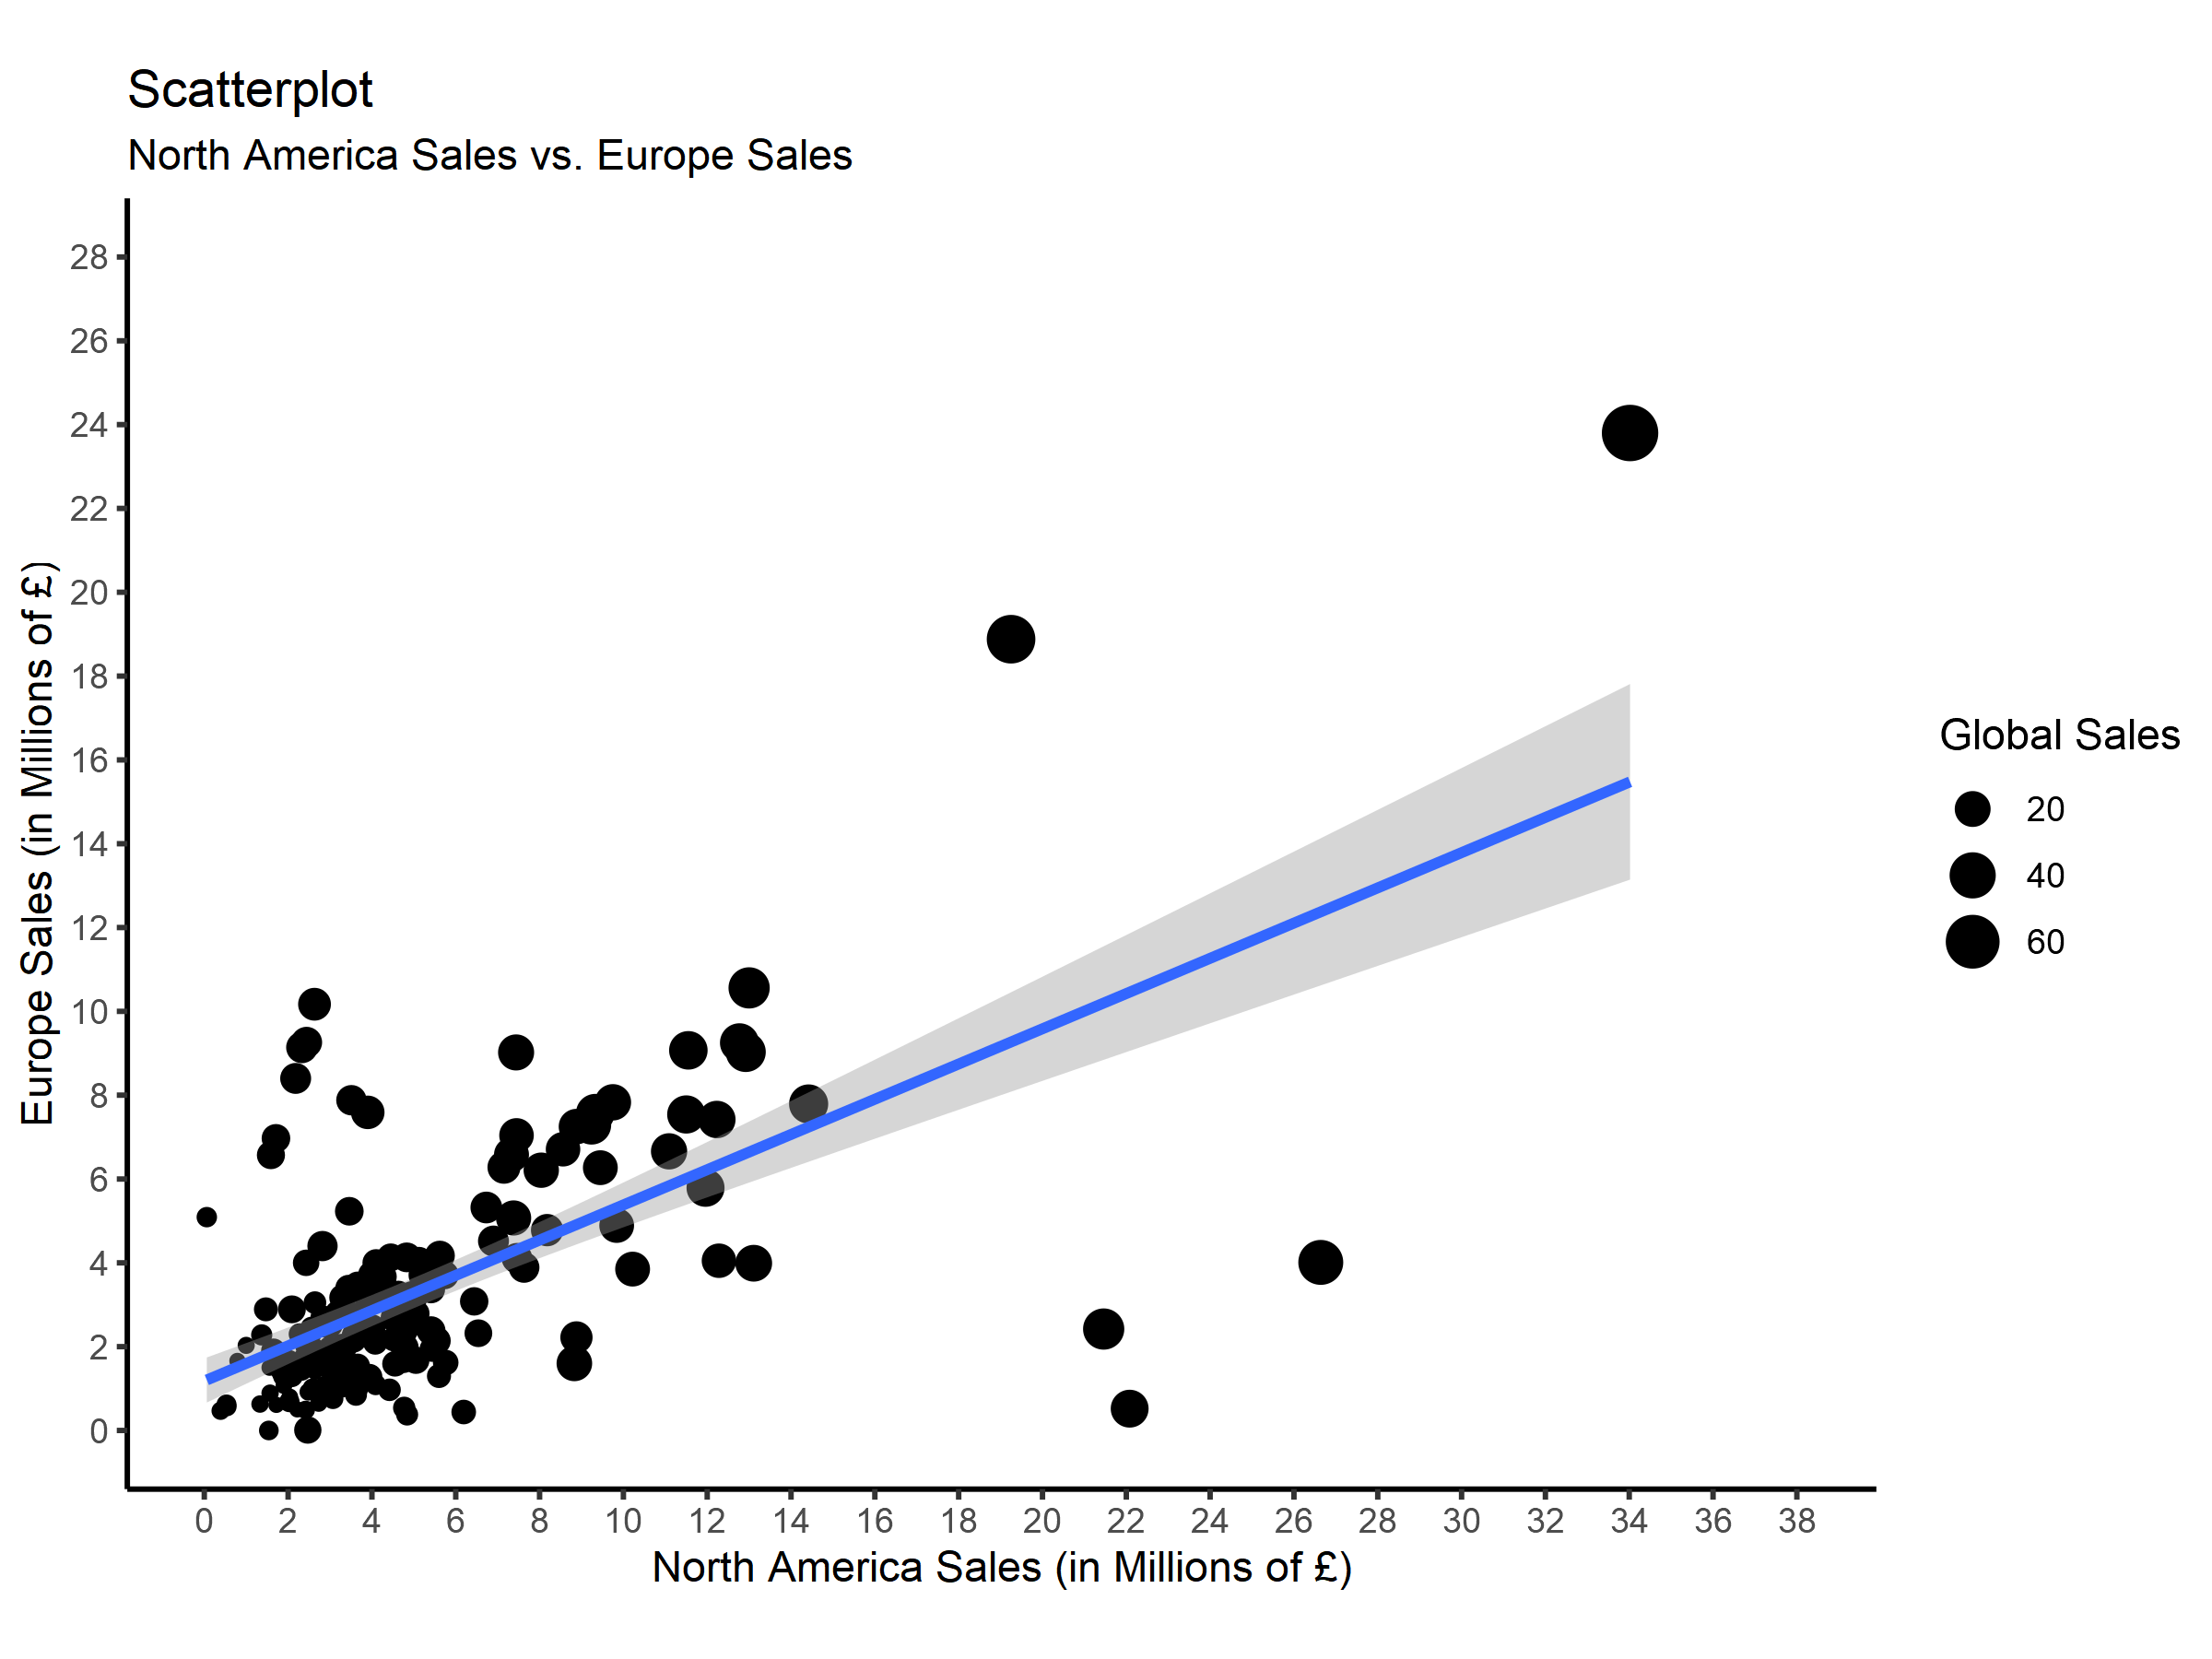

In [53]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

# Create scatterplot na_sales vs. eu_sales
ggplot(data=groupby_product_id, aes(x=na_sales, y=eu_sales)) + 
    
    # scatterplot
    geom_point(aes(size=global_sales)) + 

    # add regression line
    geom_smooth(method=lm, formula='y~x') + 

    # setup x-axis
    scale_x_continuous(breaks=seq(0, 38, 2)) +

    # setup y-axis
    scale_y_continuous(breaks=seq(0, 28, 2)) +

    # set up the x-axis and y-axis coordinates
    coord_fixed(xlim =c(NA, 38), ylim = c(NA, 28)) +
   
    # Add labels for title, subtitle and x-axis
    labs(title = 'Scatterplot',
         subtitle = 'North America Sales vs. Europe Sales',
         x = 'North America Sales (in Millions of £)',
         y = 'Europe Sales (in Millions of £)',
         size = 'Global Sales') +
        
    # set the theme
    theme_classic()

### (i) Global Sales vs. North America Sales

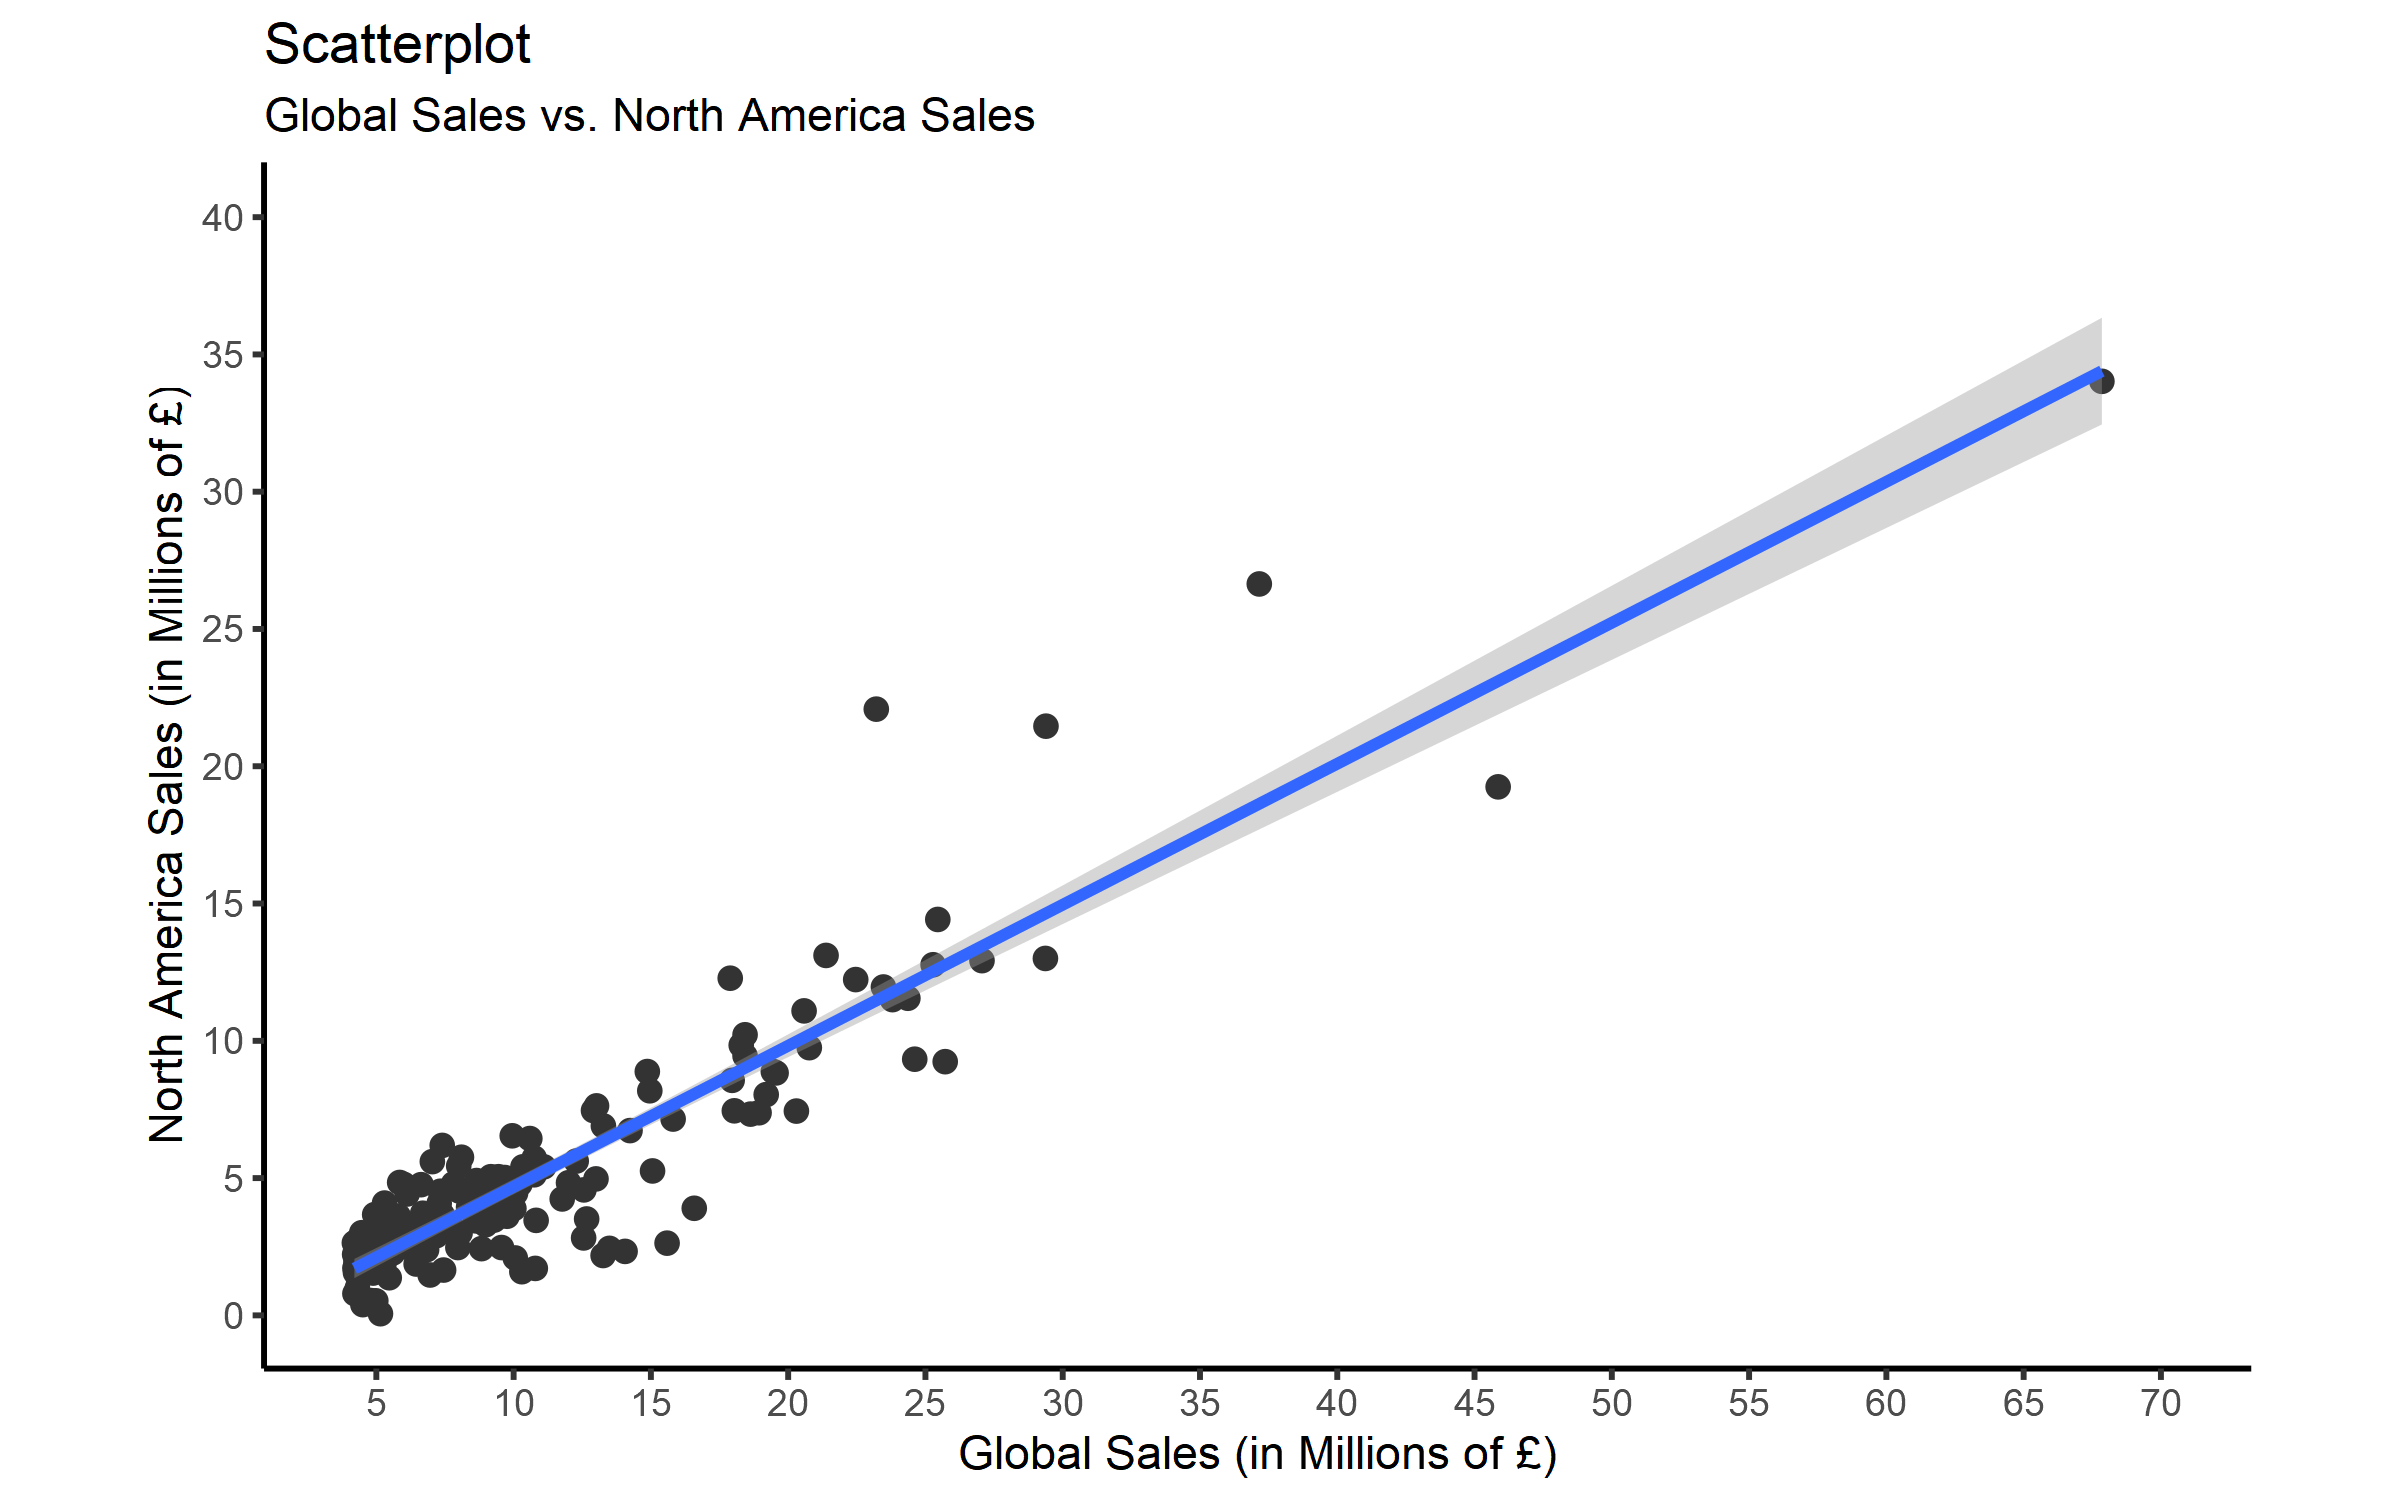

In [55]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)

# Create scatterplot na_sales vs. eu_sales
ggplot(data=groupby_product_id, aes(x=global_sales, y=na_sales)) + 
    
    # scatterplot
    geom_point(colour='#333333', size=2) + 

    # add regression line
    geom_smooth(method=lm, formula='y~x') + 

    # setup x-axis
    scale_x_continuous(breaks=seq(0, 70, 5)) +

    # setup y-axis
    scale_y_continuous(breaks=seq(0, 40, 5)) +

    # set up the x-axis and y-axis coordinates
    coord_fixed(xlim =c(NA, 70), ylim = c(NA, 40)) +
   
    # Add labels for title, subtitle and x-axis
    labs(title = 'Scatterplot',
         subtitle = 'Global Sales vs. North America Sales',
         x = 'Global Sales (in Millions of £)',
         y = 'North America Sales (in Millions of £)') +
        
    # set the theme
    theme_classic()

### (i) Global Sales vs. Europe Sales

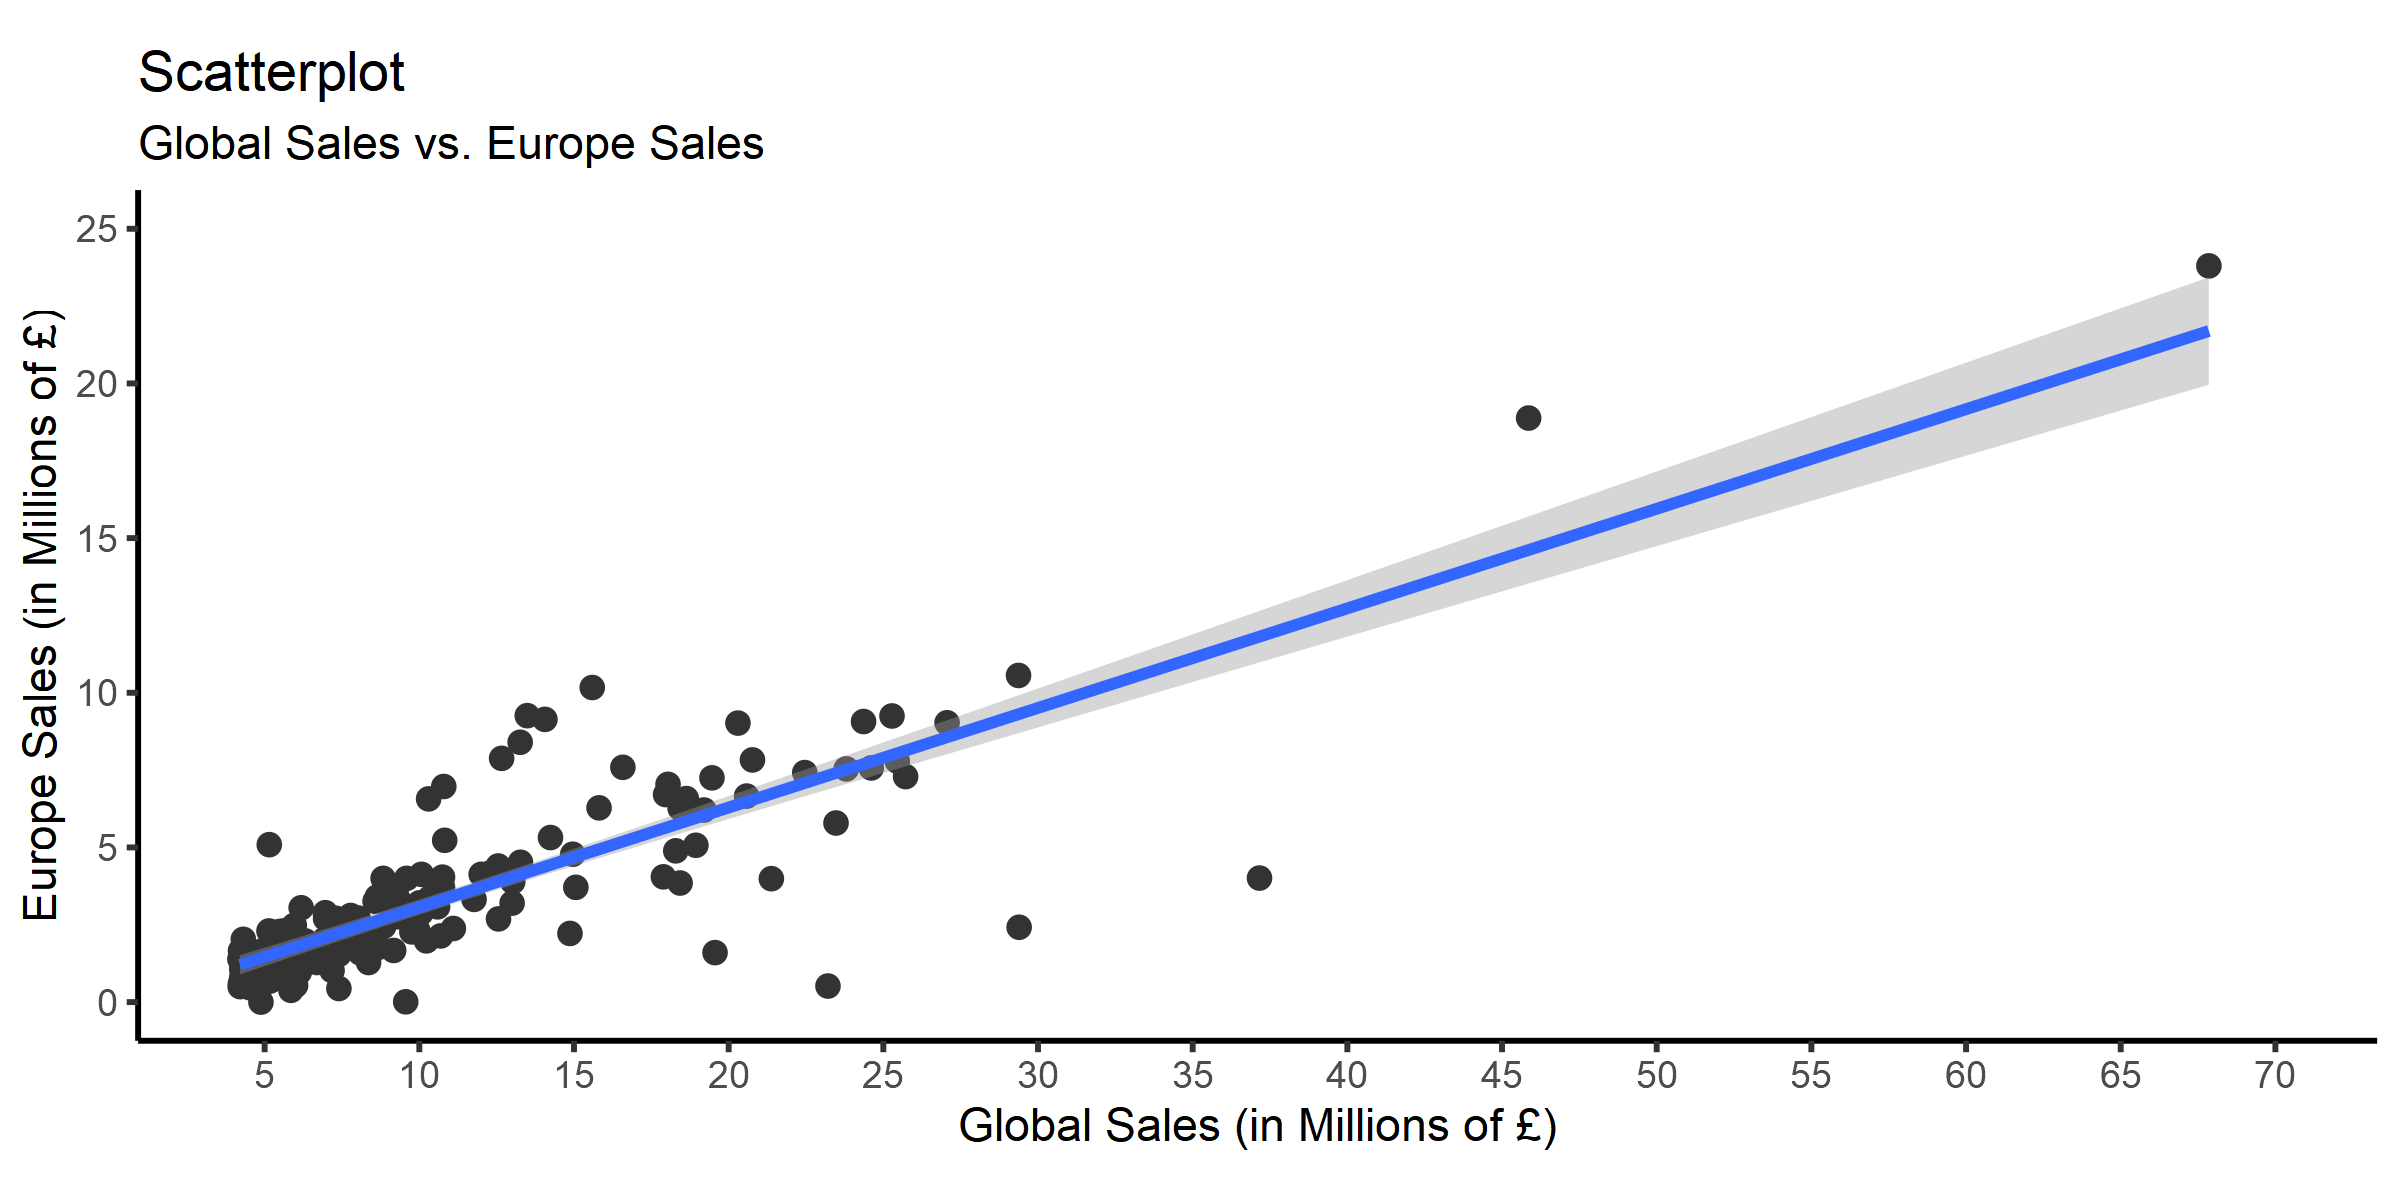

In [56]:
# Set the plot output options
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

# Create plot na_sales vs. eu_sales
ggplot(data=groupby_product_id, aes(x=global_sales, y=eu_sales)) + 
    
    # scatterplot
    geom_point(colour='#333333', size=2) + 

    # add regression line
    geom_smooth(method=lm, formula='y~x') + 

    # setup x-axis
    scale_x_continuous(breaks=seq(0, 70, 5)) +

    # setup y-axis
    scale_y_continuous(breaks=seq(0, 25, 5)) +

    # set up the x-axis and y-axis coordinates
    coord_fixed(xlim =c(NA, 70), ylim = c(NA, 25)) +
   
    # Add labels for title, subtitle and x-axis
    labs(title = 'Scatterplot',
         subtitle = 'Global Sales vs. Europe Sales',
         x = 'Global Sales (in Millions of £)',
         y = 'Europe Sales (in Millions of £)') +
        
    # set the theme
    theme_classic()

### <u>Section 3: Conclusions</u>

The data for Europe, North America and Global Sales does not form a normal distribution. There is positive skewedness (meaning most values are in the lower range), and kurtosis is leptokuric (meaning the bell shape is steep and pointed with a long tail, in this case the long tail is mainly on the right).

In order to normalise the data, serveral techniques were tested:
1. Removal of Outliers
2. Log
3. Square Root
4. Cube Root

Removal of outliers would not be deemed advisable because the excluded data would be valuable.

The log transformation was effective at reducing the value of kurtosis closer to 3, and worked best with the Global Sales data.

While for the Europe and North America Sales data, the cube root transformation was most effective. In fact, for Europe Sales, the cube root almost achieved a normal distribution.

It may be advisable to apply transformation to the data before building a multi-linear regression predictive model, but the results should be carefully monitored for undesirable effects. 

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">6. Making Recommendation to the Business</h2></th>
        <th><a id="6"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>